In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기

In [2]:
mpg = pd.read_csv('../data/auto_mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# 난수를 고정 - np.random.seed

In [3]:
np.random.seed(7)

# preprocessing - 널값처리

In [4]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
mpg['horsepower'].replace('?', np.nan,inplace = True)
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
mpg.dropna(inplace = True)
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# x, y split and train, test split

In [8]:
y = mpg.mpg
x = mpg.drop(['mpg', 'car name'], axis=1)

In [9]:
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=7)

In [12]:
print(f'x_train: {x_train.shape}\nx_test: {x_test.shape}\n\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

x_train: (294, 7)
x_test: (98, 7)

y_train: (294,)
y_test: (98,)


# preprocessing - x값의 표준화(StandardScaler)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Build a model (12 Dense with RELU, 8 Dense nodes with RELU activation, 1 Dense output)

In [15]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
model = Sequential()
model.add(Dense(12,
                input_dim=7,
                activation = 'relu'))

In [17]:
model.add(Dense(8,
                activation = 'relu'))

In [18]:
model.add(Dense(1))

# Compile the model

In [19]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse','mae'])

# model_building function

In [20]:
def model_building():
    model = Sequential()
    model.add(Dense(12,
                    input_dim=7,
                    activation = 'relu'))
    model.add(Dense(8,
                activation = 'relu'))
    model.add(Dense(1))
    model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse','mae'])
    return model

# cross validation

In [21]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

In [22]:
estimator = KerasRegressor(build_fn=model_building,
                           epochs = 1000,
                           batch_size=16,
                           verbose=1)

result = cross_val_score(estimator, # model
                         x_test,
                         y_test,
                         cv=10,
                         scoring='r2') # 연속은 'r2' / 불연속은 'accuracy'




Epoch 1/1000





88/88 [==============================] - 1s 6ms/step - loss: 607.0830 - mean_squared_error: 607.0830 - mean_absolute_error: 23.3894
Epoch 2/1000
88/88 [==============================] - 0s 91us/step - loss: 602.0623 - mean_squared_error: 602.0623 - mean_absolute_error: 23.2904
Epoch 3/1000
88/88 [==============================] - 0s 125us/step - loss: 596.7892 - mean_squared_error: 596.7892 - mean_absolute_error: 23.1862
Epoch 4/1000
88/88 [==============================] - 0s 113us/step - loss: 591.3797 - mean_squared_error: 591.3797 - mean_absolute_error: 23.0817
Epoch 5/1000
88/88 [==============================] - 0s 116us/step - loss: 585.8680 - mean_squared_error: 585.8680 - mean_absolute_error: 22.9712
Epoch 6/1000
88/88 [==============================] - 0s 272us/step - loss: 579.8209 - mean_squared_error: 579.8209 - mean_absolute_error: 22.8543
Epoch 7/1000
88/88 [==============================] - 0s 102us/step - loss: 573.3075 - mean_squared_error: 573.30

88/88 [==============================] - 0s 193us/step - loss: 66.1531 - mean_squared_error: 66.1531 - mean_absolute_error: 6.6830
Epoch 46/1000
88/88 [==============================] - 0s 181us/step - loss: 61.2442 - mean_squared_error: 61.2442 - mean_absolute_error: 6.4343
Epoch 47/1000
88/88 [==============================] - 0s 136us/step - loss: 57.0158 - mean_squared_error: 57.0158 - mean_absolute_error: 6.1682
Epoch 48/1000
88/88 [==============================] - 0s 125us/step - loss: 53.8162 - mean_squared_error: 53.8162 - mean_absolute_error: 5.9764
Epoch 49/1000
88/88 [==============================] - 0s 125us/step - loss: 50.7792 - mean_squared_error: 50.7792 - mean_absolute_error: 5.7909
Epoch 50/1000
88/88 [==============================] - 0s 147us/step - loss: 48.4357 - mean_squared_error: 48.4357 - mean_absolute_error: 5.6552
Epoch 51/1000
88/88 [==============================] - 0s 159us/step - loss: 46.5924 - mean_squared_error: 46.5924 - mean_absolute_error: 5.5375

88/88 [==============================] - 0s 46us/step - loss: 19.2350 - mean_squared_error: 19.2350 - mean_absolute_error: 3.4258
Epoch 102/1000
88/88 [==============================] - 0s 113us/step - loss: 19.0431 - mean_squared_error: 19.0431 - mean_absolute_error: 3.4054
Epoch 103/1000
88/88 [==============================] - 0s 12us/step - loss: 18.8711 - mean_squared_error: 18.8711 - mean_absolute_error: 3.3873
Epoch 104/1000
88/88 [==============================] - 0s 79us/step - loss: 18.6645 - mean_squared_error: 18.6645 - mean_absolute_error: 3.3689
Epoch 105/1000
88/88 [==============================] - 0s 102us/step - loss: 18.4669 - mean_squared_error: 18.4669 - mean_absolute_error: 3.3517
Epoch 106/1000
88/88 [==============================] - 0s 91us/step - loss: 18.3003 - mean_squared_error: 18.3003 - mean_absolute_error: 3.3379
Epoch 107/1000
88/88 [==============================] - 0s 218us/step - loss: 18.1108 - mean_squared_error: 18.1108 - mean_absolute_error: 3.32

88/88 [==============================] - 0s 79us/step - loss: 12.6853 - mean_squared_error: 12.6853 - mean_absolute_error: 2.7764
Epoch 157/1000
88/88 [==============================] - 0s 90us/step - loss: 12.6248 - mean_squared_error: 12.6248 - mean_absolute_error: 2.7661
Epoch 158/1000
88/88 [==============================] - 0s 68us/step - loss: 12.5552 - mean_squared_error: 12.5552 - mean_absolute_error: 2.7546
Epoch 159/1000
88/88 [==============================] - 0s 113us/step - loss: 12.4678 - mean_squared_error: 12.4678 - mean_absolute_error: 2.7437
Epoch 160/1000
88/88 [==============================] - 0s 79us/step - loss: 12.3776 - mean_squared_error: 12.3776 - mean_absolute_error: 2.7334
Epoch 161/1000
88/88 [==============================] - 0s 68us/step - loss: 12.3229 - mean_squared_error: 12.3229 - mean_absolute_error: 2.7279
Epoch 162/1000
88/88 [==============================] - 0s 68us/step - loss: 12.2324 - mean_squared_error: 12.2324 - mean_absolute_error: 2.7242

88/88 [==============================] - 0s 45us/step - loss: 9.2820 - mean_squared_error: 9.2820 - mean_absolute_error: 2.3853
Epoch 213/1000
88/88 [==============================] - 0s 215us/step - loss: 9.2398 - mean_squared_error: 9.2398 - mean_absolute_error: 2.3803
Epoch 214/1000
88/88 [==============================] - 0s 68us/step - loss: 9.1869 - mean_squared_error: 9.1869 - mean_absolute_error: 2.3745
Epoch 215/1000
88/88 [==============================] - 0s 68us/step - loss: 9.1555 - mean_squared_error: 9.1555 - mean_absolute_error: 2.3693
Epoch 216/1000
88/88 [==============================] - 0s 79us/step - loss: 9.1068 - mean_squared_error: 9.1068 - mean_absolute_error: 2.3606
Epoch 217/1000
88/88 [==============================] - 0s 68us/step - loss: 9.0681 - mean_squared_error: 9.0681 - mean_absolute_error: 2.3559
Epoch 218/1000
88/88 [==============================] - 0s 79us/step - loss: 9.0379 - mean_squared_error: 9.0379 - mean_absolute_error: 2.3523
Epoch 219/100

88/88 [==============================] - 0s 68us/step - loss: 7.3139 - mean_squared_error: 7.3139 - mean_absolute_error: 2.1098
Epoch 270/1000
88/88 [==============================] - 0s 79us/step - loss: 7.3192 - mean_squared_error: 7.3192 - mean_absolute_error: 2.1137
Epoch 271/1000
88/88 [==============================] - 0s 91us/step - loss: 7.2797 - mean_squared_error: 7.2797 - mean_absolute_error: 2.1101
Epoch 272/1000
88/88 [==============================] - 0s 68us/step - loss: 7.2542 - mean_squared_error: 7.2542 - mean_absolute_error: 2.1051
Epoch 273/1000
88/88 [==============================] - 0s 79us/step - loss: 7.2294 - mean_squared_error: 7.2294 - mean_absolute_error: 2.0999
Epoch 274/1000
88/88 [==============================] - 0s 57us/step - loss: 7.2323 - mean_squared_error: 7.2323 - mean_absolute_error: 2.0965
Epoch 275/1000
88/88 [==============================] - 0s 56us/step - loss: 7.1949 - mean_squared_error: 7.1949 - mean_absolute_error: 2.0910
Epoch 276/1000

88/88 [==============================] - 0s 125us/step - loss: 6.3650 - mean_squared_error: 6.3650 - mean_absolute_error: 1.9622
Epoch 326/1000
88/88 [==============================] - 0s 113us/step - loss: 6.3508 - mean_squared_error: 6.3508 - mean_absolute_error: 1.9600
Epoch 327/1000
88/88 [==============================] - 0s 91us/step - loss: 6.3462 - mean_squared_error: 6.3462 - mean_absolute_error: 1.9586
Epoch 328/1000
88/88 [==============================] - 0s 91us/step - loss: 6.3532 - mean_squared_error: 6.3532 - mean_absolute_error: 1.9585
Epoch 329/1000
88/88 [==============================] - 0s 102us/step - loss: 6.3317 - mean_squared_error: 6.3317 - mean_absolute_error: 1.9540
Epoch 330/1000
88/88 [==============================] - 0s 91us/step - loss: 6.3373 - mean_squared_error: 6.3373 - mean_absolute_error: 1.9606
Epoch 331/1000
88/88 [==============================] - 0s 68us/step - loss: 6.3069 - mean_squared_error: 6.3069 - mean_absolute_error: 1.9561
Epoch 332/1

88/88 [==============================] - 0s 79us/step - loss: 5.8612 - mean_squared_error: 5.8612 - mean_absolute_error: 1.8740
Epoch 383/1000
88/88 [==============================] - 0s 91us/step - loss: 5.8647 - mean_squared_error: 5.8647 - mean_absolute_error: 1.8762
Epoch 384/1000
88/88 [==============================] - 0s 68us/step - loss: 5.8265 - mean_squared_error: 5.8265 - mean_absolute_error: 1.8718
Epoch 385/1000
88/88 [==============================] - 0s 91us/step - loss: 5.8296 - mean_squared_error: 5.8296 - mean_absolute_error: 1.8721
Epoch 386/1000
88/88 [==============================] - 0s 68us/step - loss: 5.8273 - mean_squared_error: 5.8273 - mean_absolute_error: 1.8691
Epoch 387/1000
88/88 [==============================] - 0s 79us/step - loss: 5.8414 - mean_squared_error: 5.8414 - mean_absolute_error: 1.8735
Epoch 388/1000
88/88 [==============================] - 0s 79us/step - loss: 5.8163 - mean_squared_error: 5.8163 - mean_absolute_error: 1.8672
Epoch 389/1000

88/88 [==============================] - 0s 91us/step - loss: 5.5496 - mean_squared_error: 5.5496 - mean_absolute_error: 1.8207
Epoch 439/1000
88/88 [==============================] - 0s 91us/step - loss: 5.5357 - mean_squared_error: 5.5357 - mean_absolute_error: 1.8165
Epoch 440/1000
88/88 [==============================] - 0s 57us/step - loss: 5.5307 - mean_squared_error: 5.5307 - mean_absolute_error: 1.8169
Epoch 441/1000
88/88 [==============================] - 0s 98us/step - loss: 5.5141 - mean_squared_error: 5.5141 - mean_absolute_error: 1.8157
Epoch 442/1000
88/88 [==============================] - 0s 56us/step - loss: 5.5309 - mean_squared_error: 5.5309 - mean_absolute_error: 1.8210
Epoch 443/1000
88/88 [==============================] - 0s 90us/step - loss: 5.5177 - mean_squared_error: 5.5177 - mean_absolute_error: 1.8159
Epoch 444/1000
88/88 [==============================] - 0s 68us/step - loss: 5.5179 - mean_squared_error: 5.5179 - mean_absolute_error: 1.8183
Epoch 445/1000

88/88 [==============================] - 0s 57us/step - loss: 5.2830 - mean_squared_error: 5.2830 - mean_absolute_error: 1.7780
Epoch 495/1000
88/88 [==============================] - 0s 57us/step - loss: 5.2924 - mean_squared_error: 5.2924 - mean_absolute_error: 1.7792
Epoch 496/1000
88/88 [==============================] - 0s 68us/step - loss: 5.2803 - mean_squared_error: 5.2803 - mean_absolute_error: 1.7764
Epoch 497/1000
88/88 [==============================] - 0s 91us/step - loss: 5.2799 - mean_squared_error: 5.2799 - mean_absolute_error: 1.7709
Epoch 498/1000
88/88 [==============================] - 0s 68us/step - loss: 5.2861 - mean_squared_error: 5.2861 - mean_absolute_error: 1.7748
Epoch 499/1000
88/88 [==============================] - 0s 57us/step - loss: 5.2582 - mean_squared_error: 5.2582 - mean_absolute_error: 1.7686
Epoch 500/1000
88/88 [==============================] - 0s 68us/step - loss: 5.2476 - mean_squared_error: 5.2476 - mean_absolute_error: 1.7679
Epoch 501/1000

88/88 [==============================] - 0s 102us/step - loss: 5.0575 - mean_squared_error: 5.0575 - mean_absolute_error: 1.7277
Epoch 552/1000
88/88 [==============================] - 0s 56us/step - loss: 5.0742 - mean_squared_error: 5.0742 - mean_absolute_error: 1.7320
Epoch 553/1000
88/88 [==============================] - 0s 68us/step - loss: 5.0637 - mean_squared_error: 5.0637 - mean_absolute_error: 1.7320
Epoch 554/1000
88/88 [==============================] - 0s 56us/step - loss: 5.0515 - mean_squared_error: 5.0515 - mean_absolute_error: 1.7291
Epoch 555/1000
88/88 [==============================] - 0s 56us/step - loss: 5.0466 - mean_squared_error: 5.0466 - mean_absolute_error: 1.7288
Epoch 556/1000
88/88 [==============================] - 0s 68us/step - loss: 5.0717 - mean_squared_error: 5.0717 - mean_absolute_error: 1.7275
Epoch 557/1000
88/88 [==============================] - 0s 56us/step - loss: 5.0469 - mean_squared_error: 5.0469 - mean_absolute_error: 1.7279
Epoch 558/100

88/88 [==============================] - 0s 79us/step - loss: 4.8984 - mean_squared_error: 4.8984 - mean_absolute_error: 1.7085
Epoch 609/1000
88/88 [==============================] - 0s 57us/step - loss: 4.9148 - mean_squared_error: 4.9148 - mean_absolute_error: 1.7073
Epoch 610/1000
88/88 [==============================] - 0s 68us/step - loss: 4.8957 - mean_squared_error: 4.8957 - mean_absolute_error: 1.7034
Epoch 611/1000
88/88 [==============================] - 0s 68us/step - loss: 4.8809 - mean_squared_error: 4.8809 - mean_absolute_error: 1.7002
Epoch 612/1000
88/88 [==============================] - 0s 102us/step - loss: 4.9189 - mean_squared_error: 4.9189 - mean_absolute_error: 1.7059
Epoch 613/1000
88/88 [==============================] - 0s 91us/step - loss: 4.8916 - mean_squared_error: 4.8916 - mean_absolute_error: 1.7001
Epoch 614/1000
88/88 [==============================] - 0s 79us/step - loss: 4.8730 - mean_squared_error: 4.8730 - mean_absolute_error: 1.6986
Epoch 615/100

88/88 [==============================] - 0s 57us/step - loss: 4.7698 - mean_squared_error: 4.7698 - mean_absolute_error: 1.6821
Epoch 666/1000
88/88 [==============================] - 0s 68us/step - loss: 4.7976 - mean_squared_error: 4.7976 - mean_absolute_error: 1.6846
Epoch 667/1000
88/88 [==============================] - 0s 57us/step - loss: 4.7662 - mean_squared_error: 4.7662 - mean_absolute_error: 1.6781
Epoch 668/1000
88/88 [==============================] - 0s 57us/step - loss: 4.7687 - mean_squared_error: 4.7687 - mean_absolute_error: 1.6776
Epoch 669/1000
88/88 [==============================] - 0s 64us/step - loss: 4.7641 - mean_squared_error: 4.7641 - mean_absolute_error: 1.6771
Epoch 670/1000
88/88 [==============================] - 0s 91us/step - loss: 4.7677 - mean_squared_error: 4.7677 - mean_absolute_error: 1.6758
Epoch 671/1000
88/88 [==============================] - 0s 68us/step - loss: 4.7710 - mean_squared_error: 4.7710 - mean_absolute_error: 1.6787
Epoch 672/1000

88/88 [==============================] - 0s 0us/step - loss: 4.6752 - mean_squared_error: 4.6752 - mean_absolute_error: 1.6698
Epoch 723/1000
88/88 [==============================] - 0s 223us/step - loss: 4.6760 - mean_squared_error: 4.6760 - mean_absolute_error: 1.6686
Epoch 724/1000
88/88 [==============================] - 0s 79us/step - loss: 4.6581 - mean_squared_error: 4.6581 - mean_absolute_error: 1.6634
Epoch 725/1000
88/88 [==============================] - 0s 113us/step - loss: 4.6705 - mean_squared_error: 4.6705 - mean_absolute_error: 1.6653
Epoch 726/1000
88/88 [==============================] - 0s 91us/step - loss: 4.6657 - mean_squared_error: 4.6657 - mean_absolute_error: 1.6657
Epoch 727/1000
88/88 [==============================] - 0s 79us/step - loss: 4.6825 - mean_squared_error: 4.6825 - mean_absolute_error: 1.6628
Epoch 728/1000
88/88 [==============================] - 0s 91us/step - loss: 4.6552 - mean_squared_error: 4.6552 - mean_absolute_error: 1.6606
Epoch 729/100

88/88 [==============================] - 0s 0us/step - loss: 4.5924 - mean_squared_error: 4.5924 - mean_absolute_error: 1.6546
Epoch 780/1000
88/88 [==============================] - 0s 177us/step - loss: 4.6056 - mean_squared_error: 4.6056 - mean_absolute_error: 1.6570
Epoch 781/1000
88/88 [==============================] - 0s 91us/step - loss: 4.5896 - mean_squared_error: 4.5896 - mean_absolute_error: 1.6522
Epoch 782/1000
88/88 [==============================] - 0s 68us/step - loss: 4.5849 - mean_squared_error: 4.5849 - mean_absolute_error: 1.6512
Epoch 783/1000
88/88 [==============================] - 0s 68us/step - loss: 4.5840 - mean_squared_error: 4.5840 - mean_absolute_error: 1.6529
Epoch 784/1000
88/88 [==============================] - 0s 22us/step - loss: 4.5893 - mean_squared_error: 4.5893 - mean_absolute_error: 1.6522
Epoch 785/1000
88/88 [==============================] - 0s 0us/step - loss: 4.5915 - mean_squared_error: 4.5915 - mean_absolute_error: 1.6542
Epoch 786/1000


88/88 [==============================] - 0s 69us/step - loss: 4.5519 - mean_squared_error: 4.5519 - mean_absolute_error: 1.6507
Epoch 837/1000
88/88 [==============================] - 0s 73us/step - loss: 4.5909 - mean_squared_error: 4.5909 - mean_absolute_error: 1.6540
Epoch 838/1000
88/88 [==============================] - 0s 10us/step - loss: 4.5175 - mean_squared_error: 4.5175 - mean_absolute_error: 1.6418
Epoch 839/1000
88/88 [==============================] - 0s 0us/step - loss: 4.5345 - mean_squared_error: 4.5345 - mean_absolute_error: 1.6433
Epoch 840/1000
88/88 [==============================] - 0s 178us/step - loss: 4.5125 - mean_squared_error: 4.5125 - mean_absolute_error: 1.6386
Epoch 841/1000
88/88 [==============================] - 0s 0us/step - loss: 4.5108 - mean_squared_error: 4.5108 - mean_absolute_error: 1.6388
Epoch 842/1000
88/88 [==============================] - 0s 178us/step - loss: 4.5208 - mean_squared_error: 4.5208 - mean_absolute_error: 1.6468
Epoch 843/1000

88/88 [==============================] - 0s 23us/step - loss: 4.4445 - mean_squared_error: 4.4445 - mean_absolute_error: 1.6294
Epoch 893/1000
88/88 [==============================] - 0s 181us/step - loss: 4.4069 - mean_squared_error: 4.4069 - mean_absolute_error: 1.6231
Epoch 894/1000
88/88 [==============================] - 0s 79us/step - loss: 4.4205 - mean_squared_error: 4.4205 - mean_absolute_error: 1.6262
Epoch 895/1000
88/88 [==============================] - 0s 24us/step - loss: 4.4117 - mean_squared_error: 4.4117 - mean_absolute_error: 1.6259
Epoch 896/1000
88/88 [==============================] - 0s 0us/step - loss: 4.4039 - mean_squared_error: 4.4039 - mean_absolute_error: 1.6250
Epoch 897/1000
88/88 [==============================] - 0s 178us/step - loss: 4.3883 - mean_squared_error: 4.3883 - mean_absolute_error: 1.6218
Epoch 898/1000
88/88 [==============================] - 0s 0us/step - loss: 4.4278 - mean_squared_error: 4.4278 - mean_absolute_error: 1.6278
Epoch 899/1000

88/88 [==============================] - 0s 0us/step - loss: 4.2629 - mean_squared_error: 4.2629 - mean_absolute_error: 1.5941
Epoch 950/1000
88/88 [==============================] - 0s 0us/step - loss: 4.2754 - mean_squared_error: 4.2754 - mean_absolute_error: 1.5941
Epoch 951/1000
88/88 [==============================] - 0s 0us/step - loss: 4.2634 - mean_squared_error: 4.2634 - mean_absolute_error: 1.5935
Epoch 952/1000
88/88 [==============================] - 0s 0us/step - loss: 4.2539 - mean_squared_error: 4.2539 - mean_absolute_error: 1.5932
Epoch 953/1000
88/88 [==============================] - 0s 178us/step - loss: 4.2605 - mean_squared_error: 4.2605 - mean_absolute_error: 1.5966
Epoch 954/1000
88/88 [==============================] - 0s 0us/step - loss: 4.2498 - mean_squared_error: 4.2498 - mean_absolute_error: 1.5953
Epoch 955/1000
88/88 [==============================] - 0s 178us/step - loss: 4.2855 - mean_squared_error: 4.2855 - mean_absolute_error: 1.6065
Epoch 956/1000
88

Epoch 6/1000
88/88 [==============================] - 0s 137us/step - loss: 625.3412 - mean_squared_error: 625.3412 - mean_absolute_error: 23.7637
Epoch 7/1000
88/88 [==============================] - 0s 80us/step - loss: 619.8010 - mean_squared_error: 619.8010 - mean_absolute_error: 23.6647
Epoch 8/1000
88/88 [==============================] - 0s 68us/step - loss: 614.2486 - mean_squared_error: 614.2486 - mean_absolute_error: 23.5642
Epoch 9/1000
88/88 [==============================] - 0s 102us/step - loss: 609.1143 - mean_squared_error: 609.1143 - mean_absolute_error: 23.4697
Epoch 10/1000
88/88 [==============================] - 0s 102us/step - loss: 604.2048 - mean_squared_error: 604.2048 - mean_absolute_error: 23.3781
Epoch 11/1000
88/88 [==============================] - 0s 257us/step - loss: 599.4720 - mean_squared_error: 599.4720 - mean_absolute_error: 23.2882
Epoch 12/1000
88/88 [==============================] - 0s 0us/step - loss: 594.6503 - mean_squared_error: 594.6503 - m

88/88 [==============================] - 0s 178us/step - loss: 120.3597 - mean_squared_error: 120.3597 - mean_absolute_error: 9.3699
Epoch 62/1000
88/88 [==============================] - 0s 118us/step - loss: 113.2642 - mean_squared_error: 113.2642 - mean_absolute_error: 9.0024
Epoch 63/1000
88/88 [==============================] - 0s 91us/step - loss: 106.1947 - mean_squared_error: 106.1947 - mean_absolute_error: 8.6319
Epoch 64/1000
88/88 [==============================] - 0s 79us/step - loss: 100.1026 - mean_squared_error: 100.1026 - mean_absolute_error: 8.3098
Epoch 65/1000
88/88 [==============================] - 0s 10us/step - loss: 94.6429 - mean_squared_error: 94.6429 - mean_absolute_error: 8.0190
Epoch 66/1000
88/88 [==============================] - 0s 148us/step - loss: 89.0229 - mean_squared_error: 89.0229 - mean_absolute_error: 7.7436
Epoch 67/1000
88/88 [==============================] - 0s 0us/step - loss: 84.6128 - mean_squared_error: 84.6128 - mean_absolute_error: 7.5

88/88 [==============================] - 0s 178us/step - loss: 26.7055 - mean_squared_error: 26.7055 - mean_absolute_error: 4.0086
Epoch 118/1000
88/88 [==============================] - 0s 0us/step - loss: 26.2770 - mean_squared_error: 26.2770 - mean_absolute_error: 3.9722
Epoch 119/1000
88/88 [==============================] - 0s 178us/step - loss: 25.9669 - mean_squared_error: 25.9669 - mean_absolute_error: 3.9394
Epoch 120/1000
88/88 [==============================] - 0s 0us/step - loss: 25.5365 - mean_squared_error: 25.5365 - mean_absolute_error: 3.9053
Epoch 121/1000
88/88 [==============================] - 0s 177us/step - loss: 25.1329 - mean_squared_error: 25.1329 - mean_absolute_error: 3.8712
Epoch 122/1000
88/88 [==============================] - 0s 117us/step - loss: 24.7618 - mean_squared_error: 24.7618 - mean_absolute_error: 3.8358
Epoch 123/1000
88/88 [==============================] - 0s 68us/step - loss: 24.4452 - mean_squared_error: 24.4452 - mean_absolute_error: 3.802

88/88 [==============================] - 0s 0us/step - loss: 14.2613 - mean_squared_error: 14.2613 - mean_absolute_error: 2.9932
Epoch 174/1000
88/88 [==============================] - 0s 178us/step - loss: 14.1269 - mean_squared_error: 14.1269 - mean_absolute_error: 2.9791
Epoch 175/1000
88/88 [==============================] - 0s 0us/step - loss: 14.0177 - mean_squared_error: 14.0177 - mean_absolute_error: 2.9674
Epoch 176/1000
88/88 [==============================] - 0s 0us/step - loss: 13.9284 - mean_squared_error: 13.9284 - mean_absolute_error: 2.9581
Epoch 177/1000
88/88 [==============================] - 0s 178us/step - loss: 13.8091 - mean_squared_error: 13.8091 - mean_absolute_error: 2.9451
Epoch 178/1000
88/88 [==============================] - 0s 0us/step - loss: 13.7117 - mean_squared_error: 13.7117 - mean_absolute_error: 2.9360
Epoch 179/1000
88/88 [==============================] - 0s 177us/step - loss: 13.5874 - mean_squared_error: 13.5874 - mean_absolute_error: 2.9226
E

88/88 [==============================] - 0s 178us/step - loss: 10.2184 - mean_squared_error: 10.2184 - mean_absolute_error: 2.5024
Epoch 230/1000
88/88 [==============================] - 0s 0us/step - loss: 10.1819 - mean_squared_error: 10.1819 - mean_absolute_error: 2.4934
Epoch 231/1000
88/88 [==============================] - 0s 178us/step - loss: 10.1370 - mean_squared_error: 10.1370 - mean_absolute_error: 2.4850
Epoch 232/1000
88/88 [==============================] - 0s 0us/step - loss: 10.1112 - mean_squared_error: 10.1112 - mean_absolute_error: 2.4825
Epoch 233/1000
88/88 [==============================] - 0s 178us/step - loss: 10.0802 - mean_squared_error: 10.0802 - mean_absolute_error: 2.4788
Epoch 234/1000
88/88 [==============================] - 0s 0us/step - loss: 10.0321 - mean_squared_error: 10.0321 - mean_absolute_error: 2.4688
Epoch 235/1000
88/88 [==============================] - 0s 191us/step - loss: 9.9911 - mean_squared_error: 9.9911 - mean_absolute_error: 2.4611
E

88/88 [==============================] - 0s 178us/step - loss: 8.5018 - mean_squared_error: 8.5018 - mean_absolute_error: 2.2598
Epoch 287/1000
88/88 [==============================] - 0s 0us/step - loss: 8.4631 - mean_squared_error: 8.4631 - mean_absolute_error: 2.2577
Epoch 288/1000
88/88 [==============================] - 0s 178us/step - loss: 8.4453 - mean_squared_error: 8.4453 - mean_absolute_error: 2.2561
Epoch 289/1000
88/88 [==============================] - 0s 0us/step - loss: 8.4174 - mean_squared_error: 8.4174 - mean_absolute_error: 2.2493
Epoch 290/1000
88/88 [==============================] - 0s 68us/step - loss: 8.4198 - mean_squared_error: 8.4198 - mean_absolute_error: 2.2445
Epoch 291/1000
88/88 [==============================] - 0s 68us/step - loss: 8.3712 - mean_squared_error: 8.3712 - mean_absolute_error: 2.2348
Epoch 292/1000
88/88 [==============================] - 0s 12us/step - loss: 8.3503 - mean_squared_error: 8.3503 - mean_absolute_error: 2.2284
Epoch 293/1000

88/88 [==============================] - 0s 0us/step - loss: 7.4078 - mean_squared_error: 7.4078 - mean_absolute_error: 2.1034
Epoch 344/1000
88/88 [==============================] - 0s 177us/step - loss: 7.4034 - mean_squared_error: 7.4034 - mean_absolute_error: 2.1037
Epoch 345/1000
88/88 [==============================] - 0s 0us/step - loss: 7.3735 - mean_squared_error: 7.3735 - mean_absolute_error: 2.0965
Epoch 346/1000
88/88 [==============================] - 0s 178us/step - loss: 7.3557 - mean_squared_error: 7.3557 - mean_absolute_error: 2.0942
Epoch 347/1000
88/88 [==============================] - 0s 0us/step - loss: 7.3442 - mean_squared_error: 7.3442 - mean_absolute_error: 2.0936
Epoch 348/1000
88/88 [==============================] - 0s 0us/step - loss: 7.3282 - mean_squared_error: 7.3282 - mean_absolute_error: 2.0908
Epoch 349/1000
88/88 [==============================] - 0s 35us/step - loss: 7.3029 - mean_squared_error: 7.3029 - mean_absolute_error: 2.0862
Epoch 350/1000
8

88/88 [==============================] - 0s 68us/step - loss: 6.5961 - mean_squared_error: 6.5961 - mean_absolute_error: 1.9893
Epoch 401/1000
88/88 [==============================] - 0s 79us/step - loss: 6.5874 - mean_squared_error: 6.5874 - mean_absolute_error: 1.9859
Epoch 402/1000
88/88 [==============================] - 0s 68us/step - loss: 6.5794 - mean_squared_error: 6.5794 - mean_absolute_error: 1.9847
Epoch 403/1000
88/88 [==============================] - 0s 13us/step - loss: 6.5652 - mean_squared_error: 6.5652 - mean_absolute_error: 1.9811
Epoch 404/1000
88/88 [==============================] - 0s 0us/step - loss: 6.5524 - mean_squared_error: 6.5524 - mean_absolute_error: 1.9813
Epoch 405/1000
88/88 [==============================] - 0s 178us/step - loss: 6.5553 - mean_squared_error: 6.5553 - mean_absolute_error: 1.9805
Epoch 406/1000
88/88 [==============================] - 0s 0us/step - loss: 6.5328 - mean_squared_error: 6.5328 - mean_absolute_error: 1.9793
Epoch 407/1000


88/88 [==============================] - 0s 0us/step - loss: 5.9915 - mean_squared_error: 5.9915 - mean_absolute_error: 1.8993
Epoch 458/1000
88/88 [==============================] - 0s 178us/step - loss: 5.9902 - mean_squared_error: 5.9902 - mean_absolute_error: 1.8980
Epoch 459/1000
88/88 [==============================] - 0s 0us/step - loss: 5.9631 - mean_squared_error: 5.9631 - mean_absolute_error: 1.8943
Epoch 460/1000
88/88 [==============================] - 0s 0us/step - loss: 5.9521 - mean_squared_error: 5.9521 - mean_absolute_error: 1.8938
Epoch 461/1000
88/88 [==============================] - 0s 178us/step - loss: 5.9281 - mean_squared_error: 5.9281 - mean_absolute_error: 1.8887
Epoch 462/1000
88/88 [==============================] - 0s 0us/step - loss: 5.9288 - mean_squared_error: 5.9288 - mean_absolute_error: 1.8877
Epoch 463/1000
88/88 [==============================] - 0s 178us/step - loss: 5.9241 - mean_squared_error: 5.9241 - mean_absolute_error: 1.8871
Epoch 464/1000


88/88 [==============================] - 0s 178us/step - loss: 5.5102 - mean_squared_error: 5.5102 - mean_absolute_error: 1.8245
Epoch 514/1000
88/88 [==============================] - 0s 0us/step - loss: 5.5016 - mean_squared_error: 5.5016 - mean_absolute_error: 1.8228
Epoch 515/1000
88/88 [==============================] - 0s 178us/step - loss: 5.5009 - mean_squared_error: 5.5009 - mean_absolute_error: 1.8255
Epoch 516/1000
88/88 [==============================] - 0s 0us/step - loss: 5.5096 - mean_squared_error: 5.5096 - mean_absolute_error: 1.8243
Epoch 517/1000
88/88 [==============================] - 0s 0us/step - loss: 5.5024 - mean_squared_error: 5.5024 - mean_absolute_error: 1.8217
Epoch 518/1000
88/88 [==============================] - 0s 247us/step - loss: 5.4982 - mean_squared_error: 5.4982 - mean_absolute_error: 1.8253
Epoch 519/1000
88/88 [==============================] - 0s 103us/step - loss: 5.4913 - mean_squared_error: 5.4913 - mean_absolute_error: 1.8244
Epoch 520/100

88/88 [==============================] - 0s 0us/step - loss: 5.2530 - mean_squared_error: 5.2530 - mean_absolute_error: 1.7799
Epoch 571/1000
88/88 [==============================] - 0s 177us/step - loss: 5.2429 - mean_squared_error: 5.2429 - mean_absolute_error: 1.7781
Epoch 572/1000
88/88 [==============================] - 0s 0us/step - loss: 5.2425 - mean_squared_error: 5.2425 - mean_absolute_error: 1.7809
Epoch 573/1000
88/88 [==============================] - 0s 178us/step - loss: 5.2421 - mean_squared_error: 5.2421 - mean_absolute_error: 1.7819
Epoch 574/1000
88/88 [==============================] - 0s 0us/step - loss: 5.2436 - mean_squared_error: 5.2436 - mean_absolute_error: 1.7836
Epoch 575/1000
88/88 [==============================] - 0s 178us/step - loss: 5.2317 - mean_squared_error: 5.2317 - mean_absolute_error: 1.7824
Epoch 576/1000
88/88 [==============================] - 0s 0us/step - loss: 5.2414 - mean_squared_error: 5.2414 - mean_absolute_error: 1.7805
Epoch 577/1000


88/88 [==============================] - 0s 57us/step - loss: 5.0595 - mean_squared_error: 5.0595 - mean_absolute_error: 1.7498
Epoch 628/1000
88/88 [==============================] - 0s 0us/step - loss: 5.0513 - mean_squared_error: 5.0513 - mean_absolute_error: 1.7465
Epoch 629/1000
88/88 [==============================] - 0s 0us/step - loss: 5.0438 - mean_squared_error: 5.0438 - mean_absolute_error: 1.7458
Epoch 630/1000
88/88 [==============================] - 0s 178us/step - loss: 5.0437 - mean_squared_error: 5.0437 - mean_absolute_error: 1.7482
Epoch 631/1000
88/88 [==============================] - 0s 0us/step - loss: 5.0716 - mean_squared_error: 5.0716 - mean_absolute_error: 1.7493
Epoch 632/1000
88/88 [==============================] - 0s 178us/step - loss: 5.0338 - mean_squared_error: 5.0338 - mean_absolute_error: 1.7456
Epoch 633/1000
88/88 [==============================] - 0s 0us/step - loss: 5.0993 - mean_squared_error: 5.0993 - mean_absolute_error: 1.7562
Epoch 634/1000
8

88/88 [==============================] - 0s 178us/step - loss: 4.8836 - mean_squared_error: 4.8836 - mean_absolute_error: 1.7205
Epoch 685/1000
88/88 [==============================] - 0s 0us/step - loss: 4.8859 - mean_squared_error: 4.8859 - mean_absolute_error: 1.7236
Epoch 686/1000
88/88 [==============================] - 0s 68us/step - loss: 4.8808 - mean_squared_error: 4.8808 - mean_absolute_error: 1.7219
Epoch 687/1000
88/88 [==============================] - 0s 57us/step - loss: 4.8847 - mean_squared_error: 4.8847 - mean_absolute_error: 1.7216
Epoch 688/1000
88/88 [==============================] - 0s 98us/step - loss: 4.8862 - mean_squared_error: 4.8862 - mean_absolute_error: 1.7210
Epoch 689/1000
88/88 [==============================] - 0s 68us/step - loss: 4.8781 - mean_squared_error: 4.8781 - mean_absolute_error: 1.7196
Epoch 690/1000
88/88 [==============================] - 0s 34us/step - loss: 4.8791 - mean_squared_error: 4.8791 - mean_absolute_error: 1.7196
Epoch 691/1000

88/88 [==============================] - 0s 92us/step - loss: 4.7226 - mean_squared_error: 4.7226 - mean_absolute_error: 1.6916
Epoch 741/1000
88/88 [==============================] - 0s 90us/step - loss: 4.7209 - mean_squared_error: 4.7209 - mean_absolute_error: 1.6887
Epoch 742/1000
88/88 [==============================] - 0s 0us/step - loss: 4.7251 - mean_squared_error: 4.7251 - mean_absolute_error: 1.6880
Epoch 743/1000
88/88 [==============================] - 0s 0us/step - loss: 4.7234 - mean_squared_error: 4.7234 - mean_absolute_error: 1.6860
Epoch 744/1000
88/88 [==============================] - 0s 0us/step - loss: 4.7273 - mean_squared_error: 4.7273 - mean_absolute_error: 1.6885
Epoch 745/1000
88/88 [==============================] - 0s 0us/step - loss: 4.7317 - mean_squared_error: 4.7317 - mean_absolute_error: 1.6896
Epoch 746/1000
88/88 [==============================] - 0s 0us/step - loss: 4.7173 - mean_squared_error: 4.7173 - mean_absolute_error: 1.6875
Epoch 747/1000
88/8

88/88 [==============================] - 0s 0us/step - loss: 4.6179 - mean_squared_error: 4.6179 - mean_absolute_error: 1.6687
Epoch 798/1000
88/88 [==============================] - 0s 178us/step - loss: 4.6115 - mean_squared_error: 4.6115 - mean_absolute_error: 1.6666
Epoch 799/1000
88/88 [==============================] - 0s 0us/step - loss: 4.6106 - mean_squared_error: 4.6106 - mean_absolute_error: 1.6655
Epoch 800/1000
88/88 [==============================] - 0s 0us/step - loss: 4.6166 - mean_squared_error: 4.6166 - mean_absolute_error: 1.6679
Epoch 801/1000
88/88 [==============================] - 0s 0us/step - loss: 4.5990 - mean_squared_error: 4.5990 - mean_absolute_error: 1.6655
Epoch 802/1000
88/88 [==============================] - 0s 0us/step - loss: 4.6041 - mean_squared_error: 4.6041 - mean_absolute_error: 1.6663
Epoch 803/1000
88/88 [==============================] - 0s 242us/step - loss: 4.6027 - mean_squared_error: 4.6027 - mean_absolute_error: 1.6664
Epoch 804/1000
88

88/88 [==============================] - 0s 177us/step - loss: 4.5379 - mean_squared_error: 4.5379 - mean_absolute_error: 1.6574
Epoch 855/1000
88/88 [==============================] - 0s 0us/step - loss: 4.5184 - mean_squared_error: 4.5184 - mean_absolute_error: 1.6551
Epoch 856/1000
88/88 [==============================] - 0s 177us/step - loss: 4.5125 - mean_squared_error: 4.5125 - mean_absolute_error: 1.6497
Epoch 857/1000
88/88 [==============================] - 0s 0us/step - loss: 4.5396 - mean_squared_error: 4.5396 - mean_absolute_error: 1.6516
Epoch 858/1000
88/88 [==============================] - 0s 190us/step - loss: 4.5384 - mean_squared_error: 4.5384 - mean_absolute_error: 1.6539
Epoch 859/1000
88/88 [==============================] - 0s 0us/step - loss: 4.5306 - mean_squared_error: 4.5306 - mean_absolute_error: 1.6543
Epoch 860/1000
88/88 [==============================] - 0s 57us/step - loss: 4.5193 - mean_squared_error: 4.5193 - mean_absolute_error: 1.6517
Epoch 861/1000

88/88 [==============================] - 0s 68us/step - loss: 4.4321 - mean_squared_error: 4.4321 - mean_absolute_error: 1.6309
Epoch 912/1000
88/88 [==============================] - 0s 0us/step - loss: 4.4544 - mean_squared_error: 4.4544 - mean_absolute_error: 1.6363
Epoch 913/1000
88/88 [==============================] - 0s 0us/step - loss: 4.4259 - mean_squared_error: 4.4259 - mean_absolute_error: 1.6319
Epoch 914/1000
88/88 [==============================] - 0s 0us/step - loss: 4.4386 - mean_squared_error: 4.4386 - mean_absolute_error: 1.6336
Epoch 915/1000
88/88 [==============================] - 0s 0us/step - loss: 4.4240 - mean_squared_error: 4.4240 - mean_absolute_error: 1.6322
Epoch 916/1000
88/88 [==============================] - 0s 65us/step - loss: 4.4355 - mean_squared_error: 4.4355 - mean_absolute_error: 1.6334
Epoch 917/1000
88/88 [==============================] - 0s 57us/step - loss: 4.4134 - mean_squared_error: 4.4134 - mean_absolute_error: 1.6280
Epoch 918/1000
88/

88/88 [==============================] - 0s 0us/step - loss: 4.2308 - mean_squared_error: 4.2308 - mean_absolute_error: 1.5854
Epoch 968/1000
88/88 [==============================] - 0s 178us/step - loss: 4.2415 - mean_squared_error: 4.2415 - mean_absolute_error: 1.5854
Epoch 969/1000
88/88 [==============================] - 0s 0us/step - loss: 4.2040 - mean_squared_error: 4.2040 - mean_absolute_error: 1.5779
Epoch 970/1000
88/88 [==============================] - 0s 0us/step - loss: 4.1852 - mean_squared_error: 4.1852 - mean_absolute_error: 1.5745
Epoch 971/1000
88/88 [==============================] - 0s 177us/step - loss: 4.1860 - mean_squared_error: 4.1860 - mean_absolute_error: 1.5796
Epoch 972/1000
88/88 [==============================] - 0s 0us/step - loss: 4.1831 - mean_squared_error: 4.1831 - mean_absolute_error: 1.5763
Epoch 973/1000
88/88 [==============================] - 0s 178us/step - loss: 4.1702 - mean_squared_error: 4.1702 - mean_absolute_error: 1.5715
Epoch 974/1000


88/88 [==============================] - 0s 0us/step - loss: 614.5078 - mean_squared_error: 614.5078 - mean_absolute_error: 23.5048
Epoch 24/1000
88/88 [==============================] - 0s 178us/step - loss: 611.9194 - mean_squared_error: 611.9194 - mean_absolute_error: 23.4526
Epoch 25/1000
88/88 [==============================] - 0s 0us/step - loss: 609.1412 - mean_squared_error: 609.1412 - mean_absolute_error: 23.3956
Epoch 26/1000
88/88 [==============================] - 0s 178us/step - loss: 605.9031 - mean_squared_error: 605.9031 - mean_absolute_error: 23.3303
Epoch 27/1000
88/88 [==============================] - 0s 91us/step - loss: 602.5482 - mean_squared_error: 602.5482 - mean_absolute_error: 23.2623
Epoch 28/1000
88/88 [==============================] - 0s 79us/step - loss: 598.7693 - mean_squared_error: 598.7693 - mean_absolute_error: 23.1866
Epoch 29/1000
88/88 [==============================] - 0s 102us/step - loss: 594.9342 - mean_squared_error: 594.9342 - mean_absolute

88/88 [==============================] - 0s 79us/step - loss: 67.6765 - mean_squared_error: 67.6765 - mean_absolute_error: 6.5893
Epoch 79/1000
88/88 [==============================] - 0s 125us/step - loss: 64.6812 - mean_squared_error: 64.6812 - mean_absolute_error: 6.4289
Epoch 80/1000
88/88 [==============================] - 0s 68us/step - loss: 62.0230 - mean_squared_error: 62.0230 - mean_absolute_error: 6.2741
Epoch 81/1000
88/88 [==============================] - 0s 90us/step - loss: 59.9399 - mean_squared_error: 59.9399 - mean_absolute_error: 6.1671
Epoch 82/1000
88/88 [==============================] - 0s 68us/step - loss: 57.9424 - mean_squared_error: 57.9424 - mean_absolute_error: 6.0668
Epoch 83/1000
88/88 [==============================] - 0s 90us/step - loss: 56.4464 - mean_squared_error: 56.4464 - mean_absolute_error: 5.9927
Epoch 84/1000
88/88 [==============================] - 0s 68us/step - loss: 54.8499 - mean_squared_error: 54.8499 - mean_absolute_error: 5.9132
Epoch

88/88 [==============================] - 0s 68us/step - loss: 26.5664 - mean_squared_error: 26.5664 - mean_absolute_error: 4.1462
Epoch 135/1000
88/88 [==============================] - 0s 159us/step - loss: 26.2424 - mean_squared_error: 26.2424 - mean_absolute_error: 4.1184
Epoch 136/1000
88/88 [==============================] - 0s 166us/step - loss: 25.9277 - mean_squared_error: 25.9277 - mean_absolute_error: 4.0940
Epoch 137/1000
88/88 [==============================] - 0s 132us/step - loss: 25.6294 - mean_squared_error: 25.6294 - mean_absolute_error: 4.0666
Epoch 138/1000
88/88 [==============================] - 0s 113us/step - loss: 25.3004 - mean_squared_error: 25.3004 - mean_absolute_error: 4.0388
Epoch 139/1000
88/88 [==============================] - 0s 91us/step - loss: 25.0130 - mean_squared_error: 25.0130 - mean_absolute_error: 4.0158
Epoch 140/1000
88/88 [==============================] - 0s 125us/step - loss: 24.7011 - mean_squared_error: 24.7011 - mean_absolute_error: 3.

88/88 [==============================] - 0s 68us/step - loss: 15.3114 - mean_squared_error: 15.3114 - mean_absolute_error: 3.0926
Epoch 190/1000
88/88 [==============================] - 0s 79us/step - loss: 15.1740 - mean_squared_error: 15.1740 - mean_absolute_error: 3.0807
Epoch 191/1000
88/88 [==============================] - 0s 79us/step - loss: 15.0685 - mean_squared_error: 15.0685 - mean_absolute_error: 3.0699
Epoch 192/1000
88/88 [==============================] - 0s 68us/step - loss: 14.9586 - mean_squared_error: 14.9586 - mean_absolute_error: 3.0584
Epoch 193/1000
88/88 [==============================] - 0s 68us/step - loss: 14.8437 - mean_squared_error: 14.8437 - mean_absolute_error: 3.0483
Epoch 194/1000
88/88 [==============================] - 0s 91us/step - loss: 14.7320 - mean_squared_error: 14.7320 - mean_absolute_error: 3.0375
Epoch 195/1000
88/88 [==============================] - 0s 79us/step - loss: 14.6243 - mean_squared_error: 14.6243 - mean_absolute_error: 3.0275


Epoch 245/1000
88/88 [==============================] - 0s 125us/step - loss: 10.4885 - mean_squared_error: 10.4885 - mean_absolute_error: 2.5591
Epoch 246/1000
88/88 [==============================] - 0s 102us/step - loss: 10.4166 - mean_squared_error: 10.4166 - mean_absolute_error: 2.5509
Epoch 247/1000
88/88 [==============================] - 0s 125us/step - loss: 10.3572 - mean_squared_error: 10.3572 - mean_absolute_error: 2.5425
Epoch 248/1000
88/88 [==============================] - 0s 113us/step - loss: 10.3006 - mean_squared_error: 10.3006 - mean_absolute_error: 2.5364
Epoch 249/1000
88/88 [==============================] - 0s 91us/step - loss: 10.2372 - mean_squared_error: 10.2372 - mean_absolute_error: 2.5288
Epoch 250/1000
88/88 [==============================] - 0s 79us/step - loss: 10.1882 - mean_squared_error: 10.1882 - mean_absolute_error: 2.5228
Epoch 251/1000
88/88 [==============================] - 0s 79us/step - loss: 10.1466 - mean_squared_error: 10.1466 - mean_abso

88/88 [==============================] - 0s 79us/step - loss: 7.9234 - mean_squared_error: 7.9234 - mean_absolute_error: 2.2398
Epoch 303/1000
88/88 [==============================] - 0s 79us/step - loss: 7.8776 - mean_squared_error: 7.8776 - mean_absolute_error: 2.2332
Epoch 304/1000
88/88 [==============================] - 0s 57us/step - loss: 7.8427 - mean_squared_error: 7.8427 - mean_absolute_error: 2.2301
Epoch 305/1000
88/88 [==============================] - 0s 61us/step - loss: 7.8016 - mean_squared_error: 7.8016 - mean_absolute_error: 2.2243
Epoch 306/1000
88/88 [==============================] - 0s 0us/step - loss: 7.7706 - mean_squared_error: 7.7706 - mean_absolute_error: 2.2206
Epoch 307/1000
88/88 [==============================] - 0s 178us/step - loss: 7.7430 - mean_squared_error: 7.7430 - mean_absolute_error: 2.2179
Epoch 308/1000
88/88 [==============================] - 0s 0us/step - loss: 7.7107 - mean_squared_error: 7.7107 - mean_absolute_error: 2.2122
Epoch 309/1000


88/88 [==============================] - 0s 0us/step - loss: 6.3729 - mean_squared_error: 6.3729 - mean_absolute_error: 2.0109
Epoch 360/1000
88/88 [==============================] - 0s 178us/step - loss: 6.3485 - mean_squared_error: 6.3485 - mean_absolute_error: 2.0090
Epoch 361/1000
88/88 [==============================] - 0s 147us/step - loss: 6.3220 - mean_squared_error: 6.3220 - mean_absolute_error: 2.0048
Epoch 362/1000
88/88 [==============================] - 0s 68us/step - loss: 6.3061 - mean_squared_error: 6.3061 - mean_absolute_error: 2.0037
Epoch 363/1000
88/88 [==============================] - 0s 68us/step - loss: 6.2970 - mean_squared_error: 6.2970 - mean_absolute_error: 2.0032
Epoch 364/1000
88/88 [==============================] - 0s 68us/step - loss: 6.2553 - mean_squared_error: 6.2553 - mean_absolute_error: 1.9963
Epoch 365/1000
88/88 [==============================] - 0s 68us/step - loss: 6.2363 - mean_squared_error: 6.2363 - mean_absolute_error: 1.9905
Epoch 366/100

88/88 [==============================] - 0s 178us/step - loss: 5.4534 - mean_squared_error: 5.4534 - mean_absolute_error: 1.8367
Epoch 416/1000
88/88 [==============================] - 0s 0us/step - loss: 5.4491 - mean_squared_error: 5.4491 - mean_absolute_error: 1.8349
Epoch 417/1000
88/88 [==============================] - 0s 0us/step - loss: 5.4344 - mean_squared_error: 5.4344 - mean_absolute_error: 1.8335
Epoch 418/1000
88/88 [==============================] - 0s 0us/step - loss: 5.4473 - mean_squared_error: 5.4473 - mean_absolute_error: 1.8331
Epoch 419/1000
88/88 [==============================] - 0s 185us/step - loss: 5.4191 - mean_squared_error: 5.4191 - mean_absolute_error: 1.8257
Epoch 420/1000
88/88 [==============================] - 0s 68us/step - loss: 5.4153 - mean_squared_error: 5.4153 - mean_absolute_error: 1.8220
Epoch 421/1000
88/88 [==============================] - 0s 74us/step - loss: 5.4100 - mean_squared_error: 5.4100 - mean_absolute_error: 1.8214
Epoch 422/1000


88/88 [==============================] - 0s 0us/step - loss: 5.0145 - mean_squared_error: 5.0145 - mean_absolute_error: 1.7477
Epoch 473/1000
88/88 [==============================] - 0s 207us/step - loss: 5.0130 - mean_squared_error: 5.0130 - mean_absolute_error: 1.7457
Epoch 474/1000
88/88 [==============================] - 0s 160us/step - loss: 4.9941 - mean_squared_error: 4.9941 - mean_absolute_error: 1.7442
Epoch 475/1000
88/88 [==============================] - 0s 0us/step - loss: 4.9919 - mean_squared_error: 4.9919 - mean_absolute_error: 1.7446
Epoch 476/1000
88/88 [==============================] - 0s 251us/step - loss: 4.9944 - mean_squared_error: 4.9944 - mean_absolute_error: 1.7452
Epoch 477/1000
88/88 [==============================] - 0s 91us/step - loss: 5.0065 - mean_squared_error: 5.0065 - mean_absolute_error: 1.7482
Epoch 478/1000
88/88 [==============================] - 0s 125us/step - loss: 4.9926 - mean_squared_error: 4.9926 - mean_absolute_error: 1.7436
Epoch 479/10

88/88 [==============================] - 0s 0us/step - loss: 4.7139 - mean_squared_error: 4.7139 - mean_absolute_error: 1.6926
Epoch 530/1000
88/88 [==============================] - 0s 0us/step - loss: 4.7126 - mean_squared_error: 4.7126 - mean_absolute_error: 1.6907
Epoch 531/1000
88/88 [==============================] - 0s 178us/step - loss: 4.6929 - mean_squared_error: 4.6929 - mean_absolute_error: 1.6858
Epoch 532/1000
88/88 [==============================] - 0s 0us/step - loss: 4.6914 - mean_squared_error: 4.6914 - mean_absolute_error: 1.6850
Epoch 533/1000
88/88 [==============================] - 0s 0us/step - loss: 4.6927 - mean_squared_error: 4.6927 - mean_absolute_error: 1.6842
Epoch 534/1000
88/88 [==============================] - 0s 0us/step - loss: 4.7130 - mean_squared_error: 4.7130 - mean_absolute_error: 1.6892
Epoch 535/1000
88/88 [==============================] - 0s 178us/step - loss: 4.6996 - mean_squared_error: 4.6996 - mean_absolute_error: 1.6862
Epoch 536/1000
88

88/88 [==============================] - 0s 79us/step - loss: 4.4720 - mean_squared_error: 4.4720 - mean_absolute_error: 1.6538
Epoch 587/1000
88/88 [==============================] - 0s 136us/step - loss: 4.4735 - mean_squared_error: 4.4735 - mean_absolute_error: 1.6538
Epoch 588/1000
88/88 [==============================] - 0s 68us/step - loss: 4.4629 - mean_squared_error: 4.4629 - mean_absolute_error: 1.6527
Epoch 589/1000
88/88 [==============================] - 0s 68us/step - loss: 4.4689 - mean_squared_error: 4.4689 - mean_absolute_error: 1.6552
Epoch 590/1000
88/88 [==============================] - 0s 57us/step - loss: 4.4596 - mean_squared_error: 4.4596 - mean_absolute_error: 1.6546
Epoch 591/1000
88/88 [==============================] - 0s 57us/step - loss: 4.4727 - mean_squared_error: 4.4727 - mean_absolute_error: 1.6576
Epoch 592/1000
88/88 [==============================] - 0s 68us/step - loss: 4.4601 - mean_squared_error: 4.4601 - mean_absolute_error: 1.6553
Epoch 593/100

88/88 [==============================] - 0s 79us/step - loss: 4.2779 - mean_squared_error: 4.2779 - mean_absolute_error: 1.6219
Epoch 643/1000
88/88 [==============================] - 0s 57us/step - loss: 4.2716 - mean_squared_error: 4.2716 - mean_absolute_error: 1.6206
Epoch 644/1000
88/88 [==============================] - 0s 60us/step - loss: 4.2535 - mean_squared_error: 4.2535 - mean_absolute_error: 1.6173
Epoch 645/1000
88/88 [==============================] - 0s 0us/step - loss: 4.2699 - mean_squared_error: 4.2699 - mean_absolute_error: 1.6183
Epoch 646/1000
88/88 [==============================] - 0s 189us/step - loss: 4.2572 - mean_squared_error: 4.2572 - mean_absolute_error: 1.6141
Epoch 647/1000
88/88 [==============================] - 0s 68us/step - loss: 4.2558 - mean_squared_error: 4.2558 - mean_absolute_error: 1.6153
Epoch 648/1000
88/88 [==============================] - 0s 56us/step - loss: 4.2712 - mean_squared_error: 4.2712 - mean_absolute_error: 1.6152
Epoch 649/1000

88/88 [==============================] - 0s 205us/step - loss: 4.1004 - mean_squared_error: 4.1004 - mean_absolute_error: 1.5803
Epoch 699/1000
88/88 [==============================] - 0s 57us/step - loss: 4.0938 - mean_squared_error: 4.0938 - mean_absolute_error: 1.5797
Epoch 700/1000
88/88 [==============================] - 0s 68us/step - loss: 4.0903 - mean_squared_error: 4.0903 - mean_absolute_error: 1.5807
Epoch 701/1000
88/88 [==============================] - 0s 0us/step - loss: 4.0902 - mean_squared_error: 4.0902 - mean_absolute_error: 1.5792
Epoch 702/1000
88/88 [==============================] - 0s 0us/step - loss: 4.0923 - mean_squared_error: 4.0923 - mean_absolute_error: 1.5777
Epoch 703/1000
88/88 [==============================] - 0s 178us/step - loss: 4.0779 - mean_squared_error: 4.0779 - mean_absolute_error: 1.5777
Epoch 704/1000
88/88 [==============================] - 0s 178us/step - loss: 4.0795 - mean_squared_error: 4.0795 - mean_absolute_error: 1.5767
Epoch 705/100

88/88 [==============================] - 0s 178us/step - loss: 3.9543 - mean_squared_error: 3.9543 - mean_absolute_error: 1.5464
Epoch 756/1000
88/88 [==============================] - 0s 178us/step - loss: 3.9656 - mean_squared_error: 3.9656 - mean_absolute_error: 1.5483
Epoch 757/1000
88/88 [==============================] - 0s 0us/step - loss: 3.9470 - mean_squared_error: 3.9470 - mean_absolute_error: 1.5452
Epoch 758/1000
88/88 [==============================] - 0s 178us/step - loss: 3.9488 - mean_squared_error: 3.9488 - mean_absolute_error: 1.5454
Epoch 759/1000
88/88 [==============================] - 0s 174us/step - loss: 3.9513 - mean_squared_error: 3.9513 - mean_absolute_error: 1.5428
Epoch 760/1000
88/88 [==============================] - 0s 125us/step - loss: 3.9502 - mean_squared_error: 3.9502 - mean_absolute_error: 1.5450
Epoch 761/1000
88/88 [==============================] - 0s 68us/step - loss: 3.9473 - mean_squared_error: 3.9473 - mean_absolute_error: 1.5440
Epoch 762/

88/88 [==============================] - 0s 79us/step - loss: 3.8240 - mean_squared_error: 3.8240 - mean_absolute_error: 1.5097
Epoch 813/1000
88/88 [==============================] - ETA: 0s - loss: 3.7922 - mean_squared_error: 3.7922 - mean_absolute_error: 1.30 - 0s 57us/step - loss: 3.8284 - mean_squared_error: 3.8284 - mean_absolute_error: 1.5126
Epoch 814/1000
88/88 [==============================] - 0s 68us/step - loss: 3.8301 - mean_squared_error: 3.8301 - mean_absolute_error: 1.5168
Epoch 815/1000
88/88 [==============================] - 0s 57us/step - loss: 3.8088 - mean_squared_error: 3.8088 - mean_absolute_error: 1.5085
Epoch 816/1000
88/88 [==============================] - 0s 57us/step - loss: 3.8273 - mean_squared_error: 3.8273 - mean_absolute_error: 1.5152
Epoch 817/1000
88/88 [==============================] - 0s 68us/step - loss: 3.8114 - mean_squared_error: 3.8114 - mean_absolute_error: 1.5104
Epoch 818/1000
88/88 [==============================] - 0s 68us/step - loss

88/88 [==============================] - 0s 24us/step - loss: 3.6866 - mean_squared_error: 3.6866 - mean_absolute_error: 1.4775
Epoch 869/1000
88/88 [==============================] - 0s 0us/step - loss: 3.7021 - mean_squared_error: 3.7021 - mean_absolute_error: 1.4783
Epoch 870/1000
88/88 [==============================] - 0s 0us/step - loss: 3.6975 - mean_squared_error: 3.6975 - mean_absolute_error: 1.4782
Epoch 871/1000
88/88 [==============================] - 0s 0us/step - loss: 3.6794 - mean_squared_error: 3.6794 - mean_absolute_error: 1.4770
Epoch 872/1000
88/88 [==============================] - 0s 178us/step - loss: 3.6818 - mean_squared_error: 3.6818 - mean_absolute_error: 1.4771
Epoch 873/1000
88/88 [==============================] - 0s 68us/step - loss: 3.7084 - mean_squared_error: 3.7084 - mean_absolute_error: 1.4818
Epoch 874/1000
88/88 [==============================] - 0s 68us/step - loss: 3.6704 - mean_squared_error: 3.6704 - mean_absolute_error: 1.4748
Epoch 875/1000
8

88/88 [==============================] - 0s 91us/step - loss: 3.6021 - mean_squared_error: 3.6021 - mean_absolute_error: 1.4534
Epoch 925/1000
88/88 [==============================] - 0s 91us/step - loss: 3.6029 - mean_squared_error: 3.6029 - mean_absolute_error: 1.4543
Epoch 926/1000
88/88 [==============================] - 0s 91us/step - loss: 3.5918 - mean_squared_error: 3.5918 - mean_absolute_error: 1.4531
Epoch 927/1000
88/88 [==============================] - 0s 68us/step - loss: 3.5921 - mean_squared_error: 3.5921 - mean_absolute_error: 1.4531
Epoch 928/1000
88/88 [==============================] - 0s 68us/step - loss: 3.5938 - mean_squared_error: 3.5938 - mean_absolute_error: 1.4521
Epoch 929/1000
88/88 [==============================] - 0s 79us/step - loss: 3.5835 - mean_squared_error: 3.5835 - mean_absolute_error: 1.4492
Epoch 930/1000
88/88 [==============================] - 0s 79us/step - loss: 3.5833 - mean_squared_error: 3.5833 - mean_absolute_error: 1.4503
Epoch 931/1000

88/88 [==============================] - 0s 102us/step - loss: 3.5124 - mean_squared_error: 3.5124 - mean_absolute_error: 1.4317
Epoch 981/1000
88/88 [==============================] - 0s 125us/step - loss: 3.5224 - mean_squared_error: 3.5224 - mean_absolute_error: 1.4322
Epoch 982/1000
88/88 [==============================] - 0s 136us/step - loss: 3.5090 - mean_squared_error: 3.5090 - mean_absolute_error: 1.4290
Epoch 983/1000
88/88 [==============================] - 0s 136us/step - loss: 3.5131 - mean_squared_error: 3.5131 - mean_absolute_error: 1.4299
Epoch 984/1000
88/88 [==============================] - 0s 91us/step - loss: 3.5179 - mean_squared_error: 3.5179 - mean_absolute_error: 1.4305
Epoch 985/1000
88/88 [==============================] - 0s 136us/step - loss: 3.5043 - mean_squared_error: 3.5043 - mean_absolute_error: 1.4282
Epoch 986/1000
88/88 [==============================] - 0s 102us/step - loss: 3.5029 - mean_squared_error: 3.5029 - mean_absolute_error: 1.4266
Epoch 98

Epoch 36/1000
88/88 [==============================] - 0s 79us/step - loss: 293.8614 - mean_squared_error: 293.8614 - mean_absolute_error: 15.6512
Epoch 37/1000
88/88 [==============================] - 0s 102us/step - loss: 277.5796 - mean_squared_error: 277.5796 - mean_absolute_error: 15.1758
Epoch 38/1000
88/88 [==============================] - 0s 79us/step - loss: 261.7093 - mean_squared_error: 261.7093 - mean_absolute_error: 14.6931
Epoch 39/1000
88/88 [==============================] - 0s 170us/step - loss: 245.5152 - mean_squared_error: 245.5152 - mean_absolute_error: 14.1895
Epoch 40/1000
88/88 [==============================] - 0s 113us/step - loss: 229.3388 - mean_squared_error: 229.3388 - mean_absolute_error: 13.6748
Epoch 41/1000
88/88 [==============================] - 0s 79us/step - loss: 214.4728 - mean_squared_error: 214.4728 - mean_absolute_error: 13.1903
Epoch 42/1000
88/88 [==============================] - 0s 125us/step - loss: 199.8005 - mean_squared_error: 199.800

88/88 [==============================] - 0s 57us/step - loss: 22.9073 - mean_squared_error: 22.9073 - mean_absolute_error: 3.7153
Epoch 93/1000
88/88 [==============================] - 0s 91us/step - loss: 22.6099 - mean_squared_error: 22.6099 - mean_absolute_error: 3.6892
Epoch 94/1000
88/88 [==============================] - 0s 68us/step - loss: 22.3127 - mean_squared_error: 22.3127 - mean_absolute_error: 3.6633
Epoch 95/1000
88/88 [==============================] - 0s 170us/step - loss: 22.0080 - mean_squared_error: 22.0080 - mean_absolute_error: 3.6412
Epoch 96/1000
88/88 [==============================] - 0s 113us/step - loss: 21.7648 - mean_squared_error: 21.7648 - mean_absolute_error: 3.6271
Epoch 97/1000
88/88 [==============================] - 0s 124us/step - loss: 21.5136 - mean_squared_error: 21.5136 - mean_absolute_error: 3.6095
Epoch 98/1000
88/88 [==============================] - 0s 216us/step - loss: 21.2283 - mean_squared_error: 21.2283 - mean_absolute_error: 3.5844
Ep

88/88 [==============================] - 0s 136us/step - loss: 13.6874 - mean_squared_error: 13.6874 - mean_absolute_error: 2.8902
Epoch 149/1000
88/88 [==============================] - 0s 68us/step - loss: 13.6131 - mean_squared_error: 13.6131 - mean_absolute_error: 2.8837
Epoch 150/1000
88/88 [==============================] - 0s 125us/step - loss: 13.5509 - mean_squared_error: 13.5509 - mean_absolute_error: 2.8753
Epoch 151/1000
88/88 [==============================] - 0s 113us/step - loss: 13.4661 - mean_squared_error: 13.4661 - mean_absolute_error: 2.8606
Epoch 152/1000
88/88 [==============================] - 0s 91us/step - loss: 13.3896 - mean_squared_error: 13.3896 - mean_absolute_error: 2.8556
Epoch 153/1000
88/88 [==============================] - 0s 159us/step - loss: 13.3191 - mean_squared_error: 13.3191 - mean_absolute_error: 2.8495
Epoch 154/1000
88/88 [==============================] - 0s 136us/step - loss: 13.2234 - mean_squared_error: 13.2234 - mean_absolute_error: 2.

88/88 [==============================] - 0s 79us/step - loss: 10.5821 - mean_squared_error: 10.5821 - mean_absolute_error: 2.5803
Epoch 205/1000
88/88 [==============================] - 0s 125us/step - loss: 10.5528 - mean_squared_error: 10.5528 - mean_absolute_error: 2.5820
Epoch 206/1000
88/88 [==============================] - 0s 102us/step - loss: 10.5082 - mean_squared_error: 10.5082 - mean_absolute_error: 2.5807
Epoch 207/1000
88/88 [==============================] - 0s 91us/step - loss: 10.4583 - mean_squared_error: 10.4583 - mean_absolute_error: 2.5740
Epoch 208/1000
88/88 [==============================] - 0s 91us/step - loss: 10.4130 - mean_squared_error: 10.4130 - mean_absolute_error: 2.5684
Epoch 209/1000
88/88 [==============================] - 0s 68us/step - loss: 10.3631 - mean_squared_error: 10.3631 - mean_absolute_error: 2.5610
Epoch 210/1000
88/88 [==============================] - 0s 79us/step - loss: 10.3212 - mean_squared_error: 10.3212 - mean_absolute_error: 2.552

88/88 [==============================] - 0s 125us/step - loss: 8.5615 - mean_squared_error: 8.5615 - mean_absolute_error: 2.3154
Epoch 261/1000
88/88 [==============================] - 0s 159us/step - loss: 8.5373 - mean_squared_error: 8.5373 - mean_absolute_error: 2.3072
Epoch 262/1000
88/88 [==============================] - 0s 79us/step - loss: 8.5081 - mean_squared_error: 8.5081 - mean_absolute_error: 2.3027
Epoch 263/1000
88/88 [==============================] - 0s 102us/step - loss: 8.4856 - mean_squared_error: 8.4856 - mean_absolute_error: 2.3018
Epoch 264/1000
88/88 [==============================] - 0s 125us/step - loss: 8.4688 - mean_squared_error: 8.4688 - mean_absolute_error: 2.2998
Epoch 265/1000
88/88 [==============================] - 0s 91us/step - loss: 8.4288 - mean_squared_error: 8.4288 - mean_absolute_error: 2.2936
Epoch 266/1000
88/88 [==============================] - 0s 158us/step - loss: 8.4147 - mean_squared_error: 8.4147 - mean_absolute_error: 2.2899
Epoch 267

Epoch 316/1000
88/88 [==============================] - 0s 79us/step - loss: 7.6072 - mean_squared_error: 7.6072 - mean_absolute_error: 2.1464
Epoch 317/1000
88/88 [==============================] - 0s 113us/step - loss: 7.6033 - mean_squared_error: 7.6033 - mean_absolute_error: 2.1472
Epoch 318/1000
88/88 [==============================] - 0s 102us/step - loss: 7.5847 - mean_squared_error: 7.5847 - mean_absolute_error: 2.1445
Epoch 319/1000
88/88 [==============================] - 0s 68us/step - loss: 7.5725 - mean_squared_error: 7.5725 - mean_absolute_error: 2.1415
Epoch 320/1000
88/88 [==============================] - 0s 91us/step - loss: 7.5683 - mean_squared_error: 7.5683 - mean_absolute_error: 2.1351
Epoch 321/1000
88/88 [==============================] - 0s 79us/step - loss: 7.5531 - mean_squared_error: 7.5531 - mean_absolute_error: 2.1322
Epoch 322/1000
88/88 [==============================] - 0s 102us/step - loss: 7.5424 - mean_squared_error: 7.5424 - mean_absolute_error: 2.1

88/88 [==============================] - 0s 79us/step - loss: 6.9268 - mean_squared_error: 6.9268 - mean_absolute_error: 2.0414
Epoch 374/1000
88/88 [==============================] - 0s 58us/step - loss: 6.8746 - mean_squared_error: 6.8746 - mean_absolute_error: 2.0321
Epoch 375/1000
88/88 [==============================] - 0s 79us/step - loss: 6.8607 - mean_squared_error: 6.8607 - mean_absolute_error: 2.0298
Epoch 376/1000
88/88 [==============================] - 0s 34us/step - loss: 6.8596 - mean_squared_error: 6.8596 - mean_absolute_error: 2.0296
Epoch 377/1000
88/88 [==============================] - 0s 0us/step - loss: 6.8652 - mean_squared_error: 6.8652 - mean_absolute_error: 2.0310
Epoch 378/1000
88/88 [==============================] - 0s 178us/step - loss: 6.8339 - mean_squared_error: 6.8339 - mean_absolute_error: 2.0269
Epoch 379/1000
88/88 [==============================] - 0s 0us/step - loss: 6.8122 - mean_squared_error: 6.8122 - mean_absolute_error: 2.0247
Epoch 380/1000


88/88 [==============================] - 0s 91us/step - loss: 6.3596 - mean_squared_error: 6.3596 - mean_absolute_error: 1.9285
Epoch 431/1000
88/88 [==============================] - 0s 102us/step - loss: 6.3587 - mean_squared_error: 6.3587 - mean_absolute_error: 1.9342
Epoch 432/1000
88/88 [==============================] - 0s 125us/step - loss: 6.3370 - mean_squared_error: 6.3370 - mean_absolute_error: 1.9321
Epoch 433/1000
88/88 [==============================] - 0s 125us/step - loss: 6.3382 - mean_squared_error: 6.3382 - mean_absolute_error: 1.9351
Epoch 434/1000
88/88 [==============================] - ETA: 0s - loss: 9.8666 - mean_squared_error: 9.8666 - mean_absolute_error: 2.44 - 0s 102us/step - loss: 6.3279 - mean_squared_error: 6.3279 - mean_absolute_error: 1.9271
Epoch 435/1000
88/88 [==============================] - 0s 124us/step - loss: 6.3044 - mean_squared_error: 6.3044 - mean_absolute_error: 1.9250
Epoch 436/1000
88/88 [==============================] - 0s 102us/step 

88/88 [==============================] - 0s 79us/step - loss: 5.8626 - mean_squared_error: 5.8626 - mean_absolute_error: 1.8488
Epoch 487/1000
88/88 [==============================] - 0s 79us/step - loss: 5.8550 - mean_squared_error: 5.8550 - mean_absolute_error: 1.8496
Epoch 488/1000
88/88 [==============================] - 0s 79us/step - loss: 5.8522 - mean_squared_error: 5.8522 - mean_absolute_error: 1.8480
Epoch 489/1000
88/88 [==============================] - 0s 91us/step - loss: 5.8557 - mean_squared_error: 5.8557 - mean_absolute_error: 1.8456
Epoch 490/1000
88/88 [==============================] - 0s 79us/step - loss: 5.8438 - mean_squared_error: 5.8438 - mean_absolute_error: 1.8439
Epoch 491/1000
88/88 [==============================] - 0s 68us/step - loss: 5.8430 - mean_squared_error: 5.8430 - mean_absolute_error: 1.8405
Epoch 492/1000
88/88 [==============================] - 0s 68us/step - loss: 5.8577 - mean_squared_error: 5.8577 - mean_absolute_error: 1.8415
Epoch 493/1000

88/88 [==============================] - 0s 136us/step - loss: 5.6709 - mean_squared_error: 5.6709 - mean_absolute_error: 1.8013
Epoch 543/1000
88/88 [==============================] - 0s 102us/step - loss: 5.6713 - mean_squared_error: 5.6713 - mean_absolute_error: 1.8035
Epoch 544/1000
88/88 [==============================] - 0s 79us/step - loss: 5.6664 - mean_squared_error: 5.6664 - mean_absolute_error: 1.8009
Epoch 545/1000
88/88 [==============================] - 0s 91us/step - loss: 5.6609 - mean_squared_error: 5.6609 - mean_absolute_error: 1.8007
Epoch 546/1000
88/88 [==============================] - 0s 91us/step - loss: 5.6593 - mean_squared_error: 5.6593 - mean_absolute_error: 1.8002
Epoch 547/1000
88/88 [==============================] - 0s 80us/step - loss: 5.6535 - mean_squared_error: 5.6535 - mean_absolute_error: 1.7990
Epoch 548/1000
88/88 [==============================] - 0s 79us/step - loss: 5.6653 - mean_squared_error: 5.6653 - mean_absolute_error: 1.8014
Epoch 549/10

88/88 [==============================] - 0s 90us/step - loss: 5.5231 - mean_squared_error: 5.5231 - mean_absolute_error: 1.7751
Epoch 600/1000
88/88 [==============================] - 0s 102us/step - loss: 5.5233 - mean_squared_error: 5.5233 - mean_absolute_error: 1.7717
Epoch 601/1000
88/88 [==============================] - ETA: 0s - loss: 3.1464 - mean_squared_error: 3.1464 - mean_absolute_error: 1.30 - 0s 102us/step - loss: 5.5132 - mean_squared_error: 5.5132 - mean_absolute_error: 1.7756
Epoch 602/1000
88/88 [==============================] - 0s 79us/step - loss: 5.5573 - mean_squared_error: 5.5573 - mean_absolute_error: 1.7841
Epoch 603/1000
88/88 [==============================] - 0s 102us/step - loss: 5.5070 - mean_squared_error: 5.5070 - mean_absolute_error: 1.7769
Epoch 604/1000
88/88 [==============================] - 0s 79us/step - loss: 5.5097 - mean_squared_error: 5.5097 - mean_absolute_error: 1.7786
Epoch 605/1000
88/88 [==============================] - 0s 113us/step - 

88/88 [==============================] - 0s 79us/step - loss: 5.3948 - mean_squared_error: 5.3948 - mean_absolute_error: 1.7519
Epoch 656/1000
88/88 [==============================] - 0s 91us/step - loss: 5.3773 - mean_squared_error: 5.3773 - mean_absolute_error: 1.7471
Epoch 657/1000
88/88 [==============================] - 0s 181us/step - loss: 5.3789 - mean_squared_error: 5.3789 - mean_absolute_error: 1.7486
Epoch 658/1000
88/88 [==============================] - 0s 91us/step - loss: 5.3668 - mean_squared_error: 5.3668 - mean_absolute_error: 1.7481
Epoch 659/1000
88/88 [==============================] - 0s 68us/step - loss: 5.3594 - mean_squared_error: 5.3594 - mean_absolute_error: 1.7477
Epoch 660/1000
88/88 [==============================] - 0s 68us/step - loss: 5.3595 - mean_squared_error: 5.3595 - mean_absolute_error: 1.7460
Epoch 661/1000
88/88 [==============================] - 0s 57us/step - loss: 5.3645 - mean_squared_error: 5.3645 - mean_absolute_error: 1.7465
Epoch 662/100

88/88 [==============================] - 0s 79us/step - loss: 5.2638 - mean_squared_error: 5.2638 - mean_absolute_error: 1.7323
Epoch 713/1000
88/88 [==============================] - 0s 102us/step - loss: 5.2593 - mean_squared_error: 5.2593 - mean_absolute_error: 1.7340
Epoch 714/1000
88/88 [==============================] - 0s 79us/step - loss: 5.2424 - mean_squared_error: 5.2424 - mean_absolute_error: 1.7322
Epoch 715/1000
88/88 [==============================] - 0s 102us/step - loss: 5.2574 - mean_squared_error: 5.2574 - mean_absolute_error: 1.7341
Epoch 716/1000
88/88 [==============================] - 0s 79us/step - loss: 5.2486 - mean_squared_error: 5.2486 - mean_absolute_error: 1.7332
Epoch 717/1000
88/88 [==============================] - 0s 170us/step - loss: 5.2390 - mean_squared_error: 5.2390 - mean_absolute_error: 1.7299
Epoch 718/1000
88/88 [==============================] - 0s 79us/step - loss: 5.2449 - mean_squared_error: 5.2449 - mean_absolute_error: 1.7319
Epoch 719/1

88/88 [==============================] - 0s 91us/step - loss: 5.1446 - mean_squared_error: 5.1446 - mean_absolute_error: 1.7096
Epoch 770/1000
88/88 [==============================] - 0s 91us/step - loss: 5.1278 - mean_squared_error: 5.1278 - mean_absolute_error: 1.7065
Epoch 771/1000
88/88 [==============================] - 0s 68us/step - loss: 5.1431 - mean_squared_error: 5.1431 - mean_absolute_error: 1.7101
Epoch 772/1000
88/88 [==============================] - 0s 79us/step - loss: 5.1373 - mean_squared_error: 5.1373 - mean_absolute_error: 1.7085
Epoch 773/1000
88/88 [==============================] - 0s 91us/step - loss: 5.1206 - mean_squared_error: 5.1206 - mean_absolute_error: 1.7076
Epoch 774/1000
88/88 [==============================] - 0s 91us/step - loss: 5.1218 - mean_squared_error: 5.1218 - mean_absolute_error: 1.7093
Epoch 775/1000
88/88 [==============================] - 0s 91us/step - loss: 5.1047 - mean_squared_error: 5.1047 - mean_absolute_error: 1.7086
Epoch 776/1000

88/88 [==============================] - 0s 79us/step - loss: 5.0447 - mean_squared_error: 5.0447 - mean_absolute_error: 1.6908
Epoch 827/1000
88/88 [==============================] - 0s 79us/step - loss: 5.0710 - mean_squared_error: 5.0710 - mean_absolute_error: 1.7025
Epoch 828/1000
88/88 [==============================] - 0s 91us/step - loss: 5.0433 - mean_squared_error: 5.0433 - mean_absolute_error: 1.6960
Epoch 829/1000
88/88 [==============================] - 0s 102us/step - loss: 5.0241 - mean_squared_error: 5.0241 - mean_absolute_error: 1.6895
Epoch 830/1000
88/88 [==============================] - 0s 91us/step - loss: 5.0491 - mean_squared_error: 5.0491 - mean_absolute_error: 1.6983
Epoch 831/1000
88/88 [==============================] - 0s 102us/step - loss: 5.0248 - mean_squared_error: 5.0248 - mean_absolute_error: 1.6873
Epoch 832/1000
88/88 [==============================] - 0s 102us/step - loss: 5.0525 - mean_squared_error: 5.0525 - mean_absolute_error: 1.6879
Epoch 833/1

88/88 [==============================] - 0s 170us/step - loss: 4.9819 - mean_squared_error: 4.9819 - mean_absolute_error: 1.6717
Epoch 884/1000
88/88 [==============================] - 0s 79us/step - loss: 5.0250 - mean_squared_error: 5.0250 - mean_absolute_error: 1.6717
Epoch 885/1000
88/88 [==============================] - 0s 91us/step - loss: 5.0030 - mean_squared_error: 5.0030 - mean_absolute_error: 1.6746
Epoch 886/1000
88/88 [==============================] - 0s 79us/step - loss: 4.9792 - mean_squared_error: 4.9792 - mean_absolute_error: 1.6745
Epoch 887/1000
88/88 [==============================] - 0s 79us/step - loss: 4.9491 - mean_squared_error: 4.9491 - mean_absolute_error: 1.6746
Epoch 888/1000
88/88 [==============================] - 0s 79us/step - loss: 4.9513 - mean_squared_error: 4.9513 - mean_absolute_error: 1.6721
Epoch 889/1000
88/88 [==============================] - 0s 113us/step - loss: 4.9638 - mean_squared_error: 4.9638 - mean_absolute_error: 1.6778
Epoch 890/10

88/88 [==============================] - 0s 178us/step - loss: 4.9055 - mean_squared_error: 4.9055 - mean_absolute_error: 1.6734
Epoch 941/1000
88/88 [==============================] - 0s 160us/step - loss: 4.8925 - mean_squared_error: 4.8925 - mean_absolute_error: 1.6676
Epoch 942/1000
88/88 [==============================] - 0s 91us/step - loss: 4.8845 - mean_squared_error: 4.8845 - mean_absolute_error: 1.6664
Epoch 943/1000
88/88 [==============================] - 0s 91us/step - loss: 4.8871 - mean_squared_error: 4.8871 - mean_absolute_error: 1.6675
Epoch 944/1000
88/88 [==============================] - 0s 147us/step - loss: 4.8965 - mean_squared_error: 4.8965 - mean_absolute_error: 1.6767
Epoch 945/1000
88/88 [==============================] - 0s 79us/step - loss: 4.9045 - mean_squared_error: 4.9045 - mean_absolute_error: 1.6800
Epoch 946/1000
88/88 [==============================] - 0s 79us/step - loss: 4.9088 - mean_squared_error: 4.9088 - mean_absolute_error: 1.6771
Epoch 947/1

88/88 [==============================] - 0s 102us/step - loss: 4.8364 - mean_squared_error: 4.8364 - mean_absolute_error: 1.6591
Epoch 998/1000
88/88 [==============================] - 0s 79us/step - loss: 4.8431 - mean_squared_error: 4.8431 - mean_absolute_error: 1.6605
Epoch 999/1000
88/88 [==============================] - 0s 113us/step - loss: 4.8264 - mean_squared_error: 4.8264 - mean_absolute_error: 1.6553
Epoch 1000/1000
10/10 [==============================] - 0s 7ms/step
Epoch 1/1000
88/88 [==============================] - 1s 6ms/step - loss: 626.9319 - mean_squared_error: 626.9319 - mean_absolute_error: 23.7216
Epoch 2/1000
88/88 [==============================] - 0s 0us/step - loss: 623.2219 - mean_squared_error: 623.2219 - mean_absolute_error: 23.6478
Epoch 3/1000
88/88 [==============================] - 0s 178us/step - loss: 619.5729 - mean_squared_error: 619.5729 - mean_absolute_error: 23.5705
Epoch 4/1000
88/88 [==============================] - 0s 0us/step - loss: 615.

88/88 [==============================] - 0s 91us/step - loss: 136.1685 - mean_squared_error: 136.1685 - mean_absolute_error: 10.2653
Epoch 53/1000
88/88 [==============================] - 0s 79us/step - loss: 126.3507 - mean_squared_error: 126.3507 - mean_absolute_error: 9.7839
Epoch 54/1000
88/88 [==============================] - 0s 0us/step - loss: 117.5924 - mean_squared_error: 117.5924 - mean_absolute_error: 9.3397
Epoch 55/1000
88/88 [==============================] - 0s 178us/step - loss: 109.2233 - mean_squared_error: 109.2233 - mean_absolute_error: 8.9079
Epoch 56/1000
88/88 [==============================] - 0s 0us/step - loss: 101.7345 - mean_squared_error: 101.7345 - mean_absolute_error: 8.4982
Epoch 57/1000
88/88 [==============================] - 0s 178us/step - loss: 94.9581 - mean_squared_error: 94.9581 - mean_absolute_error: 8.1328
Epoch 58/1000
88/88 [==============================] - 0s 0us/step - loss: 88.7158 - mean_squared_error: 88.7158 - mean_absolute_error: 7.8

88/88 [==============================] - 0s 57us/step - loss: 26.8111 - mean_squared_error: 26.8111 - mean_absolute_error: 4.0720
Epoch 109/1000
88/88 [==============================] - 0s 34us/step - loss: 26.4285 - mean_squared_error: 26.4285 - mean_absolute_error: 4.0390
Epoch 110/1000
88/88 [==============================] - 0s 0us/step - loss: 25.9776 - mean_squared_error: 25.9776 - mean_absolute_error: 4.0039
Epoch 111/1000
88/88 [==============================] - 0s 178us/step - loss: 25.5708 - mean_squared_error: 25.5708 - mean_absolute_error: 3.9699
Epoch 112/1000
88/88 [==============================] - 0s 0us/step - loss: 25.1812 - mean_squared_error: 25.1812 - mean_absolute_error: 3.9406
Epoch 113/1000
88/88 [==============================] - 0s 178us/step - loss: 24.8158 - mean_squared_error: 24.8158 - mean_absolute_error: 3.9095
Epoch 114/1000
88/88 [==============================] - 0s 178us/step - loss: 24.4222 - mean_squared_error: 24.4222 - mean_absolute_error: 3.8734

88/88 [==============================] - 0s 177us/step - loss: 12.4368 - mean_squared_error: 12.4368 - mean_absolute_error: 2.7287
Epoch 165/1000
88/88 [==============================] - 0s 178us/step - loss: 12.3194 - mean_squared_error: 12.3194 - mean_absolute_error: 2.7133
Epoch 166/1000
88/88 [==============================] - 0s 0us/step - loss: 12.1764 - mean_squared_error: 12.1764 - mean_absolute_error: 2.6986
Epoch 167/1000
88/88 [==============================] - 0s 177us/step - loss: 12.0596 - mean_squared_error: 12.0596 - mean_absolute_error: 2.6845
Epoch 168/1000
88/88 [==============================] - 0s 178us/step - loss: 11.9352 - mean_squared_error: 11.9352 - mean_absolute_error: 2.6706
Epoch 169/1000
88/88 [==============================] - 0s 0us/step - loss: 11.8244 - mean_squared_error: 11.8244 - mean_absolute_error: 2.6579
Epoch 170/1000
88/88 [==============================] - 0s 178us/step - loss: 11.7446 - mean_squared_error: 11.7446 - mean_absolute_error: 2.64

88/88 [==============================] - 0s 0us/step - loss: 9.1813 - mean_squared_error: 9.1813 - mean_absolute_error: 2.3446
Epoch 221/1000
88/88 [==============================] - 0s 178us/step - loss: 9.1590 - mean_squared_error: 9.1590 - mean_absolute_error: 2.3399
Epoch 222/1000
88/88 [==============================] - 0s 0us/step - loss: 9.1476 - mean_squared_error: 9.1476 - mean_absolute_error: 2.3379
Epoch 223/1000
88/88 [==============================] - 0s 177us/step - loss: 9.1165 - mean_squared_error: 9.1165 - mean_absolute_error: 2.3359
Epoch 224/1000
88/88 [==============================] - 0s 0us/step - loss: 9.0856 - mean_squared_error: 9.0856 - mean_absolute_error: 2.3295
Epoch 225/1000
88/88 [==============================] - 0s 178us/step - loss: 9.0616 - mean_squared_error: 9.0616 - mean_absolute_error: 2.3244
Epoch 226/1000
88/88 [==============================] - 0s 0us/step - loss: 9.0450 - mean_squared_error: 9.0450 - mean_absolute_error: 2.3211
Epoch 227/1000


88/88 [==============================] - 0s 0us/step - loss: 8.0473 - mean_squared_error: 8.0473 - mean_absolute_error: 2.1664
Epoch 278/1000
88/88 [==============================] - 0s 178us/step - loss: 8.0296 - mean_squared_error: 8.0296 - mean_absolute_error: 2.1631
Epoch 279/1000
88/88 [==============================] - 0s 0us/step - loss: 8.0240 - mean_squared_error: 8.0240 - mean_absolute_error: 2.1621
Epoch 280/1000
88/88 [==============================] - 0s 178us/step - loss: 8.0045 - mean_squared_error: 8.0045 - mean_absolute_error: 2.1599
Epoch 281/1000
88/88 [==============================] - 0s 0us/step - loss: 7.9819 - mean_squared_error: 7.9819 - mean_absolute_error: 2.1561
Epoch 282/1000
88/88 [==============================] - 0s 178us/step - loss: 7.9821 - mean_squared_error: 7.9821 - mean_absolute_error: 2.1543
Epoch 283/1000
88/88 [==============================] - 0s 0us/step - loss: 7.9647 - mean_squared_error: 7.9647 - mean_absolute_error: 2.1514
Epoch 284/1000


88/88 [==============================] - 0s 178us/step - loss: 7.3763 - mean_squared_error: 7.3763 - mean_absolute_error: 2.0579
Epoch 334/1000
88/88 [==============================] - 0s 0us/step - loss: 7.3735 - mean_squared_error: 7.3735 - mean_absolute_error: 2.0590
Epoch 335/1000
88/88 [==============================] - 0s 185us/step - loss: 7.3800 - mean_squared_error: 7.3800 - mean_absolute_error: 2.0587
Epoch 336/1000
88/88 [==============================] - 0s 56us/step - loss: 7.3548 - mean_squared_error: 7.3548 - mean_absolute_error: 2.0565
Epoch 337/1000
88/88 [==============================] - 0s 215us/step - loss: 7.3476 - mean_squared_error: 7.3476 - mean_absolute_error: 2.0565
Epoch 338/1000
88/88 [==============================] - 0s 91us/step - loss: 7.3372 - mean_squared_error: 7.3372 - mean_absolute_error: 2.0563
Epoch 339/1000
88/88 [==============================] - 0s 68us/step - loss: 7.3336 - mean_squared_error: 7.3336 - mean_absolute_error: 2.0571
Epoch 340/10

88/88 [==============================] - 0s 0us/step - loss: 7.0051 - mean_squared_error: 7.0051 - mean_absolute_error: 2.0104
Epoch 391/1000
88/88 [==============================] - 0s 178us/step - loss: 7.0151 - mean_squared_error: 7.0151 - mean_absolute_error: 2.0092
Epoch 392/1000
88/88 [==============================] - 0s 87us/step - loss: 6.9953 - mean_squared_error: 6.9953 - mean_absolute_error: 2.0064
Epoch 393/1000
88/88 [==============================] - 0s 79us/step - loss: 7.0110 - mean_squared_error: 7.0110 - mean_absolute_error: 2.0103
Epoch 394/1000
88/88 [==============================] - 0s 68us/step - loss: 6.9799 - mean_squared_error: 6.9799 - mean_absolute_error: 2.0051
Epoch 395/1000
88/88 [==============================] - 0s 0us/step - loss: 7.0372 - mean_squared_error: 7.0372 - mean_absolute_error: 2.0073
Epoch 396/1000
88/88 [==============================] - 0s 238us/step - loss: 7.0176 - mean_squared_error: 7.0176 - mean_absolute_error: 2.0018
Epoch 397/1000

88/88 [==============================] - 0s 0us/step - loss: 6.6928 - mean_squared_error: 6.6928 - mean_absolute_error: 1.9597
Epoch 448/1000
88/88 [==============================] - 0s 178us/step - loss: 6.7151 - mean_squared_error: 6.7151 - mean_absolute_error: 1.9663
Epoch 449/1000
88/88 [==============================] - 0s 0us/step - loss: 6.7164 - mean_squared_error: 6.7164 - mean_absolute_error: 1.9671
Epoch 450/1000
88/88 [==============================] - 0s 177us/step - loss: 6.6744 - mean_squared_error: 6.6744 - mean_absolute_error: 1.9621
Epoch 451/1000
88/88 [==============================] - 0s 0us/step - loss: 6.6607 - mean_squared_error: 6.6607 - mean_absolute_error: 1.9610
Epoch 452/1000
88/88 [==============================] - 0s 0us/step - loss: 6.6580 - mean_squared_error: 6.6580 - mean_absolute_error: 1.9617
Epoch 453/1000
88/88 [==============================] - 0s 0us/step - loss: 6.6552 - mean_squared_error: 6.6552 - mean_absolute_error: 1.9683
Epoch 454/1000
88

88/88 [==============================] - 0s 0us/step - loss: 6.2239 - mean_squared_error: 6.2239 - mean_absolute_error: 1.8986
Epoch 505/1000
88/88 [==============================] - 0s 178us/step - loss: 6.2084 - mean_squared_error: 6.2084 - mean_absolute_error: 1.8962
Epoch 506/1000
88/88 [==============================] - 0s 91us/step - loss: 6.2046 - mean_squared_error: 6.2046 - mean_absolute_error: 1.9006
Epoch 507/1000
88/88 [==============================] - 0s 45us/step - loss: 6.1995 - mean_squared_error: 6.1995 - mean_absolute_error: 1.8944
Epoch 508/1000
88/88 [==============================] - 0s 293us/step - loss: 6.1881 - mean_squared_error: 6.1881 - mean_absolute_error: 1.8927
Epoch 509/1000
88/88 [==============================] - 0s 79us/step - loss: 6.2178 - mean_squared_error: 6.2178 - mean_absolute_error: 1.8897
Epoch 510/1000
88/88 [==============================] - 0s 23us/step - loss: 6.1769 - mean_squared_error: 6.1769 - mean_absolute_error: 1.8831
Epoch 511/100

88/88 [==============================] - 0s 177us/step - loss: 5.7652 - mean_squared_error: 5.7652 - mean_absolute_error: 1.8276
Epoch 562/1000
88/88 [==============================] - 0s 0us/step - loss: 5.7582 - mean_squared_error: 5.7582 - mean_absolute_error: 1.8258
Epoch 563/1000
88/88 [==============================] - 0s 0us/step - loss: 5.7683 - mean_squared_error: 5.7683 - mean_absolute_error: 1.8243
Epoch 564/1000
88/88 [==============================] - 0s 178us/step - loss: 5.7851 - mean_squared_error: 5.7851 - mean_absolute_error: 1.8343
Epoch 565/1000
88/88 [==============================] - 0s 0us/step - loss: 5.7557 - mean_squared_error: 5.7557 - mean_absolute_error: 1.8318
Epoch 566/1000
88/88 [==============================] - 0s 178us/step - loss: 5.7268 - mean_squared_error: 5.7268 - mean_absolute_error: 1.8258
Epoch 567/1000
88/88 [==============================] - 0s 0us/step - loss: 5.7297 - mean_squared_error: 5.7297 - mean_absolute_error: 1.8281
Epoch 568/1000


88/88 [==============================] - 0s 0us/step - loss: 5.1923 - mean_squared_error: 5.1923 - mean_absolute_error: 1.7366
Epoch 618/1000
88/88 [==============================] - 0s 178us/step - loss: 5.1768 - mean_squared_error: 5.1768 - mean_absolute_error: 1.7359
Epoch 619/1000
88/88 [==============================] - 0s 0us/step - loss: 5.1868 - mean_squared_error: 5.1868 - mean_absolute_error: 1.7347
Epoch 620/1000
88/88 [==============================] - 0s 178us/step - loss: 5.1484 - mean_squared_error: 5.1484 - mean_absolute_error: 1.7284
Epoch 621/1000
88/88 [==============================] - 0s 178us/step - loss: 5.1531 - mean_squared_error: 5.1531 - mean_absolute_error: 1.7297
Epoch 622/1000
88/88 [==============================] - 0s 0us/step - loss: 5.1330 - mean_squared_error: 5.1330 - mean_absolute_error: 1.7258
Epoch 623/1000
88/88 [==============================] - 0s 178us/step - loss: 5.1207 - mean_squared_error: 5.1207 - mean_absolute_error: 1.7231
Epoch 624/100

88/88 [==============================] - 0s 56us/step - loss: 4.7407 - mean_squared_error: 4.7407 - mean_absolute_error: 1.6401
Epoch 675/1000
88/88 [==============================] - 0s 68us/step - loss: 4.7257 - mean_squared_error: 4.7257 - mean_absolute_error: 1.6367
Epoch 676/1000
88/88 [==============================] - 0s 68us/step - loss: 4.7075 - mean_squared_error: 4.7075 - mean_absolute_error: 1.6366
Epoch 677/1000
88/88 [==============================] - 0s 68us/step - loss: 4.7154 - mean_squared_error: 4.7154 - mean_absolute_error: 1.6414
Epoch 678/1000
88/88 [==============================] - 0s 68us/step - loss: 4.7197 - mean_squared_error: 4.7197 - mean_absolute_error: 1.6432
Epoch 679/1000
88/88 [==============================] - 0s 68us/step - loss: 4.7124 - mean_squared_error: 4.7124 - mean_absolute_error: 1.6437
Epoch 680/1000
88/88 [==============================] - 0s 68us/step - loss: 4.6884 - mean_squared_error: 4.6884 - mean_absolute_error: 1.6336
Epoch 681/1000

88/88 [==============================] - 0s 178us/step - loss: 4.3985 - mean_squared_error: 4.3985 - mean_absolute_error: 1.5778
Epoch 732/1000
88/88 [==============================] - 0s 0us/step - loss: 4.3824 - mean_squared_error: 4.3824 - mean_absolute_error: 1.5744
Epoch 733/1000
88/88 [==============================] - 0s 0us/step - loss: 4.4188 - mean_squared_error: 4.4188 - mean_absolute_error: 1.5837
Epoch 734/1000
88/88 [==============================] - 0s 0us/step - loss: 4.3805 - mean_squared_error: 4.3805 - mean_absolute_error: 1.5749
Epoch 735/1000
88/88 [==============================] - 0s 0us/step - loss: 4.3820 - mean_squared_error: 4.3820 - mean_absolute_error: 1.5771
Epoch 736/1000
88/88 [==============================] - 0s 177us/step - loss: 4.3724 - mean_squared_error: 4.3724 - mean_absolute_error: 1.5763
Epoch 737/1000
88/88 [==============================] - 0s 178us/step - loss: 4.3669 - mean_squared_error: 4.3669 - mean_absolute_error: 1.5730
Epoch 738/1000


88/88 [==============================] - 0s 68us/step - loss: 4.0928 - mean_squared_error: 4.0928 - mean_absolute_error: 1.5180
Epoch 789/1000
88/88 [==============================] - 0s 79us/step - loss: 4.0831 - mean_squared_error: 4.0831 - mean_absolute_error: 1.5184
Epoch 790/1000
88/88 [==============================] - 0s 91us/step - loss: 4.0800 - mean_squared_error: 4.0800 - mean_absolute_error: 1.5174
Epoch 791/1000
88/88 [==============================] - 0s 91us/step - loss: 4.0935 - mean_squared_error: 4.0935 - mean_absolute_error: 1.5118
Epoch 792/1000
88/88 [==============================] - 0s 79us/step - loss: 4.0716 - mean_squared_error: 4.0716 - mean_absolute_error: 1.5109
Epoch 793/1000
88/88 [==============================] - 0s 57us/step - loss: 4.0668 - mean_squared_error: 4.0668 - mean_absolute_error: 1.5114
Epoch 794/1000
88/88 [==============================] - 0s 79us/step - loss: 4.0833 - mean_squared_error: 4.0833 - mean_absolute_error: 1.5141
Epoch 795/1000

88/88 [==============================] - 0s 68us/step - loss: 3.8584 - mean_squared_error: 3.8584 - mean_absolute_error: 1.4794
Epoch 846/1000
88/88 [==============================] - 0s 79us/step - loss: 3.8329 - mean_squared_error: 3.8329 - mean_absolute_error: 1.4696
Epoch 847/1000
88/88 [==============================] - 0s 91us/step - loss: 3.8266 - mean_squared_error: 3.8266 - mean_absolute_error: 1.4707
Epoch 848/1000
88/88 [==============================] - 0s 170us/step - loss: 3.8246 - mean_squared_error: 3.8246 - mean_absolute_error: 1.4692
Epoch 849/1000
88/88 [==============================] - 0s 102us/step - loss: 3.8299 - mean_squared_error: 3.8299 - mean_absolute_error: 1.4722
Epoch 850/1000
88/88 [==============================] - 0s 79us/step - loss: 3.8422 - mean_squared_error: 3.8422 - mean_absolute_error: 1.4741
Epoch 851/1000
88/88 [==============================] - 0s 68us/step - loss: 3.8107 - mean_squared_error: 3.8107 - mean_absolute_error: 1.4671
Epoch 852/10

88/88 [==============================] - 0s 102us/step - loss: 3.6039 - mean_squared_error: 3.6039 - mean_absolute_error: 1.4293
Epoch 903/1000
88/88 [==============================] - 0s 136us/step - loss: 3.5945 - mean_squared_error: 3.5945 - mean_absolute_error: 1.4251
Epoch 904/1000
88/88 [==============================] - 0s 136us/step - loss: 3.5855 - mean_squared_error: 3.5855 - mean_absolute_error: 1.4211
Epoch 905/1000
88/88 [==============================] - 0s 125us/step - loss: 3.5976 - mean_squared_error: 3.5976 - mean_absolute_error: 1.4271
Epoch 906/1000
88/88 [==============================] - 0s 91us/step - loss: 3.5741 - mean_squared_error: 3.5741 - mean_absolute_error: 1.4207
Epoch 907/1000
88/88 [==============================] - 0s 125us/step - loss: 3.5765 - mean_squared_error: 3.5765 - mean_absolute_error: 1.4180
Epoch 908/1000
88/88 [==============================] - 0s 147us/step - loss: 3.5691 - mean_squared_error: 3.5691 - mean_absolute_error: 1.4165
Epoch 90

88/88 [==============================] - 0s 0us/step - loss: 3.3409 - mean_squared_error: 3.3409 - mean_absolute_error: 1.3691
Epoch 960/1000
88/88 [==============================] - 0s 178us/step - loss: 3.3360 - mean_squared_error: 3.3360 - mean_absolute_error: 1.3702
Epoch 961/1000
88/88 [==============================] - 0s 0us/step - loss: 3.3373 - mean_squared_error: 3.3373 - mean_absolute_error: 1.3674
Epoch 962/1000
88/88 [==============================] - 0s 178us/step - loss: 3.3337 - mean_squared_error: 3.3337 - mean_absolute_error: 1.3668
Epoch 963/1000
88/88 [==============================] - 0s 0us/step - loss: 3.3377 - mean_squared_error: 3.3377 - mean_absolute_error: 1.3699
Epoch 964/1000
88/88 [==============================] - 0s 178us/step - loss: 3.3222 - mean_squared_error: 3.3222 - mean_absolute_error: 1.3669
Epoch 965/1000
88/88 [==============================] - 0s 0us/step - loss: 3.3290 - mean_squared_error: 3.3290 - mean_absolute_error: 1.3656
Epoch 966/1000


88/88 [==============================] - 0s 91us/step - loss: 573.0831 - mean_squared_error: 573.0831 - mean_absolute_error: 22.5468
Epoch 16/1000
88/88 [==============================] - 0s 91us/step - loss: 566.3688 - mean_squared_error: 566.3688 - mean_absolute_error: 22.3981
Epoch 17/1000
88/88 [==============================] - 0s 91us/step - loss: 559.2776 - mean_squared_error: 559.2776 - mean_absolute_error: 22.2389
Epoch 18/1000
88/88 [==============================] - 0s 91us/step - loss: 551.6285 - mean_squared_error: 551.6285 - mean_absolute_error: 22.0709
Epoch 19/1000
88/88 [==============================] - 0s 68us/step - loss: 543.7524 - mean_squared_error: 543.7524 - mean_absolute_error: 21.8899
Epoch 20/1000
88/88 [==============================] - 0s 79us/step - loss: 535.5362 - mean_squared_error: 535.5362 - mean_absolute_error: 21.7033
Epoch 21/1000
88/88 [==============================] - 0s 91us/step - loss: 527.1041 - mean_squared_error: 527.1041 - mean_absolute_

88/88 [==============================] - 0s 0us/step - loss: 30.0056 - mean_squared_error: 30.0056 - mean_absolute_error: 4.4364
Epoch 72/1000
88/88 [==============================] - 0s 245us/step - loss: 28.7384 - mean_squared_error: 28.7384 - mean_absolute_error: 4.3273
Epoch 73/1000
88/88 [==============================] - 0s 102us/step - loss: 27.4251 - mean_squared_error: 27.4251 - mean_absolute_error: 4.2278
Epoch 74/1000
88/88 [==============================] - 0s 102us/step - loss: 26.4691 - mean_squared_error: 26.4691 - mean_absolute_error: 4.1460
Epoch 75/1000
88/88 [==============================] - 0s 147us/step - loss: 25.5656 - mean_squared_error: 25.5656 - mean_absolute_error: 4.0729
Epoch 76/1000
88/88 [==============================] - 0s 90us/step - loss: 24.6776 - mean_squared_error: 24.6776 - mean_absolute_error: 3.9918
Epoch 77/1000
88/88 [==============================] - 0s 159us/step - loss: 23.9581 - mean_squared_error: 23.9581 - mean_absolute_error: 3.9253
Ep

88/88 [==============================] - 0s 125us/step - loss: 11.0423 - mean_squared_error: 11.0423 - mean_absolute_error: 2.7339
Epoch 128/1000
88/88 [==============================] - 0s 113us/step - loss: 10.9569 - mean_squared_error: 10.9569 - mean_absolute_error: 2.7247
Epoch 129/1000
88/88 [==============================] - 0s 91us/step - loss: 10.8869 - mean_squared_error: 10.8869 - mean_absolute_error: 2.7177
Epoch 130/1000
88/88 [==============================] - 0s 113us/step - loss: 10.7931 - mean_squared_error: 10.7931 - mean_absolute_error: 2.7088
Epoch 131/1000
88/88 [==============================] - 0s 91us/step - loss: 10.7303 - mean_squared_error: 10.7303 - mean_absolute_error: 2.7000
Epoch 132/1000
88/88 [==============================] - 0s 125us/step - loss: 10.6514 - mean_squared_error: 10.6514 - mean_absolute_error: 2.6916
Epoch 133/1000
88/88 [==============================] - 0s 102us/step - loss: 10.5876 - mean_squared_error: 10.5876 - mean_absolute_error: 2.

88/88 [==============================] - 0s 91us/step - loss: 8.3120 - mean_squared_error: 8.3120 - mean_absolute_error: 2.3866
Epoch 184/1000
88/88 [==============================] - 0s 102us/step - loss: 8.2838 - mean_squared_error: 8.2838 - mean_absolute_error: 2.3846
Epoch 185/1000
88/88 [==============================] - 0s 125us/step - loss: 8.2486 - mean_squared_error: 8.2486 - mean_absolute_error: 2.3808
Epoch 186/1000
88/88 [==============================] - 0s 102us/step - loss: 8.2391 - mean_squared_error: 8.2391 - mean_absolute_error: 2.3785
Epoch 187/1000
88/88 [==============================] - 0s 102us/step - loss: 8.1962 - mean_squared_error: 8.1962 - mean_absolute_error: 2.3739
Epoch 188/1000
88/88 [==============================] - 0s 113us/step - loss: 8.2061 - mean_squared_error: 8.2061 - mean_absolute_error: 2.3737
Epoch 189/1000
88/88 [==============================] - 0s 102us/step - loss: 8.1347 - mean_squared_error: 8.1347 - mean_absolute_error: 2.3625
Epoch 19

88/88 [==============================] - 0s 91us/step - loss: 7.1565 - mean_squared_error: 7.1565 - mean_absolute_error: 2.1945
Epoch 240/1000
88/88 [==============================] - 0s 91us/step - loss: 7.1535 - mean_squared_error: 7.1535 - mean_absolute_error: 2.1936
Epoch 241/1000
88/88 [==============================] - 0s 79us/step - loss: 7.1200 - mean_squared_error: 7.1200 - mean_absolute_error: 2.1908
Epoch 242/1000
88/88 [==============================] - 0s 125us/step - loss: 7.1205 - mean_squared_error: 7.1205 - mean_absolute_error: 2.1920
Epoch 243/1000
88/88 [==============================] - 0s 91us/step - loss: 7.1106 - mean_squared_error: 7.1106 - mean_absolute_error: 2.1884
Epoch 244/1000
88/88 [==============================] - 0s 68us/step - loss: 7.0974 - mean_squared_error: 7.0974 - mean_absolute_error: 2.1867
Epoch 245/1000
88/88 [==============================] - 0s 79us/step - loss: 7.0840 - mean_squared_error: 7.0840 - mean_absolute_error: 2.1852
Epoch 246/100

88/88 [==============================] - 0s 0us/step - loss: 6.4815 - mean_squared_error: 6.4815 - mean_absolute_error: 2.0697
Epoch 296/1000
88/88 [==============================] - 0s 178us/step - loss: 6.4689 - mean_squared_error: 6.4689 - mean_absolute_error: 2.0679
Epoch 297/1000
88/88 [==============================] - 0s 0us/step - loss: 6.4637 - mean_squared_error: 6.4637 - mean_absolute_error: 2.0701
Epoch 298/1000
88/88 [==============================] - 0s 178us/step - loss: 6.4479 - mean_squared_error: 6.4479 - mean_absolute_error: 2.0660
Epoch 299/1000
88/88 [==============================] - 0s 0us/step - loss: 6.4369 - mean_squared_error: 6.4369 - mean_absolute_error: 2.0634
Epoch 300/1000
88/88 [==============================] - 0s 177us/step - loss: 6.4297 - mean_squared_error: 6.4297 - mean_absolute_error: 2.0608
Epoch 301/1000
88/88 [==============================] - 0s 0us/step - loss: 6.4231 - mean_squared_error: 6.4231 - mean_absolute_error: 2.0600
Epoch 302/1000


88/88 [==============================] - 0s 57us/step - loss: 6.0394 - mean_squared_error: 6.0394 - mean_absolute_error: 1.9822
Epoch 353/1000
88/88 [==============================] - 0s 0us/step - loss: 6.0300 - mean_squared_error: 6.0300 - mean_absolute_error: 1.9795
Epoch 354/1000
88/88 [==============================] - 0s 178us/step - loss: 6.0332 - mean_squared_error: 6.0332 - mean_absolute_error: 1.9794
Epoch 355/1000
88/88 [==============================] - 0s 0us/step - loss: 6.0208 - mean_squared_error: 6.0208 - mean_absolute_error: 1.9766
Epoch 356/1000
88/88 [==============================] - 0s 0us/step - loss: 6.0109 - mean_squared_error: 6.0109 - mean_absolute_error: 1.9786
Epoch 357/1000
88/88 [==============================] - 0s 178us/step - loss: 6.0140 - mean_squared_error: 6.0140 - mean_absolute_error: 1.9863
Epoch 358/1000
88/88 [==============================] - 0s 0us/step - loss: 6.0157 - mean_squared_error: 6.0157 - mean_absolute_error: 1.9831
Epoch 359/1000
8

88/88 [==============================] - 0s 177us/step - loss: 5.7624 - mean_squared_error: 5.7624 - mean_absolute_error: 1.9437
Epoch 410/1000
88/88 [==============================] - 0s 178us/step - loss: 5.7554 - mean_squared_error: 5.7554 - mean_absolute_error: 1.9485
Epoch 411/1000
88/88 [==============================] - 0s 0us/step - loss: 5.7282 - mean_squared_error: 5.7282 - mean_absolute_error: 1.9485
Epoch 412/1000
88/88 [==============================] - 0s 178us/step - loss: 5.7225 - mean_squared_error: 5.7225 - mean_absolute_error: 1.9480
Epoch 413/1000
88/88 [==============================] - 0s 0us/step - loss: 5.7047 - mean_squared_error: 5.7047 - mean_absolute_error: 1.9418
Epoch 414/1000
88/88 [==============================] - 0s 178us/step - loss: 5.7022 - mean_squared_error: 5.7022 - mean_absolute_error: 1.9421
Epoch 415/1000
88/88 [==============================] - 0s 0us/step - loss: 5.7141 - mean_squared_error: 5.7141 - mean_absolute_error: 1.9422
Epoch 416/100

88/88 [==============================] - 0s 91us/step - loss: 5.4795 - mean_squared_error: 5.4795 - mean_absolute_error: 1.9093
Epoch 467/1000
88/88 [==============================] - 0s 79us/step - loss: 5.4699 - mean_squared_error: 5.4699 - mean_absolute_error: 1.9091
Epoch 468/1000
88/88 [==============================] - 0s 91us/step - loss: 5.4615 - mean_squared_error: 5.4615 - mean_absolute_error: 1.8964
Epoch 469/1000
88/88 [==============================] - 0s 102us/step - loss: 5.4799 - mean_squared_error: 5.4799 - mean_absolute_error: 1.8950
Epoch 470/1000
88/88 [==============================] - 0s 91us/step - loss: 5.4637 - mean_squared_error: 5.4637 - mean_absolute_error: 1.8903
Epoch 471/1000
88/88 [==============================] - 0s 90us/step - loss: 5.4518 - mean_squared_error: 5.4518 - mean_absolute_error: 1.8906
Epoch 472/1000
88/88 [==============================] - 0s 102us/step - loss: 5.4371 - mean_squared_error: 5.4371 - mean_absolute_error: 1.8932
Epoch 473/10

88/88 [==============================] - 0s 56us/step - loss: 5.2037 - mean_squared_error: 5.2037 - mean_absolute_error: 1.8456
Epoch 524/1000
88/88 [==============================] - 0s 80us/step - loss: 5.2136 - mean_squared_error: 5.2136 - mean_absolute_error: 1.8472
Epoch 525/1000
88/88 [==============================] - 0s 68us/step - loss: 5.1956 - mean_squared_error: 5.1956 - mean_absolute_error: 1.8458
Epoch 526/1000
88/88 [==============================] - 0s 68us/step - loss: 5.1988 - mean_squared_error: 5.1988 - mean_absolute_error: 1.8485
Epoch 527/1000
88/88 [==============================] - 0s 79us/step - loss: 5.1885 - mean_squared_error: 5.1885 - mean_absolute_error: 1.8481
Epoch 528/1000
88/88 [==============================] - 0s 136us/step - loss: 5.2003 - mean_squared_error: 5.2003 - mean_absolute_error: 1.8474
Epoch 529/1000
88/88 [==============================] - 0s 79us/step - loss: 5.1855 - mean_squared_error: 5.1855 - mean_absolute_error: 1.8430
Epoch 530/100

88/88 [==============================] - 0s 57us/step - loss: 5.0268 - mean_squared_error: 5.0268 - mean_absolute_error: 1.8162
Epoch 581/1000
88/88 [==============================] - 0s 68us/step - loss: 5.0238 - mean_squared_error: 5.0238 - mean_absolute_error: 1.8142
Epoch 582/1000
88/88 [==============================] - 0s 79us/step - loss: 5.0212 - mean_squared_error: 5.0212 - mean_absolute_error: 1.8167
Epoch 583/1000
88/88 [==============================] - 0s 79us/step - loss: 5.0036 - mean_squared_error: 5.0036 - mean_absolute_error: 1.8142
Epoch 584/1000
88/88 [==============================] - 0s 68us/step - loss: 5.0193 - mean_squared_error: 5.0193 - mean_absolute_error: 1.8163
Epoch 585/1000
88/88 [==============================] - 0s 136us/step - loss: 5.0037 - mean_squared_error: 5.0037 - mean_absolute_error: 1.8119
Epoch 586/1000
88/88 [==============================] - 0s 68us/step - loss: 4.9911 - mean_squared_error: 4.9911 - mean_absolute_error: 1.8076
Epoch 587/100

88/88 [==============================] - 0s 125us/step - loss: 4.8717 - mean_squared_error: 4.8717 - mean_absolute_error: 1.7738
Epoch 638/1000
88/88 [==============================] - 0s 102us/step - loss: 4.8631 - mean_squared_error: 4.8631 - mean_absolute_error: 1.7740
Epoch 639/1000
88/88 [==============================] - 0s 113us/step - loss: 4.8524 - mean_squared_error: 4.8524 - mean_absolute_error: 1.7701
Epoch 640/1000
88/88 [==============================] - 0s 113us/step - loss: 4.8431 - mean_squared_error: 4.8431 - mean_absolute_error: 1.7740
Epoch 641/1000
88/88 [==============================] - 0s 79us/step - loss: 4.8898 - mean_squared_error: 4.8898 - mean_absolute_error: 1.7919
Epoch 642/1000
88/88 [==============================] - 0s 91us/step - loss: 4.8403 - mean_squared_error: 4.8403 - mean_absolute_error: 1.7840
Epoch 643/1000
88/88 [==============================] - 0s 79us/step - loss: 4.8541 - mean_squared_error: 4.8541 - mean_absolute_error: 1.7735
Epoch 644/

88/88 [==============================] - 0s 113us/step - loss: 4.7399 - mean_squared_error: 4.7399 - mean_absolute_error: 1.7506
Epoch 694/1000
88/88 [==============================] - 0s 79us/step - loss: 4.7418 - mean_squared_error: 4.7418 - mean_absolute_error: 1.7511
Epoch 695/1000
88/88 [==============================] - 0s 113us/step - loss: 4.7177 - mean_squared_error: 4.7177 - mean_absolute_error: 1.7472
Epoch 696/1000
88/88 [==============================] - 0s 102us/step - loss: 4.7248 - mean_squared_error: 4.7248 - mean_absolute_error: 1.7581
Epoch 697/1000
88/88 [==============================] - 0s 79us/step - loss: 4.7540 - mean_squared_error: 4.7540 - mean_absolute_error: 1.7637
Epoch 698/1000
88/88 [==============================] - 0s 147us/step - loss: 4.7575 - mean_squared_error: 4.7575 - mean_absolute_error: 1.7617
Epoch 699/1000
88/88 [==============================] - 0s 136us/step - loss: 4.7305 - mean_squared_error: 4.7305 - mean_absolute_error: 1.7569
Epoch 700

88/88 [==============================] - 0s 91us/step - loss: 4.6209 - mean_squared_error: 4.6209 - mean_absolute_error: 1.7339
Epoch 751/1000
88/88 [==============================] - 0s 91us/step - loss: 4.6049 - mean_squared_error: 4.6049 - mean_absolute_error: 1.7299
Epoch 752/1000
88/88 [==============================] - 0s 125us/step - loss: 4.6253 - mean_squared_error: 4.6253 - mean_absolute_error: 1.7325
Epoch 753/1000
88/88 [==============================] - 0s 91us/step - loss: 4.6256 - mean_squared_error: 4.6256 - mean_absolute_error: 1.7294
Epoch 754/1000
88/88 [==============================] - ETA: 0s - loss: 5.4409 - mean_squared_error: 5.4409 - mean_absolute_error: 2.12 - 0s 102us/step - loss: 4.6230 - mean_squared_error: 4.6230 - mean_absolute_error: 1.7309
Epoch 755/1000
88/88 [==============================] - 0s 91us/step - loss: 4.5969 - mean_squared_error: 4.5969 - mean_absolute_error: 1.7281
Epoch 756/1000
88/88 [==============================] - 0s 102us/step - l

88/88 [==============================] - 0s 125us/step - loss: 4.5107 - mean_squared_error: 4.5107 - mean_absolute_error: 1.6919
Epoch 807/1000
88/88 [==============================] - 0s 125us/step - loss: 4.5168 - mean_squared_error: 4.5168 - mean_absolute_error: 1.6910
Epoch 808/1000
88/88 [==============================] - 0s 159us/step - loss: 4.5258 - mean_squared_error: 4.5258 - mean_absolute_error: 1.7001
Epoch 809/1000
88/88 [==============================] - 0s 136us/step - loss: 4.5187 - mean_squared_error: 4.5187 - mean_absolute_error: 1.7046
Epoch 810/1000
88/88 [==============================] - 0s 113us/step - loss: 4.5074 - mean_squared_error: 4.5074 - mean_absolute_error: 1.7023
Epoch 811/1000
88/88 [==============================] - 0s 0us/step - loss: 4.5002 - mean_squared_error: 4.5002 - mean_absolute_error: 1.6989
Epoch 812/1000
88/88 [==============================] - 0s 291us/step - loss: 4.5032 - mean_squared_error: 4.5032 - mean_absolute_error: 1.7078
Epoch 813

88/88 [==============================] - 0s 147us/step - loss: 4.4367 - mean_squared_error: 4.4367 - mean_absolute_error: 1.6833
Epoch 863/1000
88/88 [==============================] - 0s 91us/step - loss: 4.4224 - mean_squared_error: 4.4224 - mean_absolute_error: 1.6871
Epoch 864/1000
88/88 [==============================] - 0s 159us/step - loss: 4.3911 - mean_squared_error: 4.3911 - mean_absolute_error: 1.6855
Epoch 865/1000
88/88 [==============================] - 0s 125us/step - loss: 4.3856 - mean_squared_error: 4.3856 - mean_absolute_error: 1.6783
Epoch 866/1000
88/88 [==============================] - 0s 113us/step - loss: 4.4190 - mean_squared_error: 4.4190 - mean_absolute_error: 1.6814
Epoch 867/1000
88/88 [==============================] - 0s 102us/step - loss: 4.4162 - mean_squared_error: 4.4162 - mean_absolute_error: 1.6845
Epoch 868/1000
88/88 [==============================] - 0s 102us/step - loss: 4.4295 - mean_squared_error: 4.4295 - mean_absolute_error: 1.6862
Epoch 86

88/88 [==============================] - 0s 57us/step - loss: 4.3117 - mean_squared_error: 4.3117 - mean_absolute_error: 1.6517
Epoch 920/1000
88/88 [==============================] - 0s 28us/step - loss: 4.3251 - mean_squared_error: 4.3251 - mean_absolute_error: 1.6658
Epoch 921/1000
88/88 [==============================] - 0s 0us/step - loss: 4.3206 - mean_squared_error: 4.3206 - mean_absolute_error: 1.6661
Epoch 922/1000
88/88 [==============================] - 0s 178us/step - loss: 4.3129 - mean_squared_error: 4.3129 - mean_absolute_error: 1.6590
Epoch 923/1000
88/88 [==============================] - 0s 0us/step - loss: 4.3009 - mean_squared_error: 4.3009 - mean_absolute_error: 1.6581
Epoch 924/1000
88/88 [==============================] - 0s 207us/step - loss: 4.3040 - mean_squared_error: 4.3040 - mean_absolute_error: 1.6642
Epoch 925/1000
88/88 [==============================] - 0s 79us/step - loss: 4.3042 - mean_squared_error: 4.3042 - mean_absolute_error: 1.6611
Epoch 926/1000

88/88 [==============================] - 0s 170us/step - loss: 4.2299 - mean_squared_error: 4.2299 - mean_absolute_error: 1.6272
Epoch 977/1000
88/88 [==============================] - 0s 79us/step - loss: 4.2212 - mean_squared_error: 4.2212 - mean_absolute_error: 1.6282
Epoch 978/1000
88/88 [==============================] - 0s 123us/step - loss: 4.2417 - mean_squared_error: 4.2417 - mean_absolute_error: 1.6356
Epoch 979/1000
88/88 [==============================] - 0s 57us/step - loss: 4.2071 - mean_squared_error: 4.2071 - mean_absolute_error: 1.6342
Epoch 980/1000
88/88 [==============================] - 0s 68us/step - loss: 4.2088 - mean_squared_error: 4.2088 - mean_absolute_error: 1.6363
Epoch 981/1000
88/88 [==============================] - 0s 57us/step - loss: 4.1987 - mean_squared_error: 4.1987 - mean_absolute_error: 1.6323
Epoch 982/1000
88/88 [==============================] - 0s 68us/step - loss: 4.2011 - mean_squared_error: 4.2011 - mean_absolute_error: 1.6288
Epoch 983/10

88/88 [==============================] - 0s 113us/step - loss: 324.2126 - mean_squared_error: 324.2126 - mean_absolute_error: 16.7746
Epoch 33/1000
88/88 [==============================] - 0s 91us/step - loss: 304.7474 - mean_squared_error: 304.7474 - mean_absolute_error: 16.2469
Epoch 34/1000
88/88 [==============================] - 0s 91us/step - loss: 286.0942 - mean_squared_error: 286.0942 - mean_absolute_error: 15.7080
Epoch 35/1000
88/88 [==============================] - 0s 136us/step - loss: 266.2505 - mean_squared_error: 266.2505 - mean_absolute_error: 15.1256
Epoch 36/1000
88/88 [==============================] - 0s 102us/step - loss: 247.5044 - mean_squared_error: 247.5044 - mean_absolute_error: 14.5527
Epoch 37/1000
88/88 [==============================] - 0s 397us/step - loss: 228.7849 - mean_squared_error: 228.7849 - mean_absolute_error: 13.9461
Epoch 38/1000
88/88 [==============================] - 0s 147us/step - loss: 210.4897 - mean_squared_error: 210.4897 - mean_abso

88/88 [==============================] - 0s 79us/step - loss: 19.3589 - mean_squared_error: 19.3589 - mean_absolute_error: 3.4553
Epoch 88/1000
88/88 [==============================] - 0s 68us/step - loss: 19.1570 - mean_squared_error: 19.1570 - mean_absolute_error: 3.4411
Epoch 89/1000
88/88 [==============================] - 0s 125us/step - loss: 18.9317 - mean_squared_error: 18.9317 - mean_absolute_error: 3.4279
Epoch 90/1000
88/88 [==============================] - 0s 79us/step - loss: 18.6723 - mean_squared_error: 18.6723 - mean_absolute_error: 3.4082
Epoch 91/1000
88/88 [==============================] - 0s 68us/step - loss: 18.4434 - mean_squared_error: 18.4434 - mean_absolute_error: 3.3926
Epoch 92/1000
88/88 [==============================] - 0s 68us/step - loss: 18.2324 - mean_squared_error: 18.2324 - mean_absolute_error: 3.3813
Epoch 93/1000
88/88 [==============================] - 0s 91us/step - loss: 18.0012 - mean_squared_error: 18.0012 - mean_absolute_error: 3.3660
Epoch

88/88 [==============================] - 0s 91us/step - loss: 11.3762 - mean_squared_error: 11.3762 - mean_absolute_error: 2.7967
Epoch 144/1000
88/88 [==============================] - 0s 79us/step - loss: 11.3271 - mean_squared_error: 11.3271 - mean_absolute_error: 2.7901
Epoch 145/1000
88/88 [==============================] - 0s 0us/step - loss: 11.2520 - mean_squared_error: 11.2520 - mean_absolute_error: 2.7823
Epoch 146/1000
88/88 [==============================] - 0s 178us/step - loss: 11.1797 - mean_squared_error: 11.1797 - mean_absolute_error: 2.7697
Epoch 147/1000
88/88 [==============================] - 0s 0us/step - loss: 11.1070 - mean_squared_error: 11.1070 - mean_absolute_error: 2.7596
Epoch 148/1000
88/88 [==============================] - 0s 264us/step - loss: 11.0583 - mean_squared_error: 11.0583 - mean_absolute_error: 2.7522
Epoch 149/1000
88/88 [==============================] - 0s 136us/step - loss: 10.9867 - mean_squared_error: 10.9867 - mean_absolute_error: 2.7395

88/88 [==============================] - 0s 91us/step - loss: 8.9664 - mean_squared_error: 8.9664 - mean_absolute_error: 2.4312
Epoch 200/1000
88/88 [==============================] - 0s 91us/step - loss: 8.9512 - mean_squared_error: 8.9512 - mean_absolute_error: 2.4281
Epoch 201/1000
88/88 [==============================] - 0s 79us/step - loss: 8.9097 - mean_squared_error: 8.9097 - mean_absolute_error: 2.4211
Epoch 202/1000
88/88 [==============================] - 0s 79us/step - loss: 8.8912 - mean_squared_error: 8.8912 - mean_absolute_error: 2.4179
Epoch 203/1000
88/88 [==============================] - 0s 102us/step - loss: 8.8528 - mean_squared_error: 8.8528 - mean_absolute_error: 2.4130
Epoch 204/1000
88/88 [==============================] - 0s 79us/step - loss: 8.8666 - mean_squared_error: 8.8666 - mean_absolute_error: 2.4131
Epoch 205/1000
88/88 [==============================] - 0s 113us/step - loss: 8.8238 - mean_squared_error: 8.8238 - mean_absolute_error: 2.4077
Epoch 206/10

88/88 [==============================] - 0s 91us/step - loss: 7.8667 - mean_squared_error: 7.8667 - mean_absolute_error: 2.2424
Epoch 257/1000
88/88 [==============================] - 0s 91us/step - loss: 7.8447 - mean_squared_error: 7.8447 - mean_absolute_error: 2.2388
Epoch 258/1000
88/88 [==============================] - 0s 79us/step - loss: 7.8328 - mean_squared_error: 7.8328 - mean_absolute_error: 2.2362
Epoch 259/1000
88/88 [==============================] - 0s 68us/step - loss: 7.8300 - mean_squared_error: 7.8300 - mean_absolute_error: 2.2352
Epoch 260/1000
88/88 [==============================] - 0s 68us/step - loss: 7.8012 - mean_squared_error: 7.8012 - mean_absolute_error: 2.2322
Epoch 261/1000
88/88 [==============================] - 0s 91us/step - loss: 7.7869 - mean_squared_error: 7.7869 - mean_absolute_error: 2.2326
Epoch 262/1000
88/88 [==============================] - 0s 113us/step - loss: 7.7565 - mean_squared_error: 7.7565 - mean_absolute_error: 2.2271
Epoch 263/100

88/88 [==============================] - 0s 91us/step - loss: 7.0208 - mean_squared_error: 7.0208 - mean_absolute_error: 2.0858
Epoch 313/1000
88/88 [==============================] - 0s 90us/step - loss: 7.0088 - mean_squared_error: 7.0088 - mean_absolute_error: 2.0835
Epoch 314/1000
88/88 [==============================] - 0s 306us/step - loss: 6.9854 - mean_squared_error: 6.9854 - mean_absolute_error: 2.0831
Epoch 315/1000
88/88 [==============================] - 0s 91us/step - loss: 6.9752 - mean_squared_error: 6.9752 - mean_absolute_error: 2.0812
Epoch 316/1000
88/88 [==============================] - 0s 102us/step - loss: 6.9587 - mean_squared_error: 6.9587 - mean_absolute_error: 2.0794
Epoch 317/1000
88/88 [==============================] - 0s 125us/step - loss: 6.9392 - mean_squared_error: 6.9392 - mean_absolute_error: 2.0767
Epoch 318/1000
88/88 [==============================] - 0s 113us/step - loss: 6.9330 - mean_squared_error: 6.9330 - mean_absolute_error: 2.0747
Epoch 319/

88/88 [==============================] - 0s 91us/step - loss: 6.3944 - mean_squared_error: 6.3944 - mean_absolute_error: 1.9761
Epoch 370/1000
88/88 [==============================] - 0s 79us/step - loss: 6.3980 - mean_squared_error: 6.3980 - mean_absolute_error: 1.9750
Epoch 371/1000
88/88 [==============================] - 0s 68us/step - loss: 6.3748 - mean_squared_error: 6.3748 - mean_absolute_error: 1.9711
Epoch 372/1000
88/88 [==============================] - 0s 68us/step - loss: 6.3839 - mean_squared_error: 6.3839 - mean_absolute_error: 1.9723
Epoch 373/1000
88/88 [==============================] - 0s 79us/step - loss: 6.3537 - mean_squared_error: 6.3537 - mean_absolute_error: 1.9650
Epoch 374/1000
88/88 [==============================] - 0s 102us/step - loss: 6.3610 - mean_squared_error: 6.3610 - mean_absolute_error: 1.9657
Epoch 375/1000
88/88 [==============================] - 0s 283us/step - loss: 6.3693 - mean_squared_error: 6.3693 - mean_absolute_error: 1.9656
Epoch 376/10

88/88 [==============================] - 0s 79us/step - loss: 5.9148 - mean_squared_error: 5.9148 - mean_absolute_error: 1.8910
Epoch 427/1000
88/88 [==============================] - 0s 136us/step - loss: 5.8912 - mean_squared_error: 5.8912 - mean_absolute_error: 1.8881
Epoch 428/1000
88/88 [==============================] - 0s 91us/step - loss: 5.8911 - mean_squared_error: 5.8911 - mean_absolute_error: 1.8868
Epoch 429/1000
88/88 [==============================] - 0s 125us/step - loss: 5.8840 - mean_squared_error: 5.8840 - mean_absolute_error: 1.8851
Epoch 430/1000
88/88 [==============================] - 0s 91us/step - loss: 5.8830 - mean_squared_error: 5.8830 - mean_absolute_error: 1.8842
Epoch 431/1000
88/88 [==============================] - 0s 68us/step - loss: 5.8746 - mean_squared_error: 5.8746 - mean_absolute_error: 1.8826
Epoch 432/1000
88/88 [==============================] - 0s 45us/step - loss: 5.8642 - mean_squared_error: 5.8642 - mean_absolute_error: 1.8826
Epoch 433/10

88/88 [==============================] - 0s 125us/step - loss: 5.5378 - mean_squared_error: 5.5378 - mean_absolute_error: 1.8164
Epoch 484/1000
88/88 [==============================] - 0s 91us/step - loss: 5.5044 - mean_squared_error: 5.5044 - mean_absolute_error: 1.8120
Epoch 485/1000
88/88 [==============================] - 0s 102us/step - loss: 5.5344 - mean_squared_error: 5.5344 - mean_absolute_error: 1.8154
Epoch 486/1000
88/88 [==============================] - 0s 79us/step - loss: 5.5110 - mean_squared_error: 5.5110 - mean_absolute_error: 1.8191
Epoch 487/1000
88/88 [==============================] - 0s 68us/step - loss: 5.5025 - mean_squared_error: 5.5025 - mean_absolute_error: 1.8151
Epoch 488/1000
88/88 [==============================] - 0s 79us/step - loss: 5.4796 - mean_squared_error: 5.4796 - mean_absolute_error: 1.8120
Epoch 489/1000
88/88 [==============================] - 0s 91us/step - loss: 5.4921 - mean_squared_error: 5.4921 - mean_absolute_error: 1.8156
Epoch 490/10

88/88 [==============================] - 0s 91us/step - loss: 5.2463 - mean_squared_error: 5.2463 - mean_absolute_error: 1.7656
Epoch 540/1000
88/88 [==============================] - 0s 79us/step - loss: 5.2286 - mean_squared_error: 5.2286 - mean_absolute_error: 1.7631
Epoch 541/1000
88/88 [==============================] - 0s 68us/step - loss: 5.2474 - mean_squared_error: 5.2474 - mean_absolute_error: 1.7658
Epoch 542/1000
88/88 [==============================] - 0s 68us/step - loss: 5.2303 - mean_squared_error: 5.2303 - mean_absolute_error: 1.7634
Epoch 543/1000
88/88 [==============================] - 0s 68us/step - loss: 5.2295 - mean_squared_error: 5.2295 - mean_absolute_error: 1.7608
Epoch 544/1000
88/88 [==============================] - 0s 113us/step - loss: 5.2128 - mean_squared_error: 5.2128 - mean_absolute_error: 1.7590
Epoch 545/1000
88/88 [==============================] - 0s 90us/step - loss: 5.2262 - mean_squared_error: 5.2262 - mean_absolute_error: 1.7618
Epoch 546/100

88/88 [==============================] - 0s 113us/step - loss: 5.0510 - mean_squared_error: 5.0510 - mean_absolute_error: 1.7132
Epoch 597/1000
88/88 [==============================] - 0s 227us/step - loss: 5.0327 - mean_squared_error: 5.0327 - mean_absolute_error: 1.7159
Epoch 598/1000
88/88 [==============================] - 0s 79us/step - loss: 5.0268 - mean_squared_error: 5.0268 - mean_absolute_error: 1.7135
Epoch 599/1000
88/88 [==============================] - 0s 147us/step - loss: 5.0434 - mean_squared_error: 5.0434 - mean_absolute_error: 1.7189
Epoch 600/1000
88/88 [==============================] - 0s 125us/step - loss: 5.0312 - mean_squared_error: 5.0312 - mean_absolute_error: 1.7216
Epoch 601/1000
88/88 [==============================] - 0s 102us/step - loss: 5.0212 - mean_squared_error: 5.0212 - mean_absolute_error: 1.7203
Epoch 602/1000
88/88 [==============================] - 0s 113us/step - loss: 5.0194 - mean_squared_error: 5.0194 - mean_absolute_error: 1.7161
Epoch 60

88/88 [==============================] - 0s 68us/step - loss: 4.8833 - mean_squared_error: 4.8833 - mean_absolute_error: 1.6853
Epoch 653/1000
88/88 [==============================] - 0s 91us/step - loss: 4.9026 - mean_squared_error: 4.9026 - mean_absolute_error: 1.6814
Epoch 654/1000
88/88 [==============================] - 0s 91us/step - loss: 4.8834 - mean_squared_error: 4.8834 - mean_absolute_error: 1.6805
Epoch 655/1000
88/88 [==============================] - 0s 79us/step - loss: 4.8857 - mean_squared_error: 4.8857 - mean_absolute_error: 1.6883
Epoch 656/1000
88/88 [==============================] - 0s 80us/step - loss: 4.8727 - mean_squared_error: 4.8727 - mean_absolute_error: 1.6894
Epoch 657/1000
88/88 [==============================] - 0s 91us/step - loss: 4.8817 - mean_squared_error: 4.8817 - mean_absolute_error: 1.6921
Epoch 658/1000
88/88 [==============================] - 0s 46us/step - loss: 4.8759 - mean_squared_error: 4.8759 - mean_absolute_error: 1.6906
Epoch 659/1000

88/88 [==============================] - 0s 79us/step - loss: 4.7702 - mean_squared_error: 4.7702 - mean_absolute_error: 1.6510
Epoch 709/1000
88/88 [==============================] - 0s 125us/step - loss: 4.7502 - mean_squared_error: 4.7502 - mean_absolute_error: 1.6519
Epoch 710/1000
88/88 [==============================] - 0s 136us/step - loss: 4.7518 - mean_squared_error: 4.7518 - mean_absolute_error: 1.6616
Epoch 711/1000
88/88 [==============================] - 0s 170us/step - loss: 4.7598 - mean_squared_error: 4.7598 - mean_absolute_error: 1.6653
Epoch 712/1000
88/88 [==============================] - 0s 68us/step - loss: 4.7508 - mean_squared_error: 4.7508 - mean_absolute_error: 1.6682
Epoch 713/1000
88/88 [==============================] - 0s 79us/step - loss: 4.7185 - mean_squared_error: 4.7185 - mean_absolute_error: 1.6569
Epoch 714/1000
88/88 [==============================] - 0s 79us/step - loss: 4.7529 - mean_squared_error: 4.7529 - mean_absolute_error: 1.6499
Epoch 715/1

88/88 [==============================] - 0s 68us/step - loss: 4.6312 - mean_squared_error: 4.6312 - mean_absolute_error: 1.6371
Epoch 765/1000
88/88 [==============================] - 0s 79us/step - loss: 4.6223 - mean_squared_error: 4.6223 - mean_absolute_error: 1.6390
Epoch 766/1000
88/88 [==============================] - 0s 120us/step - loss: 4.6621 - mean_squared_error: 4.6621 - mean_absolute_error: 1.6431
Epoch 767/1000
88/88 [==============================] - 0s 80us/step - loss: 4.6488 - mean_squared_error: 4.6488 - mean_absolute_error: 1.6452
Epoch 768/1000
88/88 [==============================] - 0s 117us/step - loss: 4.6136 - mean_squared_error: 4.6136 - mean_absolute_error: 1.6366
Epoch 769/1000
88/88 [==============================] - 0s 80us/step - loss: 4.6176 - mean_squared_error: 4.6176 - mean_absolute_error: 1.6331
Epoch 770/1000
88/88 [==============================] - 0s 79us/step - loss: 4.6453 - mean_squared_error: 4.6453 - mean_absolute_error: 1.6314
Epoch 771/10

88/88 [==============================] - 0s 62us/step - loss: 4.5247 - mean_squared_error: 4.5247 - mean_absolute_error: 1.6099
Epoch 822/1000
88/88 [==============================] - 0s 46us/step - loss: 4.5147 - mean_squared_error: 4.5147 - mean_absolute_error: 1.6081
Epoch 823/1000
88/88 [==============================] - 0s 0us/step - loss: 4.5119 - mean_squared_error: 4.5119 - mean_absolute_error: 1.6065
Epoch 824/1000
88/88 [==============================] - 0s 0us/step - loss: 4.5281 - mean_squared_error: 4.5281 - mean_absolute_error: 1.6071
Epoch 825/1000
88/88 [==============================] - 0s 0us/step - loss: 4.4924 - mean_squared_error: 4.4924 - mean_absolute_error: 1.6048
Epoch 826/1000
88/88 [==============================] - 0s 0us/step - loss: 4.5133 - mean_squared_error: 4.5133 - mean_absolute_error: 1.6154
Epoch 827/1000
88/88 [==============================] - 0s 301us/step - loss: 4.4916 - mean_squared_error: 4.4916 - mean_absolute_error: 1.6096
Epoch 828/1000
88

88/88 [==============================] - 0s 110us/step - loss: 4.4241 - mean_squared_error: 4.4241 - mean_absolute_error: 1.6016
Epoch 879/1000
88/88 [==============================] - 0s 68us/step - loss: 4.4311 - mean_squared_error: 4.4311 - mean_absolute_error: 1.6025
Epoch 880/1000
88/88 [==============================] - 0s 79us/step - loss: 4.4234 - mean_squared_error: 4.4234 - mean_absolute_error: 1.6020
Epoch 881/1000
88/88 [==============================] - 0s 68us/step - loss: 4.4268 - mean_squared_error: 4.4268 - mean_absolute_error: 1.6006
Epoch 882/1000
88/88 [==============================] - 0s 79us/step - loss: 4.4135 - mean_squared_error: 4.4135 - mean_absolute_error: 1.5988
Epoch 883/1000
88/88 [==============================] - 0s 57us/step - loss: 4.4236 - mean_squared_error: 4.4236 - mean_absolute_error: 1.5989
Epoch 884/1000
88/88 [==============================] - 0s 68us/step - loss: 4.3916 - mean_squared_error: 4.3916 - mean_absolute_error: 1.5937
Epoch 885/100

88/88 [==============================] - 0s 80us/step - loss: 4.3436 - mean_squared_error: 4.3436 - mean_absolute_error: 1.5837
Epoch 936/1000
88/88 [==============================] - 0s 68us/step - loss: 4.3408 - mean_squared_error: 4.3408 - mean_absolute_error: 1.5800
Epoch 937/1000
88/88 [==============================] - 0s 68us/step - loss: 4.3283 - mean_squared_error: 4.3283 - mean_absolute_error: 1.5794
Epoch 938/1000
88/88 [==============================] - 0s 91us/step - loss: 4.3429 - mean_squared_error: 4.3429 - mean_absolute_error: 1.5849
Epoch 939/1000
88/88 [==============================] - 0s 68us/step - loss: 4.3433 - mean_squared_error: 4.3433 - mean_absolute_error: 1.5840
Epoch 940/1000
88/88 [==============================] - 0s 68us/step - loss: 4.3330 - mean_squared_error: 4.3330 - mean_absolute_error: 1.5828
Epoch 941/1000
88/88 [==============================] - 0s 0us/step - loss: 4.3564 - mean_squared_error: 4.3564 - mean_absolute_error: 1.5835
Epoch 942/1000


88/88 [==============================] - 0s 24us/step - loss: 4.2675 - mean_squared_error: 4.2675 - mean_absolute_error: 1.5716
Epoch 993/1000
88/88 [==============================] - 0s 0us/step - loss: 4.2995 - mean_squared_error: 4.2995 - mean_absolute_error: 1.5797
Epoch 994/1000
88/88 [==============================] - 0s 0us/step - loss: 4.2773 - mean_squared_error: 4.2773 - mean_absolute_error: 1.5776
Epoch 995/1000
88/88 [==============================] - 0s 244us/step - loss: 4.2929 - mean_squared_error: 4.2929 - mean_absolute_error: 1.5814
Epoch 996/1000
88/88 [==============================] - 0s 91us/step - loss: 4.2799 - mean_squared_error: 4.2799 - mean_absolute_error: 1.5828
Epoch 997/1000
88/88 [==============================] - 0s 0us/step - loss: 4.2745 - mean_squared_error: 4.2745 - mean_absolute_error: 1.5775
Epoch 998/1000
88/88 [==============================] - 0s 197us/step - loss: 4.2630 - mean_squared_error: 4.2630 - mean_absolute_error: 1.5733
Epoch 999/1000


88/88 [==============================] - 0s 91us/step - loss: 53.6584 - mean_squared_error: 53.6584 - mean_absolute_error: 6.0301
Epoch 48/1000
88/88 [==============================] - 0s 102us/step - loss: 49.7000 - mean_squared_error: 49.7000 - mean_absolute_error: 5.7619
Epoch 49/1000
88/88 [==============================] - 0s 91us/step - loss: 46.7565 - mean_squared_error: 46.7565 - mean_absolute_error: 5.5473
Epoch 50/1000
88/88 [==============================] - 0s 79us/step - loss: 43.9837 - mean_squared_error: 43.9837 - mean_absolute_error: 5.3692
Epoch 51/1000
88/88 [==============================] - 0s 79us/step - loss: 41.8490 - mean_squared_error: 41.8490 - mean_absolute_error: 5.2247
Epoch 52/1000
88/88 [==============================] - 0s 238us/step - loss: 40.0870 - mean_squared_error: 40.0870 - mean_absolute_error: 5.1126
Epoch 53/1000
88/88 [==============================] - 0s 90us/step - loss: 38.8079 - mean_squared_error: 38.8079 - mean_absolute_error: 5.0310
Epoc

88/88 [==============================] - 0s 178us/step - loss: 20.3548 - mean_squared_error: 20.3548 - mean_absolute_error: 3.5301
Epoch 104/1000
88/88 [==============================] - 0s 0us/step - loss: 20.1763 - mean_squared_error: 20.1763 - mean_absolute_error: 3.5127
Epoch 105/1000
88/88 [==============================] - 0s 178us/step - loss: 20.0280 - mean_squared_error: 20.0280 - mean_absolute_error: 3.4960
Epoch 106/1000
88/88 [==============================] - 0s 0us/step - loss: 19.8668 - mean_squared_error: 19.8668 - mean_absolute_error: 3.4807
Epoch 107/1000
88/88 [==============================] - 0s 0us/step - loss: 19.6926 - mean_squared_error: 19.6926 - mean_absolute_error: 3.4632
Epoch 108/1000
88/88 [==============================] - 0s 0us/step - loss: 19.5284 - mean_squared_error: 19.5284 - mean_absolute_error: 3.4483
Epoch 109/1000
88/88 [==============================] - 0s 0us/step - loss: 19.4018 - mean_squared_error: 19.4018 - mean_absolute_error: 3.4342
Epo

88/88 [==============================] - 0s 0us/step - loss: 13.2651 - mean_squared_error: 13.2651 - mean_absolute_error: 2.8128
Epoch 160/1000
88/88 [==============================] - 0s 178us/step - loss: 13.1699 - mean_squared_error: 13.1699 - mean_absolute_error: 2.8015
Epoch 161/1000
88/88 [==============================] - 0s 0us/step - loss: 13.0656 - mean_squared_error: 13.0656 - mean_absolute_error: 2.7902
Epoch 162/1000
88/88 [==============================] - 0s 0us/step - loss: 12.9899 - mean_squared_error: 12.9899 - mean_absolute_error: 2.7798
Epoch 163/1000
88/88 [==============================] - 0s 177us/step - loss: 12.8941 - mean_squared_error: 12.8941 - mean_absolute_error: 2.7702
Epoch 164/1000
88/88 [==============================] - 0s 0us/step - loss: 12.7993 - mean_squared_error: 12.7993 - mean_absolute_error: 2.7633
Epoch 165/1000
88/88 [==============================] - 0s 177us/step - loss: 12.7025 - mean_squared_error: 12.7025 - mean_absolute_error: 2.7512
E

88/88 [==============================] - 0s 91us/step - loss: 9.4643 - mean_squared_error: 9.4643 - mean_absolute_error: 2.2935
Epoch 216/1000
88/88 [==============================] - 0s 105us/step - loss: 9.4083 - mean_squared_error: 9.4083 - mean_absolute_error: 2.2856
Epoch 217/1000
88/88 [==============================] - 0s 79us/step - loss: 9.3689 - mean_squared_error: 9.3689 - mean_absolute_error: 2.2773
Epoch 218/1000
88/88 [==============================] - 0s 34us/step - loss: 9.3281 - mean_squared_error: 9.3281 - mean_absolute_error: 2.2695
Epoch 219/1000
88/88 [==============================] - 0s 0us/step - loss: 9.2859 - mean_squared_error: 9.2859 - mean_absolute_error: 2.2625
Epoch 220/1000
88/88 [==============================] - 0s 178us/step - loss: 9.2506 - mean_squared_error: 9.2506 - mean_absolute_error: 2.2562
Epoch 221/1000
88/88 [==============================] - 0s 0us/step - loss: 9.2074 - mean_squared_error: 9.2074 - mean_absolute_error: 2.2501
Epoch 222/1000

88/88 [==============================] - 0s 0us/step - loss: 7.6249 - mean_squared_error: 7.6249 - mean_absolute_error: 2.0636
Epoch 273/1000
88/88 [==============================] - 0s 0us/step - loss: 7.6045 - mean_squared_error: 7.6045 - mean_absolute_error: 2.0613
Epoch 274/1000
88/88 [==============================] - 0s 177us/step - loss: 7.5785 - mean_squared_error: 7.5785 - mean_absolute_error: 2.0584
Epoch 275/1000
88/88 [==============================] - 0s 0us/step - loss: 7.5662 - mean_squared_error: 7.5662 - mean_absolute_error: 2.0579
Epoch 276/1000
88/88 [==============================] - 0s 189us/step - loss: 7.5411 - mean_squared_error: 7.5411 - mean_absolute_error: 2.0552
Epoch 277/1000
88/88 [==============================] - 0s 125us/step - loss: 7.5323 - mean_squared_error: 7.5323 - mean_absolute_error: 2.0545
Epoch 278/1000
88/88 [==============================] - 0s 91us/step - loss: 7.5113 - mean_squared_error: 7.5113 - mean_absolute_error: 2.0501
Epoch 279/1000

88/88 [==============================] - 0s 68us/step - loss: 6.7670 - mean_squared_error: 6.7670 - mean_absolute_error: 1.9482
Epoch 330/1000
88/88 [==============================] - 0s 28us/step - loss: 6.7564 - mean_squared_error: 6.7564 - mean_absolute_error: 1.9437
Epoch 331/1000
88/88 [==============================] - 0s 0us/step - loss: 6.7408 - mean_squared_error: 6.7408 - mean_absolute_error: 1.9401
Epoch 332/1000
88/88 [==============================] - 0s 178us/step - loss: 6.7195 - mean_squared_error: 6.7195 - mean_absolute_error: 1.9374
Epoch 333/1000
88/88 [==============================] - 0s 0us/step - loss: 6.7156 - mean_squared_error: 6.7156 - mean_absolute_error: 1.9372
Epoch 334/1000
88/88 [==============================] - 0s 178us/step - loss: 6.7140 - mean_squared_error: 6.7140 - mean_absolute_error: 1.9382
Epoch 335/1000
88/88 [==============================] - 0s 0us/step - loss: 6.7030 - mean_squared_error: 6.7030 - mean_absolute_error: 1.9382
Epoch 336/1000


88/88 [==============================] - 0s 0us/step - loss: 6.2081 - mean_squared_error: 6.2081 - mean_absolute_error: 1.8607
Epoch 387/1000
88/88 [==============================] - 0s 178us/step - loss: 6.2146 - mean_squared_error: 6.2146 - mean_absolute_error: 1.8658
Epoch 388/1000
88/88 [==============================] - 0s 0us/step - loss: 6.1901 - mean_squared_error: 6.1901 - mean_absolute_error: 1.8632
Epoch 389/1000
88/88 [==============================] - 0s 178us/step - loss: 6.1752 - mean_squared_error: 6.1752 - mean_absolute_error: 1.8601
Epoch 390/1000
88/88 [==============================] - 0s 0us/step - loss: 6.1603 - mean_squared_error: 6.1603 - mean_absolute_error: 1.8549
Epoch 391/1000
88/88 [==============================] - 0s 198us/step - loss: 6.1421 - mean_squared_error: 6.1421 - mean_absolute_error: 1.8512
Epoch 392/1000
88/88 [==============================] - 0s 79us/step - loss: 6.1314 - mean_squared_error: 6.1314 - mean_absolute_error: 1.8491
Epoch 393/1000

88/88 [==============================] - 0s 0us/step - loss: 5.5973 - mean_squared_error: 5.5973 - mean_absolute_error: 1.7865
Epoch 443/1000
88/88 [==============================] - 0s 177us/step - loss: 5.5925 - mean_squared_error: 5.5925 - mean_absolute_error: 1.7810
Epoch 444/1000
88/88 [==============================] - 0s 152us/step - loss: 5.5907 - mean_squared_error: 5.5907 - mean_absolute_error: 1.7788
Epoch 445/1000
88/88 [==============================] - 0s 72us/step - loss: 5.6051 - mean_squared_error: 5.6051 - mean_absolute_error: 1.7748
Epoch 446/1000
88/88 [==============================] - 0s 0us/step - loss: 5.5751 - mean_squared_error: 5.5751 - mean_absolute_error: 1.7674
Epoch 447/1000
88/88 [==============================] - 0s 178us/step - loss: 5.5696 - mean_squared_error: 5.5696 - mean_absolute_error: 1.7654
Epoch 448/1000
88/88 [==============================] - 0s 0us/step - loss: 5.5597 - mean_squared_error: 5.5597 - mean_absolute_error: 1.7654
Epoch 449/1000

88/88 [==============================] - 0s 177us/step - loss: 5.0903 - mean_squared_error: 5.0903 - mean_absolute_error: 1.7152
Epoch 500/1000
88/88 [==============================] - 0s 0us/step - loss: 5.0975 - mean_squared_error: 5.0975 - mean_absolute_error: 1.7130
Epoch 501/1000
88/88 [==============================] - 0s 178us/step - loss: 5.0815 - mean_squared_error: 5.0815 - mean_absolute_error: 1.7118
Epoch 502/1000
88/88 [==============================] - ETA: 0s - loss: 2.6354 - mean_squared_error: 2.6354 - mean_absolute_error: 1.27 - 0s 0us/step - loss: 5.0727 - mean_squared_error: 5.0727 - mean_absolute_error: 1.7114
Epoch 503/1000
88/88 [==============================] - 0s 0us/step - loss: 5.0691 - mean_squared_error: 5.0691 - mean_absolute_error: 1.7111
Epoch 504/1000
88/88 [==============================] - 0s 178us/step - loss: 5.0434 - mean_squared_error: 5.0434 - mean_absolute_error: 1.7054
Epoch 505/1000
88/88 [==============================] - 0s 142us/step - los

88/88 [==============================] - 0s 12us/step - loss: 4.6369 - mean_squared_error: 4.6369 - mean_absolute_error: 1.6349
Epoch 556/1000
88/88 [==============================] - 0s 0us/step - loss: 4.6373 - mean_squared_error: 4.6373 - mean_absolute_error: 1.6408
Epoch 557/1000
88/88 [==============================] - 0s 365us/step - loss: 4.6342 - mean_squared_error: 4.6342 - mean_absolute_error: 1.6418
Epoch 558/1000
88/88 [==============================] - 0s 125us/step - loss: 4.6185 - mean_squared_error: 4.6185 - mean_absolute_error: 1.6380
Epoch 559/1000
88/88 [==============================] - 0s 227us/step - loss: 4.6220 - mean_squared_error: 4.6220 - mean_absolute_error: 1.6370
Epoch 560/1000
88/88 [==============================] - 0s 102us/step - loss: 4.6059 - mean_squared_error: 4.6059 - mean_absolute_error: 1.6311
Epoch 561/1000
88/88 [==============================] - 0s 113us/step - loss: 4.5962 - mean_squared_error: 4.5962 - mean_absolute_error: 1.6286
Epoch 562/

88/88 [==============================] - 0s 123us/step - loss: 4.2495 - mean_squared_error: 4.2495 - mean_absolute_error: 1.5746
Epoch 613/1000
88/88 [==============================] - 0s 68us/step - loss: 4.2780 - mean_squared_error: 4.2780 - mean_absolute_error: 1.5879
Epoch 614/1000
88/88 [==============================] - 0s 68us/step - loss: 4.2736 - mean_squared_error: 4.2736 - mean_absolute_error: 1.5798
Epoch 615/1000
88/88 [==============================] - 0s 68us/step - loss: 4.2215 - mean_squared_error: 4.2215 - mean_absolute_error: 1.5722
Epoch 616/1000
88/88 [==============================] - 0s 68us/step - loss: 4.2310 - mean_squared_error: 4.2310 - mean_absolute_error: 1.5720
Epoch 617/1000
88/88 [==============================] - 0s 68us/step - loss: 4.2247 - mean_squared_error: 4.2247 - mean_absolute_error: 1.5712
Epoch 618/1000
88/88 [==============================] - 0s 80us/step - loss: 4.2252 - mean_squared_error: 4.2252 - mean_absolute_error: 1.5757
Epoch 619/100

88/88 [==============================] - 0s 178us/step - loss: 3.8964 - mean_squared_error: 3.8964 - mean_absolute_error: 1.5082
Epoch 670/1000
88/88 [==============================] - 0s 0us/step - loss: 3.9042 - mean_squared_error: 3.9042 - mean_absolute_error: 1.5074
Epoch 671/1000
88/88 [==============================] - 0s 178us/step - loss: 3.9006 - mean_squared_error: 3.9006 - mean_absolute_error: 1.5073
Epoch 672/1000
88/88 [==============================] - 0s 0us/step - loss: 3.8915 - mean_squared_error: 3.8915 - mean_absolute_error: 1.5057
Epoch 673/1000
88/88 [==============================] - 0s 80us/step - loss: 3.8739 - mean_squared_error: 3.8739 - mean_absolute_error: 1.5031
Epoch 674/1000
88/88 [==============================] - 0s 79us/step - loss: 3.8786 - mean_squared_error: 3.8786 - mean_absolute_error: 1.5056
Epoch 675/1000
88/88 [==============================] - 0s 91us/step - loss: 3.8770 - mean_squared_error: 3.8770 - mean_absolute_error: 1.5053
Epoch 676/1000

88/88 [==============================] - 0s 114us/step - loss: 3.5763 - mean_squared_error: 3.5763 - mean_absolute_error: 1.4387
Epoch 727/1000
88/88 [==============================] - 0s 68us/step - loss: 3.5905 - mean_squared_error: 3.5905 - mean_absolute_error: 1.4412
Epoch 728/1000
88/88 [==============================] - 0s 35us/step - loss: 3.6146 - mean_squared_error: 3.6146 - mean_absolute_error: 1.4437
Epoch 729/1000
88/88 [==============================] - 0s 0us/step - loss: 3.5831 - mean_squared_error: 3.5831 - mean_absolute_error: 1.4440
Epoch 730/1000
88/88 [==============================] - 0s 178us/step - loss: 3.5625 - mean_squared_error: 3.5625 - mean_absolute_error: 1.4395
Epoch 731/1000
88/88 [==============================] - 0s 355us/step - loss: 3.5627 - mean_squared_error: 3.5627 - mean_absolute_error: 1.4387
Epoch 732/1000
88/88 [==============================] - 0s 0us/step - loss: 3.5586 - mean_squared_error: 3.5586 - mean_absolute_error: 1.4378
Epoch 733/100

88/88 [==============================] - 0s 155us/step - loss: 3.2780 - mean_squared_error: 3.2780 - mean_absolute_error: 1.3725
Epoch 784/1000
88/88 [==============================] - 0s 79us/step - loss: 3.2658 - mean_squared_error: 3.2658 - mean_absolute_error: 1.3689
Epoch 785/1000
88/88 [==============================] - 0s 34us/step - loss: 3.2489 - mean_squared_error: 3.2489 - mean_absolute_error: 1.3677
Epoch 786/1000
88/88 [==============================] - 0s 0us/step - loss: 3.2534 - mean_squared_error: 3.2534 - mean_absolute_error: 1.3654
Epoch 787/1000
88/88 [==============================] - 0s 178us/step - loss: 3.2549 - mean_squared_error: 3.2549 - mean_absolute_error: 1.3664
Epoch 788/1000
88/88 [==============================] - 0s 0us/step - loss: 3.2453 - mean_squared_error: 3.2453 - mean_absolute_error: 1.3678
Epoch 789/1000
88/88 [==============================] - 0s 0us/step - loss: 3.2331 - mean_squared_error: 3.2331 - mean_absolute_error: 1.3657
Epoch 790/1000


88/88 [==============================] - 0s 150us/step - loss: 3.0240 - mean_squared_error: 3.0240 - mean_absolute_error: 1.3069
Epoch 841/1000
88/88 [==============================] - 0s 68us/step - loss: 3.0204 - mean_squared_error: 3.0204 - mean_absolute_error: 1.3068
Epoch 842/1000
88/88 [==============================] - 0s 79us/step - loss: 2.9907 - mean_squared_error: 2.9907 - mean_absolute_error: 1.3009
Epoch 843/1000
88/88 [==============================] - 0s 79us/step - loss: 3.0108 - mean_squared_error: 3.0108 - mean_absolute_error: 1.3128
Epoch 844/1000
88/88 [==============================] - 0s 79us/step - loss: 2.9831 - mean_squared_error: 2.9831 - mean_absolute_error: 1.3104
Epoch 845/1000
88/88 [==============================] - 0s 79us/step - loss: 3.0046 - mean_squared_error: 3.0046 - mean_absolute_error: 1.3155
Epoch 846/1000
88/88 [==============================] - 0s 47us/step - loss: 2.9932 - mean_squared_error: 2.9932 - mean_absolute_error: 1.3105
Epoch 847/100

88/88 [==============================] - 0s 210us/step - loss: 2.8239 - mean_squared_error: 2.8239 - mean_absolute_error: 1.2766
Epoch 897/1000
88/88 [==============================] - 0s 79us/step - loss: 2.8308 - mean_squared_error: 2.8308 - mean_absolute_error: 1.2717
Epoch 898/1000
88/88 [==============================] - 0s 12us/step - loss: 2.8267 - mean_squared_error: 2.8267 - mean_absolute_error: 1.2705
Epoch 899/1000
88/88 [==============================] - 0s 0us/step - loss: 2.8197 - mean_squared_error: 2.8197 - mean_absolute_error: 1.2726
Epoch 900/1000
88/88 [==============================] - 0s 178us/step - loss: 2.8114 - mean_squared_error: 2.8114 - mean_absolute_error: 1.2690
Epoch 901/1000
88/88 [==============================] - 0s 0us/step - loss: 2.8032 - mean_squared_error: 2.8032 - mean_absolute_error: 1.2643
Epoch 902/1000
88/88 [==============================] - 0s 211us/step - loss: 2.8044 - mean_squared_error: 2.8044 - mean_absolute_error: 1.2666
Epoch 903/100

88/88 [==============================] - 0s 178us/step - loss: 2.7100 - mean_squared_error: 2.7100 - mean_absolute_error: 1.2546
Epoch 954/1000
88/88 [==============================] - 0s 0us/step - loss: 2.7122 - mean_squared_error: 2.7122 - mean_absolute_error: 1.2577
Epoch 955/1000
88/88 [==============================] - 0s 178us/step - loss: 2.6821 - mean_squared_error: 2.6821 - mean_absolute_error: 1.2434
Epoch 956/1000
88/88 [==============================] - 0s 0us/step - loss: 2.6704 - mean_squared_error: 2.6704 - mean_absolute_error: 1.2392
Epoch 957/1000
88/88 [==============================] - 0s 178us/step - loss: 2.6768 - mean_squared_error: 2.6768 - mean_absolute_error: 1.2476
Epoch 958/1000
88/88 [==============================] - 0s 126us/step - loss: 2.6810 - mean_squared_error: 2.6810 - mean_absolute_error: 1.2497
Epoch 959/1000
88/88 [==============================] - 0s 79us/step - loss: 2.6696 - mean_squared_error: 2.6696 - mean_absolute_error: 1.2399
Epoch 960/10

89/89 [==============================] - 0s 112us/step - loss: 629.5672 - mean_squared_error: 629.5672 - mean_absolute_error: 23.9610
Epoch 10/1000
89/89 [==============================] - 0s 68us/step - loss: 626.8476 - mean_squared_error: 626.8476 - mean_absolute_error: 23.9055
Epoch 11/1000
89/89 [==============================] - 0s 90us/step - loss: 624.3465 - mean_squared_error: 624.3465 - mean_absolute_error: 23.8542
Epoch 12/1000
89/89 [==============================] - 0s 78us/step - loss: 621.9855 - mean_squared_error: 621.9855 - mean_absolute_error: 23.8056
Epoch 13/1000
89/89 [==============================] - 0s 123us/step - loss: 619.7902 - mean_squared_error: 619.7902 - mean_absolute_error: 23.7598
Epoch 14/1000
89/89 [==============================] - 0s 168us/step - loss: 617.5548 - mean_squared_error: 617.5548 - mean_absolute_error: 23.7141
Epoch 15/1000
89/89 [==============================] - 0s 67us/step - loss: 615.3437 - mean_squared_error: 615.3437 - mean_absolu

89/89 [==============================] - 0s 90us/step - loss: 342.9106 - mean_squared_error: 342.9106 - mean_absolute_error: 17.8718
Epoch 65/1000
89/89 [==============================] - 0s 90us/step - loss: 332.4754 - mean_squared_error: 332.4754 - mean_absolute_error: 17.5995
Epoch 66/1000
89/89 [==============================] - 0s 101us/step - loss: 322.2930 - mean_squared_error: 322.2930 - mean_absolute_error: 17.3270
Epoch 67/1000
89/89 [==============================] - 0s 78us/step - loss: 311.8625 - mean_squared_error: 311.8625 - mean_absolute_error: 17.0462
Epoch 68/1000
89/89 [==============================] - 0s 90us/step - loss: 301.4359 - mean_squared_error: 301.4359 - mean_absolute_error: 16.7562
Epoch 69/1000
89/89 [==============================] - 0s 101us/step - loss: 291.0863 - mean_squared_error: 291.0863 - mean_absolute_error: 16.4620
Epoch 70/1000
89/89 [==============================] - 0s 112us/step - loss: 281.0326 - mean_squared_error: 281.0326 - mean_absolu

89/89 [==============================] - 0s 67us/step - loss: 38.4563 - mean_squared_error: 38.4563 - mean_absolute_error: 5.0935
Epoch 121/1000
89/89 [==============================] - 0s 67us/step - loss: 37.8067 - mean_squared_error: 37.8067 - mean_absolute_error: 5.0474
Epoch 122/1000
89/89 [==============================] - 0s 74us/step - loss: 37.1977 - mean_squared_error: 37.1977 - mean_absolute_error: 5.0057
Epoch 123/1000
89/89 [==============================] - 0s 67us/step - loss: 36.6514 - mean_squared_error: 36.6514 - mean_absolute_error: 4.9647
Epoch 124/1000
89/89 [==============================] - 0s 67us/step - loss: 36.0800 - mean_squared_error: 36.0800 - mean_absolute_error: 4.9234
Epoch 125/1000
89/89 [==============================] - 0s 67us/step - loss: 35.5854 - mean_squared_error: 35.5854 - mean_absolute_error: 4.8830
Epoch 126/1000
89/89 [==============================] - 0s 78us/step - loss: 35.0187 - mean_squared_error: 35.0187 - mean_absolute_error: 4.8429


89/89 [==============================] - 0s 0us/step - loss: 19.2067 - mean_squared_error: 19.2067 - mean_absolute_error: 3.4811
Epoch 177/1000
89/89 [==============================] - 0s 176us/step - loss: 19.0258 - mean_squared_error: 19.0258 - mean_absolute_error: 3.4606
Epoch 178/1000
89/89 [==============================] - 0s 0us/step - loss: 18.8298 - mean_squared_error: 18.8298 - mean_absolute_error: 3.4392
Epoch 179/1000
89/89 [==============================] - 0s 258us/step - loss: 18.6485 - mean_squared_error: 18.6485 - mean_absolute_error: 3.4201
Epoch 180/1000
89/89 [==============================] - 0s 78us/step - loss: 18.5001 - mean_squared_error: 18.5001 - mean_absolute_error: 3.4029
Epoch 181/1000
89/89 [==============================] - 0s 112us/step - loss: 18.3209 - mean_squared_error: 18.3209 - mean_absolute_error: 3.3869
Epoch 182/1000
89/89 [==============================] - 0s 90us/step - loss: 18.1423 - mean_squared_error: 18.1423 - mean_absolute_error: 3.3663

89/89 [==============================] - 0s 175us/step - loss: 12.8417 - mean_squared_error: 12.8417 - mean_absolute_error: 2.8089
Epoch 233/1000
89/89 [==============================] - 0s 0us/step - loss: 12.7769 - mean_squared_error: 12.7769 - mean_absolute_error: 2.8035
Epoch 234/1000
89/89 [==============================] - 0s 176us/step - loss: 12.7157 - mean_squared_error: 12.7157 - mean_absolute_error: 2.7972
Epoch 235/1000
89/89 [==============================] - 0s 0us/step - loss: 12.6637 - mean_squared_error: 12.6637 - mean_absolute_error: 2.7924
Epoch 236/1000
89/89 [==============================] - 0s 176us/step - loss: 12.5926 - mean_squared_error: 12.5926 - mean_absolute_error: 2.7853
Epoch 237/1000
89/89 [==============================] - 0s 172us/step - loss: 12.5428 - mean_squared_error: 12.5428 - mean_absolute_error: 2.7812
Epoch 238/1000
89/89 [==============================] - 0s 78us/step - loss: 12.4828 - mean_squared_error: 12.4828 - mean_absolute_error: 2.775

Epoch 288/1000
89/89 [==============================] - 0s 176us/step - loss: 10.1753 - mean_squared_error: 10.1753 - mean_absolute_error: 2.5062
Epoch 289/1000
89/89 [==============================] - 0s 0us/step - loss: 10.1427 - mean_squared_error: 10.1427 - mean_absolute_error: 2.5014
Epoch 290/1000
89/89 [==============================] - 0s 201us/step - loss: 10.1065 - mean_squared_error: 10.1065 - mean_absolute_error: 2.4963
Epoch 291/1000
89/89 [==============================] - 0s 90us/step - loss: 10.0731 - mean_squared_error: 10.0731 - mean_absolute_error: 2.4912
Epoch 292/1000
89/89 [==============================] - 0s 11us/step - loss: 10.0453 - mean_squared_error: 10.0453 - mean_absolute_error: 2.4877
Epoch 293/1000
89/89 [==============================] - 0s 101us/step - loss: 10.0181 - mean_squared_error: 10.0181 - mean_absolute_error: 2.4858
Epoch 294/1000
89/89 [==============================] - 0s 68us/step - loss: 9.9850 - mean_squared_error: 9.9850 - mean_absolute

89/89 [==============================] - 0s 81us/step - loss: 8.6281 - mean_squared_error: 8.6281 - mean_absolute_error: 2.3006
Epoch 346/1000
89/89 [==============================] - 0s 0us/step - loss: 8.6068 - mean_squared_error: 8.6068 - mean_absolute_error: 2.2975
Epoch 347/1000
89/89 [==============================] - 0s 0us/step - loss: 8.5802 - mean_squared_error: 8.5802 - mean_absolute_error: 2.2953
Epoch 348/1000
89/89 [==============================] - 0s 0us/step - loss: 8.5559 - mean_squared_error: 8.5559 - mean_absolute_error: 2.2925
Epoch 349/1000
89/89 [==============================] - 0s 0us/step - loss: 8.5261 - mean_squared_error: 8.5261 - mean_absolute_error: 2.2880
Epoch 350/1000
89/89 [==============================] - 0s 0us/step - loss: 8.5087 - mean_squared_error: 8.5087 - mean_absolute_error: 2.2848
Epoch 351/1000
89/89 [==============================] - 0s 0us/step - loss: 8.4870 - mean_squared_error: 8.4870 - mean_absolute_error: 2.2807
Epoch 352/1000
89/89

89/89 [==============================] - 0s 85us/step - loss: 7.4441 - mean_squared_error: 7.4441 - mean_absolute_error: 2.1474
Epoch 403/1000
89/89 [==============================] - 0s 124us/step - loss: 7.4284 - mean_squared_error: 7.4284 - mean_absolute_error: 2.1445
Epoch 404/1000
89/89 [==============================] - 0s 78us/step - loss: 7.4086 - mean_squared_error: 7.4086 - mean_absolute_error: 2.1420
Epoch 405/1000
89/89 [==============================] - 0s 101us/step - loss: 7.3911 - mean_squared_error: 7.3911 - mean_absolute_error: 2.1397
Epoch 406/1000
89/89 [==============================] - 0s 56us/step - loss: 7.3670 - mean_squared_error: 7.3670 - mean_absolute_error: 2.1367
Epoch 407/1000
89/89 [==============================] - 0s 56us/step - loss: 7.3526 - mean_squared_error: 7.3526 - mean_absolute_error: 2.1348
Epoch 408/1000
89/89 [==============================] - 0s 0us/step - loss: 7.3362 - mean_squared_error: 7.3362 - mean_absolute_error: 2.1333
Epoch 409/100

89/89 [==============================] - 0s 0us/step - loss: 6.6050 - mean_squared_error: 6.6050 - mean_absolute_error: 2.0288
Epoch 459/1000
89/89 [==============================] - 0s 176us/step - loss: 6.6103 - mean_squared_error: 6.6103 - mean_absolute_error: 2.0296
Epoch 460/1000
89/89 [==============================] - 0s 0us/step - loss: 6.6069 - mean_squared_error: 6.6069 - mean_absolute_error: 2.0320
Epoch 461/1000
89/89 [==============================] - 0s 175us/step - loss: 6.5724 - mean_squared_error: 6.5724 - mean_absolute_error: 2.0266
Epoch 462/1000
89/89 [==============================] - 0s 152us/step - loss: 6.5645 - mean_squared_error: 6.5645 - mean_absolute_error: 2.0254
Epoch 463/1000
89/89 [==============================] - 0s 90us/step - loss: 6.5501 - mean_squared_error: 6.5501 - mean_absolute_error: 2.0235
Epoch 464/1000
89/89 [==============================] - 0s 68us/step - loss: 6.5465 - mean_squared_error: 6.5465 - mean_absolute_error: 2.0216
Epoch 465/100

89/89 [==============================] - 0s 0us/step - loss: 6.0236 - mean_squared_error: 6.0236 - mean_absolute_error: 1.9476
Epoch 515/1000
89/89 [==============================] - 0s 176us/step - loss: 6.0217 - mean_squared_error: 6.0217 - mean_absolute_error: 1.9484
Epoch 516/1000
89/89 [==============================] - 0s 0us/step - loss: 6.0089 - mean_squared_error: 6.0089 - mean_absolute_error: 1.9496
Epoch 517/1000
89/89 [==============================] - 0s 176us/step - loss: 6.0054 - mean_squared_error: 6.0054 - mean_absolute_error: 1.9504
Epoch 518/1000
89/89 [==============================] - 0s 0us/step - loss: 5.9994 - mean_squared_error: 5.9994 - mean_absolute_error: 1.9503
Epoch 519/1000
89/89 [==============================] - 0s 176us/step - loss: 6.0118 - mean_squared_error: 6.0118 - mean_absolute_error: 1.9507
Epoch 520/1000
89/89 [==============================] - 0s 0us/step - loss: 5.9810 - mean_squared_error: 5.9810 - mean_absolute_error: 1.9448
Epoch 521/1000


89/89 [==============================] - 0s 78us/step - loss: 5.6081 - mean_squared_error: 5.6081 - mean_absolute_error: 1.8825
Epoch 572/1000
89/89 [==============================] - 0s 78us/step - loss: 5.6037 - mean_squared_error: 5.6037 - mean_absolute_error: 1.8819
Epoch 573/1000
89/89 [==============================] - 0s 89us/step - loss: 5.6022 - mean_squared_error: 5.6022 - mean_absolute_error: 1.8814
Epoch 574/1000
89/89 [==============================] - 0s 90us/step - loss: 5.5935 - mean_squared_error: 5.5935 - mean_absolute_error: 1.8799
Epoch 575/1000
89/89 [==============================] - 0s 0us/step - loss: 5.5983 - mean_squared_error: 5.5983 - mean_absolute_error: 1.8775
Epoch 576/1000
89/89 [==============================] - 0s 176us/step - loss: 5.5863 - mean_squared_error: 5.5863 - mean_absolute_error: 1.8747
Epoch 577/1000
89/89 [==============================] - 0s 0us/step - loss: 5.5807 - mean_squared_error: 5.5807 - mean_absolute_error: 1.8730
Epoch 578/1000


89/89 [==============================] - 0s 138us/step - loss: 5.2969 - mean_squared_error: 5.2969 - mean_absolute_error: 1.8244
Epoch 629/1000
89/89 [==============================] - 0s 67us/step - loss: 5.3001 - mean_squared_error: 5.3001 - mean_absolute_error: 1.8252
Epoch 630/1000
89/89 [==============================] - 0s 67us/step - loss: 5.2858 - mean_squared_error: 5.2858 - mean_absolute_error: 1.8213
Epoch 631/1000
89/89 [==============================] - 0s 0us/step - loss: 5.2906 - mean_squared_error: 5.2906 - mean_absolute_error: 1.8228
Epoch 632/1000
89/89 [==============================] - 0s 328us/step - loss: 5.3005 - mean_squared_error: 5.3005 - mean_absolute_error: 1.8233
Epoch 633/1000
89/89 [==============================] - 0s 90us/step - loss: 5.2752 - mean_squared_error: 5.2752 - mean_absolute_error: 1.8203
Epoch 634/1000
89/89 [==============================] - 0s 90us/step - loss: 5.2658 - mean_squared_error: 5.2658 - mean_absolute_error: 1.8185
Epoch 635/100

89/89 [==============================] - 0s 0us/step - loss: 5.0575 - mean_squared_error: 5.0575 - mean_absolute_error: 1.7877
Epoch 686/1000
89/89 [==============================] - 0s 164us/step - loss: 5.0458 - mean_squared_error: 5.0458 - mean_absolute_error: 1.7867
Epoch 687/1000
89/89 [==============================] - 0s 78us/step - loss: 5.0429 - mean_squared_error: 5.0429 - mean_absolute_error: 1.7858
Epoch 688/1000
89/89 [==============================] - 0s 89us/step - loss: 5.0334 - mean_squared_error: 5.0334 - mean_absolute_error: 1.7847
Epoch 689/1000
89/89 [==============================] - 0s 89us/step - loss: 5.0318 - mean_squared_error: 5.0318 - mean_absolute_error: 1.7808
Epoch 690/1000
89/89 [==============================] - 0s 79us/step - loss: 5.0186 - mean_squared_error: 5.0186 - mean_absolute_error: 1.7783
Epoch 691/1000
89/89 [==============================] - 0s 79us/step - loss: 5.0349 - mean_squared_error: 5.0349 - mean_absolute_error: 1.7811
Epoch 692/1000

89/89 [==============================] - 0s 0us/step - loss: 4.8396 - mean_squared_error: 4.8396 - mean_absolute_error: 1.7353
Epoch 743/1000
89/89 [==============================] - 0s 0us/step - loss: 4.8462 - mean_squared_error: 4.8462 - mean_absolute_error: 1.7360
Epoch 744/1000
89/89 [==============================] - 0s 0us/step - loss: 4.8397 - mean_squared_error: 4.8397 - mean_absolute_error: 1.7366
Epoch 745/1000
89/89 [==============================] - 0s 176us/step - loss: 4.8368 - mean_squared_error: 4.8368 - mean_absolute_error: 1.7337
Epoch 746/1000
89/89 [==============================] - 0s 0us/step - loss: 4.8318 - mean_squared_error: 4.8318 - mean_absolute_error: 1.7304
Epoch 747/1000
89/89 [==============================] - 0s 176us/step - loss: 4.8346 - mean_squared_error: 4.8346 - mean_absolute_error: 1.7323
Epoch 748/1000
89/89 [==============================] - 0s 0us/step - loss: 4.8315 - mean_squared_error: 4.8315 - mean_absolute_error: 1.7285
Epoch 749/1000
89

89/89 [==============================] - 0s 176us/step - loss: 4.6798 - mean_squared_error: 4.6798 - mean_absolute_error: 1.6953
Epoch 799/1000
89/89 [==============================] - 0s 0us/step - loss: 4.6826 - mean_squared_error: 4.6826 - mean_absolute_error: 1.6979
Epoch 800/1000
89/89 [==============================] - 0s 176us/step - loss: 4.6842 - mean_squared_error: 4.6842 - mean_absolute_error: 1.6932
Epoch 801/1000
89/89 [==============================] - 0s 0us/step - loss: 4.6675 - mean_squared_error: 4.6675 - mean_absolute_error: 1.6922
Epoch 802/1000
89/89 [==============================] - 0s 264us/step - loss: 4.6583 - mean_squared_error: 4.6583 - mean_absolute_error: 1.6907
Epoch 803/1000
89/89 [==============================] - 0s 90us/step - loss: 4.6636 - mean_squared_error: 4.6636 - mean_absolute_error: 1.6908
Epoch 804/1000
89/89 [==============================] - 0s 89us/step - loss: 4.6673 - mean_squared_error: 4.6673 - mean_absolute_error: 1.6900
Epoch 805/100

89/89 [==============================] - 0s 78us/step - loss: 4.5327 - mean_squared_error: 4.5327 - mean_absolute_error: 1.6505
Epoch 856/1000
89/89 [==============================] - 0s 23us/step - loss: 4.5203 - mean_squared_error: 4.5203 - mean_absolute_error: 1.6483
Epoch 857/1000
89/89 [==============================] - 0s 67us/step - loss: 4.5246 - mean_squared_error: 4.5246 - mean_absolute_error: 1.6506
Epoch 858/1000
89/89 [==============================] - 0s 81us/step - loss: 4.5336 - mean_squared_error: 4.5336 - mean_absolute_error: 1.6510
Epoch 859/1000
89/89 [==============================] - 0s 79us/step - loss: 4.5160 - mean_squared_error: 4.5160 - mean_absolute_error: 1.6424
Epoch 860/1000
89/89 [==============================] - 0s 68us/step - loss: 4.5053 - mean_squared_error: 4.5053 - mean_absolute_error: 1.6400
Epoch 861/1000
89/89 [==============================] - 0s 0us/step - loss: 4.5085 - mean_squared_error: 4.5085 - mean_absolute_error: 1.6458
Epoch 862/1000


89/89 [==============================] - 0s 67us/step - loss: 4.4119 - mean_squared_error: 4.4119 - mean_absolute_error: 1.6170
Epoch 913/1000
89/89 [==============================] - 0s 45us/step - loss: 4.4002 - mean_squared_error: 4.4002 - mean_absolute_error: 1.6204
Epoch 914/1000
89/89 [==============================] - 0s 140us/step - loss: 4.4028 - mean_squared_error: 4.4028 - mean_absolute_error: 1.6231
Epoch 915/1000
89/89 [==============================] - 0s 89us/step - loss: 4.4359 - mean_squared_error: 4.4359 - mean_absolute_error: 1.6312
Epoch 916/1000
89/89 [==============================] - 0s 123us/step - loss: 4.3954 - mean_squared_error: 4.3954 - mean_absolute_error: 1.6221
Epoch 917/1000
89/89 [==============================] - 0s 78us/step - loss: 4.4023 - mean_squared_error: 4.4023 - mean_absolute_error: 1.6178
Epoch 918/1000
89/89 [==============================] - 0s 78us/step - loss: 4.4000 - mean_squared_error: 4.4000 - mean_absolute_error: 1.6157
Epoch 919/10

89/89 [==============================] - 0s 67us/step - loss: 4.3237 - mean_squared_error: 4.3237 - mean_absolute_error: 1.6016
Epoch 970/1000
89/89 [==============================] - 0s 56us/step - loss: 4.3396 - mean_squared_error: 4.3396 - mean_absolute_error: 1.6044
Epoch 971/1000
89/89 [==============================] - 0s 67us/step - loss: 4.3198 - mean_squared_error: 4.3198 - mean_absolute_error: 1.5979
Epoch 972/1000
89/89 [==============================] - 0s 123us/step - loss: 4.3272 - mean_squared_error: 4.3272 - mean_absolute_error: 1.6009
Epoch 973/1000
89/89 [==============================] - 0s 0us/step - loss: 4.3220 - mean_squared_error: 4.3220 - mean_absolute_error: 1.6024
Epoch 974/1000
89/89 [==============================] - 0s 176us/step - loss: 4.3226 - mean_squared_error: 4.3226 - mean_absolute_error: 1.6009
Epoch 975/1000
89/89 [==============================] - 0s 78us/step - loss: 4.3181 - mean_squared_error: 4.3181 - mean_absolute_error: 1.6007
Epoch 976/100

89/89 [==============================] - 0s 90us/step - loss: 553.1953 - mean_squared_error: 553.1953 - mean_absolute_error: 22.2707
Epoch 26/1000
89/89 [==============================] - 0s 90us/step - loss: 546.1953 - mean_squared_error: 546.1953 - mean_absolute_error: 22.1251
Epoch 27/1000
89/89 [==============================] - 0s 56us/step - loss: 539.1029 - mean_squared_error: 539.1029 - mean_absolute_error: 21.9736
Epoch 28/1000
89/89 [==============================] - 0s 0us/step - loss: 531.5856 - mean_squared_error: 531.5856 - mean_absolute_error: 21.8141
Epoch 29/1000
89/89 [==============================] - 0s 176us/step - loss: 523.0768 - mean_squared_error: 523.0768 - mean_absolute_error: 21.6372
Epoch 30/1000
89/89 [==============================] - 0s 0us/step - loss: 514.6226 - mean_squared_error: 514.6226 - mean_absolute_error: 21.4557
Epoch 31/1000
89/89 [==============================] - 0s 176us/step - loss: 506.0146 - mean_squared_error: 506.0146 - mean_absolute_

89/89 [==============================] - 0s 176us/step - loss: 34.7023 - mean_squared_error: 34.7023 - mean_absolute_error: 4.7560
Epoch 82/1000
89/89 [==============================] - 0s 0us/step - loss: 33.6326 - mean_squared_error: 33.6326 - mean_absolute_error: 4.6880
Epoch 83/1000
89/89 [==============================] - 0s 176us/step - loss: 32.6105 - mean_squared_error: 32.6105 - mean_absolute_error: 4.6242
Epoch 84/1000
89/89 [==============================] - 0s 176us/step - loss: 31.6077 - mean_squared_error: 31.6077 - mean_absolute_error: 4.5626
Epoch 85/1000
89/89 [==============================] - 0s 0us/step - loss: 30.7673 - mean_squared_error: 30.7673 - mean_absolute_error: 4.5044
Epoch 86/1000
89/89 [==============================] - 0s 176us/step - loss: 29.9908 - mean_squared_error: 29.9908 - mean_absolute_error: 4.4509
Epoch 87/1000
89/89 [==============================] - 0s 0us/step - loss: 29.2577 - mean_squared_error: 29.2577 - mean_absolute_error: 4.3938
Epoch

89/89 [==============================] - 0s 176us/step - loss: 13.3277 - mean_squared_error: 13.3277 - mean_absolute_error: 2.8559
Epoch 138/1000
89/89 [==============================] - 0s 0us/step - loss: 13.2106 - mean_squared_error: 13.2106 - mean_absolute_error: 2.8438
Epoch 139/1000
89/89 [==============================] - 0s 0us/step - loss: 13.0940 - mean_squared_error: 13.0940 - mean_absolute_error: 2.8331
Epoch 140/1000
89/89 [==============================] - 0s 0us/step - loss: 12.9731 - mean_squared_error: 12.9731 - mean_absolute_error: 2.8197
Epoch 141/1000
89/89 [==============================] - 0s 176us/step - loss: 12.8652 - mean_squared_error: 12.8652 - mean_absolute_error: 2.8097
Epoch 142/1000
89/89 [==============================] - 0s 0us/step - loss: 12.7692 - mean_squared_error: 12.7692 - mean_absolute_error: 2.7998
Epoch 143/1000
89/89 [==============================] - 0s 201us/step - loss: 12.6711 - mean_squared_error: 12.6711 - mean_absolute_error: 2.7896
E

89/89 [==============================] - 0s 0us/step - loss: 9.7328 - mean_squared_error: 9.7328 - mean_absolute_error: 2.4162
Epoch 194/1000
89/89 [==============================] - 0s 175us/step - loss: 9.6960 - mean_squared_error: 9.6960 - mean_absolute_error: 2.4111
Epoch 195/1000
89/89 [==============================] - 0s 176us/step - loss: 9.6793 - mean_squared_error: 9.6793 - mean_absolute_error: 2.4084
Epoch 196/1000
89/89 [==============================] - 0s 0us/step - loss: 9.6355 - mean_squared_error: 9.6355 - mean_absolute_error: 2.4026
Epoch 197/1000
89/89 [==============================] - 0s 0us/step - loss: 9.6040 - mean_squared_error: 9.6040 - mean_absolute_error: 2.3983
Epoch 198/1000
89/89 [==============================] - 0s 0us/step - loss: 9.5808 - mean_squared_error: 9.5808 - mean_absolute_error: 2.3961
Epoch 199/1000
89/89 [==============================] - 0s 0us/step - loss: 9.5543 - mean_squared_error: 9.5543 - mean_absolute_error: 2.3920
Epoch 200/1000
89

89/89 [==============================] - 0s 67us/step - loss: 8.4148 - mean_squared_error: 8.4148 - mean_absolute_error: 2.2055
Epoch 251/1000
89/89 [==============================] - 0s 90us/step - loss: 8.3872 - mean_squared_error: 8.3872 - mean_absolute_error: 2.1999
Epoch 252/1000
89/89 [==============================] - 0s 79us/step - loss: 8.3923 - mean_squared_error: 8.3923 - mean_absolute_error: 2.1991
Epoch 253/1000
89/89 [==============================] - 0s 57us/step - loss: 8.3594 - mean_squared_error: 8.3594 - mean_absolute_error: 2.1942
Epoch 254/1000
89/89 [==============================] - 0s 0us/step - loss: 8.3438 - mean_squared_error: 8.3438 - mean_absolute_error: 2.1927
Epoch 255/1000
89/89 [==============================] - 0s 0us/step - loss: 8.3291 - mean_squared_error: 8.3291 - mean_absolute_error: 2.1909
Epoch 256/1000
89/89 [==============================] - 0s 176us/step - loss: 8.3152 - mean_squared_error: 8.3152 - mean_absolute_error: 2.1904
Epoch 257/1000


89/89 [==============================] - 0s 0us/step - loss: 7.6589 - mean_squared_error: 7.6589 - mean_absolute_error: 2.0740
Epoch 308/1000
89/89 [==============================] - 0s 0us/step - loss: 7.6027 - mean_squared_error: 7.6027 - mean_absolute_error: 2.0667
Epoch 309/1000
89/89 [==============================] - 0s 0us/step - loss: 7.5967 - mean_squared_error: 7.5967 - mean_absolute_error: 2.0661
Epoch 310/1000
89/89 [==============================] - 0s 0us/step - loss: 7.5810 - mean_squared_error: 7.5810 - mean_absolute_error: 2.0650
Epoch 311/1000
89/89 [==============================] - 0s 175us/step - loss: 7.5723 - mean_squared_error: 7.5723 - mean_absolute_error: 2.0626
Epoch 312/1000
89/89 [==============================] - 0s 0us/step - loss: 7.5607 - mean_squared_error: 7.5607 - mean_absolute_error: 2.0590
Epoch 313/1000
89/89 [==============================] - 0s 0us/step - loss: 7.5510 - mean_squared_error: 7.5510 - mean_absolute_error: 2.0597
Epoch 314/1000
89/8

89/89 [==============================] - 0s 176us/step - loss: 7.0545 - mean_squared_error: 7.0545 - mean_absolute_error: 1.9853
Epoch 365/1000
89/89 [==============================] - 0s 0us/step - loss: 7.0386 - mean_squared_error: 7.0386 - mean_absolute_error: 1.9833
Epoch 366/1000
89/89 [==============================] - 0s 175us/step - loss: 7.0440 - mean_squared_error: 7.0440 - mean_absolute_error: 1.9844
Epoch 367/1000
89/89 [==============================] - 0s 0us/step - loss: 7.0274 - mean_squared_error: 7.0274 - mean_absolute_error: 1.9823
Epoch 368/1000
89/89 [==============================] - 0s 189us/step - loss: 7.0401 - mean_squared_error: 7.0401 - mean_absolute_error: 1.9837
Epoch 369/1000
89/89 [==============================] - 0s 0us/step - loss: 7.0156 - mean_squared_error: 7.0156 - mean_absolute_error: 1.9814
Epoch 370/1000
89/89 [==============================] - 0s 0us/step - loss: 6.9998 - mean_squared_error: 6.9998 - mean_absolute_error: 1.9790
Epoch 371/1000


89/89 [==============================] - 0s 217us/step - loss: 6.6464 - mean_squared_error: 6.6464 - mean_absolute_error: 1.9330
Epoch 422/1000
89/89 [==============================] - 0s 79us/step - loss: 6.6253 - mean_squared_error: 6.6253 - mean_absolute_error: 1.9308
Epoch 423/1000
89/89 [==============================] - 0s 67us/step - loss: 6.6184 - mean_squared_error: 6.6184 - mean_absolute_error: 1.9293
Epoch 424/1000
89/89 [==============================] - 0s 78us/step - loss: 6.6378 - mean_squared_error: 6.6378 - mean_absolute_error: 1.9332
Epoch 425/1000
89/89 [==============================] - 0s 78us/step - loss: 6.5988 - mean_squared_error: 6.5988 - mean_absolute_error: 1.9282
Epoch 426/1000
89/89 [==============================] - 0s 56us/step - loss: 6.5854 - mean_squared_error: 6.5854 - mean_absolute_error: 1.9253
Epoch 427/1000
89/89 [==============================] - 0s 12us/step - loss: 6.5995 - mean_squared_error: 6.5995 - mean_absolute_error: 1.9264
Epoch 428/100

89/89 [==============================] - 0s 0us/step - loss: 6.3069 - mean_squared_error: 6.3069 - mean_absolute_error: 1.8908
Epoch 479/1000
89/89 [==============================] - 0s 176us/step - loss: 6.2916 - mean_squared_error: 6.2916 - mean_absolute_error: 1.8920
Epoch 480/1000
89/89 [==============================] - 0s 0us/step - loss: 6.3252 - mean_squared_error: 6.3252 - mean_absolute_error: 1.8906
Epoch 481/1000
89/89 [==============================] - 0s 215us/step - loss: 6.2820 - mean_squared_error: 6.2820 - mean_absolute_error: 1.8851
Epoch 482/1000
89/89 [==============================] - 0s 90us/step - loss: 6.2850 - mean_squared_error: 6.2850 - mean_absolute_error: 1.8859
Epoch 483/1000
89/89 [==============================] - 0s 67us/step - loss: 6.2745 - mean_squared_error: 6.2745 - mean_absolute_error: 1.8886
Epoch 484/1000
89/89 [==============================] - 0s 90us/step - loss: 6.2743 - mean_squared_error: 6.2743 - mean_absolute_error: 1.8864
Epoch 485/1000

89/89 [==============================] - 0s 176us/step - loss: 5.9823 - mean_squared_error: 5.9823 - mean_absolute_error: 1.8528
Epoch 536/1000
89/89 [==============================] - 0s 0us/step - loss: 5.9657 - mean_squared_error: 5.9657 - mean_absolute_error: 1.8510
Epoch 537/1000
89/89 [==============================] - 0s 176us/step - loss: 5.9622 - mean_squared_error: 5.9622 - mean_absolute_error: 1.8515
Epoch 538/1000
89/89 [==============================] - 0s 0us/step - loss: 5.9599 - mean_squared_error: 5.9599 - mean_absolute_error: 1.8527
Epoch 539/1000
89/89 [==============================] - 0s 176us/step - loss: 5.9614 - mean_squared_error: 5.9614 - mean_absolute_error: 1.8530
Epoch 540/1000
89/89 [==============================] - 0s 0us/step - loss: 5.9479 - mean_squared_error: 5.9479 - mean_absolute_error: 1.8510
Epoch 541/1000
89/89 [==============================] - 0s 186us/step - loss: 5.9395 - mean_squared_error: 5.9395 - mean_absolute_error: 1.8502
Epoch 542/100

89/89 [==============================] - 0s 241us/step - loss: 5.6734 - mean_squared_error: 5.6734 - mean_absolute_error: 1.8130
Epoch 593/1000
89/89 [==============================] - 0s 45us/step - loss: 5.6690 - mean_squared_error: 5.6690 - mean_absolute_error: 1.8129
Epoch 594/1000
89/89 [==============================] - 0s 0us/step - loss: 5.6654 - mean_squared_error: 5.6654 - mean_absolute_error: 1.8121
Epoch 595/1000
89/89 [==============================] - 0s 176us/step - loss: 5.6523 - mean_squared_error: 5.6523 - mean_absolute_error: 1.8100
Epoch 596/1000
89/89 [==============================] - 0s 0us/step - loss: 5.6545 - mean_squared_error: 5.6545 - mean_absolute_error: 1.8121
Epoch 597/1000
89/89 [==============================] - 0s 176us/step - loss: 5.6340 - mean_squared_error: 5.6340 - mean_absolute_error: 1.8114
Epoch 598/1000
89/89 [==============================] - 0s 0us/step - loss: 5.6379 - mean_squared_error: 5.6379 - mean_absolute_error: 1.8127
Epoch 599/1000

89/89 [==============================] - 0s 0us/step - loss: 5.4770 - mean_squared_error: 5.4770 - mean_absolute_error: 1.7876
Epoch 650/1000
89/89 [==============================] - 0s 241us/step - loss: 5.4729 - mean_squared_error: 5.4729 - mean_absolute_error: 1.7927
Epoch 651/1000
89/89 [==============================] - 0s 46us/step - loss: 5.4657 - mean_squared_error: 5.4657 - mean_absolute_error: 1.7906
Epoch 652/1000
89/89 [==============================] - 0s 0us/step - loss: 5.4606 - mean_squared_error: 5.4606 - mean_absolute_error: 1.7908
Epoch 653/1000
89/89 [==============================] - 0s 176us/step - loss: 5.4570 - mean_squared_error: 5.4570 - mean_absolute_error: 1.7915
Epoch 654/1000
89/89 [==============================] - 0s 0us/step - loss: 5.4485 - mean_squared_error: 5.4485 - mean_absolute_error: 1.7902
Epoch 655/1000
89/89 [==============================] - 0s 176us/step - loss: 5.4507 - mean_squared_error: 5.4507 - mean_absolute_error: 1.7905
Epoch 656/1000

89/89 [==============================] - 0s 0us/step - loss: 5.2923 - mean_squared_error: 5.2923 - mean_absolute_error: 1.7697
Epoch 707/1000
89/89 [==============================] - 0s 0us/step - loss: 5.2817 - mean_squared_error: 5.2817 - mean_absolute_error: 1.7701
Epoch 708/1000
89/89 [==============================] - 0s 0us/step - loss: 5.2804 - mean_squared_error: 5.2804 - mean_absolute_error: 1.7663
Epoch 709/1000
89/89 [==============================] - 0s 175us/step - loss: 5.2837 - mean_squared_error: 5.2837 - mean_absolute_error: 1.7642
Epoch 710/1000
89/89 [==============================] - 0s 149us/step - loss: 5.2808 - mean_squared_error: 5.2808 - mean_absolute_error: 1.7614
Epoch 711/1000
89/89 [==============================] - 0s 125us/step - loss: 5.2720 - mean_squared_error: 5.2720 - mean_absolute_error: 1.7603
Epoch 712/1000
89/89 [==============================] - 0s 90us/step - loss: 5.2707 - mean_squared_error: 5.2707 - mean_absolute_error: 1.7606
Epoch 713/1000

89/89 [==============================] - 0s 0us/step - loss: 5.1324 - mean_squared_error: 5.1324 - mean_absolute_error: 1.7434
Epoch 763/1000
89/89 [==============================] - 0s 0us/step - loss: 5.1439 - mean_squared_error: 5.1439 - mean_absolute_error: 1.7494
Epoch 764/1000
89/89 [==============================] - 0s 175us/step - loss: 5.1287 - mean_squared_error: 5.1287 - mean_absolute_error: 1.7468
Epoch 765/1000
89/89 [==============================] - 0s 93us/step - loss: 5.1465 - mean_squared_error: 5.1465 - mean_absolute_error: 1.7453
Epoch 766/1000
89/89 [==============================] - 0s 110us/step - loss: 5.1269 - mean_squared_error: 5.1269 - mean_absolute_error: 1.7401
Epoch 767/1000
89/89 [==============================] - 0s 90us/step - loss: 5.1130 - mean_squared_error: 5.1130 - mean_absolute_error: 1.7401
Epoch 768/1000
89/89 [==============================] - 0s 78us/step - loss: 5.1248 - mean_squared_error: 5.1248 - mean_absolute_error: 1.7411
Epoch 769/1000

89/89 [==============================] - 0s 68us/step - loss: 4.9859 - mean_squared_error: 4.9859 - mean_absolute_error: 1.7154
Epoch 820/1000
89/89 [==============================] - 0s 0us/step - loss: 4.9882 - mean_squared_error: 4.9882 - mean_absolute_error: 1.7189
Epoch 821/1000
89/89 [==============================] - 0s 176us/step - loss: 4.9963 - mean_squared_error: 4.9963 - mean_absolute_error: 1.7171
Epoch 822/1000
89/89 [==============================] - 0s 0us/step - loss: 4.9959 - mean_squared_error: 4.9959 - mean_absolute_error: 1.7106
Epoch 823/1000
89/89 [==============================] - 0s 0us/step - loss: 4.9838 - mean_squared_error: 4.9838 - mean_absolute_error: 1.7114
Epoch 824/1000
89/89 [==============================] - 0s 0us/step - loss: 4.9908 - mean_squared_error: 4.9908 - mean_absolute_error: 1.7144
Epoch 825/1000
89/89 [==============================] - 0s 0us/step - loss: 4.9764 - mean_squared_error: 4.9764 - mean_absolute_error: 1.7109
Epoch 826/1000
89/

89/89 [==============================] - 0s 0us/step - loss: 4.8495 - mean_squared_error: 4.8495 - mean_absolute_error: 1.6969
Epoch 876/1000
89/89 [==============================] - 0s 176us/step - loss: 4.8689 - mean_squared_error: 4.8689 - mean_absolute_error: 1.6992
Epoch 877/1000
89/89 [==============================] - 0s 0us/step - loss: 4.8495 - mean_squared_error: 4.8495 - mean_absolute_error: 1.6917
Epoch 878/1000
89/89 [==============================] - 0s 176us/step - loss: 4.8573 - mean_squared_error: 4.8573 - mean_absolute_error: 1.6956
Epoch 879/1000
89/89 [==============================] - 0s 0us/step - loss: 4.8456 - mean_squared_error: 4.8456 - mean_absolute_error: 1.6945
Epoch 880/1000
89/89 [==============================] - 0s 176us/step - loss: 4.8389 - mean_squared_error: 4.8389 - mean_absolute_error: 1.6917
Epoch 881/1000
89/89 [==============================] - 0s 0us/step - loss: 4.8477 - mean_squared_error: 4.8477 - mean_absolute_error: 1.6965
Epoch 882/1000


89/89 [==============================] - 0s 0us/step - loss: 4.7259 - mean_squared_error: 4.7259 - mean_absolute_error: 1.6728
Epoch 933/1000
89/89 [==============================] - 0s 226us/step - loss: 4.7217 - mean_squared_error: 4.7217 - mean_absolute_error: 1.6693
Epoch 934/1000
89/89 [==============================] - 0s 112us/step - loss: 4.7086 - mean_squared_error: 4.7086 - mean_absolute_error: 1.6692
Epoch 935/1000
89/89 [==============================] - 0s 0us/step - loss: 4.7167 - mean_squared_error: 4.7167 - mean_absolute_error: 1.6731
Epoch 936/1000
89/89 [==============================] - 0s 296us/step - loss: 4.7248 - mean_squared_error: 4.7248 - mean_absolute_error: 1.6771
Epoch 937/1000
89/89 [==============================] - 0s 90us/step - loss: 4.7113 - mean_squared_error: 4.7113 - mean_absolute_error: 1.6753
Epoch 938/1000
89/89 [==============================] - 0s 101us/step - loss: 4.7084 - mean_squared_error: 4.7084 - mean_absolute_error: 1.6740
Epoch 939/10

89/89 [==============================] - 0s 127us/step - loss: 4.6073 - mean_squared_error: 4.6073 - mean_absolute_error: 1.6537
Epoch 990/1000
89/89 [==============================] - 0s 101us/step - loss: 4.5954 - mean_squared_error: 4.5954 - mean_absolute_error: 1.6525
Epoch 991/1000
89/89 [==============================] - 0s 134us/step - loss: 4.6208 - mean_squared_error: 4.6208 - mean_absolute_error: 1.6592
Epoch 992/1000
89/89 [==============================] - 0s 78us/step - loss: 4.6156 - mean_squared_error: 4.6156 - mean_absolute_error: 1.6607
Epoch 993/1000
89/89 [==============================] - 0s 135us/step - loss: 4.6096 - mean_squared_error: 4.6096 - mean_absolute_error: 1.6602
Epoch 994/1000
89/89 [==============================] - 0s 0us/step - loss: 4.6001 - mean_squared_error: 4.6001 - mean_absolute_error: 1.6557
Epoch 995/1000
89/89 [==============================] - 0s 176us/step - loss: 4.6022 - mean_squared_error: 4.6022 - mean_absolute_error: 1.6486
Epoch 996/

In [23]:
result2 = cross_val_score(estimator,
                          x_train,
                          y_train,
                          cv=10,
                          scoring='r2')

Epoch 1/1000
264/264 [==============================] - 1s 3ms/step - loss: 639.9389 - mean_squared_error: 639.9389 - mean_absolute_error: 24.1617
Epoch 2/1000
264/264 [==============================] - 0s 38us/step - loss: 626.6827 - mean_squared_error: 626.6827 - mean_absolute_error: 23.8388
Epoch 3/1000
264/264 [==============================] - 0s 59us/step - loss: 614.8111 - mean_squared_error: 614.8111 - mean_absolute_error: 23.5428
Epoch 4/1000
264/264 [==============================] - 0s 59us/step - loss: 604.2863 - mean_squared_error: 604.2863 - mean_absolute_error: 23.2816
Epoch 5/1000
264/264 [==============================] - 0s 59us/step - loss: 593.8769 - mean_squared_error: 593.8769 - mean_absolute_error: 23.0133
Epoch 6/1000
264/264 [==============================] - 0s 118us/step - loss: 582.3498 - mean_squared_error: 582.3498 - mean_absolute_error: 22.7080
Epoch 7/1000
264/264 [==============================] - 0s 59us/step - loss: 569.8627 - mean_squared_error: 569.

264/264 [==============================] - 0s 59us/step - loss: 11.4267 - mean_squared_error: 11.4267 - mean_absolute_error: 2.4963
Epoch 57/1000
264/264 [==============================] - 0s 59us/step - loss: 11.2275 - mean_squared_error: 11.2275 - mean_absolute_error: 2.4787
Epoch 58/1000
264/264 [==============================] - 0s 59us/step - loss: 11.0168 - mean_squared_error: 11.0168 - mean_absolute_error: 2.4515
Epoch 59/1000
264/264 [==============================] - 0s 59us/step - loss: 10.8289 - mean_squared_error: 10.8289 - mean_absolute_error: 2.4300
Epoch 60/1000
264/264 [==============================] - 0s 59us/step - loss: 10.6846 - mean_squared_error: 10.6846 - mean_absolute_error: 2.4051
Epoch 61/1000
264/264 [==============================] - 0s 59us/step - loss: 10.5184 - mean_squared_error: 10.5184 - mean_absolute_error: 2.3855
Epoch 62/1000
264/264 [==============================] - 0s 74us/step - loss: 10.3422 - mean_squared_error: 10.3422 - mean_absolute_error:

264/264 [==============================] - 0s 59us/step - loss: 7.3522 - mean_squared_error: 7.3522 - mean_absolute_error: 1.8845
Epoch 113/1000
264/264 [==============================] - 0s 177us/step - loss: 7.3080 - mean_squared_error: 7.3080 - mean_absolute_error: 1.8774
Epoch 114/1000
264/264 [==============================] - 0s 59us/step - loss: 7.2742 - mean_squared_error: 7.2742 - mean_absolute_error: 1.8759
Epoch 115/1000
264/264 [==============================] - 0s 59us/step - loss: 7.2520 - mean_squared_error: 7.2520 - mean_absolute_error: 1.8724
Epoch 116/1000
264/264 [==============================] - 0s 59us/step - loss: 7.2240 - mean_squared_error: 7.2240 - mean_absolute_error: 1.8668
Epoch 117/1000
264/264 [==============================] - 0s 63us/step - loss: 7.1868 - mean_squared_error: 7.1868 - mean_absolute_error: 1.8592
Epoch 118/1000
264/264 [==============================] - 0s 59us/step - loss: 7.2028 - mean_squared_error: 7.2028 - mean_absolute_error: 1.8569

264/264 [==============================] - 0s 59us/step - loss: 6.1229 - mean_squared_error: 6.1229 - mean_absolute_error: 1.7075
Epoch 169/1000
264/264 [==============================] - 0s 59us/step - loss: 6.0875 - mean_squared_error: 6.0875 - mean_absolute_error: 1.7123
Epoch 170/1000
264/264 [==============================] - 0s 57us/step - loss: 6.0640 - mean_squared_error: 6.0640 - mean_absolute_error: 1.7087
Epoch 171/1000
264/264 [==============================] - 0s 56us/step - loss: 6.0543 - mean_squared_error: 6.0543 - mean_absolute_error: 1.7089
Epoch 172/1000
264/264 [==============================] - 0s 61us/step - loss: 6.0298 - mean_squared_error: 6.0298 - mean_absolute_error: 1.7089
Epoch 173/1000
264/264 [==============================] - 0s 70us/step - loss: 6.0184 - mean_squared_error: 6.0184 - mean_absolute_error: 1.7087
Epoch 174/1000
264/264 [==============================] - 0s 58us/step - loss: 6.0335 - mean_squared_error: 6.0335 - mean_absolute_error: 1.7101


264/264 [==============================] - 0s 59us/step - loss: 5.6243 - mean_squared_error: 5.6243 - mean_absolute_error: 1.6543
Epoch 225/1000
264/264 [==============================] - 0s 59us/step - loss: 5.6118 - mean_squared_error: 5.6118 - mean_absolute_error: 1.6606
Epoch 226/1000
264/264 [==============================] - 0s 59us/step - loss: 5.6409 - mean_squared_error: 5.6409 - mean_absolute_error: 1.6514
Epoch 227/1000
264/264 [==============================] - 0s 107us/step - loss: 5.6043 - mean_squared_error: 5.6043 - mean_absolute_error: 1.6517
Epoch 228/1000
264/264 [==============================] - 0s 42us/step - loss: 5.7030 - mean_squared_error: 5.7030 - mean_absolute_error: 1.6662
Epoch 229/1000
264/264 [==============================] - 0s 59us/step - loss: 5.5805 - mean_squared_error: 5.5805 - mean_absolute_error: 1.6445
Epoch 230/1000
264/264 [==============================] - 0s 87us/step - loss: 5.6068 - mean_squared_error: 5.6068 - mean_absolute_error: 1.6548

264/264 [==============================] - 0s 105us/step - loss: 5.4420 - mean_squared_error: 5.4420 - mean_absolute_error: 1.6402
Epoch 281/1000
264/264 [==============================] - 0s 100us/step - loss: 5.4455 - mean_squared_error: 5.4455 - mean_absolute_error: 1.6292
Epoch 282/1000
264/264 [==============================] - 0s 67us/step - loss: 5.4456 - mean_squared_error: 5.4456 - mean_absolute_error: 1.6356
Epoch 283/1000
264/264 [==============================] - 0s 59us/step - loss: 5.4290 - mean_squared_error: 5.4290 - mean_absolute_error: 1.6371
Epoch 284/1000
264/264 [==============================] - 0s 59us/step - loss: 5.4528 - mean_squared_error: 5.4528 - mean_absolute_error: 1.6433
Epoch 285/1000
264/264 [==============================] - 0s 90us/step - loss: 5.4438 - mean_squared_error: 5.4438 - mean_absolute_error: 1.6373
Epoch 286/1000
264/264 [==============================] - 0s 72us/step - loss: 5.4795 - mean_squared_error: 5.4795 - mean_absolute_error: 1.643

Epoch 336/1000
264/264 [==============================] - 0s 59us/step - loss: 5.3076 - mean_squared_error: 5.3076 - mean_absolute_error: 1.6243
Epoch 337/1000
264/264 [==============================] - 0s 59us/step - loss: 5.2906 - mean_squared_error: 5.2906 - mean_absolute_error: 1.6269
Epoch 338/1000
264/264 [==============================] - 0s 59us/step - loss: 5.3306 - mean_squared_error: 5.3306 - mean_absolute_error: 1.6208
Epoch 339/1000
264/264 [==============================] - 0s 127us/step - loss: 5.3010 - mean_squared_error: 5.3010 - mean_absolute_error: 1.6224
Epoch 340/1000
264/264 [==============================] - 0s 60us/step - loss: 5.3004 - mean_squared_error: 5.3004 - mean_absolute_error: 1.6152
Epoch 341/1000
264/264 [==============================] - 0s 57us/step - loss: 5.2781 - mean_squared_error: 5.2781 - mean_absolute_error: 1.6099
Epoch 342/1000
264/264 [==============================] - 0s 59us/step - loss: 5.2931 - mean_squared_error: 5.2931 - mean_absolut

264/264 [==============================] - 0s 72us/step - loss: 5.1749 - mean_squared_error: 5.1749 - mean_absolute_error: 1.6018
Epoch 393/1000
264/264 [==============================] - 0s 31us/step - loss: 5.1668 - mean_squared_error: 5.1668 - mean_absolute_error: 1.5998
Epoch 394/1000
264/264 [==============================] - 0s 59us/step - loss: 5.1791 - mean_squared_error: 5.1791 - mean_absolute_error: 1.6032
Epoch 395/1000
264/264 [==============================] - 0s 59us/step - loss: 5.2174 - mean_squared_error: 5.2174 - mean_absolute_error: 1.6100
Epoch 396/1000
264/264 [==============================] - 0s 101us/step - loss: 5.1841 - mean_squared_error: 5.1841 - mean_absolute_error: 1.6013
Epoch 397/1000
264/264 [==============================] - 0s 81us/step - loss: 5.2013 - mean_squared_error: 5.2013 - mean_absolute_error: 1.5984
Epoch 398/1000
264/264 [==============================] - 0s 83us/step - loss: 5.1781 - mean_squared_error: 5.1781 - mean_absolute_error: 1.6022

264/264 [==============================] - 0s 59us/step - loss: 5.1020 - mean_squared_error: 5.1020 - mean_absolute_error: 1.5984
Epoch 449/1000
264/264 [==============================] - 0s 59us/step - loss: 5.1939 - mean_squared_error: 5.1939 - mean_absolute_error: 1.6026
Epoch 450/1000
264/264 [==============================] - 0s 59us/step - loss: 5.0491 - mean_squared_error: 5.0491 - mean_absolute_error: 1.5796
Epoch 451/1000
264/264 [==============================] - 0s 59us/step - loss: 5.1196 - mean_squared_error: 5.1196 - mean_absolute_error: 1.5936
Epoch 452/1000
264/264 [==============================] - 0s 63us/step - loss: 5.0709 - mean_squared_error: 5.0709 - mean_absolute_error: 1.5835
Epoch 453/1000
264/264 [==============================] - 0s 102us/step - loss: 5.0914 - mean_squared_error: 5.0914 - mean_absolute_error: 1.5846
Epoch 454/1000
264/264 [==============================] - 0s 31us/step - loss: 5.1088 - mean_squared_error: 5.1088 - mean_absolute_error: 1.5893

264/264 [==============================] - 0s 19us/step - loss: 5.0677 - mean_squared_error: 5.0677 - mean_absolute_error: 1.5911
Epoch 505/1000
264/264 [==============================] - 0s 117us/step - loss: 5.0873 - mean_squared_error: 5.0873 - mean_absolute_error: 1.5894
Epoch 506/1000
264/264 [==============================] - 0s 57us/step - loss: 5.0009 - mean_squared_error: 5.0009 - mean_absolute_error: 1.5797
Epoch 507/1000
264/264 [==============================] - 0s 72us/step - loss: 5.1687 - mean_squared_error: 5.1687 - mean_absolute_error: 1.6119
Epoch 508/1000
264/264 [==============================] - 0s 0us/step - loss: 5.1065 - mean_squared_error: 5.1065 - mean_absolute_error: 1.5947
Epoch 509/1000
264/264 [==============================] - 0s 0us/step - loss: 5.0727 - mean_squared_error: 5.0727 - mean_absolute_error: 1.5797
Epoch 510/1000
264/264 [==============================] - 0s 118us/step - loss: 5.0351 - mean_squared_error: 5.0351 - mean_absolute_error: 1.5856


264/264 [==============================] - 0s 108us/step - loss: 4.9380 - mean_squared_error: 4.9380 - mean_absolute_error: 1.5648
Epoch 561/1000
264/264 [==============================] - 0s 76us/step - loss: 4.9928 - mean_squared_error: 4.9928 - mean_absolute_error: 1.5753
Epoch 562/1000
264/264 [==============================] - 0s 98us/step - loss: 4.9300 - mean_squared_error: 4.9300 - mean_absolute_error: 1.5584
Epoch 563/1000
264/264 [==============================] - 0s 64us/step - loss: 4.9488 - mean_squared_error: 4.9488 - mean_absolute_error: 1.5639
Epoch 564/1000
264/264 [==============================] - 0s 68us/step - loss: 4.9713 - mean_squared_error: 4.9713 - mean_absolute_error: 1.5689
Epoch 565/1000
264/264 [==============================] - 0s 19us/step - loss: 4.9237 - mean_squared_error: 4.9237 - mean_absolute_error: 1.5636
Epoch 566/1000
264/264 [==============================] - 0s 59us/step - loss: 4.9523 - mean_squared_error: 4.9523 - mean_absolute_error: 1.5699

264/264 [==============================] - 0s 63us/step - loss: 4.8992 - mean_squared_error: 4.8992 - mean_absolute_error: 1.5556
Epoch 617/1000
264/264 [==============================] - 0s 59us/step - loss: 4.8382 - mean_squared_error: 4.8382 - mean_absolute_error: 1.5401
Epoch 618/1000
264/264 [==============================] - 0s 59us/step - loss: 4.8697 - mean_squared_error: 4.8697 - mean_absolute_error: 1.5513
Epoch 619/1000
264/264 [==============================] - 0s 59us/step - loss: 4.8256 - mean_squared_error: 4.8256 - mean_absolute_error: 1.5408
Epoch 620/1000
264/264 [==============================] - 0s 59us/step - loss: 4.8820 - mean_squared_error: 4.8820 - mean_absolute_error: 1.5484
Epoch 621/1000
264/264 [==============================] - 0s 59us/step - loss: 4.8569 - mean_squared_error: 4.8569 - mean_absolute_error: 1.5487
Epoch 622/1000
264/264 [==============================] - 0s 59us/step - loss: 4.9039 - mean_squared_error: 4.9039 - mean_absolute_error: 1.5564


264/264 [==============================] - 0s 93us/step - loss: 4.9829 - mean_squared_error: 4.9829 - mean_absolute_error: 1.5594
Epoch 673/1000
264/264 [==============================] - 0s 64us/step - loss: 4.8084 - mean_squared_error: 4.8084 - mean_absolute_error: 1.5535
Epoch 674/1000
264/264 [==============================] - 0s 29us/step - loss: 4.9129 - mean_squared_error: 4.9129 - mean_absolute_error: 1.5635
Epoch 675/1000
264/264 [==============================] - 0s 59us/step - loss: 4.7869 - mean_squared_error: 4.7869 - mean_absolute_error: 1.5337
Epoch 676/1000
264/264 [==============================] - 0s 96us/step - loss: 4.7932 - mean_squared_error: 4.7932 - mean_absolute_error: 1.5379
Epoch 677/1000
264/264 [==============================] - 0s 63us/step - loss: 4.8173 - mean_squared_error: 4.8173 - mean_absolute_error: 1.5351
Epoch 678/1000
264/264 [==============================] - 0s 19us/step - loss: 4.8322 - mean_squared_error: 4.8322 - mean_absolute_error: 1.5362


264/264 [==============================] - 0s 94us/step - loss: 4.8237 - mean_squared_error: 4.8237 - mean_absolute_error: 1.5371
Epoch 729/1000
264/264 [==============================] - 0s 113us/step - loss: 4.7292 - mean_squared_error: 4.7292 - mean_absolute_error: 1.5233
Epoch 730/1000
264/264 [==============================] - 0s 64us/step - loss: 4.7535 - mean_squared_error: 4.7535 - mean_absolute_error: 1.5237
Epoch 731/1000
264/264 [==============================] - 0s 61us/step - loss: 4.7097 - mean_squared_error: 4.7097 - mean_absolute_error: 1.5222
Epoch 732/1000
264/264 [==============================] - 0s 61us/step - loss: 4.8134 - mean_squared_error: 4.8134 - mean_absolute_error: 1.5296
Epoch 733/1000
264/264 [==============================] - 0s 60us/step - loss: 4.7735 - mean_squared_error: 4.7735 - mean_absolute_error: 1.5291
Epoch 734/1000
264/264 [==============================] - 0s 62us/step - loss: 4.7127 - mean_squared_error: 4.7127 - mean_absolute_error: 1.5181

264/264 [==============================] - 0s 59us/step - loss: 4.6760 - mean_squared_error: 4.6760 - mean_absolute_error: 1.5036
Epoch 785/1000
264/264 [==============================] - 0s 168us/step - loss: 4.7229 - mean_squared_error: 4.7229 - mean_absolute_error: 1.5204
Epoch 786/1000
264/264 [==============================] - 0s 87us/step - loss: 4.7773 - mean_squared_error: 4.7773 - mean_absolute_error: 1.5307
Epoch 787/1000
264/264 [==============================] - 0s 76us/step - loss: 4.8325 - mean_squared_error: 4.8325 - mean_absolute_error: 1.5322
Epoch 788/1000
264/264 [==============================] - 0s 61us/step - loss: 4.7531 - mean_squared_error: 4.7531 - mean_absolute_error: 1.5216
Epoch 789/1000
264/264 [==============================] - 0s 60us/step - loss: 4.7512 - mean_squared_error: 4.7512 - mean_absolute_error: 1.5200
Epoch 790/1000
264/264 [==============================] - 0s 68us/step - loss: 4.6930 - mean_squared_error: 4.6930 - mean_absolute_error: 1.4948

264/264 [==============================] - 0s 34us/step - loss: 4.6412 - mean_squared_error: 4.6412 - mean_absolute_error: 1.4969
Epoch 841/1000
264/264 [==============================] - 0s 116us/step - loss: 4.5956 - mean_squared_error: 4.5956 - mean_absolute_error: 1.4918
Epoch 842/1000
264/264 [==============================] - 0s 72us/step - loss: 4.5921 - mean_squared_error: 4.5921 - mean_absolute_error: 1.4928
Epoch 843/1000
264/264 [==============================] - 0s 53us/step - loss: 4.6253 - mean_squared_error: 4.6253 - mean_absolute_error: 1.4973
Epoch 844/1000
264/264 [==============================] - 0s 53us/step - loss: 4.6101 - mean_squared_error: 4.6101 - mean_absolute_error: 1.4896
Epoch 845/1000
264/264 [==============================] - 0s 59us/step - loss: 4.6382 - mean_squared_error: 4.6382 - mean_absolute_error: 1.4975
Epoch 846/1000
264/264 [==============================] - 0s 42us/step - loss: 4.6023 - mean_squared_error: 4.6023 - mean_absolute_error: 1.4901

264/264 [==============================] - 0s 68us/step - loss: 4.5303 - mean_squared_error: 4.5303 - mean_absolute_error: 1.4839
Epoch 897/1000
264/264 [==============================] - 0s 64us/step - loss: 4.5611 - mean_squared_error: 4.5611 - mean_absolute_error: 1.4896
Epoch 898/1000
264/264 [==============================] - 0s 63us/step - loss: 4.5393 - mean_squared_error: 4.5393 - mean_absolute_error: 1.4824
Epoch 899/1000
264/264 [==============================] - 0s 128us/step - loss: 4.5531 - mean_squared_error: 4.5531 - mean_absolute_error: 1.4755
Epoch 900/1000
264/264 [==============================] - 0s 64us/step - loss: 4.5381 - mean_squared_error: 4.5381 - mean_absolute_error: 1.4844
Epoch 901/1000
264/264 [==============================] - 0s 61us/step - loss: 4.6316 - mean_squared_error: 4.6316 - mean_absolute_error: 1.5051
Epoch 902/1000
264/264 [==============================] - 0s 64us/step - loss: 4.5925 - mean_squared_error: 4.5925 - mean_absolute_error: 1.4881

264/264 [==============================] - 0s 66us/step - loss: 4.4748 - mean_squared_error: 4.4748 - mean_absolute_error: 1.4653
Epoch 953/1000
264/264 [==============================] - 0s 64us/step - loss: 4.5297 - mean_squared_error: 4.5297 - mean_absolute_error: 1.4859
Epoch 954/1000
264/264 [==============================] - 0s 24us/step - loss: 4.5030 - mean_squared_error: 4.5030 - mean_absolute_error: 1.4801
Epoch 955/1000
264/264 [==============================] - 0s 59us/step - loss: 4.5378 - mean_squared_error: 4.5378 - mean_absolute_error: 1.4793
Epoch 956/1000
264/264 [==============================] - 0s 59us/step - loss: 4.4861 - mean_squared_error: 4.4861 - mean_absolute_error: 1.4667
Epoch 957/1000
264/264 [==============================] - 0s 59us/step - loss: 4.4947 - mean_squared_error: 4.4947 - mean_absolute_error: 1.4742
Epoch 958/1000
264/264 [==============================] - 0s 59us/step - loss: 4.5635 - mean_squared_error: 4.5635 - mean_absolute_error: 1.4818


264/264 [==============================] - 0s 113us/step - loss: 342.7113 - mean_squared_error: 342.7113 - mean_absolute_error: 17.0969
Epoch 9/1000
264/264 [==============================] - 0s 110us/step - loss: 293.9915 - mean_squared_error: 293.9915 - mean_absolute_error: 15.7764
Epoch 10/1000
264/264 [==============================] - 0s 76us/step - loss: 245.1570 - mean_squared_error: 245.1570 - mean_absolute_error: 14.2963
Epoch 11/1000
264/264 [==============================] - 0s 87us/step - loss: 193.4268 - mean_squared_error: 193.4268 - mean_absolute_error: 12.5812
Epoch 12/1000
264/264 [==============================] - 0s 42us/step - loss: 147.1318 - mean_squared_error: 147.1318 - mean_absolute_error: 10.8270
Epoch 13/1000
264/264 [==============================] - 0s 118us/step - loss: 110.8050 - mean_squared_error: 110.8050 - mean_absolute_error: 9.1700
Epoch 14/1000
264/264 [==============================] - 0s 59us/step - loss: 82.7845 - mean_squared_error: 82.7845 - m

264/264 [==============================] - 0s 59us/step - loss: 8.3736 - mean_squared_error: 8.3736 - mean_absolute_error: 2.1258
Epoch 65/1000
264/264 [==============================] - 0s 82us/step - loss: 8.3312 - mean_squared_error: 8.3312 - mean_absolute_error: 2.1170
Epoch 66/1000
264/264 [==============================] - 0s 68us/step - loss: 8.3645 - mean_squared_error: 8.3645 - mean_absolute_error: 2.1071
Epoch 67/1000
264/264 [==============================] - 0s 91us/step - loss: 8.2143 - mean_squared_error: 8.2143 - mean_absolute_error: 2.0930
Epoch 68/1000
264/264 [==============================] - 0s 13us/step - loss: 8.1148 - mean_squared_error: 8.1148 - mean_absolute_error: 2.0778
Epoch 69/1000
264/264 [==============================] - 0s 59us/step - loss: 8.1200 - mean_squared_error: 8.1200 - mean_absolute_error: 2.0684
Epoch 70/1000
264/264 [==============================] - 0s 118us/step - loss: 7.9963 - mean_squared_error: 7.9963 - mean_absolute_error: 2.0630
Epoch

264/264 [==============================] - 0s 88us/step - loss: 6.7734 - mean_squared_error: 6.7734 - mean_absolute_error: 1.7963
Epoch 121/1000
264/264 [==============================] - 0s 23us/step - loss: 6.6782 - mean_squared_error: 6.6782 - mean_absolute_error: 1.8015
Epoch 122/1000
264/264 [==============================] - 0s 158us/step - loss: 6.6145 - mean_squared_error: 6.6145 - mean_absolute_error: 1.7895
Epoch 123/1000
264/264 [==============================] - 0s 61us/step - loss: 6.6084 - mean_squared_error: 6.6084 - mean_absolute_error: 1.7861
Epoch 124/1000
264/264 [==============================] - 0s 59us/step - loss: 6.5938 - mean_squared_error: 6.5938 - mean_absolute_error: 1.7865
Epoch 125/1000
264/264 [==============================] - 0s 59us/step - loss: 6.5993 - mean_squared_error: 6.5993 - mean_absolute_error: 1.7802
Epoch 126/1000
264/264 [==============================] - 0s 59us/step - loss: 6.7070 - mean_squared_error: 6.7070 - mean_absolute_error: 1.8030

264/264 [==============================] - 0s 59us/step - loss: 6.2155 - mean_squared_error: 6.2155 - mean_absolute_error: 1.7086
Epoch 177/1000
264/264 [==============================] - 0s 59us/step - loss: 6.1627 - mean_squared_error: 6.1627 - mean_absolute_error: 1.7161
Epoch 178/1000
264/264 [==============================] - 0s 59us/step - loss: 6.1542 - mean_squared_error: 6.1542 - mean_absolute_error: 1.7232
Epoch 179/1000
264/264 [==============================] - 0s 59us/step - loss: 6.2183 - mean_squared_error: 6.2183 - mean_absolute_error: 1.7403
Epoch 180/1000
264/264 [==============================] - 0s 118us/step - loss: 6.1709 - mean_squared_error: 6.1709 - mean_absolute_error: 1.7094
Epoch 181/1000
264/264 [==============================] - 0s 59us/step - loss: 6.1851 - mean_squared_error: 6.1851 - mean_absolute_error: 1.7366
Epoch 182/1000
264/264 [==============================] - 0s 83us/step - loss: 6.1413 - mean_squared_error: 6.1413 - mean_absolute_error: 1.7207

264/264 [==============================] - 0s 0us/step - loss: 5.9697 - mean_squared_error: 5.9697 - mean_absolute_error: 1.6952
Epoch 233/1000
264/264 [==============================] - 0s 0us/step - loss: 5.9857 - mean_squared_error: 5.9857 - mean_absolute_error: 1.6969
Epoch 234/1000
264/264 [==============================] - 0s 59us/step - loss: 5.9518 - mean_squared_error: 5.9518 - mean_absolute_error: 1.6904
Epoch 235/1000
264/264 [==============================] - 0s 75us/step - loss: 5.9858 - mean_squared_error: 5.9858 - mean_absolute_error: 1.7037
Epoch 236/1000
264/264 [==============================] - 0s 77us/step - loss: 5.9792 - mean_squared_error: 5.9792 - mean_absolute_error: 1.6852
Epoch 237/1000
264/264 [==============================] - 0s 63us/step - loss: 5.9431 - mean_squared_error: 5.9431 - mean_absolute_error: 1.6888
Epoch 238/1000
264/264 [==============================] - 0s 59us/step - loss: 5.9623 - mean_squared_error: 5.9623 - mean_absolute_error: 1.6939
Ep

264/264 [==============================] - 0s 59us/step - loss: 5.8633 - mean_squared_error: 5.8633 - mean_absolute_error: 1.6732
Epoch 289/1000
264/264 [==============================] - 0s 59us/step - loss: 5.9265 - mean_squared_error: 5.9265 - mean_absolute_error: 1.7070
Epoch 290/1000
264/264 [==============================] - 0s 0us/step - loss: 5.9128 - mean_squared_error: 5.9128 - mean_absolute_error: 1.6907
Epoch 291/1000
264/264 [==============================] - 0s 0us/step - loss: 5.8307 - mean_squared_error: 5.8307 - mean_absolute_error: 1.6829
Epoch 292/1000
264/264 [==============================] - 0s 59us/step - loss: 5.8483 - mean_squared_error: 5.8483 - mean_absolute_error: 1.6776
Epoch 293/1000
264/264 [==============================] - 0s 59us/step - loss: 5.8668 - mean_squared_error: 5.8668 - mean_absolute_error: 1.6939
Epoch 294/1000
264/264 [==============================] - 0s 59us/step - loss: 5.8180 - mean_squared_error: 5.8180 - mean_absolute_error: 1.6806
Ep

264/264 [==============================] - 0s 59us/step - loss: 5.7601 - mean_squared_error: 5.7601 - mean_absolute_error: 1.6797
Epoch 345/1000
264/264 [==============================] - 0s 59us/step - loss: 5.8010 - mean_squared_error: 5.8010 - mean_absolute_error: 1.6644
Epoch 346/1000
264/264 [==============================] - 0s 59us/step - loss: 5.7169 - mean_squared_error: 5.7169 - mean_absolute_error: 1.6706
Epoch 347/1000
264/264 [==============================] - 0s 109us/step - loss: 5.7678 - mean_squared_error: 5.7678 - mean_absolute_error: 1.6708
Epoch 348/1000
264/264 [==============================] - 0s 68us/step - loss: 5.7716 - mean_squared_error: 5.7716 - mean_absolute_error: 1.6673
Epoch 349/1000
264/264 [==============================] - 0s 19us/step - loss: 5.7737 - mean_squared_error: 5.7737 - mean_absolute_error: 1.6925
Epoch 350/1000
264/264 [==============================] - 0s 59us/step - loss: 5.7298 - mean_squared_error: 5.7298 - mean_absolute_error: 1.6688

Epoch 400/1000
264/264 [==============================] - 0s 79us/step - loss: 5.6330 - mean_squared_error: 5.6330 - mean_absolute_error: 1.6578
Epoch 401/1000
264/264 [==============================] - 0s 27us/step - loss: 5.6439 - mean_squared_error: 5.6439 - mean_absolute_error: 1.6591
Epoch 402/1000
264/264 [==============================] - 0s 118us/step - loss: 5.6476 - mean_squared_error: 5.6476 - mean_absolute_error: 1.6591
Epoch 403/1000
264/264 [==============================] - 0s 116us/step - loss: 5.5872 - mean_squared_error: 5.5872 - mean_absolute_error: 1.6576
Epoch 404/1000
264/264 [==============================] - 0s 113us/step - loss: 5.7666 - mean_squared_error: 5.7666 - mean_absolute_error: 1.6693
Epoch 405/1000
264/264 [==============================] - 0s 83us/step - loss: 5.6520 - mean_squared_error: 5.6520 - mean_absolute_error: 1.6841
Epoch 406/1000
264/264 [==============================] - 0s 60us/step - loss: 5.6873 - mean_squared_error: 5.6873 - mean_absol

264/264 [==============================] - 0s 59us/step - loss: 5.5519 - mean_squared_error: 5.5519 - mean_absolute_error: 1.6477
Epoch 457/1000
264/264 [==============================] - 0s 59us/step - loss: 5.5800 - mean_squared_error: 5.5800 - mean_absolute_error: 1.6483
Epoch 458/1000
264/264 [==============================] - 0s 207us/step - loss: 5.6281 - mean_squared_error: 5.6281 - mean_absolute_error: 1.6565
Epoch 459/1000
264/264 [==============================] - 0s 68us/step - loss: 5.4992 - mean_squared_error: 5.4992 - mean_absolute_error: 1.6507
Epoch 460/1000
264/264 [==============================] - 0s 72us/step - loss: 5.5852 - mean_squared_error: 5.5852 - mean_absolute_error: 1.6724
Epoch 461/1000
264/264 [==============================] - 0s 102us/step - loss: 5.5111 - mean_squared_error: 5.5111 - mean_absolute_error: 1.6534
Epoch 462/1000
264/264 [==============================] - 0s 85us/step - loss: 5.6057 - mean_squared_error: 5.6057 - mean_absolute_error: 1.653

264/264 [==============================] - 0s 59us/step - loss: 5.4632 - mean_squared_error: 5.4632 - mean_absolute_error: 1.6389
Epoch 513/1000
264/264 [==============================] - 0s 59us/step - loss: 5.4518 - mean_squared_error: 5.4518 - mean_absolute_error: 1.6340
Epoch 514/1000
264/264 [==============================] - 0s 59us/step - loss: 5.5664 - mean_squared_error: 5.5664 - mean_absolute_error: 1.6651
Epoch 515/1000
264/264 [==============================] - 0s 56us/step - loss: 5.5842 - mean_squared_error: 5.5842 - mean_absolute_error: 1.6372
Epoch 516/1000
264/264 [==============================] - 0s 118us/step - loss: 5.4847 - mean_squared_error: 5.4847 - mean_absolute_error: 1.6432
Epoch 517/1000
264/264 [==============================] - 0s 90us/step - loss: 5.4673 - mean_squared_error: 5.4673 - mean_absolute_error: 1.6347
Epoch 518/1000
264/264 [==============================] - 0s 83us/step - loss: 5.4934 - mean_squared_error: 5.4934 - mean_absolute_error: 1.6403

264/264 [==============================] - 0s 118us/step - loss: 5.3394 - mean_squared_error: 5.3394 - mean_absolute_error: 1.6173
Epoch 569/1000
264/264 [==============================] - 0s 87us/step - loss: 5.3484 - mean_squared_error: 5.3484 - mean_absolute_error: 1.6075
Epoch 570/1000
264/264 [==============================] - 0s 4us/step - loss: 5.3922 - mean_squared_error: 5.3922 - mean_absolute_error: 1.6329
Epoch 571/1000
264/264 [==============================] - 0s 123us/step - loss: 5.4135 - mean_squared_error: 5.4135 - mean_absolute_error: 1.6164
Epoch 572/1000
264/264 [==============================] - 0s 102us/step - loss: 5.3818 - mean_squared_error: 5.3818 - mean_absolute_error: 1.6356
Epoch 573/1000
264/264 [==============================] - 0s 60us/step - loss: 5.4395 - mean_squared_error: 5.4395 - mean_absolute_error: 1.6252
Epoch 574/1000
264/264 [==============================] - 0s 106us/step - loss: 5.3458 - mean_squared_error: 5.3458 - mean_absolute_error: 1.61

264/264 [==============================] - 0s 76us/step - loss: 5.2942 - mean_squared_error: 5.2942 - mean_absolute_error: 1.6121
Epoch 625/1000
264/264 [==============================] - 0s 76us/step - loss: 5.2650 - mean_squared_error: 5.2650 - mean_absolute_error: 1.6082
Epoch 626/1000
264/264 [==============================] - 0s 79us/step - loss: 5.3079 - mean_squared_error: 5.3079 - mean_absolute_error: 1.5986
Epoch 627/1000
264/264 [==============================] - 0s 60us/step - loss: 5.2832 - mean_squared_error: 5.2832 - mean_absolute_error: 1.6065
Epoch 628/1000
264/264 [==============================] - 0s 87us/step - loss: 5.3857 - mean_squared_error: 5.3857 - mean_absolute_error: 1.6181
Epoch 629/1000
264/264 [==============================] - 0s 64us/step - loss: 5.3730 - mean_squared_error: 5.3730 - mean_absolute_error: 1.6313
Epoch 630/1000
264/264 [==============================] - 0s 41us/step - loss: 5.2608 - mean_squared_error: 5.2608 - mean_absolute_error: 1.5975


264/264 [==============================] - 0s 118us/step - loss: 5.2190 - mean_squared_error: 5.2190 - mean_absolute_error: 1.5855
Epoch 681/1000
264/264 [==============================] - 0s 59us/step - loss: 5.2160 - mean_squared_error: 5.2160 - mean_absolute_error: 1.6009
Epoch 682/1000
264/264 [==============================] - 0s 59us/step - loss: 5.2100 - mean_squared_error: 5.2100 - mean_absolute_error: 1.5904
Epoch 683/1000
264/264 [==============================] - 0s 97us/step - loss: 5.2720 - mean_squared_error: 5.2720 - mean_absolute_error: 1.5744
Epoch 684/1000
264/264 [==============================] - 0s 74us/step - loss: 5.2678 - mean_squared_error: 5.2678 - mean_absolute_error: 1.6253
Epoch 685/1000
264/264 [==============================] - 0s 53us/step - loss: 5.1495 - mean_squared_error: 5.1495 - mean_absolute_error: 1.5862
Epoch 686/1000
264/264 [==============================] - 0s 59us/step - loss: 5.1959 - mean_squared_error: 5.1959 - mean_absolute_error: 1.5811

264/264 [==============================] - 0s 59us/step - loss: 5.1862 - mean_squared_error: 5.1862 - mean_absolute_error: 1.5862
Epoch 737/1000
264/264 [==============================] - 0s 59us/step - loss: 5.1357 - mean_squared_error: 5.1357 - mean_absolute_error: 1.5557
Epoch 738/1000
264/264 [==============================] - 0s 118us/step - loss: 5.1272 - mean_squared_error: 5.1272 - mean_absolute_error: 1.5618
Epoch 739/1000
264/264 [==============================] - 0s 59us/step - loss: 5.1710 - mean_squared_error: 5.1710 - mean_absolute_error: 1.5718
Epoch 740/1000
264/264 [==============================] - 0s 65us/step - loss: 5.0905 - mean_squared_error: 5.0905 - mean_absolute_error: 1.5731
Epoch 741/1000
264/264 [==============================] - 0s 45us/step - loss: 5.1478 - mean_squared_error: 5.1478 - mean_absolute_error: 1.5798
Epoch 742/1000
264/264 [==============================] - 0s 99us/step - loss: 5.2033 - mean_squared_error: 5.2033 - mean_absolute_error: 1.5985

264/264 [==============================] - 0s 59us/step - loss: 5.1362 - mean_squared_error: 5.1362 - mean_absolute_error: 1.5765
Epoch 793/1000
264/264 [==============================] - 0s 59us/step - loss: 5.0927 - mean_squared_error: 5.0927 - mean_absolute_error: 1.5491
Epoch 794/1000
264/264 [==============================] - 0s 59us/step - loss: 5.1781 - mean_squared_error: 5.1781 - mean_absolute_error: 1.5880
Epoch 795/1000
264/264 [==============================] - 0s 59us/step - loss: 5.2368 - mean_squared_error: 5.2368 - mean_absolute_error: 1.5650
Epoch 796/1000
264/264 [==============================] - 0s 0us/step - loss: 5.0517 - mean_squared_error: 5.0517 - mean_absolute_error: 1.5620
Epoch 797/1000
264/264 [==============================] - 0s 59us/step - loss: 5.0901 - mean_squared_error: 5.0901 - mean_absolute_error: 1.5658
Epoch 798/1000
264/264 [==============================] - 0s 59us/step - loss: 5.0563 - mean_squared_error: 5.0563 - mean_absolute_error: 1.5482
E

264/264 [==============================] - 0s 73us/step - loss: 5.0414 - mean_squared_error: 5.0414 - mean_absolute_error: 1.5572
Epoch 849/1000
264/264 [==============================] - 0s 59us/step - loss: 5.0512 - mean_squared_error: 5.0512 - mean_absolute_error: 1.5642
Epoch 850/1000
264/264 [==============================] - 0s 59us/step - loss: 5.0205 - mean_squared_error: 5.0205 - mean_absolute_error: 1.5386
Epoch 851/1000
264/264 [==============================] - 0s 59us/step - loss: 5.0725 - mean_squared_error: 5.0725 - mean_absolute_error: 1.5519
Epoch 852/1000
264/264 [==============================] - 0s 59us/step - loss: 5.0220 - mean_squared_error: 5.0220 - mean_absolute_error: 1.5544
Epoch 853/1000
264/264 [==============================] - 0s 59us/step - loss: 5.0192 - mean_squared_error: 5.0192 - mean_absolute_error: 1.5467
Epoch 854/1000
264/264 [==============================] - 0s 59us/step - loss: 5.0109 - mean_squared_error: 5.0109 - mean_absolute_error: 1.5490


264/264 [==============================] - 0s 57us/step - loss: 4.9733 - mean_squared_error: 4.9733 - mean_absolute_error: 1.5307
Epoch 905/1000
264/264 [==============================] - 0s 59us/step - loss: 5.0374 - mean_squared_error: 5.0374 - mean_absolute_error: 1.5670
Epoch 906/1000
264/264 [==============================] - 0s 0us/step - loss: 4.9908 - mean_squared_error: 4.9908 - mean_absolute_error: 1.5314
Epoch 907/1000
264/264 [==============================] - 0s 59us/step - loss: 4.9491 - mean_squared_error: 4.9491 - mean_absolute_error: 1.5396
Epoch 908/1000
264/264 [==============================] - 0s 59us/step - loss: 5.0043 - mean_squared_error: 5.0043 - mean_absolute_error: 1.5458
Epoch 909/1000
264/264 [==============================] - 0s 59us/step - loss: 4.9593 - mean_squared_error: 4.9593 - mean_absolute_error: 1.5297
Epoch 910/1000
264/264 [==============================] - 0s 59us/step - loss: 5.1288 - mean_squared_error: 5.1288 - mean_absolute_error: 1.5583
E

264/264 [==============================] - 0s 59us/step - loss: 5.0062 - mean_squared_error: 5.0062 - mean_absolute_error: 1.5570
Epoch 961/1000
264/264 [==============================] - 0s 53us/step - loss: 4.9892 - mean_squared_error: 4.9892 - mean_absolute_error: 1.5541
Epoch 962/1000
264/264 [==============================] - 0s 57us/step - loss: 4.9717 - mean_squared_error: 4.9717 - mean_absolute_error: 1.5197
Epoch 963/1000
264/264 [==============================] - 0s 59us/step - loss: 4.9881 - mean_squared_error: 4.9881 - mean_absolute_error: 1.5619
Epoch 964/1000
264/264 [==============================] - 0s 88us/step - loss: 4.9659 - mean_squared_error: 4.9659 - mean_absolute_error: 1.5258
Epoch 965/1000
264/264 [==============================] - 0s 87us/step - loss: 4.9158 - mean_squared_error: 4.9158 - mean_absolute_error: 1.5153
Epoch 966/1000
264/264 [==============================] - 0s 57us/step - loss: 5.0388 - mean_squared_error: 5.0388 - mean_absolute_error: 1.5790


264/264 [==============================] - 0s 64us/step - loss: 264.8893 - mean_squared_error: 264.8893 - mean_absolute_error: 14.8294
Epoch 16/1000
264/264 [==============================] - 0s 31us/step - loss: 222.8219 - mean_squared_error: 222.8219 - mean_absolute_error: 13.4775
Epoch 17/1000
264/264 [==============================] - 0s 59us/step - loss: 184.5503 - mean_squared_error: 184.5503 - mean_absolute_error: 12.1558
Epoch 18/1000
264/264 [==============================] - 0s 59us/step - loss: 149.0450 - mean_squared_error: 149.0450 - mean_absolute_error: 10.7533
Epoch 19/1000
264/264 [==============================] - 0s 59us/step - loss: 119.5998 - mean_squared_error: 119.5998 - mean_absolute_error: 9.4499
Epoch 20/1000
264/264 [==============================] - 0s 59us/step - loss: 95.8537 - mean_squared_error: 95.8537 - mean_absolute_error: 8.3113
Epoch 21/1000
264/264 [==============================] - 0s 59us/step - loss: 79.2769 - mean_squared_error: 79.2769 - mean_a

264/264 [==============================] - 0s 59us/step - loss: 11.2882 - mean_squared_error: 11.2882 - mean_absolute_error: 2.5588
Epoch 72/1000
264/264 [==============================] - 0s 120us/step - loss: 11.1485 - mean_squared_error: 11.1485 - mean_absolute_error: 2.5378
Epoch 73/1000
264/264 [==============================] - 0s 65us/step - loss: 11.0357 - mean_squared_error: 11.0357 - mean_absolute_error: 2.5211
Epoch 74/1000
264/264 [==============================] - 0s 64us/step - loss: 10.9202 - mean_squared_error: 10.9202 - mean_absolute_error: 2.5044
Epoch 75/1000
264/264 [==============================] - 0s 19us/step - loss: 10.8222 - mean_squared_error: 10.8222 - mean_absolute_error: 2.4889
Epoch 76/1000
264/264 [==============================] - 0s 59us/step - loss: 10.7045 - mean_squared_error: 10.7045 - mean_absolute_error: 2.4779
Epoch 77/1000
264/264 [==============================] - 0s 118us/step - loss: 10.5809 - mean_squared_error: 10.5809 - mean_absolute_erro

264/264 [==============================] - 0s 59us/step - loss: 7.4474 - mean_squared_error: 7.4474 - mean_absolute_error: 1.9756
Epoch 128/1000
264/264 [==============================] - 0s 68us/step - loss: 7.3855 - mean_squared_error: 7.3855 - mean_absolute_error: 1.9662
Epoch 129/1000
264/264 [==============================] - 0s 76us/step - loss: 7.3705 - mean_squared_error: 7.3705 - mean_absolute_error: 1.9643
Epoch 130/1000
264/264 [==============================] - 0s 63us/step - loss: 7.3166 - mean_squared_error: 7.3166 - mean_absolute_error: 1.9577
Epoch 131/1000
264/264 [==============================] - 0s 64us/step - loss: 7.2879 - mean_squared_error: 7.2879 - mean_absolute_error: 1.9521
Epoch 132/1000
264/264 [==============================] - 0s 19us/step - loss: 7.2817 - mean_squared_error: 7.2817 - mean_absolute_error: 1.9487
Epoch 133/1000
264/264 [==============================] - 0s 112us/step - loss: 7.2106 - mean_squared_error: 7.2106 - mean_absolute_error: 1.9347

264/264 [==============================] - 0s 59us/step - loss: 6.1811 - mean_squared_error: 6.1811 - mean_absolute_error: 1.7832
Epoch 184/1000
264/264 [==============================] - 0s 59us/step - loss: 6.1622 - mean_squared_error: 6.1622 - mean_absolute_error: 1.7859
Epoch 185/1000
264/264 [==============================] - 0s 59us/step - loss: 6.1327 - mean_squared_error: 6.1327 - mean_absolute_error: 1.7679
Epoch 186/1000
264/264 [==============================] - 0s 143us/step - loss: 6.1185 - mean_squared_error: 6.1185 - mean_absolute_error: 1.7730
Epoch 187/1000
264/264 [==============================] - 0s 87us/step - loss: 6.1482 - mean_squared_error: 6.1482 - mean_absolute_error: 1.7829
Epoch 188/1000
264/264 [==============================] - 0s 72us/step - loss: 6.0959 - mean_squared_error: 6.0959 - mean_absolute_error: 1.7629
Epoch 189/1000
264/264 [==============================] - 0s 23us/step - loss: 6.1135 - mean_squared_error: 6.1135 - mean_absolute_error: 1.7724

264/264 [==============================] - 0s 59us/step - loss: 5.6679 - mean_squared_error: 5.6679 - mean_absolute_error: 1.6964
Epoch 240/1000
264/264 [==============================] - 0s 59us/step - loss: 5.6419 - mean_squared_error: 5.6419 - mean_absolute_error: 1.6994
Epoch 241/1000
264/264 [==============================] - 0s 131us/step - loss: 5.6181 - mean_squared_error: 5.6181 - mean_absolute_error: 1.6921
Epoch 242/1000
264/264 [==============================] - 0s 79us/step - loss: 5.6435 - mean_squared_error: 5.6435 - mean_absolute_error: 1.7004
Epoch 243/1000
264/264 [==============================] - 0s 57us/step - loss: 5.6274 - mean_squared_error: 5.6274 - mean_absolute_error: 1.6894
Epoch 244/1000
264/264 [==============================] - 0s 46us/step - loss: 5.6306 - mean_squared_error: 5.6306 - mean_absolute_error: 1.6862
Epoch 245/1000
264/264 [==============================] - 0s 59us/step - loss: 5.6116 - mean_squared_error: 5.6116 - mean_absolute_error: 1.6932

264/264 [==============================] - 0s 59us/step - loss: 5.2746 - mean_squared_error: 5.2746 - mean_absolute_error: 1.6408
Epoch 296/1000
264/264 [==============================] - 0s 59us/step - loss: 5.3190 - mean_squared_error: 5.3190 - mean_absolute_error: 1.6389
Epoch 297/1000
264/264 [==============================] - 0s 59us/step - loss: 5.2695 - mean_squared_error: 5.2695 - mean_absolute_error: 1.6284
Epoch 298/1000
264/264 [==============================] - 0s 28us/step - loss: 5.2791 - mean_squared_error: 5.2791 - mean_absolute_error: 1.6408
Epoch 299/1000
264/264 [==============================] - 0s 59us/step - loss: 5.2649 - mean_squared_error: 5.2649 - mean_absolute_error: 1.6352
Epoch 300/1000
264/264 [==============================] - 0s 125us/step - loss: 5.2675 - mean_squared_error: 5.2675 - mean_absolute_error: 1.6285
Epoch 301/1000
264/264 [==============================] - 0s 64us/step - loss: 5.2397 - mean_squared_error: 5.2397 - mean_absolute_error: 1.6277

264/264 [==============================] - 0s 140us/step - loss: 4.9524 - mean_squared_error: 4.9524 - mean_absolute_error: 1.5975
Epoch 352/1000
264/264 [==============================] - 0s 72us/step - loss: 4.9401 - mean_squared_error: 4.9401 - mean_absolute_error: 1.5899
Epoch 353/1000
264/264 [==============================] - 0s 60us/step - loss: 4.9587 - mean_squared_error: 4.9587 - mean_absolute_error: 1.5845
Epoch 354/1000
264/264 [==============================] - 0s 68us/step - loss: 4.9569 - mean_squared_error: 4.9569 - mean_absolute_error: 1.5952
Epoch 355/1000
264/264 [==============================] - 0s 62us/step - loss: 4.9345 - mean_squared_error: 4.9345 - mean_absolute_error: 1.5819
Epoch 356/1000
264/264 [==============================] - 0s 56us/step - loss: 4.9223 - mean_squared_error: 4.9223 - mean_absolute_error: 1.5860
Epoch 357/1000
264/264 [==============================] - 0s 72us/step - loss: 4.9117 - mean_squared_error: 4.9117 - mean_absolute_error: 1.5910

264/264 [==============================] - 0s 59us/step - loss: 4.7074 - mean_squared_error: 4.7074 - mean_absolute_error: 1.5615
Epoch 408/1000
264/264 [==============================] - 0s 64us/step - loss: 4.6930 - mean_squared_error: 4.6930 - mean_absolute_error: 1.5644
Epoch 409/1000
264/264 [==============================] - 0s 75us/step - loss: 4.6789 - mean_squared_error: 4.6789 - mean_absolute_error: 1.5530
Epoch 410/1000
264/264 [==============================] - 0s 111us/step - loss: 4.7018 - mean_squared_error: 4.7018 - mean_absolute_error: 1.5548
Epoch 411/1000
264/264 [==============================] - 0s 68us/step - loss: 4.6587 - mean_squared_error: 4.6587 - mean_absolute_error: 1.5492
Epoch 412/1000
264/264 [==============================] - 0s 76us/step - loss: 4.7424 - mean_squared_error: 4.7424 - mean_absolute_error: 1.5843
Epoch 413/1000
264/264 [==============================] - 0s 64us/step - loss: 4.6408 - mean_squared_error: 4.6408 - mean_absolute_error: 1.5563

264/264 [==============================] - 0s 64us/step - loss: 4.4522 - mean_squared_error: 4.4522 - mean_absolute_error: 1.5218
Epoch 464/1000
264/264 [==============================] - 0s 59us/step - loss: 4.4752 - mean_squared_error: 4.4752 - mean_absolute_error: 1.5297
Epoch 465/1000
264/264 [==============================] - 0s 59us/step - loss: 4.4748 - mean_squared_error: 4.4748 - mean_absolute_error: 1.5287
Epoch 466/1000
264/264 [==============================] - 0s 59us/step - loss: 4.4712 - mean_squared_error: 4.4712 - mean_absolute_error: 1.5294
Epoch 467/1000
264/264 [==============================] - 0s 59us/step - loss: 4.4453 - mean_squared_error: 4.4453 - mean_absolute_error: 1.5285
Epoch 468/1000
264/264 [==============================] - 0s 98us/step - loss: 4.4710 - mean_squared_error: 4.4710 - mean_absolute_error: 1.5161
Epoch 469/1000
264/264 [==============================] - 0s 72us/step - loss: 4.4664 - mean_squared_error: 4.4664 - mean_absolute_error: 1.5362


264/264 [==============================] - 0s 118us/step - loss: 4.3352 - mean_squared_error: 4.3352 - mean_absolute_error: 1.5122
Epoch 520/1000
264/264 [==============================] - 0s 59us/step - loss: 4.3152 - mean_squared_error: 4.3152 - mean_absolute_error: 1.5143
Epoch 521/1000
264/264 [==============================] - 0s 59us/step - loss: 4.3057 - mean_squared_error: 4.3057 - mean_absolute_error: 1.5102
Epoch 522/1000
264/264 [==============================] - 0s 70us/step - loss: 4.2941 - mean_squared_error: 4.2941 - mean_absolute_error: 1.5068
Epoch 523/1000
264/264 [==============================] - 0s 108us/step - loss: 4.3119 - mean_squared_error: 4.3119 - mean_absolute_error: 1.5048
Epoch 524/1000
264/264 [==============================] - 0s 178us/step - loss: 4.3236 - mean_squared_error: 4.3236 - mean_absolute_error: 1.5010
Epoch 525/1000
264/264 [==============================] - 0s 118us/step - loss: 4.3390 - mean_squared_error: 4.3390 - mean_absolute_error: 1.5

264/264 [==============================] - 0s 59us/step - loss: 4.2017 - mean_squared_error: 4.2017 - mean_absolute_error: 1.4972
Epoch 576/1000
264/264 [==============================] - 0s 59us/step - loss: 4.1786 - mean_squared_error: 4.1786 - mean_absolute_error: 1.4904
Epoch 577/1000
264/264 [==============================] - 0s 118us/step - loss: 4.1947 - mean_squared_error: 4.1947 - mean_absolute_error: 1.4920
Epoch 578/1000
264/264 [==============================] - 0s 59us/step - loss: 4.2678 - mean_squared_error: 4.2678 - mean_absolute_error: 1.5091
Epoch 579/1000
264/264 [==============================] - 0s 92us/step - loss: 4.2094 - mean_squared_error: 4.2094 - mean_absolute_error: 1.4881
Epoch 580/1000
264/264 [==============================] - 0s 30us/step - loss: 4.2012 - mean_squared_error: 4.2012 - mean_absolute_error: 1.4934
Epoch 581/1000
264/264 [==============================] - 0s 80us/step - loss: 4.1888 - mean_squared_error: 4.1888 - mean_absolute_error: 1.4961

Epoch 631/1000
264/264 [==============================] - 0s 85us/step - loss: 4.0844 - mean_squared_error: 4.0844 - mean_absolute_error: 1.4750
Epoch 632/1000
264/264 [==============================] - 0s 29us/step - loss: 4.1234 - mean_squared_error: 4.1234 - mean_absolute_error: 1.4773
Epoch 633/1000
264/264 [==============================] - 0s 161us/step - loss: 4.1214 - mean_squared_error: 4.1214 - mean_absolute_error: 1.4902
Epoch 634/1000
264/264 [==============================] - 0s 87us/step - loss: 4.1436 - mean_squared_error: 4.1436 - mean_absolute_error: 1.4899
Epoch 635/1000
264/264 [==============================] - 0s 64us/step - loss: 4.1180 - mean_squared_error: 4.1180 - mean_absolute_error: 1.4736
Epoch 636/1000
264/264 [==============================] - 0s 64us/step - loss: 4.1520 - mean_squared_error: 4.1520 - mean_absolute_error: 1.4964
Epoch 637/1000
264/264 [==============================] - 0s 64us/step - loss: 4.0897 - mean_squared_error: 4.0897 - mean_absolut

264/264 [==============================] - 0s 118us/step - loss: 4.0494 - mean_squared_error: 4.0494 - mean_absolute_error: 1.4750
Epoch 688/1000
264/264 [==============================] - 0s 0us/step - loss: 4.0181 - mean_squared_error: 4.0181 - mean_absolute_error: 1.4641
Epoch 689/1000
264/264 [==============================] - 0s 118us/step - loss: 3.9989 - mean_squared_error: 3.9989 - mean_absolute_error: 1.4615
Epoch 690/1000
264/264 [==============================] - 0s 59us/step - loss: 4.0041 - mean_squared_error: 4.0041 - mean_absolute_error: 1.4558
Epoch 691/1000
264/264 [==============================] - 0s 90us/step - loss: 3.9985 - mean_squared_error: 3.9985 - mean_absolute_error: 1.4699
Epoch 692/1000
264/264 [==============================] - 0s 34us/step - loss: 4.0116 - mean_squared_error: 4.0116 - mean_absolute_error: 1.4700
Epoch 693/1000
264/264 [==============================] - 0s 105us/step - loss: 3.9662 - mean_squared_error: 3.9662 - mean_absolute_error: 1.466

264/264 [==============================] - 0s 59us/step - loss: 3.9322 - mean_squared_error: 3.9322 - mean_absolute_error: 1.4531
Epoch 744/1000
264/264 [==============================] - 0s 59us/step - loss: 3.9335 - mean_squared_error: 3.9335 - mean_absolute_error: 1.4568
Epoch 745/1000
264/264 [==============================] - 0s 59us/step - loss: 3.9043 - mean_squared_error: 3.9043 - mean_absolute_error: 1.4448
Epoch 746/1000
264/264 [==============================] - 0s 59us/step - loss: 3.9942 - mean_squared_error: 3.9942 - mean_absolute_error: 1.4713
Epoch 747/1000
264/264 [==============================] - 0s 118us/step - loss: 3.9182 - mean_squared_error: 3.9182 - mean_absolute_error: 1.4465
Epoch 748/1000
264/264 [==============================] - 0s 59us/step - loss: 3.9204 - mean_squared_error: 3.9204 - mean_absolute_error: 1.4470
Epoch 749/1000
264/264 [==============================] - 0s 63us/step - loss: 3.9422 - mean_squared_error: 3.9422 - mean_absolute_error: 1.4442

Epoch 799/1000
264/264 [==============================] - 0s 63us/step - loss: 3.8787 - mean_squared_error: 3.8787 - mean_absolute_error: 1.4424
Epoch 800/1000
264/264 [==============================] - 0s 59us/step - loss: 3.8653 - mean_squared_error: 3.8653 - mean_absolute_error: 1.4396
Epoch 801/1000
264/264 [==============================] - 0s 59us/step - loss: 3.8453 - mean_squared_error: 3.8453 - mean_absolute_error: 1.4298
Epoch 802/1000
264/264 [==============================] - 0s 59us/step - loss: 3.8637 - mean_squared_error: 3.8637 - mean_absolute_error: 1.4459
Epoch 803/1000
264/264 [==============================] - 0s 59us/step - loss: 3.8655 - mean_squared_error: 3.8655 - mean_absolute_error: 1.4380
Epoch 804/1000
264/264 [==============================] - 0s 59us/step - loss: 3.8217 - mean_squared_error: 3.8217 - mean_absolute_error: 1.4317
Epoch 805/1000
264/264 [==============================] - 0s 118us/step - loss: 3.8511 - mean_squared_error: 3.8511 - mean_absolut

264/264 [==============================] - 0s 59us/step - loss: 3.7726 - mean_squared_error: 3.7726 - mean_absolute_error: 1.4206
Epoch 855/1000
264/264 [==============================] - 0s 59us/step - loss: 3.7860 - mean_squared_error: 3.7860 - mean_absolute_error: 1.4244
Epoch 856/1000
264/264 [==============================] - 0s 135us/step - loss: 3.7807 - mean_squared_error: 3.7807 - mean_absolute_error: 1.4319
Epoch 857/1000
264/264 [==============================] - 0s 34us/step - loss: 3.7604 - mean_squared_error: 3.7604 - mean_absolute_error: 1.4248
Epoch 858/1000
264/264 [==============================] - 0s 120us/step - loss: 3.7651 - mean_squared_error: 3.7651 - mean_absolute_error: 1.4183
Epoch 859/1000
264/264 [==============================] - 0s 63us/step - loss: 3.7441 - mean_squared_error: 3.7441 - mean_absolute_error: 1.4230
Epoch 860/1000
264/264 [==============================] - 0s 59us/step - loss: 3.7953 - mean_squared_error: 3.7953 - mean_absolute_error: 1.422

264/264 [==============================] - 0s 64us/step - loss: 3.7467 - mean_squared_error: 3.7467 - mean_absolute_error: 1.4133
Epoch 911/1000
264/264 [==============================] - 0s 60us/step - loss: 3.6785 - mean_squared_error: 3.6785 - mean_absolute_error: 1.4132
Epoch 912/1000
264/264 [==============================] - 0s 12us/step - loss: 3.6873 - mean_squared_error: 3.6873 - mean_absolute_error: 1.4095
Epoch 913/1000
264/264 [==============================] - 0s 139us/step - loss: 3.7472 - mean_squared_error: 3.7472 - mean_absolute_error: 1.4084
Epoch 914/1000
264/264 [==============================] - 0s 60us/step - loss: 3.6770 - mean_squared_error: 3.6770 - mean_absolute_error: 1.4123
Epoch 915/1000
264/264 [==============================] - 0s 81us/step - loss: 3.7200 - mean_squared_error: 3.7200 - mean_absolute_error: 1.4137
Epoch 916/1000
264/264 [==============================] - 0s 64us/step - loss: 3.6843 - mean_squared_error: 3.6843 - mean_absolute_error: 1.4054

Epoch 966/1000
264/264 [==============================] - 0s 59us/step - loss: 3.6843 - mean_squared_error: 3.6843 - mean_absolute_error: 1.4090
Epoch 967/1000
264/264 [==============================] - 0s 59us/step - loss: 3.6807 - mean_squared_error: 3.6807 - mean_absolute_error: 1.4076
Epoch 968/1000
264/264 [==============================] - 0s 135us/step - loss: 3.5997 - mean_squared_error: 3.5997 - mean_absolute_error: 1.3892
Epoch 969/1000
264/264 [==============================] - 0s 123us/step - loss: 3.6351 - mean_squared_error: 3.6351 - mean_absolute_error: 1.3975
Epoch 970/1000
264/264 [==============================] - 0s 96us/step - loss: 3.6686 - mean_squared_error: 3.6686 - mean_absolute_error: 1.4060
Epoch 971/1000
264/264 [==============================] - 0s 59us/step - loss: 3.6281 - mean_squared_error: 3.6281 - mean_absolute_error: 1.3882
Epoch 972/1000
264/264 [==============================] - 0s 59us/step - loss: 3.6546 - mean_squared_error: 3.6546 - mean_absolu

264/264 [==============================] - 0s 59us/step - loss: 152.3867 - mean_squared_error: 152.3867 - mean_absolute_error: 10.8542
Epoch 22/1000
264/264 [==============================] - 0s 59us/step - loss: 112.8971 - mean_squared_error: 112.8971 - mean_absolute_error: 9.1736
Epoch 23/1000
264/264 [==============================] - 0s 59us/step - loss: 82.2858 - mean_squared_error: 82.2858 - mean_absolute_error: 7.6225
Epoch 24/1000
264/264 [==============================] - 0s 150us/step - loss: 61.8993 - mean_squared_error: 61.8993 - mean_absolute_error: 6.3992
Epoch 25/1000
264/264 [==============================] - 0s 72us/step - loss: 49.5669 - mean_squared_error: 49.5669 - mean_absolute_error: 5.6981
Epoch 26/1000
264/264 [==============================] - 0s 96us/step - loss: 42.5851 - mean_squared_error: 42.5851 - mean_absolute_error: 5.3257
Epoch 27/1000
264/264 [==============================] - 0s 59us/step - loss: 38.4135 - mean_squared_error: 38.4135 - mean_absolute_

264/264 [==============================] - 0s 59us/step - loss: 9.6583 - mean_squared_error: 9.6583 - mean_absolute_error: 2.2455
Epoch 78/1000
264/264 [==============================] - 0s 59us/step - loss: 9.6128 - mean_squared_error: 9.6128 - mean_absolute_error: 2.2358
Epoch 79/1000
264/264 [==============================] - 0s 10us/step - loss: 9.5762 - mean_squared_error: 9.5762 - mean_absolute_error: 2.2247
Epoch 80/1000
264/264 [==============================] - 0s 59us/step - loss: 9.5185 - mean_squared_error: 9.5185 - mean_absolute_error: 2.2189
Epoch 81/1000
264/264 [==============================] - 0s 59us/step - loss: 9.4992 - mean_squared_error: 9.4992 - mean_absolute_error: 2.2205
Epoch 82/1000
264/264 [==============================] - 0s 59us/step - loss: 9.4085 - mean_squared_error: 9.4085 - mean_absolute_error: 2.2070
Epoch 83/1000
264/264 [==============================] - 0s 64us/step - loss: 9.3937 - mean_squared_error: 9.3937 - mean_absolute_error: 2.2003
Epoch 

264/264 [==============================] - 0s 4us/step - loss: 8.0386 - mean_squared_error: 8.0386 - mean_absolute_error: 1.9813
Epoch 134/1000
264/264 [==============================] - ETA: 0s - loss: 8.2421 - mean_squared_error: 8.2421 - mean_absolute_error: 2.40 - 0s 59us/step - loss: 7.9987 - mean_squared_error: 7.9987 - mean_absolute_error: 1.9754
Epoch 135/1000
264/264 [==============================] - 0s 85us/step - loss: 7.9820 - mean_squared_error: 7.9820 - mean_absolute_error: 1.9781
Epoch 136/1000
264/264 [==============================] - 0s 76us/step - loss: 8.0067 - mean_squared_error: 8.0067 - mean_absolute_error: 1.9780
Epoch 137/1000
264/264 [==============================] - 0s 34us/step - loss: 7.9910 - mean_squared_error: 7.9910 - mean_absolute_error: 1.9838
Epoch 138/1000
264/264 [==============================] - 0s 59us/step - loss: 7.9695 - mean_squared_error: 7.9695 - mean_absolute_error: 1.9681
Epoch 139/1000
264/264 [==============================] - 0s 59u

264/264 [==============================] - 0s 59us/step - loss: 7.3437 - mean_squared_error: 7.3437 - mean_absolute_error: 1.8638
Epoch 189/1000
264/264 [==============================] - 0s 59us/step - loss: 7.3485 - mean_squared_error: 7.3485 - mean_absolute_error: 1.8630
Epoch 190/1000
264/264 [==============================] - 0s 59us/step - loss: 7.3316 - mean_squared_error: 7.3316 - mean_absolute_error: 1.8606
Epoch 191/1000
264/264 [==============================] - 0s 119us/step - loss: 7.3233 - mean_squared_error: 7.3233 - mean_absolute_error: 1.8576
Epoch 192/1000
264/264 [==============================] - 0s 63us/step - loss: 7.3293 - mean_squared_error: 7.3293 - mean_absolute_error: 1.8620
Epoch 193/1000
264/264 [==============================] - 0s 59us/step - loss: 7.3054 - mean_squared_error: 7.3054 - mean_absolute_error: 1.8616
Epoch 194/1000
264/264 [==============================] - 0s 128us/step - loss: 7.3270 - mean_squared_error: 7.3270 - mean_absolute_error: 1.866

264/264 [==============================] - 0s 118us/step - loss: 6.9692 - mean_squared_error: 6.9692 - mean_absolute_error: 1.7979
Epoch 245/1000
264/264 [==============================] - 0s 86us/step - loss: 6.9717 - mean_squared_error: 6.9717 - mean_absolute_error: 1.7965
Epoch 246/1000
264/264 [==============================] - 0s 87us/step - loss: 6.9843 - mean_squared_error: 6.9843 - mean_absolute_error: 1.8080
Epoch 247/1000
264/264 [==============================] - 0s 60us/step - loss: 6.9506 - mean_squared_error: 6.9506 - mean_absolute_error: 1.8012
Epoch 248/1000
264/264 [==============================] - 0s 68us/step - loss: 7.0656 - mean_squared_error: 7.0656 - mean_absolute_error: 1.8170
Epoch 249/1000
264/264 [==============================] - 0s 12us/step - loss: 6.9583 - mean_squared_error: 6.9583 - mean_absolute_error: 1.8035
Epoch 250/1000
264/264 [==============================] - 0s 59us/step - loss: 6.9731 - mean_squared_error: 6.9731 - mean_absolute_error: 1.7964

Epoch 300/1000
264/264 [==============================] - 0s 38us/step - loss: 6.6667 - mean_squared_error: 6.6667 - mean_absolute_error: 1.7674
Epoch 301/1000
264/264 [==============================] - 0s 121us/step - loss: 6.7292 - mean_squared_error: 6.7292 - mean_absolute_error: 1.7787
Epoch 302/1000
264/264 [==============================] - 0s 63us/step - loss: 6.6055 - mean_squared_error: 6.6055 - mean_absolute_error: 1.7651
Epoch 303/1000
264/264 [==============================] - 0s 59us/step - loss: 6.5925 - mean_squared_error: 6.5925 - mean_absolute_error: 1.7546
Epoch 304/1000
264/264 [==============================] - 0s 59us/step - loss: 6.6210 - mean_squared_error: 6.6210 - mean_absolute_error: 1.7677
Epoch 305/1000
264/264 [==============================] - 0s 95us/step - loss: 6.6421 - mean_squared_error: 6.6421 - mean_absolute_error: 1.7617
Epoch 306/1000
264/264 [==============================] - 0s 110us/step - loss: 6.5869 - mean_squared_error: 6.5869 - mean_absolu

264/264 [==============================] - 0s 83us/step - loss: 6.2750 - mean_squared_error: 6.2750 - mean_absolute_error: 1.7288
Epoch 356/1000
264/264 [==============================] - 0s 69us/step - loss: 6.2721 - mean_squared_error: 6.2721 - mean_absolute_error: 1.7158
Epoch 357/1000
264/264 [==============================] - 0s 59us/step - loss: 6.2824 - mean_squared_error: 6.2824 - mean_absolute_error: 1.7215
Epoch 358/1000
264/264 [==============================] - 0s 118us/step - loss: 6.2390 - mean_squared_error: 6.2390 - mean_absolute_error: 1.7193
Epoch 359/1000
264/264 [==============================] - 0s 102us/step - loss: 6.2841 - mean_squared_error: 6.2841 - mean_absolute_error: 1.7119
Epoch 360/1000
264/264 [==============================] - 0s 83us/step - loss: 6.2494 - mean_squared_error: 6.2494 - mean_absolute_error: 1.7269
Epoch 361/1000
264/264 [==============================] - 0s 53us/step - loss: 6.2405 - mean_squared_error: 6.2405 - mean_absolute_error: 1.726

264/264 [==============================] - 0s 59us/step - loss: 6.0724 - mean_squared_error: 6.0724 - mean_absolute_error: 1.7002
Epoch 412/1000
264/264 [==============================] - 0s 59us/step - loss: 6.0621 - mean_squared_error: 6.0621 - mean_absolute_error: 1.7094
Epoch 413/1000
264/264 [==============================] - 0s 59us/step - loss: 6.0751 - mean_squared_error: 6.0751 - mean_absolute_error: 1.7114
Epoch 414/1000
264/264 [==============================] - 0s 59us/step - loss: 6.0376 - mean_squared_error: 6.0376 - mean_absolute_error: 1.6987
Epoch 415/1000
264/264 [==============================] - 0s 59us/step - loss: 6.0430 - mean_squared_error: 6.0430 - mean_absolute_error: 1.7011
Epoch 416/1000
264/264 [==============================] - 0s 122us/step - loss: 6.0345 - mean_squared_error: 6.0345 - mean_absolute_error: 1.7069
Epoch 417/1000
264/264 [==============================] - 0s 60us/step - loss: 6.0441 - mean_squared_error: 6.0441 - mean_absolute_error: 1.7026

264/264 [==============================] - 0s 59us/step - loss: 5.9026 - mean_squared_error: 5.9026 - mean_absolute_error: 1.6836
Epoch 468/1000
264/264 [==============================] - 0s 59us/step - loss: 5.8636 - mean_squared_error: 5.8636 - mean_absolute_error: 1.6835
Epoch 469/1000
264/264 [==============================] - 0s 59us/step - loss: 5.8578 - mean_squared_error: 5.8578 - mean_absolute_error: 1.6898
Epoch 470/1000
264/264 [==============================] - 0s 59us/step - loss: 5.8369 - mean_squared_error: 5.8369 - mean_absolute_error: 1.6785
Epoch 471/1000
264/264 [==============================] - 0s 59us/step - loss: 5.9197 - mean_squared_error: 5.9197 - mean_absolute_error: 1.6823
Epoch 472/1000
264/264 [==============================] - 0s 59us/step - loss: 5.8588 - mean_squared_error: 5.8588 - mean_absolute_error: 1.6820
Epoch 473/1000
264/264 [==============================] - 0s 59us/step - loss: 5.8777 - mean_squared_error: 5.8777 - mean_absolute_error: 1.6656


264/264 [==============================] - 0s 109us/step - loss: 5.7207 - mean_squared_error: 5.7207 - mean_absolute_error: 1.6633
Epoch 524/1000
264/264 [==============================] - 0s 21us/step - loss: 5.7279 - mean_squared_error: 5.7279 - mean_absolute_error: 1.6664
Epoch 525/1000
264/264 [==============================] - 0s 118us/step - loss: 5.9331 - mean_squared_error: 5.9331 - mean_absolute_error: 1.6777
Epoch 526/1000
264/264 [==============================] - 0s 59us/step - loss: 5.7544 - mean_squared_error: 5.7544 - mean_absolute_error: 1.6813
Epoch 527/1000
264/264 [==============================] - 0s 59us/step - loss: 5.7326 - mean_squared_error: 5.7326 - mean_absolute_error: 1.6735
Epoch 528/1000
264/264 [==============================] - 0s 59us/step - loss: 5.7264 - mean_squared_error: 5.7264 - mean_absolute_error: 1.6634
Epoch 529/1000
264/264 [==============================] - 0s 59us/step - loss: 5.7509 - mean_squared_error: 5.7509 - mean_absolute_error: 1.671

264/264 [==============================] - 0s 59us/step - loss: 5.6426 - mean_squared_error: 5.6426 - mean_absolute_error: 1.6408
Epoch 580/1000
264/264 [==============================] - 0s 59us/step - loss: 5.6386 - mean_squared_error: 5.6386 - mean_absolute_error: 1.6623
Epoch 581/1000
264/264 [==============================] - 0s 59us/step - loss: 5.6138 - mean_squared_error: 5.6138 - mean_absolute_error: 1.6557
Epoch 582/1000
264/264 [==============================] - 0s 88us/step - loss: 5.6180 - mean_squared_error: 5.6180 - mean_absolute_error: 1.6576
Epoch 583/1000
264/264 [==============================] - 0s 89us/step - loss: 5.6672 - mean_squared_error: 5.6672 - mean_absolute_error: 1.6705
Epoch 584/1000
264/264 [==============================] - 0s 27us/step - loss: 5.6056 - mean_squared_error: 5.6056 - mean_absolute_error: 1.6529
Epoch 585/1000
264/264 [==============================] - 0s 59us/step - loss: 5.6063 - mean_squared_error: 5.6063 - mean_absolute_error: 1.6669


264/264 [==============================] - 0s 30us/step - loss: 5.4576 - mean_squared_error: 5.4576 - mean_absolute_error: 1.6325
Epoch 636/1000
264/264 [==============================] - 0s 59us/step - loss: 5.4434 - mean_squared_error: 5.4434 - mean_absolute_error: 1.6295
Epoch 637/1000
264/264 [==============================] - 0s 59us/step - loss: 5.4502 - mean_squared_error: 5.4502 - mean_absolute_error: 1.6356
Epoch 638/1000
264/264 [==============================] - 0s 59us/step - loss: 5.4183 - mean_squared_error: 5.4183 - mean_absolute_error: 1.6291
Epoch 639/1000
264/264 [==============================] - 0s 59us/step - loss: 5.4399 - mean_squared_error: 5.4399 - mean_absolute_error: 1.6294
Epoch 640/1000
264/264 [==============================] - 0s 60us/step - loss: 5.4435 - mean_squared_error: 5.4435 - mean_absolute_error: 1.6365
Epoch 641/1000
264/264 [==============================] - 0s 83us/step - loss: 5.4172 - mean_squared_error: 5.4172 - mean_absolute_error: 1.6324


Epoch 691/1000
264/264 [==============================] - 0s 118us/step - loss: 5.2529 - mean_squared_error: 5.2529 - mean_absolute_error: 1.6055
Epoch 692/1000
264/264 [==============================] - 0s 63us/step - loss: 5.3172 - mean_squared_error: 5.3172 - mean_absolute_error: 1.6404
Epoch 693/1000
264/264 [==============================] - 0s 59us/step - loss: 5.1963 - mean_squared_error: 5.1963 - mean_absolute_error: 1.6031
Epoch 694/1000
264/264 [==============================] - 0s 59us/step - loss: 5.2594 - mean_squared_error: 5.2594 - mean_absolute_error: 1.5980
Epoch 695/1000
264/264 [==============================] - 0s 99us/step - loss: 5.2152 - mean_squared_error: 5.2152 - mean_absolute_error: 1.6123
Epoch 696/1000
264/264 [==============================] - 0s 19us/step - loss: 5.2068 - mean_squared_error: 5.2068 - mean_absolute_error: 1.6049
Epoch 697/1000
264/264 [==============================] - 0s 136us/step - loss: 5.2060 - mean_squared_error: 5.2060 - mean_absolu

264/264 [==============================] - 0s 59us/step - loss: 5.1932 - mean_squared_error: 5.1932 - mean_absolute_error: 1.6281
Epoch 748/1000
264/264 [==============================] - 0s 59us/step - loss: 5.1470 - mean_squared_error: 5.1470 - mean_absolute_error: 1.5939
Epoch 749/1000
264/264 [==============================] - 0s 119us/step - loss: 5.1433 - mean_squared_error: 5.1433 - mean_absolute_error: 1.6024
Epoch 750/1000
264/264 [==============================] - 0s 102us/step - loss: 5.0746 - mean_squared_error: 5.0746 - mean_absolute_error: 1.5969
Epoch 751/1000
264/264 [==============================] - 0s 100us/step - loss: 5.1217 - mean_squared_error: 5.1217 - mean_absolute_error: 1.6011
Epoch 752/1000
264/264 [==============================] - 0s 78us/step - loss: 5.0781 - mean_squared_error: 5.0781 - mean_absolute_error: 1.5929
Epoch 753/1000
264/264 [==============================] - 0s 69us/step - loss: 5.1426 - mean_squared_error: 5.1426 - mean_absolute_error: 1.58

264/264 [==============================] - 0s 59us/step - loss: 5.0468 - mean_squared_error: 5.0468 - mean_absolute_error: 1.6018
Epoch 804/1000
264/264 [==============================] - 0s 0us/step - loss: 5.0510 - mean_squared_error: 5.0510 - mean_absolute_error: 1.6083
Epoch 805/1000
264/264 [==============================] - 0s 0us/step - loss: 5.0093 - mean_squared_error: 5.0093 - mean_absolute_error: 1.5909
Epoch 806/1000
264/264 [==============================] - 0s 59us/step - loss: 4.9976 - mean_squared_error: 4.9976 - mean_absolute_error: 1.5839
Epoch 807/1000
264/264 [==============================] - 0s 59us/step - loss: 4.9978 - mean_squared_error: 4.9978 - mean_absolute_error: 1.5817
Epoch 808/1000
264/264 [==============================] - 0s 59us/step - loss: 4.9805 - mean_squared_error: 4.9805 - mean_absolute_error: 1.5810
Epoch 809/1000
264/264 [==============================] - 0s 81us/step - loss: 5.0041 - mean_squared_error: 5.0041 - mean_absolute_error: 1.5904
Ep

264/264 [==============================] - 0s 59us/step - loss: 4.9341 - mean_squared_error: 4.9341 - mean_absolute_error: 1.5956
Epoch 860/1000
264/264 [==============================] - 0s 59us/step - loss: 4.8817 - mean_squared_error: 4.8817 - mean_absolute_error: 1.5779
Epoch 861/1000
264/264 [==============================] - 0s 59us/step - loss: 4.9557 - mean_squared_error: 4.9557 - mean_absolute_error: 1.5776
Epoch 862/1000
264/264 [==============================] - 0s 114us/step - loss: 4.8815 - mean_squared_error: 4.8815 - mean_absolute_error: 1.5768
Epoch 863/1000
264/264 [==============================] - 0s 79us/step - loss: 4.9019 - mean_squared_error: 4.9019 - mean_absolute_error: 1.5823
Epoch 864/1000
264/264 [==============================] - 0s 72us/step - loss: 4.9174 - mean_squared_error: 4.9174 - mean_absolute_error: 1.5908
Epoch 865/1000
264/264 [==============================] - 0s 67us/step - loss: 4.9297 - mean_squared_error: 4.9297 - mean_absolute_error: 1.5706

264/264 [==============================] - 0s 59us/step - loss: 4.8420 - mean_squared_error: 4.8420 - mean_absolute_error: 1.5738
Epoch 916/1000
264/264 [==============================] - 0s 59us/step - loss: 4.8752 - mean_squared_error: 4.8752 - mean_absolute_error: 1.5768
Epoch 917/1000
264/264 [==============================] - 0s 63us/step - loss: 4.8130 - mean_squared_error: 4.8130 - mean_absolute_error: 1.5568
Epoch 918/1000
264/264 [==============================] - 0s 59us/step - loss: 4.7956 - mean_squared_error: 4.7956 - mean_absolute_error: 1.5548
Epoch 919/1000
264/264 [==============================] - 0s 118us/step - loss: 4.8397 - mean_squared_error: 4.8397 - mean_absolute_error: 1.5803
Epoch 920/1000
264/264 [==============================] - 0s 59us/step - loss: 4.8158 - mean_squared_error: 4.8158 - mean_absolute_error: 1.5687
Epoch 921/1000
264/264 [==============================] - 0s 59us/step - loss: 4.8452 - mean_squared_error: 4.8452 - mean_absolute_error: 1.5612

264/264 [==============================] - 0s 60us/step - loss: 4.8179 - mean_squared_error: 4.8179 - mean_absolute_error: 1.5593
Epoch 972/1000
264/264 [==============================] - 0s 76us/step - loss: 4.7829 - mean_squared_error: 4.7829 - mean_absolute_error: 1.5692
Epoch 973/1000
264/264 [==============================] - 0s 64us/step - loss: 4.7576 - mean_squared_error: 4.7576 - mean_absolute_error: 1.5536
Epoch 974/1000
264/264 [==============================] - 0s 64us/step - loss: 4.7449 - mean_squared_error: 4.7449 - mean_absolute_error: 1.5567
Epoch 975/1000
264/264 [==============================] - 0s 64us/step - loss: 4.7192 - mean_squared_error: 4.7192 - mean_absolute_error: 1.5553
Epoch 976/1000
264/264 [==============================] - 0s 64us/step - loss: 4.7371 - mean_squared_error: 4.7371 - mean_absolute_error: 1.5510
Epoch 977/1000
264/264 [==============================] - 0s 64us/step - loss: 4.7398 - mean_squared_error: 4.7398 - mean_absolute_error: 1.5612


265/265 [==============================] - 0s 59us/step - loss: 44.9619 - mean_squared_error: 44.9619 - mean_absolute_error: 5.3928
Epoch 27/1000
265/265 [==============================] - 0s 59us/step - loss: 42.1263 - mean_squared_error: 42.1263 - mean_absolute_error: 5.2041
Epoch 28/1000
265/265 [==============================] - 0s 59us/step - loss: 39.8353 - mean_squared_error: 39.8353 - mean_absolute_error: 5.0228
Epoch 29/1000
265/265 [==============================] - 0s 59us/step - loss: 37.7100 - mean_squared_error: 37.7100 - mean_absolute_error: 4.8764
Epoch 30/1000
265/265 [==============================] - 0s 59us/step - loss: 35.7513 - mean_squared_error: 35.7513 - mean_absolute_error: 4.7236
Epoch 31/1000
265/265 [==============================] - 0s 59us/step - loss: 33.9756 - mean_squared_error: 33.9756 - mean_absolute_error: 4.5846
Epoch 32/1000
265/265 [==============================] - 0s 125us/step - loss: 32.2621 - mean_squared_error: 32.2621 - mean_absolute_error

265/265 [==============================] - 0s 0us/step - loss: 9.4205 - mean_squared_error: 9.4205 - mean_absolute_error: 2.2015
Epoch 83/1000
265/265 [==============================] - 0s 15us/step - loss: 9.3676 - mean_squared_error: 9.3676 - mean_absolute_error: 2.1898
Epoch 84/1000
265/265 [==============================] - 0s 79us/step - loss: 9.3166 - mean_squared_error: 9.3166 - mean_absolute_error: 2.1889
Epoch 85/1000
265/265 [==============================] - 0s 64us/step - loss: 9.2969 - mean_squared_error: 9.2969 - mean_absolute_error: 2.1837
Epoch 86/1000
265/265 [==============================] - 0s 38us/step - loss: 9.2314 - mean_squared_error: 9.2314 - mean_absolute_error: 2.1760
Epoch 87/1000
265/265 [==============================] - 0s 59us/step - loss: 9.1881 - mean_squared_error: 9.1881 - mean_absolute_error: 2.1713
Epoch 88/1000
265/265 [==============================] - 0s 59us/step - loss: 9.1718 - mean_squared_error: 9.1718 - mean_absolute_error: 2.1730
Epoch 8

265/265 [==============================] - 0s 72us/step - loss: 7.9194 - mean_squared_error: 7.9194 - mean_absolute_error: 1.9956
Epoch 139/1000
265/265 [==============================] - 0s 57us/step - loss: 7.9138 - mean_squared_error: 7.9138 - mean_absolute_error: 1.9978
Epoch 140/1000
265/265 [==============================] - 0s 60us/step - loss: 7.9035 - mean_squared_error: 7.9035 - mean_absolute_error: 1.9973
Epoch 141/1000
265/265 [==============================] - 0s 19us/step - loss: 7.9312 - mean_squared_error: 7.9312 - mean_absolute_error: 1.9977
Epoch 142/1000
265/265 [==============================] - 0s 59us/step - loss: 7.8497 - mean_squared_error: 7.8497 - mean_absolute_error: 1.9795
Epoch 143/1000
265/265 [==============================] - 0s 59us/step - loss: 7.8505 - mean_squared_error: 7.8505 - mean_absolute_error: 1.9889
Epoch 144/1000
265/265 [==============================] - 0s 59us/step - loss: 7.8416 - mean_squared_error: 7.8416 - mean_absolute_error: 1.9871


265/265 [==============================] - 0s 98us/step - loss: 7.2834 - mean_squared_error: 7.2834 - mean_absolute_error: 1.8959
Epoch 195/1000
265/265 [==============================] - 0s 59us/step - loss: 7.2688 - mean_squared_error: 7.2688 - mean_absolute_error: 1.8971
Epoch 196/1000
265/265 [==============================] - 0s 87us/step - loss: 7.2451 - mean_squared_error: 7.2451 - mean_absolute_error: 1.8938
Epoch 197/1000
265/265 [==============================] - 0s 68us/step - loss: 7.2633 - mean_squared_error: 7.2633 - mean_absolute_error: 1.8891
Epoch 198/1000
265/265 [==============================] - 0s 79us/step - loss: 7.2493 - mean_squared_error: 7.2493 - mean_absolute_error: 1.8914
Epoch 199/1000
265/265 [==============================] - 0s 64us/step - loss: 7.2118 - mean_squared_error: 7.2118 - mean_absolute_error: 1.8841
Epoch 200/1000
265/265 [==============================] - 0s 59us/step - loss: 7.2003 - mean_squared_error: 7.2003 - mean_absolute_error: 1.8951


265/265 [==============================] - 0s 0us/step - loss: 6.6672 - mean_squared_error: 6.6672 - mean_absolute_error: 1.8257
Epoch 251/1000
265/265 [==============================] - 0s 59us/step - loss: 6.6848 - mean_squared_error: 6.6848 - mean_absolute_error: 1.8255
Epoch 252/1000
265/265 [==============================] - 0s 59us/step - loss: 6.6428 - mean_squared_error: 6.6428 - mean_absolute_error: 1.8175
Epoch 253/1000
265/265 [==============================] - 0s 59us/step - loss: 6.6834 - mean_squared_error: 6.6834 - mean_absolute_error: 1.8247
Epoch 254/1000
265/265 [==============================] - 0s 59us/step - loss: 6.6758 - mean_squared_error: 6.6758 - mean_absolute_error: 1.8214
Epoch 255/1000
265/265 [==============================] - 0s 59us/step - loss: 6.6615 - mean_squared_error: 6.6615 - mean_absolute_error: 1.8159
Epoch 256/1000
265/265 [==============================] - 0s 59us/step - loss: 6.6812 - mean_squared_error: 6.6812 - mean_absolute_error: 1.8296
E

265/265 [==============================] - 0s 11us/step - loss: 6.4554 - mean_squared_error: 6.4554 - mean_absolute_error: 1.7944
Epoch 307/1000
265/265 [==============================] - 0s 118us/step - loss: 6.4387 - mean_squared_error: 6.4387 - mean_absolute_error: 1.7954
Epoch 308/1000
265/265 [==============================] - 0s 59us/step - loss: 6.4430 - mean_squared_error: 6.4430 - mean_absolute_error: 1.8030
Epoch 309/1000
265/265 [==============================] - 0s 136us/step - loss: 6.4904 - mean_squared_error: 6.4904 - mean_absolute_error: 1.7955
Epoch 310/1000
265/265 [==============================] - 0s 102us/step - loss: 6.4359 - mean_squared_error: 6.4359 - mean_absolute_error: 1.7967
Epoch 311/1000
265/265 [==============================] - 0s 70us/step - loss: 6.4331 - mean_squared_error: 6.4331 - mean_absolute_error: 1.7986
Epoch 312/1000
265/265 [==============================] - 0s 90us/step - loss: 6.4408 - mean_squared_error: 6.4408 - mean_absolute_error: 1.79

265/265 [==============================] - 0s 65us/step - loss: 6.3720 - mean_squared_error: 6.3720 - mean_absolute_error: 1.7841
Epoch 363/1000
265/265 [==============================] - 0s 56us/step - loss: 6.3146 - mean_squared_error: 6.3146 - mean_absolute_error: 1.7804
Epoch 364/1000
265/265 [==============================] - 0s 64us/step - loss: 6.2895 - mean_squared_error: 6.2895 - mean_absolute_error: 1.7647
Epoch 365/1000
265/265 [==============================] - 0s 61us/step - loss: 6.3766 - mean_squared_error: 6.3766 - mean_absolute_error: 1.7640
Epoch 366/1000
265/265 [==============================] - 0s 49us/step - loss: 6.3133 - mean_squared_error: 6.3133 - mean_absolute_error: 1.7811
Epoch 367/1000
265/265 [==============================] - 0s 59us/step - loss: 6.2968 - mean_squared_error: 6.2968 - mean_absolute_error: 1.7753
Epoch 368/1000
265/265 [==============================] - 0s 59us/step - loss: 6.2941 - mean_squared_error: 6.2941 - mean_absolute_error: 1.7661


265/265 [==============================] - 0s 66us/step - loss: 6.2269 - mean_squared_error: 6.2269 - mean_absolute_error: 1.7597
Epoch 419/1000
265/265 [==============================] - 0s 65us/step - loss: 6.2359 - mean_squared_error: 6.2359 - mean_absolute_error: 1.7543
Epoch 420/1000
265/265 [==============================] - 0s 59us/step - loss: 6.2008 - mean_squared_error: 6.2008 - mean_absolute_error: 1.7618
Epoch 421/1000
265/265 [==============================] - 0s 143us/step - loss: 6.1807 - mean_squared_error: 6.1807 - mean_absolute_error: 1.7506
Epoch 422/1000
265/265 [==============================] - 0s 43us/step - loss: 6.2224 - mean_squared_error: 6.2224 - mean_absolute_error: 1.7596
Epoch 423/1000
265/265 [==============================] - 0s 59us/step - loss: 6.2415 - mean_squared_error: 6.2415 - mean_absolute_error: 1.7721
Epoch 424/1000
265/265 [==============================] - 0s 59us/step - loss: 6.2023 - mean_squared_error: 6.2023 - mean_absolute_error: 1.7657

265/265 [==============================] - 0s 106us/step - loss: 6.1873 - mean_squared_error: 6.1873 - mean_absolute_error: 1.7729
Epoch 475/1000
265/265 [==============================] - 0s 74us/step - loss: 6.1818 - mean_squared_error: 6.1818 - mean_absolute_error: 1.7533
Epoch 476/1000
265/265 [==============================] - 0s 10us/step - loss: 6.1336 - mean_squared_error: 6.1336 - mean_absolute_error: 1.7449
Epoch 477/1000
265/265 [==============================] - 0s 59us/step - loss: 6.1695 - mean_squared_error: 6.1695 - mean_absolute_error: 1.7474
Epoch 478/1000
265/265 [==============================] - 0s 59us/step - loss: 6.2007 - mean_squared_error: 6.2007 - mean_absolute_error: 1.7533
Epoch 479/1000
265/265 [==============================] - 0s 59us/step - loss: 6.1297 - mean_squared_error: 6.1297 - mean_absolute_error: 1.7621
Epoch 480/1000
265/265 [==============================] - 0s 59us/step - loss: 6.1554 - mean_squared_error: 6.1554 - mean_absolute_error: 1.7442

265/265 [==============================] - 0s 87us/step - loss: 6.0908 - mean_squared_error: 6.0908 - mean_absolute_error: 1.7393
Epoch 531/1000
265/265 [==============================] - 0s 82us/step - loss: 6.0879 - mean_squared_error: 6.0879 - mean_absolute_error: 1.7298
Epoch 532/1000
265/265 [==============================] - 0s 59us/step - loss: 6.0695 - mean_squared_error: 6.0695 - mean_absolute_error: 1.7406
Epoch 533/1000
265/265 [==============================] - 0s 59us/step - loss: 6.0809 - mean_squared_error: 6.0809 - mean_absolute_error: 1.7450
Epoch 534/1000
265/265 [==============================] - 0s 0us/step - loss: 6.0742 - mean_squared_error: 6.0742 - mean_absolute_error: 1.7367
Epoch 535/1000
265/265 [==============================] - 0s 0us/step - loss: 6.1273 - mean_squared_error: 6.1273 - mean_absolute_error: 1.7568
Epoch 536/1000
265/265 [==============================] - 0s 118us/step - loss: 6.0149 - mean_squared_error: 6.0149 - mean_absolute_error: 1.7337
E

265/265 [==============================] - 0s 59us/step - loss: 5.9934 - mean_squared_error: 5.9934 - mean_absolute_error: 1.7239
Epoch 587/1000
265/265 [==============================] - 0s 59us/step - loss: 5.9927 - mean_squared_error: 5.9927 - mean_absolute_error: 1.7303
Epoch 588/1000
265/265 [==============================] - 0s 59us/step - loss: 6.0479 - mean_squared_error: 6.0479 - mean_absolute_error: 1.7256
Epoch 589/1000
265/265 [==============================] - 0s 71us/step - loss: 5.9698 - mean_squared_error: 5.9698 - mean_absolute_error: 1.7168
Epoch 590/1000
265/265 [==============================] - 0s 125us/step - loss: 6.0976 - mean_squared_error: 6.0976 - mean_absolute_error: 1.7505
Epoch 591/1000
265/265 [==============================] - 0s 78us/step - loss: 6.1018 - mean_squared_error: 6.1018 - mean_absolute_error: 1.7378
Epoch 592/1000
265/265 [==============================] - 0s 27us/step - loss: 6.0508 - mean_squared_error: 6.0508 - mean_absolute_error: 1.7362

265/265 [==============================] - 0s 118us/step - loss: 6.0340 - mean_squared_error: 6.0340 - mean_absolute_error: 1.7379
Epoch 643/1000
265/265 [==============================] - 0s 59us/step - loss: 5.9286 - mean_squared_error: 5.9286 - mean_absolute_error: 1.7118
Epoch 644/1000
265/265 [==============================] - 0s 59us/step - loss: 5.9579 - mean_squared_error: 5.9579 - mean_absolute_error: 1.7235
Epoch 645/1000
265/265 [==============================] - 0s 59us/step - loss: 5.9362 - mean_squared_error: 5.9362 - mean_absolute_error: 1.7122
Epoch 646/1000
265/265 [==============================] - 0s 79us/step - loss: 5.9292 - mean_squared_error: 5.9292 - mean_absolute_error: 1.7079
Epoch 647/1000
265/265 [==============================] - 0s 72us/step - loss: 5.9210 - mean_squared_error: 5.9210 - mean_absolute_error: 1.7173
Epoch 648/1000
265/265 [==============================] - 0s 95us/step - loss: 5.9384 - mean_squared_error: 5.9384 - mean_absolute_error: 1.7242

265/265 [==============================] - 0s 72us/step - loss: 5.8838 - mean_squared_error: 5.8838 - mean_absolute_error: 1.7046
Epoch 699/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8857 - mean_squared_error: 5.8857 - mean_absolute_error: 1.7067
Epoch 700/1000
265/265 [==============================] - 0s 118us/step - loss: 5.9407 - mean_squared_error: 5.9407 - mean_absolute_error: 1.7124
Epoch 701/1000
265/265 [==============================] - 0s 69us/step - loss: 5.9027 - mean_squared_error: 5.9027 - mean_absolute_error: 1.7091
Epoch 702/1000
265/265 [==============================] - 0s 119us/step - loss: 5.8953 - mean_squared_error: 5.8953 - mean_absolute_error: 1.7062
Epoch 703/1000
265/265 [==============================] - 0s 57us/step - loss: 5.9036 - mean_squared_error: 5.9036 - mean_absolute_error: 1.7264
Epoch 704/1000
265/265 [==============================] - 0s 64us/step - loss: 5.9078 - mean_squared_error: 5.9078 - mean_absolute_error: 1.710

265/265 [==============================] - 0s 19us/step - loss: 5.8321 - mean_squared_error: 5.8321 - mean_absolute_error: 1.7002
Epoch 755/1000
265/265 [==============================] - 0s 118us/step - loss: 5.8493 - mean_squared_error: 5.8493 - mean_absolute_error: 1.6996
Epoch 756/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8258 - mean_squared_error: 5.8258 - mean_absolute_error: 1.6986
Epoch 757/1000
265/265 [==============================] - 0s 143us/step - loss: 5.8441 - mean_squared_error: 5.8441 - mean_absolute_error: 1.7030
Epoch 758/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8707 - mean_squared_error: 5.8707 - mean_absolute_error: 1.6987
Epoch 759/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8147 - mean_squared_error: 5.8147 - mean_absolute_error: 1.7014
Epoch 760/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8250 - mean_squared_error: 5.8250 - mean_absolute_error: 1.689

265/265 [==============================] - 0s 63us/step - loss: 5.7953 - mean_squared_error: 5.7953 - mean_absolute_error: 1.6950
Epoch 810/1000
265/265 [==============================] - 0s 59us/step - loss: 5.7994 - mean_squared_error: 5.7994 - mean_absolute_error: 1.6953
Epoch 811/1000
265/265 [==============================] - 0s 59us/step - loss: 5.7978 - mean_squared_error: 5.7978 - mean_absolute_error: 1.6950
Epoch 812/1000
265/265 [==============================] - 0s 106us/step - loss: 5.8051 - mean_squared_error: 5.8051 - mean_absolute_error: 1.6925
Epoch 813/1000
265/265 [==============================] - 0s 59us/step - loss: 5.7810 - mean_squared_error: 5.7810 - mean_absolute_error: 1.6876
Epoch 814/1000
265/265 [==============================] - 0s 101us/step - loss: 5.7943 - mean_squared_error: 5.7943 - mean_absolute_error: 1.7002
Epoch 815/1000
265/265 [==============================] - 0s 45us/step - loss: 5.7982 - mean_squared_error: 5.7982 - mean_absolute_error: 1.695

265/265 [==============================] - 0s 59us/step - loss: 5.7651 - mean_squared_error: 5.7651 - mean_absolute_error: 1.6914
Epoch 866/1000
265/265 [==============================] - 0s 59us/step - loss: 5.7462 - mean_squared_error: 5.7462 - mean_absolute_error: 1.6960
Epoch 867/1000
265/265 [==============================] - 0s 118us/step - loss: 5.7471 - mean_squared_error: 5.7471 - mean_absolute_error: 1.6974
Epoch 868/1000
265/265 [==============================] - 0s 59us/step - loss: 5.7523 - mean_squared_error: 5.7523 - mean_absolute_error: 1.6920
Epoch 869/1000
265/265 [==============================] - 0s 59us/step - loss: 5.7358 - mean_squared_error: 5.7358 - mean_absolute_error: 1.6892
Epoch 870/1000
265/265 [==============================] - 0s 118us/step - loss: 5.7731 - mean_squared_error: 5.7731 - mean_absolute_error: 1.6954
Epoch 871/1000
265/265 [==============================] - 0s 59us/step - loss: 5.7481 - mean_squared_error: 5.7481 - mean_absolute_error: 1.690

265/265 [==============================] - 0s 60us/step - loss: 5.7022 - mean_squared_error: 5.7022 - mean_absolute_error: 1.6820
Epoch 922/1000
265/265 [==============================] - 0s 19us/step - loss: 5.7818 - mean_squared_error: 5.7818 - mean_absolute_error: 1.6993
Epoch 923/1000
265/265 [==============================] - 0s 59us/step - loss: 5.7207 - mean_squared_error: 5.7207 - mean_absolute_error: 1.6857
Epoch 924/1000
265/265 [==============================] - 0s 122us/step - loss: 5.7501 - mean_squared_error: 5.7501 - mean_absolute_error: 1.6735
Epoch 925/1000
265/265 [==============================] - 0s 70us/step - loss: 5.7158 - mean_squared_error: 5.7158 - mean_absolute_error: 1.6889
Epoch 926/1000
265/265 [==============================] - 0s 70us/step - loss: 5.6960 - mean_squared_error: 5.6960 - mean_absolute_error: 1.6857
Epoch 927/1000
265/265 [==============================] - 0s 103us/step - loss: 5.7179 - mean_squared_error: 5.7179 - mean_absolute_error: 1.686

265/265 [==============================] - 0s 177us/step - loss: 5.6782 - mean_squared_error: 5.6782 - mean_absolute_error: 1.6845
Epoch 978/1000
265/265 [==============================] - 0s 59us/step - loss: 5.6537 - mean_squared_error: 5.6537 - mean_absolute_error: 1.6819
Epoch 979/1000
265/265 [==============================] - 0s 59us/step - loss: 5.6571 - mean_squared_error: 5.6571 - mean_absolute_error: 1.6765
Epoch 980/1000
265/265 [==============================] - 0s 98us/step - loss: 5.6359 - mean_squared_error: 5.6359 - mean_absolute_error: 1.6772
Epoch 981/1000
265/265 [==============================] - 0s 81us/step - loss: 5.6888 - mean_squared_error: 5.6888 - mean_absolute_error: 1.6897
Epoch 982/1000
265/265 [==============================] - 0s 85us/step - loss: 5.6673 - mean_squared_error: 5.6673 - mean_absolute_error: 1.6803
Epoch 983/1000
265/265 [==============================] - 0s 63us/step - loss: 5.6439 - mean_squared_error: 5.6439 - mean_absolute_error: 1.6779

265/265 [==============================] - 0s 59us/step - loss: 25.0286 - mean_squared_error: 25.0286 - mean_absolute_error: 3.9494
Epoch 33/1000
265/265 [==============================] - 0s 106us/step - loss: 23.6574 - mean_squared_error: 23.6574 - mean_absolute_error: 3.8354
Epoch 34/1000
265/265 [==============================] - 0s 45us/step - loss: 22.2984 - mean_squared_error: 22.2984 - mean_absolute_error: 3.7215
Epoch 35/1000
265/265 [==============================] - 0s 92us/step - loss: 21.0802 - mean_squared_error: 21.0802 - mean_absolute_error: 3.6107
Epoch 36/1000
265/265 [==============================] - 0s 120us/step - loss: 20.0345 - mean_squared_error: 20.0345 - mean_absolute_error: 3.5176
Epoch 37/1000
265/265 [==============================] - 0s 71us/step - loss: 19.0573 - mean_squared_error: 19.0573 - mean_absolute_error: 3.4282
Epoch 38/1000
265/265 [==============================] - 0s 68us/step - loss: 18.1775 - mean_squared_error: 18.1775 - mean_absolute_erro

265/265 [==============================] - 0s 68us/step - loss: 8.3702 - mean_squared_error: 8.3702 - mean_absolute_error: 2.1320
Epoch 89/1000
265/265 [==============================] - 0s 70us/step - loss: 8.3348 - mean_squared_error: 8.3348 - mean_absolute_error: 2.1303
Epoch 90/1000
265/265 [==============================] - 0s 46us/step - loss: 8.2907 - mean_squared_error: 8.2907 - mean_absolute_error: 2.1269
Epoch 91/1000
265/265 [==============================] - 0s 118us/step - loss: 8.2714 - mean_squared_error: 8.2714 - mean_absolute_error: 2.1226
Epoch 92/1000
265/265 [==============================] - 0s 59us/step - loss: 8.1899 - mean_squared_error: 8.1899 - mean_absolute_error: 2.1077
Epoch 93/1000
265/265 [==============================] - 0s 90us/step - loss: 8.1497 - mean_squared_error: 8.1497 - mean_absolute_error: 2.1048
Epoch 94/1000
265/265 [==============================] - 0s 79us/step - loss: 8.1348 - mean_squared_error: 8.1348 - mean_absolute_error: 2.1041
Epoch

265/265 [==============================] - 0s 75us/step - loss: 7.1273 - mean_squared_error: 7.1273 - mean_absolute_error: 1.9571
Epoch 145/1000
265/265 [==============================] - 0s 39us/step - loss: 7.0384 - mean_squared_error: 7.0384 - mean_absolute_error: 1.9345
Epoch 146/1000
265/265 [==============================] - 0s 59us/step - loss: 7.0581 - mean_squared_error: 7.0581 - mean_absolute_error: 1.9502
Epoch 147/1000
265/265 [==============================] - 0s 59us/step - loss: 7.0411 - mean_squared_error: 7.0411 - mean_absolute_error: 1.9473
Epoch 148/1000
265/265 [==============================] - 0s 59us/step - loss: 7.0224 - mean_squared_error: 7.0224 - mean_absolute_error: 1.9148
Epoch 149/1000
265/265 [==============================] - 0s 118us/step - loss: 7.0151 - mean_squared_error: 7.0151 - mean_absolute_error: 1.9344
Epoch 150/1000
265/265 [==============================] - 0s 59us/step - loss: 6.9792 - mean_squared_error: 6.9792 - mean_absolute_error: 1.9248

265/265 [==============================] - 0s 127us/step - loss: 6.3068 - mean_squared_error: 6.3068 - mean_absolute_error: 1.8066
Epoch 201/1000
265/265 [==============================] - 0s 106us/step - loss: 6.2042 - mean_squared_error: 6.2042 - mean_absolute_error: 1.7961
Epoch 202/1000
265/265 [==============================] - 0s 27us/step - loss: 6.2456 - mean_squared_error: 6.2456 - mean_absolute_error: 1.8107
Epoch 203/1000
265/265 [==============================] - 0s 118us/step - loss: 6.3390 - mean_squared_error: 6.3390 - mean_absolute_error: 1.8269
Epoch 204/1000
265/265 [==============================] - 0s 118us/step - loss: 6.2306 - mean_squared_error: 6.2306 - mean_absolute_error: 1.7939
Epoch 205/1000
265/265 [==============================] - 0s 59us/step - loss: 6.2004 - mean_squared_error: 6.2004 - mean_absolute_error: 1.8079
Epoch 206/1000
265/265 [==============================] - 0s 59us/step - loss: 6.1725 - mean_squared_error: 6.1725 - mean_absolute_error: 1.7

265/265 [==============================] - 0s 59us/step - loss: 5.7255 - mean_squared_error: 5.7255 - mean_absolute_error: 1.6993
Epoch 257/1000
265/265 [==============================] - 0s 59us/step - loss: 5.6252 - mean_squared_error: 5.6252 - mean_absolute_error: 1.6907
Epoch 258/1000
265/265 [==============================] - 0s 117us/step - loss: 5.6226 - mean_squared_error: 5.6226 - mean_absolute_error: 1.6967
Epoch 259/1000
265/265 [==============================] - 0s 59us/step - loss: 5.6641 - mean_squared_error: 5.6641 - mean_absolute_error: 1.7103
Epoch 260/1000
265/265 [==============================] - 0s 114us/step - loss: 5.6943 - mean_squared_error: 5.6943 - mean_absolute_error: 1.6718
Epoch 261/1000
265/265 [==============================] - 0s 73us/step - loss: 5.6013 - mean_squared_error: 5.6013 - mean_absolute_error: 1.6819
Epoch 262/1000
265/265 [==============================] - 0s 59us/step - loss: 5.6294 - mean_squared_error: 5.6294 - mean_absolute_error: 1.703

265/265 [==============================] - 0s 59us/step - loss: 5.3647 - mean_squared_error: 5.3647 - mean_absolute_error: 1.6183
Epoch 313/1000
265/265 [==============================] - 0s 59us/step - loss: 5.3499 - mean_squared_error: 5.3499 - mean_absolute_error: 1.6456
Epoch 314/1000
265/265 [==============================] - 0s 103us/step - loss: 5.3659 - mean_squared_error: 5.3659 - mean_absolute_error: 1.6289
Epoch 315/1000
265/265 [==============================] - 0s 59us/step - loss: 5.3660 - mean_squared_error: 5.3660 - mean_absolute_error: 1.6306
Epoch 316/1000
265/265 [==============================] - 0s 59us/step - loss: 5.3448 - mean_squared_error: 5.3448 - mean_absolute_error: 1.6309
Epoch 317/1000
265/265 [==============================] - 0s 59us/step - loss: 5.3921 - mean_squared_error: 5.3921 - mean_absolute_error: 1.6573
Epoch 318/1000
265/265 [==============================] - 0s 59us/step - loss: 5.4123 - mean_squared_error: 5.4123 - mean_absolute_error: 1.6139

265/265 [==============================] - 0s 42us/step - loss: 5.1626 - mean_squared_error: 5.1626 - mean_absolute_error: 1.6034
Epoch 369/1000
265/265 [==============================] - 0s 59us/step - loss: 5.2006 - mean_squared_error: 5.2006 - mean_absolute_error: 1.6045
Epoch 370/1000
265/265 [==============================] - 0s 59us/step - loss: 5.1541 - mean_squared_error: 5.1541 - mean_absolute_error: 1.6154
Epoch 371/1000
265/265 [==============================] - 0s 59us/step - loss: 5.1157 - mean_squared_error: 5.1157 - mean_absolute_error: 1.6004
Epoch 372/1000
265/265 [==============================] - 0s 59us/step - loss: 5.1636 - mean_squared_error: 5.1636 - mean_absolute_error: 1.5939
Epoch 373/1000
265/265 [==============================] - 0s 59us/step - loss: 5.1269 - mean_squared_error: 5.1269 - mean_absolute_error: 1.5971
Epoch 374/1000
265/265 [==============================] - 0s 83us/step - loss: 5.1370 - mean_squared_error: 5.1370 - mean_absolute_error: 1.5865


265/265 [==============================] - 0s 64us/step - loss: 5.0104 - mean_squared_error: 5.0104 - mean_absolute_error: 1.5776
Epoch 425/1000
265/265 [==============================] - 0s 68us/step - loss: 5.0782 - mean_squared_error: 5.0782 - mean_absolute_error: 1.5768
Epoch 426/1000
265/265 [==============================] - 0s 68us/step - loss: 4.9998 - mean_squared_error: 4.9998 - mean_absolute_error: 1.5886
Epoch 427/1000
265/265 [==============================] - 0s 64us/step - loss: 5.0152 - mean_squared_error: 5.0152 - mean_absolute_error: 1.5703
Epoch 428/1000
265/265 [==============================] - 0s 68us/step - loss: 4.9772 - mean_squared_error: 4.9772 - mean_absolute_error: 1.5715
Epoch 429/1000
265/265 [==============================] - 0s 51us/step - loss: 5.0705 - mean_squared_error: 5.0705 - mean_absolute_error: 1.6038
Epoch 430/1000
265/265 [==============================] - 0s 72us/step - loss: 4.9826 - mean_squared_error: 4.9826 - mean_absolute_error: 1.5611


265/265 [==============================] - 0s 38us/step - loss: 4.8721 - mean_squared_error: 4.8721 - mean_absolute_error: 1.5483
Epoch 481/1000
265/265 [==============================] - 0s 107us/step - loss: 4.8813 - mean_squared_error: 4.8813 - mean_absolute_error: 1.5362
Epoch 482/1000
265/265 [==============================] - 0s 68us/step - loss: 4.9162 - mean_squared_error: 4.9162 - mean_absolute_error: 1.5575
Epoch 483/1000
265/265 [==============================] - 0s 68us/step - loss: 4.8751 - mean_squared_error: 4.8751 - mean_absolute_error: 1.5544
Epoch 484/1000
265/265 [==============================] - 0s 75us/step - loss: 4.8853 - mean_squared_error: 4.8853 - mean_absolute_error: 1.5504
Epoch 485/1000
265/265 [==============================] - 0s 60us/step - loss: 4.8859 - mean_squared_error: 4.8859 - mean_absolute_error: 1.5471
Epoch 486/1000
265/265 [==============================] - 0s 56us/step - loss: 4.8672 - mean_squared_error: 4.8672 - mean_absolute_error: 1.5653

265/265 [==============================] - 0s 143us/step - loss: 4.7921 - mean_squared_error: 4.7921 - mean_absolute_error: 1.5256
Epoch 537/1000
265/265 [==============================] - 0s 71us/step - loss: 4.7615 - mean_squared_error: 4.7615 - mean_absolute_error: 1.5353
Epoch 538/1000
265/265 [==============================] - 0s 60us/step - loss: 4.7851 - mean_squared_error: 4.7851 - mean_absolute_error: 1.5463
Epoch 539/1000
265/265 [==============================] - 0s 30us/step - loss: 4.7468 - mean_squared_error: 4.7468 - mean_absolute_error: 1.5287
Epoch 540/1000
265/265 [==============================] - 0s 59us/step - loss: 4.7665 - mean_squared_error: 4.7665 - mean_absolute_error: 1.5292
Epoch 541/1000
265/265 [==============================] - 0s 59us/step - loss: 4.7817 - mean_squared_error: 4.7817 - mean_absolute_error: 1.5453
Epoch 542/1000
265/265 [==============================] - 0s 59us/step - loss: 4.7848 - mean_squared_error: 4.7848 - mean_absolute_error: 1.5230

265/265 [==============================] - 0s 61us/step - loss: 4.7236 - mean_squared_error: 4.7236 - mean_absolute_error: 1.5162
Epoch 593/1000
265/265 [==============================] - 0s 68us/step - loss: 5.0278 - mean_squared_error: 5.0278 - mean_absolute_error: 1.6103
Epoch 594/1000
265/265 [==============================] - 0s 102us/step - loss: 4.7239 - mean_squared_error: 4.7239 - mean_absolute_error: 1.5153
Epoch 595/1000
265/265 [==============================] - 0s 103us/step - loss: 4.6187 - mean_squared_error: 4.6187 - mean_absolute_error: 1.5024
Epoch 596/1000
265/265 [==============================] - 0s 110us/step - loss: 4.6977 - mean_squared_error: 4.6977 - mean_absolute_error: 1.5329
Epoch 597/1000
265/265 [==============================] - 0s 67us/step - loss: 4.6334 - mean_squared_error: 4.6334 - mean_absolute_error: 1.5081
Epoch 598/1000
265/265 [==============================] - 0s 59us/step - loss: 4.6805 - mean_squared_error: 4.6805 - mean_absolute_error: 1.52

Epoch 648/1000
265/265 [==============================] - 0s 59us/step - loss: 4.5943 - mean_squared_error: 4.5943 - mean_absolute_error: 1.4930
Epoch 649/1000
265/265 [==============================] - 0s 59us/step - loss: 4.5710 - mean_squared_error: 4.5710 - mean_absolute_error: 1.4993
Epoch 650/1000
265/265 [==============================] - 0s 116us/step - loss: 4.6005 - mean_squared_error: 4.6005 - mean_absolute_error: 1.5225
Epoch 651/1000
265/265 [==============================] - 0s 87us/step - loss: 4.5613 - mean_squared_error: 4.5613 - mean_absolute_error: 1.4896
Epoch 652/1000
265/265 [==============================] - 0s 67us/step - loss: 4.6007 - mean_squared_error: 4.6007 - mean_absolute_error: 1.4955
Epoch 653/1000
265/265 [==============================] - 0s 49us/step - loss: 4.5805 - mean_squared_error: 4.5805 - mean_absolute_error: 1.5028
Epoch 654/1000
265/265 [==============================] - 0s 59us/step - loss: 4.5712 - mean_squared_error: 4.5712 - mean_absolut

265/265 [==============================] - 0s 72us/step - loss: 4.6406 - mean_squared_error: 4.6406 - mean_absolute_error: 1.5048
Epoch 705/1000
265/265 [==============================] - 0s 75us/step - loss: 4.5014 - mean_squared_error: 4.5014 - mean_absolute_error: 1.4946
Epoch 706/1000
265/265 [==============================] - 0s 60us/step - loss: 4.4925 - mean_squared_error: 4.4925 - mean_absolute_error: 1.4881
Epoch 707/1000
265/265 [==============================] - 0s 71us/step - loss: 4.5140 - mean_squared_error: 4.5140 - mean_absolute_error: 1.5020
Epoch 708/1000
265/265 [==============================] - 0s 45us/step - loss: 4.4909 - mean_squared_error: 4.4909 - mean_absolute_error: 1.4849
Epoch 709/1000
265/265 [==============================] - 0s 59us/step - loss: 4.5030 - mean_squared_error: 4.5030 - mean_absolute_error: 1.4967
Epoch 710/1000
265/265 [==============================] - 0s 59us/step - loss: 4.5056 - mean_squared_error: 4.5056 - mean_absolute_error: 1.4869


265/265 [==============================] - 0s 68us/step - loss: 4.4396 - mean_squared_error: 4.4396 - mean_absolute_error: 1.4751
Epoch 761/1000
265/265 [==============================] - 0s 16us/step - loss: 4.4874 - mean_squared_error: 4.4874 - mean_absolute_error: 1.5051
Epoch 762/1000
265/265 [==============================] - 0s 59us/step - loss: 4.4557 - mean_squared_error: 4.4557 - mean_absolute_error: 1.4945
Epoch 763/1000
265/265 [==============================] - 0s 118us/step - loss: 4.4307 - mean_squared_error: 4.4307 - mean_absolute_error: 1.4699
Epoch 764/1000
265/265 [==============================] - 0s 59us/step - loss: 4.4318 - mean_squared_error: 4.4318 - mean_absolute_error: 1.4788
Epoch 765/1000
265/265 [==============================] - 0s 89us/step - loss: 4.4834 - mean_squared_error: 4.4834 - mean_absolute_error: 1.5047
Epoch 766/1000
265/265 [==============================] - 0s 86us/step - loss: 4.4577 - mean_squared_error: 4.4577 - mean_absolute_error: 1.4763

Epoch 816/1000
265/265 [==============================] - 0s 60us/step - loss: 4.3956 - mean_squared_error: 4.3956 - mean_absolute_error: 1.4670
Epoch 817/1000
265/265 [==============================] - 0s 70us/step - loss: 4.3528 - mean_squared_error: 4.3528 - mean_absolute_error: 1.4765
Epoch 818/1000
265/265 [==============================] - 0s 115us/step - loss: 4.3878 - mean_squared_error: 4.3878 - mean_absolute_error: 1.4661
Epoch 819/1000
265/265 [==============================] - 0s 72us/step - loss: 4.4099 - mean_squared_error: 4.4099 - mean_absolute_error: 1.4759
Epoch 820/1000
265/265 [==============================] - 0s 54us/step - loss: 4.3342 - mean_squared_error: 4.3342 - mean_absolute_error: 1.4617
Epoch 821/1000
265/265 [==============================] - 0s 63us/step - loss: 4.5033 - mean_squared_error: 4.5033 - mean_absolute_error: 1.5143
Epoch 822/1000
265/265 [==============================] - 0s 64us/step - loss: 4.3290 - mean_squared_error: 4.3290 - mean_absolut

265/265 [==============================] - 0s 59us/step - loss: 4.2962 - mean_squared_error: 4.2962 - mean_absolute_error: 1.4499
Epoch 873/1000
265/265 [==============================] - 0s 114us/step - loss: 4.2525 - mean_squared_error: 4.2525 - mean_absolute_error: 1.4389
Epoch 874/1000
265/265 [==============================] - 0s 63us/step - loss: 4.3013 - mean_squared_error: 4.3013 - mean_absolute_error: 1.4412
Epoch 875/1000
265/265 [==============================] - 0s 59us/step - loss: 4.3238 - mean_squared_error: 4.3238 - mean_absolute_error: 1.4355
Epoch 876/1000
265/265 [==============================] - 0s 59us/step - loss: 4.2994 - mean_squared_error: 4.2994 - mean_absolute_error: 1.4453
Epoch 877/1000
265/265 [==============================] - 0s 59us/step - loss: 4.3130 - mean_squared_error: 4.3130 - mean_absolute_error: 1.4402
Epoch 878/1000
265/265 [==============================] - 0s 100us/step - loss: 4.2911 - mean_squared_error: 4.2911 - mean_absolute_error: 1.454

265/265 [==============================] - 0s 60us/step - loss: 4.1790 - mean_squared_error: 4.1790 - mean_absolute_error: 1.4228
Epoch 929/1000
265/265 [==============================] - 0s 87us/step - loss: 4.1910 - mean_squared_error: 4.1910 - mean_absolute_error: 1.4199
Epoch 930/1000
265/265 [==============================] - 0s 79us/step - loss: 4.1927 - mean_squared_error: 4.1927 - mean_absolute_error: 1.4181
Epoch 931/1000
265/265 [==============================] - 0s 60us/step - loss: 4.2144 - mean_squared_error: 4.2144 - mean_absolute_error: 1.4348
Epoch 932/1000
265/265 [==============================] - 0s 64us/step - loss: 4.3265 - mean_squared_error: 4.3265 - mean_absolute_error: 1.4335
Epoch 933/1000
265/265 [==============================] - 0s 68us/step - loss: 4.1872 - mean_squared_error: 4.1872 - mean_absolute_error: 1.4233
Epoch 934/1000
265/265 [==============================] - 0s 60us/step - loss: 4.1803 - mean_squared_error: 4.1803 - mean_absolute_error: 1.4257


265/265 [==============================] - 0s 118us/step - loss: 4.1176 - mean_squared_error: 4.1176 - mean_absolute_error: 1.3993
Epoch 985/1000
265/265 [==============================] - 0s 59us/step - loss: 4.1584 - mean_squared_error: 4.1584 - mean_absolute_error: 1.4096
Epoch 986/1000
265/265 [==============================] - 0s 63us/step - loss: 4.1192 - mean_squared_error: 4.1192 - mean_absolute_error: 1.3991
Epoch 987/1000
265/265 [==============================] - 0s 118us/step - loss: 4.1448 - mean_squared_error: 4.1448 - mean_absolute_error: 1.4034
Epoch 988/1000
265/265 [==============================] - 0s 84us/step - loss: 4.1798 - mean_squared_error: 4.1798 - mean_absolute_error: 1.4157
Epoch 989/1000
265/265 [==============================] - 0s 139us/step - loss: 4.1485 - mean_squared_error: 4.1485 - mean_absolute_error: 1.4066
Epoch 990/1000
265/265 [==============================] - 0s 77us/step - loss: 4.1247 - mean_squared_error: 4.1247 - mean_absolute_error: 1.40

265/265 [==============================] - 0s 63us/step - loss: 13.5302 - mean_squared_error: 13.5302 - mean_absolute_error: 2.8433
Epoch 40/1000
265/265 [==============================] - 0s 59us/step - loss: 13.1906 - mean_squared_error: 13.1906 - mean_absolute_error: 2.7983
Epoch 41/1000
265/265 [==============================] - 0s 59us/step - loss: 12.8933 - mean_squared_error: 12.8933 - mean_absolute_error: 2.7580
Epoch 42/1000
265/265 [==============================] - 0s 125us/step - loss: 12.6406 - mean_squared_error: 12.6406 - mean_absolute_error: 2.7278
Epoch 43/1000
265/265 [==============================] - 0s 68us/step - loss: 12.4079 - mean_squared_error: 12.4079 - mean_absolute_error: 2.6940
Epoch 44/1000
265/265 [==============================] - 0s 59us/step - loss: 12.2336 - mean_squared_error: 12.2336 - mean_absolute_error: 2.6654
Epoch 45/1000
265/265 [==============================] - 0s 118us/step - loss: 12.0763 - mean_squared_error: 12.0763 - mean_absolute_erro

265/265 [==============================] - 0s 59us/step - loss: 8.7088 - mean_squared_error: 8.7088 - mean_absolute_error: 2.1364
Epoch 96/1000
265/265 [==============================] - 0s 59us/step - loss: 8.6946 - mean_squared_error: 8.6946 - mean_absolute_error: 2.1266
Epoch 97/1000
265/265 [==============================] - 0s 59us/step - loss: 8.6435 - mean_squared_error: 8.6435 - mean_absolute_error: 2.1185
Epoch 98/1000
265/265 [==============================] - 0s 59us/step - loss: 8.6543 - mean_squared_error: 8.6543 - mean_absolute_error: 2.1249
Epoch 99/1000
265/265 [==============================] - 0s 59us/step - loss: 8.5838 - mean_squared_error: 8.5838 - mean_absolute_error: 2.1112
Epoch 100/1000
265/265 [==============================] - 0s 59us/step - loss: 8.5744 - mean_squared_error: 8.5744 - mean_absolute_error: 2.1023
Epoch 101/1000
265/265 [==============================] - 0s 59us/step - loss: 8.5141 - mean_squared_error: 8.5141 - mean_absolute_error: 2.0973
Epoc

265/265 [==============================] - 0s 59us/step - loss: 7.5925 - mean_squared_error: 7.5925 - mean_absolute_error: 1.9605
Epoch 152/1000
265/265 [==============================] - 0s 181us/step - loss: 7.4893 - mean_squared_error: 7.4893 - mean_absolute_error: 1.9715
Epoch 153/1000
265/265 [==============================] - 0s 59us/step - loss: 7.5323 - mean_squared_error: 7.5323 - mean_absolute_error: 1.9884
Epoch 154/1000
265/265 [==============================] - 0s 122us/step - loss: 7.3749 - mean_squared_error: 7.3749 - mean_absolute_error: 1.9569
Epoch 155/1000
265/265 [==============================] - 0s 8us/step - loss: 7.4197 - mean_squared_error: 7.4197 - mean_absolute_error: 1.9525
Epoch 156/1000
265/265 [==============================] - 0s 59us/step - loss: 7.3795 - mean_squared_error: 7.3795 - mean_absolute_error: 1.9459
Epoch 157/1000
265/265 [==============================] - 0s 118us/step - loss: 7.3637 - mean_squared_error: 7.3637 - mean_absolute_error: 1.951

265/265 [==============================] - 0s 59us/step - loss: 6.9591 - mean_squared_error: 6.9591 - mean_absolute_error: 1.9042
Epoch 208/1000
265/265 [==============================] - 0s 59us/step - loss: 6.9546 - mean_squared_error: 6.9546 - mean_absolute_error: 1.9114
Epoch 209/1000
265/265 [==============================] - 0s 66us/step - loss: 6.9234 - mean_squared_error: 6.9234 - mean_absolute_error: 1.9081
Epoch 210/1000
265/265 [==============================] - 0s 111us/step - loss: 6.9452 - mean_squared_error: 6.9452 - mean_absolute_error: 1.8998
Epoch 211/1000
265/265 [==============================] - 0s 64us/step - loss: 6.9298 - mean_squared_error: 6.9298 - mean_absolute_error: 1.9015
Epoch 212/1000
265/265 [==============================] - 0s 67us/step - loss: 6.9249 - mean_squared_error: 6.9249 - mean_absolute_error: 1.8997
Epoch 213/1000
265/265 [==============================] - 0s 59us/step - loss: 6.9552 - mean_squared_error: 6.9552 - mean_absolute_error: 1.9117

265/265 [==============================] - 0s 59us/step - loss: 6.6976 - mean_squared_error: 6.6976 - mean_absolute_error: 1.8922
Epoch 264/1000
265/265 [==============================] - 0s 118us/step - loss: 6.6578 - mean_squared_error: 6.6578 - mean_absolute_error: 1.8870
Epoch 265/1000
265/265 [==============================] - 0s 63us/step - loss: 6.6883 - mean_squared_error: 6.6883 - mean_absolute_error: 1.8796
Epoch 266/1000
265/265 [==============================] - 0s 92us/step - loss: 6.6208 - mean_squared_error: 6.6208 - mean_absolute_error: 1.8746
Epoch 267/1000
265/265 [==============================] - 0s 76us/step - loss: 6.6303 - mean_squared_error: 6.6303 - mean_absolute_error: 1.8764
Epoch 268/1000
265/265 [==============================] - ETA: 0s - loss: 4.7880 - mean_squared_error: 4.7880 - mean_absolute_error: 1.80 - 0s 27us/step - loss: 6.6065 - mean_squared_error: 6.6065 - mean_absolute_error: 1.8744
Epoch 269/1000
265/265 [==============================] - 0s 7

Epoch 319/1000
265/265 [==============================] - 0s 59us/step - loss: 6.4587 - mean_squared_error: 6.4587 - mean_absolute_error: 1.8594
Epoch 320/1000
265/265 [==============================] - 0s 110us/step - loss: 6.4885 - mean_squared_error: 6.4885 - mean_absolute_error: 1.8687
Epoch 321/1000
265/265 [==============================] - 0s 67us/step - loss: 6.5211 - mean_squared_error: 6.5211 - mean_absolute_error: 1.8581
Epoch 322/1000
265/265 [==============================] - 0s 71us/step - loss: 6.5525 - mean_squared_error: 6.5525 - mean_absolute_error: 1.8861
Epoch 323/1000
265/265 [==============================] - 0s 116us/step - loss: 6.4696 - mean_squared_error: 6.4696 - mean_absolute_error: 1.8651
Epoch 324/1000
265/265 [==============================] - 0s 59us/step - loss: 6.4925 - mean_squared_error: 6.4925 - mean_absolute_error: 1.8599
Epoch 325/1000
265/265 [==============================] - 0s 92us/step - loss: 6.4998 - mean_squared_error: 6.4998 - mean_absolu

265/265 [==============================] - 0s 75us/step - loss: 6.3958 - mean_squared_error: 6.3958 - mean_absolute_error: 1.8452
Epoch 376/1000
265/265 [==============================] - 0s 83us/step - loss: 6.3658 - mean_squared_error: 6.3658 - mean_absolute_error: 1.8371
Epoch 377/1000
265/265 [==============================] - 0s 87us/step - loss: 6.4068 - mean_squared_error: 6.4068 - mean_absolute_error: 1.8497
Epoch 378/1000
265/265 [==============================] - 0s 79us/step - loss: 6.3616 - mean_squared_error: 6.3616 - mean_absolute_error: 1.8308
Epoch 379/1000
265/265 [==============================] - 0s 90us/step - loss: 6.3805 - mean_squared_error: 6.3805 - mean_absolute_error: 1.8338
Epoch 380/1000
265/265 [==============================] - 0s 25us/step - loss: 6.3518 - mean_squared_error: 6.3518 - mean_absolute_error: 1.8397
Epoch 381/1000
265/265 [==============================] - 0s 59us/step - loss: 6.3723 - mean_squared_error: 6.3723 - mean_absolute_error: 1.8475


265/265 [==============================] - 0s 89us/step - loss: 6.2389 - mean_squared_error: 6.2389 - mean_absolute_error: 1.8141
Epoch 432/1000
265/265 [==============================] - 0s 83us/step - loss: 6.2721 - mean_squared_error: 6.2721 - mean_absolute_error: 1.8179
Epoch 433/1000
265/265 [==============================] - 0s 80us/step - loss: 6.2892 - mean_squared_error: 6.2892 - mean_absolute_error: 1.8323
Epoch 434/1000
265/265 [==============================] - 0s 51us/step - loss: 6.2901 - mean_squared_error: 6.2901 - mean_absolute_error: 1.8380
Epoch 435/1000
265/265 [==============================] - 0s 118us/step - loss: 6.2441 - mean_squared_error: 6.2441 - mean_absolute_error: 1.8121
Epoch 436/1000
265/265 [==============================] - 0s 83us/step - loss: 6.2558 - mean_squared_error: 6.2558 - mean_absolute_error: 1.8186
Epoch 437/1000
265/265 [==============================] - 0s 68us/step - loss: 6.2414 - mean_squared_error: 6.2414 - mean_absolute_error: 1.8135

265/265 [==============================] - 0s 64us/step - loss: 6.2038 - mean_squared_error: 6.2038 - mean_absolute_error: 1.7965
Epoch 488/1000
265/265 [==============================] - 0s 16us/step - loss: 6.1309 - mean_squared_error: 6.1309 - mean_absolute_error: 1.8026
Epoch 489/1000
265/265 [==============================] - 0s 126us/step - loss: 6.1620 - mean_squared_error: 6.1620 - mean_absolute_error: 1.8117
Epoch 490/1000
265/265 [==============================] - 0s 79us/step - loss: 6.1070 - mean_squared_error: 6.1070 - mean_absolute_error: 1.7947
Epoch 491/1000
265/265 [==============================] - 0s 60us/step - loss: 6.1557 - mean_squared_error: 6.1557 - mean_absolute_error: 1.8026
Epoch 492/1000
265/265 [==============================] - 0s 60us/step - loss: 6.1421 - mean_squared_error: 6.1421 - mean_absolute_error: 1.7982
Epoch 493/1000
265/265 [==============================] - 0s 83us/step - loss: 6.1180 - mean_squared_error: 6.1180 - mean_absolute_error: 1.7901

265/265 [==============================] - 0s 60us/step - loss: 6.0721 - mean_squared_error: 6.0721 - mean_absolute_error: 1.7733
Epoch 544/1000
265/265 [==============================] - 0s 53us/step - loss: 6.0500 - mean_squared_error: 6.0500 - mean_absolute_error: 1.7851
Epoch 545/1000
265/265 [==============================] - 0s 56us/step - loss: 6.0484 - mean_squared_error: 6.0484 - mean_absolute_error: 1.7752
Epoch 546/1000
265/265 [==============================] - 0s 60us/step - loss: 6.0438 - mean_squared_error: 6.0438 - mean_absolute_error: 1.7817
Epoch 547/1000
265/265 [==============================] - 0s 60us/step - loss: 6.0867 - mean_squared_error: 6.0867 - mean_absolute_error: 1.7988
Epoch 548/1000
265/265 [==============================] - 0s 64us/step - loss: 6.0488 - mean_squared_error: 6.0488 - mean_absolute_error: 1.7767
Epoch 549/1000
265/265 [==============================] - 0s 64us/step - loss: 6.0541 - mean_squared_error: 6.0541 - mean_absolute_error: 1.7818


265/265 [==============================] - 0s 59us/step - loss: 5.9743 - mean_squared_error: 5.9743 - mean_absolute_error: 1.7692
Epoch 600/1000
265/265 [==============================] - 0s 118us/step - loss: 6.1378 - mean_squared_error: 6.1378 - mean_absolute_error: 1.7939
Epoch 601/1000
265/265 [==============================] - 0s 59us/step - loss: 5.9618 - mean_squared_error: 5.9618 - mean_absolute_error: 1.7600
Epoch 602/1000
265/265 [==============================] - 0s 118us/step - loss: 5.9807 - mean_squared_error: 5.9807 - mean_absolute_error: 1.7518
Epoch 603/1000
265/265 [==============================] - 0s 107us/step - loss: 5.9801 - mean_squared_error: 5.9801 - mean_absolute_error: 1.7654
Epoch 604/1000
265/265 [==============================] - 0s 36us/step - loss: 5.9897 - mean_squared_error: 5.9897 - mean_absolute_error: 1.7574
Epoch 605/1000
265/265 [==============================] - 0s 141us/step - loss: 5.9543 - mean_squared_error: 5.9543 - mean_absolute_error: 1.7

265/265 [==============================] - 0s 87us/step - loss: 5.9381 - mean_squared_error: 5.9381 - mean_absolute_error: 1.7552
Epoch 656/1000
265/265 [==============================] - 0s 82us/step - loss: 5.9177 - mean_squared_error: 5.9177 - mean_absolute_error: 1.7450
Epoch 657/1000
265/265 [==============================] - 0s 83us/step - loss: 5.9299 - mean_squared_error: 5.9299 - mean_absolute_error: 1.7572
Epoch 658/1000
265/265 [==============================] - 0s 98us/step - loss: 5.9035 - mean_squared_error: 5.9035 - mean_absolute_error: 1.7431
Epoch 659/1000
265/265 [==============================] - 0s 72us/step - loss: 5.8890 - mean_squared_error: 5.8890 - mean_absolute_error: 1.7419
Epoch 660/1000
265/265 [==============================] - 0s 72us/step - loss: 5.9096 - mean_squared_error: 5.9096 - mean_absolute_error: 1.7533
Epoch 661/1000
265/265 [==============================] - 0s 90us/step - loss: 5.8856 - mean_squared_error: 5.8856 - mean_absolute_error: 1.7447


265/265 [==============================] - 0s 118us/step - loss: 5.8571 - mean_squared_error: 5.8571 - mean_absolute_error: 1.7326
Epoch 712/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8887 - mean_squared_error: 5.8887 - mean_absolute_error: 1.7452
Epoch 713/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8160 - mean_squared_error: 5.8160 - mean_absolute_error: 1.7284
Epoch 714/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8184 - mean_squared_error: 5.8184 - mean_absolute_error: 1.7300
Epoch 715/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8374 - mean_squared_error: 5.8374 - mean_absolute_error: 1.7397
Epoch 716/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8991 - mean_squared_error: 5.8991 - mean_absolute_error: 1.7337
Epoch 717/1000
265/265 [==============================] - 0s 116us/step - loss: 5.8290 - mean_squared_error: 5.8290 - mean_absolute_error: 1.733

265/265 [==============================] - 0s 59us/step - loss: 5.7898 - mean_squared_error: 5.7898 - mean_absolute_error: 1.7274
Epoch 768/1000
265/265 [==============================] - 0s 122us/step - loss: 5.8525 - mean_squared_error: 5.8525 - mean_absolute_error: 1.7323
Epoch 769/1000
265/265 [==============================] - 0s 94us/step - loss: 5.8191 - mean_squared_error: 5.8191 - mean_absolute_error: 1.7302
Epoch 770/1000
265/265 [==============================] - 0s 66us/step - loss: 5.7957 - mean_squared_error: 5.7957 - mean_absolute_error: 1.7271
Epoch 771/1000
265/265 [==============================] - 0s 83us/step - loss: 5.7682 - mean_squared_error: 5.7682 - mean_absolute_error: 1.7200
Epoch 772/1000
265/265 [==============================] - 0s 87us/step - loss: 5.8395 - mean_squared_error: 5.8395 - mean_absolute_error: 1.7319
Epoch 773/1000
265/265 [==============================] - 0s 72us/step - loss: 5.7831 - mean_squared_error: 5.7831 - mean_absolute_error: 1.7193

265/265 [==============================] - 0s 64us/step - loss: 5.7241 - mean_squared_error: 5.7241 - mean_absolute_error: 1.7170
Epoch 824/1000
265/265 [==============================] - 0s 13us/step - loss: 5.7468 - mean_squared_error: 5.7468 - mean_absolute_error: 1.7168
Epoch 825/1000
265/265 [==============================] - 0s 67us/step - loss: 5.7266 - mean_squared_error: 5.7266 - mean_absolute_error: 1.7190
Epoch 826/1000
265/265 [==============================] - 0s 81us/step - loss: 5.7614 - mean_squared_error: 5.7614 - mean_absolute_error: 1.7164
Epoch 827/1000
265/265 [==============================] - 0s 40us/step - loss: 5.7183 - mean_squared_error: 5.7183 - mean_absolute_error: 1.7146
Epoch 828/1000
265/265 [==============================] - 0s 59us/step - loss: 5.7645 - mean_squared_error: 5.7645 - mean_absolute_error: 1.7223
Epoch 829/1000
265/265 [==============================] - 0s 112us/step - loss: 5.7695 - mean_squared_error: 5.7695 - mean_absolute_error: 1.7212

265/265 [==============================] - 0s 59us/step - loss: 5.6878 - mean_squared_error: 5.6878 - mean_absolute_error: 1.7105
Epoch 880/1000
265/265 [==============================] - 0s 101us/step - loss: 5.7088 - mean_squared_error: 5.7088 - mean_absolute_error: 1.7044
Epoch 881/1000
265/265 [==============================] - 0s 75us/step - loss: 5.7530 - mean_squared_error: 5.7530 - mean_absolute_error: 1.7187
Epoch 882/1000
265/265 [==============================] - 0s 64us/step - loss: 5.7365 - mean_squared_error: 5.7365 - mean_absolute_error: 1.7127
Epoch 883/1000
265/265 [==============================] - 0s 68us/step - loss: 5.7047 - mean_squared_error: 5.7047 - mean_absolute_error: 1.7107
Epoch 884/1000
265/265 [==============================] - 0s 75us/step - loss: 5.7355 - mean_squared_error: 5.7355 - mean_absolute_error: 1.7182
Epoch 885/1000
265/265 [==============================] - 0s 42us/step - loss: 5.6909 - mean_squared_error: 5.6909 - mean_absolute_error: 1.7102

265/265 [==============================] - 0s 142us/step - loss: 5.6743 - mean_squared_error: 5.6743 - mean_absolute_error: 1.7019
Epoch 936/1000
265/265 [==============================] - 0s 68us/step - loss: 5.6909 - mean_squared_error: 5.6909 - mean_absolute_error: 1.6986
Epoch 937/1000
265/265 [==============================] - 0s 56us/step - loss: 5.6356 - mean_squared_error: 5.6356 - mean_absolute_error: 1.7035
Epoch 938/1000
265/265 [==============================] - 0s 42us/step - loss: 5.6731 - mean_squared_error: 5.6731 - mean_absolute_error: 1.7058
Epoch 939/1000
265/265 [==============================] - 0s 59us/step - loss: 5.6704 - mean_squared_error: 5.6704 - mean_absolute_error: 1.7057
Epoch 940/1000
265/265 [==============================] - 0s 59us/step - loss: 5.6467 - mean_squared_error: 5.6467 - mean_absolute_error: 1.6943
Epoch 941/1000
265/265 [==============================] - 0s 59us/step - loss: 5.6387 - mean_squared_error: 5.6387 - mean_absolute_error: 1.6996

265/265 [==============================] - 0s 59us/step - loss: 5.5688 - mean_squared_error: 5.5688 - mean_absolute_error: 1.6824
Epoch 992/1000
265/265 [==============================] - 0s 114us/step - loss: 5.5690 - mean_squared_error: 5.5690 - mean_absolute_error: 1.6868
Epoch 993/1000
265/265 [==============================] - 0s 41us/step - loss: 5.5857 - mean_squared_error: 5.5857 - mean_absolute_error: 1.6827
Epoch 994/1000
265/265 [==============================] - 0s 111us/step - loss: 5.5639 - mean_squared_error: 5.5639 - mean_absolute_error: 1.6874
Epoch 995/1000
265/265 [==============================] - 0s 93us/step - loss: 5.6027 - mean_squared_error: 5.6027 - mean_absolute_error: 1.6928
Epoch 996/1000
265/265 [==============================] - 0s 61us/step - loss: 5.6103 - mean_squared_error: 5.6103 - mean_absolute_error: 1.6968
Epoch 997/1000
265/265 [==============================] - 0s 59us/step - loss: 5.5743 - mean_squared_error: 5.5743 - mean_absolute_error: 1.683

265/265 [==============================] - 0s 71us/step - loss: 21.6535 - mean_squared_error: 21.6535 - mean_absolute_error: 3.5913
Epoch 47/1000
265/265 [==============================] - 0s 64us/step - loss: 20.9608 - mean_squared_error: 20.9608 - mean_absolute_error: 3.5326
Epoch 48/1000
265/265 [==============================] - 0s 75us/step - loss: 20.3426 - mean_squared_error: 20.3426 - mean_absolute_error: 3.4784
Epoch 49/1000
265/265 [==============================] - 0s 68us/step - loss: 19.7438 - mean_squared_error: 19.7438 - mean_absolute_error: 3.4211
Epoch 50/1000
265/265 [==============================] - 0s 54us/step - loss: 19.1850 - mean_squared_error: 19.1850 - mean_absolute_error: 3.3716
Epoch 51/1000
265/265 [==============================] - 0s 85us/step - loss: 18.6030 - mean_squared_error: 18.6030 - mean_absolute_error: 3.3117
Epoch 52/1000
265/265 [==============================] - 0s 83us/step - loss: 18.1030 - mean_squared_error: 18.1030 - mean_absolute_error:

265/265 [==============================] - 0s 84us/step - loss: 9.3902 - mean_squared_error: 9.3902 - mean_absolute_error: 2.1969
Epoch 103/1000
265/265 [==============================] - 0s 42us/step - loss: 9.3442 - mean_squared_error: 9.3442 - mean_absolute_error: 2.1905
Epoch 104/1000
265/265 [==============================] - 0s 118us/step - loss: 9.3088 - mean_squared_error: 9.3088 - mean_absolute_error: 2.1937
Epoch 105/1000
265/265 [==============================] - 0s 118us/step - loss: 9.2276 - mean_squared_error: 9.2276 - mean_absolute_error: 2.1819
Epoch 106/1000
265/265 [==============================] - 0s 90us/step - loss: 9.1611 - mean_squared_error: 9.1611 - mean_absolute_error: 2.1651
Epoch 107/1000
265/265 [==============================] - 0s 86us/step - loss: 9.1194 - mean_squared_error: 9.1194 - mean_absolute_error: 2.1607
Epoch 108/1000
265/265 [==============================] - 0s 79us/step - loss: 9.0762 - mean_squared_error: 9.0762 - mean_absolute_error: 2.151

265/265 [==============================] - 0s 83us/step - loss: 7.5928 - mean_squared_error: 7.5928 - mean_absolute_error: 1.9610
Epoch 159/1000
265/265 [==============================] - 0s 94us/step - loss: 7.5988 - mean_squared_error: 7.5988 - mean_absolute_error: 1.9635
Epoch 160/1000
265/265 [==============================] - 0s 49us/step - loss: 7.5897 - mean_squared_error: 7.5897 - mean_absolute_error: 1.9701
Epoch 161/1000
265/265 [==============================] - 0s 48us/step - loss: 7.5035 - mean_squared_error: 7.5035 - mean_absolute_error: 1.9561
Epoch 162/1000
265/265 [==============================] - 0s 59us/step - loss: 7.5134 - mean_squared_error: 7.5134 - mean_absolute_error: 1.9499
Epoch 163/1000
265/265 [==============================] - 0s 95us/step - loss: 7.4996 - mean_squared_error: 7.4996 - mean_absolute_error: 1.9483
Epoch 164/1000
265/265 [==============================] - 0s 34us/step - loss: 7.4978 - mean_squared_error: 7.4978 - mean_absolute_error: 1.9503


265/265 [==============================] - 0s 42us/step - loss: 7.0172 - mean_squared_error: 7.0172 - mean_absolute_error: 1.8829
Epoch 215/1000
265/265 [==============================] - 0s 118us/step - loss: 6.9832 - mean_squared_error: 6.9832 - mean_absolute_error: 1.8822
Epoch 216/1000
265/265 [==============================] - 0s 102us/step - loss: 6.9869 - mean_squared_error: 6.9869 - mean_absolute_error: 1.8821
Epoch 217/1000
265/265 [==============================] - 0s 83us/step - loss: 6.9696 - mean_squared_error: 6.9696 - mean_absolute_error: 1.8731
Epoch 218/1000
265/265 [==============================] - 0s 67us/step - loss: 6.9703 - mean_squared_error: 6.9703 - mean_absolute_error: 1.8744
Epoch 219/1000
265/265 [==============================] - 0s 59us/step - loss: 6.9560 - mean_squared_error: 6.9560 - mean_absolute_error: 1.8765
Epoch 220/1000
265/265 [==============================] - 0s 59us/step - loss: 6.9390 - mean_squared_error: 6.9390 - mean_absolute_error: 1.875

265/265 [==============================] - 0s 59us/step - loss: 6.5656 - mean_squared_error: 6.5656 - mean_absolute_error: 1.8073
Epoch 271/1000
265/265 [==============================] - 0s 118us/step - loss: 6.5522 - mean_squared_error: 6.5522 - mean_absolute_error: 1.8064
Epoch 272/1000
265/265 [==============================] - 0s 59us/step - loss: 6.5391 - mean_squared_error: 6.5391 - mean_absolute_error: 1.8120
Epoch 273/1000
265/265 [==============================] - 0s 98us/step - loss: 6.5412 - mean_squared_error: 6.5412 - mean_absolute_error: 1.8034
Epoch 274/1000
265/265 [==============================] - 0s 42us/step - loss: 6.5246 - mean_squared_error: 6.5246 - mean_absolute_error: 1.8079
Epoch 275/1000
265/265 [==============================] - 0s 139us/step - loss: 6.5136 - mean_squared_error: 6.5136 - mean_absolute_error: 1.8020
Epoch 276/1000
265/265 [==============================] - 0s 30us/step - loss: 6.5089 - mean_squared_error: 6.5089 - mean_absolute_error: 1.796

265/265 [==============================] - 0s 59us/step - loss: 6.1528 - mean_squared_error: 6.1528 - mean_absolute_error: 1.7473
Epoch 327/1000
265/265 [==============================] - 0s 82us/step - loss: 6.1466 - mean_squared_error: 6.1466 - mean_absolute_error: 1.7450
Epoch 328/1000
265/265 [==============================] - 0s 70us/step - loss: 6.1580 - mean_squared_error: 6.1580 - mean_absolute_error: 1.7398
Epoch 329/1000
265/265 [==============================] - 0s 59us/step - loss: 6.1339 - mean_squared_error: 6.1339 - mean_absolute_error: 1.7340
Epoch 330/1000
265/265 [==============================] - 0s 59us/step - loss: 6.2171 - mean_squared_error: 6.2171 - mean_absolute_error: 1.7649
Epoch 331/1000
265/265 [==============================] - 0s 118us/step - loss: 6.1011 - mean_squared_error: 6.1011 - mean_absolute_error: 1.7386
Epoch 332/1000
265/265 [==============================] - 0s 59us/step - loss: 6.1950 - mean_squared_error: 6.1950 - mean_absolute_error: 1.7346

265/265 [==============================] - 0s 59us/step - loss: 5.7588 - mean_squared_error: 5.7588 - mean_absolute_error: 1.6845
Epoch 383/1000
265/265 [==============================] - 0s 118us/step - loss: 5.7756 - mean_squared_error: 5.7756 - mean_absolute_error: 1.6894
Epoch 384/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8172 - mean_squared_error: 5.8172 - mean_absolute_error: 1.6819
Epoch 385/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8170 - mean_squared_error: 5.8170 - mean_absolute_error: 1.7045
Epoch 386/1000
265/265 [==============================] - 0s 59us/step - loss: 5.7613 - mean_squared_error: 5.7613 - mean_absolute_error: 1.6935
Epoch 387/1000
265/265 [==============================] - 0s 100us/step - loss: 5.8064 - mean_squared_error: 5.8064 - mean_absolute_error: 1.6840
Epoch 388/1000
265/265 [==============================] - 0s 68us/step - loss: 5.7609 - mean_squared_error: 5.7609 - mean_absolute_error: 1.683

265/265 [==============================] - 0s 81us/step - loss: 5.5265 - mean_squared_error: 5.5265 - mean_absolute_error: 1.6493
Epoch 439/1000
265/265 [==============================] - 0s 60us/step - loss: 5.5108 - mean_squared_error: 5.5108 - mean_absolute_error: 1.6445
Epoch 440/1000
265/265 [==============================] - 0s 72us/step - loss: 5.4980 - mean_squared_error: 5.4980 - mean_absolute_error: 1.6528
Epoch 441/1000
265/265 [==============================] - 0s 79us/step - loss: 5.4997 - mean_squared_error: 5.4997 - mean_absolute_error: 1.6544
Epoch 442/1000
265/265 [==============================] - 0s 79us/step - loss: 5.4909 - mean_squared_error: 5.4909 - mean_absolute_error: 1.6558
Epoch 443/1000
265/265 [==============================] - 0s 87us/step - loss: 5.5170 - mean_squared_error: 5.5170 - mean_absolute_error: 1.6453
Epoch 444/1000
265/265 [==============================] - 0s 94us/step - loss: 5.5237 - mean_squared_error: 5.5237 - mean_absolute_error: 1.6519


265/265 [==============================] - 0s 87us/step - loss: 5.3261 - mean_squared_error: 5.3261 - mean_absolute_error: 1.6375
Epoch 495/1000
265/265 [==============================] - 0s 93us/step - loss: 5.3167 - mean_squared_error: 5.3167 - mean_absolute_error: 1.6202
Epoch 496/1000
265/265 [==============================] - 0s 59us/step - loss: 5.3225 - mean_squared_error: 5.3225 - mean_absolute_error: 1.6309
Epoch 497/1000
265/265 [==============================] - 0s 160us/step - loss: 5.2981 - mean_squared_error: 5.2981 - mean_absolute_error: 1.6336
Epoch 498/1000
265/265 [==============================] - 0s 128us/step - loss: 5.3008 - mean_squared_error: 5.3008 - mean_absolute_error: 1.6191
Epoch 499/1000
265/265 [==============================] - 0s 128us/step - loss: 5.2989 - mean_squared_error: 5.2989 - mean_absolute_error: 1.6193
Epoch 500/1000
265/265 [==============================] - 0s 154us/step - loss: 5.3098 - mean_squared_error: 5.3098 - mean_absolute_error: 1.6

265/265 [==============================] - 0s 140us/step - loss: 5.1582 - mean_squared_error: 5.1582 - mean_absolute_error: 1.5953
Epoch 551/1000
265/265 [==============================] - 0s 71us/step - loss: 5.1346 - mean_squared_error: 5.1346 - mean_absolute_error: 1.5999
Epoch 552/1000
265/265 [==============================] - 0s 113us/step - loss: 5.1238 - mean_squared_error: 5.1238 - mean_absolute_error: 1.5953
Epoch 553/1000
265/265 [==============================] - 0s 75us/step - loss: 5.1441 - mean_squared_error: 5.1441 - mean_absolute_error: 1.5892
Epoch 554/1000
265/265 [==============================] - 0s 72us/step - loss: 5.1591 - mean_squared_error: 5.1591 - mean_absolute_error: 1.6056
Epoch 555/1000
265/265 [==============================] - 0s 83us/step - loss: 5.1804 - mean_squared_error: 5.1804 - mean_absolute_error: 1.5967
Epoch 556/1000
265/265 [==============================] - 0s 72us/step - loss: 5.1351 - mean_squared_error: 5.1351 - mean_absolute_error: 1.595

265/265 [==============================] - 0s 70us/step - loss: 4.9945 - mean_squared_error: 4.9945 - mean_absolute_error: 1.5722
Epoch 607/1000
265/265 [==============================] - 0s 75us/step - loss: 4.9803 - mean_squared_error: 4.9803 - mean_absolute_error: 1.5727
Epoch 608/1000
265/265 [==============================] - 0s 90us/step - loss: 5.0167 - mean_squared_error: 5.0167 - mean_absolute_error: 1.5664
Epoch 609/1000
265/265 [==============================] - 0s 69us/step - loss: 5.0628 - mean_squared_error: 5.0628 - mean_absolute_error: 1.5892
Epoch 610/1000
265/265 [==============================] - 0s 72us/step - loss: 5.0399 - mean_squared_error: 5.0399 - mean_absolute_error: 1.5764
Epoch 611/1000
265/265 [==============================] - 0s 11us/step - loss: 5.0975 - mean_squared_error: 5.0975 - mean_absolute_error: 1.5742
Epoch 612/1000
265/265 [==============================] - 0s 59us/step - loss: 5.0034 - mean_squared_error: 5.0034 - mean_absolute_error: 1.5662


265/265 [==============================] - 0s 59us/step - loss: 4.8410 - mean_squared_error: 4.8410 - mean_absolute_error: 1.5400
Epoch 662/1000
265/265 [==============================] - 0s 118us/step - loss: 4.9550 - mean_squared_error: 4.9550 - mean_absolute_error: 1.5594
Epoch 663/1000
265/265 [==============================] - 0s 59us/step - loss: 4.8451 - mean_squared_error: 4.8451 - mean_absolute_error: 1.5468
Epoch 664/1000
265/265 [==============================] - 0s 63us/step - loss: 4.8366 - mean_squared_error: 4.8366 - mean_absolute_error: 1.5428
Epoch 665/1000
265/265 [==============================] - 0s 59us/step - loss: 4.8504 - mean_squared_error: 4.8504 - mean_absolute_error: 1.5418
Epoch 666/1000
265/265 [==============================] - 0s 118us/step - loss: 4.8511 - mean_squared_error: 4.8511 - mean_absolute_error: 1.5399
Epoch 667/1000
265/265 [==============================] - 0s 59us/step - loss: 4.8405 - mean_squared_error: 4.8405 - mean_absolute_error: 1.542

265/265 [==============================] - 0s 59us/step - loss: 4.7656 - mean_squared_error: 4.7656 - mean_absolute_error: 1.5270
Epoch 718/1000
265/265 [==============================] - 0s 118us/step - loss: 4.7941 - mean_squared_error: 4.7941 - mean_absolute_error: 1.5299
Epoch 719/1000
265/265 [==============================] - 0s 59us/step - loss: 4.7251 - mean_squared_error: 4.7251 - mean_absolute_error: 1.5317
Epoch 720/1000
265/265 [==============================] - 0s 121us/step - loss: 4.7389 - mean_squared_error: 4.7389 - mean_absolute_error: 1.5350
Epoch 721/1000
265/265 [==============================] - 0s 79us/step - loss: 4.7373 - mean_squared_error: 4.7373 - mean_absolute_error: 1.5247
Epoch 722/1000
265/265 [==============================] - 0s 42us/step - loss: 4.7226 - mean_squared_error: 4.7226 - mean_absolute_error: 1.5343
Epoch 723/1000
265/265 [==============================] - 0s 48us/step - loss: 4.7244 - mean_squared_error: 4.7244 - mean_absolute_error: 1.522

265/265 [==============================] - 0s 59us/step - loss: 4.6461 - mean_squared_error: 4.6461 - mean_absolute_error: 1.5149
Epoch 774/1000
265/265 [==============================] - 0s 120us/step - loss: 4.6504 - mean_squared_error: 4.6504 - mean_absolute_error: 1.5188
Epoch 775/1000
265/265 [==============================] - 0s 67us/step - loss: 4.6201 - mean_squared_error: 4.6201 - mean_absolute_error: 1.5027
Epoch 776/1000
265/265 [==============================] - 0s 59us/step - loss: 4.6491 - mean_squared_error: 4.6491 - mean_absolute_error: 1.5069
Epoch 777/1000
265/265 [==============================] - 0s 59us/step - loss: 4.6098 - mean_squared_error: 4.6098 - mean_absolute_error: 1.5094
Epoch 778/1000
265/265 [==============================] - 0s 59us/step - loss: 4.6662 - mean_squared_error: 4.6662 - mean_absolute_error: 1.5146
Epoch 779/1000
265/265 [==============================] - 0s 59us/step - loss: 4.6275 - mean_squared_error: 4.6275 - mean_absolute_error: 1.5134

265/265 [==============================] - 0s 59us/step - loss: 4.6229 - mean_squared_error: 4.6229 - mean_absolute_error: 1.5187
Epoch 830/1000
265/265 [==============================] - 0s 99us/step - loss: 4.5443 - mean_squared_error: 4.5443 - mean_absolute_error: 1.4760
Epoch 831/1000
265/265 [==============================] - 0s 72us/step - loss: 4.5893 - mean_squared_error: 4.5893 - mean_absolute_error: 1.5099
Epoch 832/1000
265/265 [==============================] - 0s 19us/step - loss: 4.5203 - mean_squared_error: 4.5203 - mean_absolute_error: 1.4849
Epoch 833/1000
265/265 [==============================] - 0s 118us/step - loss: 4.5294 - mean_squared_error: 4.5294 - mean_absolute_error: 1.4799
Epoch 834/1000
265/265 [==============================] - 0s 59us/step - loss: 4.5180 - mean_squared_error: 4.5180 - mean_absolute_error: 1.4893
Epoch 835/1000
265/265 [==============================] - 0s 59us/step - loss: 4.5377 - mean_squared_error: 4.5377 - mean_absolute_error: 1.4802

265/265 [==============================] - 0s 59us/step - loss: 4.4979 - mean_squared_error: 4.4979 - mean_absolute_error: 1.4944
Epoch 886/1000
265/265 [==============================] - 0s 77us/step - loss: 4.5980 - mean_squared_error: 4.5980 - mean_absolute_error: 1.4787
Epoch 887/1000
265/265 [==============================] - 0s 91us/step - loss: 4.5493 - mean_squared_error: 4.5493 - mean_absolute_error: 1.5037
Epoch 888/1000
265/265 [==============================] - 0s 59us/step - loss: 4.4835 - mean_squared_error: 4.4835 - mean_absolute_error: 1.4757
Epoch 889/1000
265/265 [==============================] - 0s 59us/step - loss: 4.4942 - mean_squared_error: 4.4942 - mean_absolute_error: 1.4611
Epoch 890/1000
265/265 [==============================] - 0s 92us/step - loss: 4.4871 - mean_squared_error: 4.4871 - mean_absolute_error: 1.4886
Epoch 891/1000
265/265 [==============================] - 0s 27us/step - loss: 4.4939 - mean_squared_error: 4.4939 - mean_absolute_error: 1.4702


265/265 [==============================] - 0s 59us/step - loss: 4.3985 - mean_squared_error: 4.3985 - mean_absolute_error: 1.4706
Epoch 941/1000
265/265 [==============================] - 0s 114us/step - loss: 4.4220 - mean_squared_error: 4.4220 - mean_absolute_error: 1.4613
Epoch 942/1000
265/265 [==============================] - 0s 83us/step - loss: 4.4521 - mean_squared_error: 4.4521 - mean_absolute_error: 1.4876
Epoch 943/1000
265/265 [==============================] - 0s 64us/step - loss: 4.4407 - mean_squared_error: 4.4407 - mean_absolute_error: 1.4623
Epoch 944/1000
265/265 [==============================] - 0s 72us/step - loss: 4.4493 - mean_squared_error: 4.4493 - mean_absolute_error: 1.4872
Epoch 945/1000
265/265 [==============================] - 0s 75us/step - loss: 4.3692 - mean_squared_error: 4.3692 - mean_absolute_error: 1.4633
Epoch 946/1000
265/265 [==============================] - 0s 59us/step - loss: 4.4531 - mean_squared_error: 4.4531 - mean_absolute_error: 1.4729

265/265 [==============================] - 0s 59us/step - loss: 4.3022 - mean_squared_error: 4.3022 - mean_absolute_error: 1.4463
Epoch 997/1000
265/265 [==============================] - 0s 59us/step - loss: 4.3542 - mean_squared_error: 4.3542 - mean_absolute_error: 1.4565
Epoch 998/1000
265/265 [==============================] - 0s 59us/step - loss: 4.3154 - mean_squared_error: 4.3154 - mean_absolute_error: 1.4466
Epoch 999/1000
265/265 [==============================] - 0s 59us/step - loss: 4.3180 - mean_squared_error: 4.3180 - mean_absolute_error: 1.4396
Epoch 1000/1000
29/29 [==============================] - 0s 9ms/step
Epoch 1/1000
265/265 [==============================] - 1s 4ms/step - loss: 604.7437 - mean_squared_error: 604.7437 - mean_absolute_error: 23.3547
Epoch 2/1000
265/265 [==============================] - 0s 73us/step - loss: 596.5842 - mean_squared_error: 596.5842 - mean_absolute_error: 23.1841
Epoch 3/1000
265/265 [==============================] - 0s 90us/step - 

265/265 [==============================] - 0s 59us/step - loss: 13.9821 - mean_squared_error: 13.9821 - mean_absolute_error: 2.7380
Epoch 51/1000
265/265 [==============================] - 0s 59us/step - loss: 13.6692 - mean_squared_error: 13.6692 - mean_absolute_error: 2.6964
Epoch 52/1000
265/265 [==============================] - 0s 59us/step - loss: 13.3779 - mean_squared_error: 13.3779 - mean_absolute_error: 2.6625
Epoch 53/1000
265/265 [==============================] - 0s 59us/step - loss: 13.0787 - mean_squared_error: 13.0787 - mean_absolute_error: 2.6358
Epoch 54/1000
265/265 [==============================] - 0s 118us/step - loss: 12.8215 - mean_squared_error: 12.8215 - mean_absolute_error: 2.5993
Epoch 55/1000
265/265 [==============================] - 0s 62us/step - loss: 12.5485 - mean_squared_error: 12.5485 - mean_absolute_error: 2.5662
Epoch 56/1000
265/265 [==============================] - 0s 59us/step - loss: 12.3061 - mean_squared_error: 12.3061 - mean_absolute_error

265/265 [==============================] - 0s 59us/step - loss: 8.3256 - mean_squared_error: 8.3256 - mean_absolute_error: 1.9964
Epoch 107/1000
265/265 [==============================] - 0s 59us/step - loss: 8.2914 - mean_squared_error: 8.2914 - mean_absolute_error: 1.9944
Epoch 108/1000
265/265 [==============================] - 0s 59us/step - loss: 8.3111 - mean_squared_error: 8.3111 - mean_absolute_error: 1.9968
Epoch 109/1000
265/265 [==============================] - 0s 59us/step - loss: 8.1816 - mean_squared_error: 8.1816 - mean_absolute_error: 1.9767
Epoch 110/1000
265/265 [==============================] - 0s 59us/step - loss: 8.1888 - mean_squared_error: 8.1888 - mean_absolute_error: 1.9802
Epoch 111/1000
265/265 [==============================] - 0s 71us/step - loss: 8.1722 - mean_squared_error: 8.1722 - mean_absolute_error: 1.9680
Epoch 112/1000
265/265 [==============================] - 0s 84us/step - loss: 8.1291 - mean_squared_error: 8.1291 - mean_absolute_error: 1.9758


265/265 [==============================] - 0s 97us/step - loss: 7.1283 - mean_squared_error: 7.1283 - mean_absolute_error: 1.8278
Epoch 163/1000
265/265 [==============================] - 0s 45us/step - loss: 7.1342 - mean_squared_error: 7.1342 - mean_absolute_error: 1.8277
Epoch 164/1000
265/265 [==============================] - 0s 147us/step - loss: 7.1284 - mean_squared_error: 7.1284 - mean_absolute_error: 1.8274
Epoch 165/1000
265/265 [==============================] - 0s 87us/step - loss: 7.1642 - mean_squared_error: 7.1642 - mean_absolute_error: 1.8340
Epoch 166/1000
265/265 [==============================] - 0s 59us/step - loss: 7.1040 - mean_squared_error: 7.1040 - mean_absolute_error: 1.8245
Epoch 167/1000
265/265 [==============================] - 0s 79us/step - loss: 7.1012 - mean_squared_error: 7.1012 - mean_absolute_error: 1.8258
Epoch 168/1000
265/265 [==============================] - 0s 64us/step - loss: 7.0790 - mean_squared_error: 7.0790 - mean_absolute_error: 1.8233

265/265 [==============================] - 0s 79us/step - loss: 6.6855 - mean_squared_error: 6.6855 - mean_absolute_error: 1.7860
Epoch 219/1000
265/265 [==============================] - 0s 49us/step - loss: 6.6826 - mean_squared_error: 6.6826 - mean_absolute_error: 1.7787
Epoch 220/1000
265/265 [==============================] - 0s 59us/step - loss: 6.6882 - mean_squared_error: 6.6882 - mean_absolute_error: 1.7797
Epoch 221/1000
265/265 [==============================] - 0s 59us/step - loss: 6.6779 - mean_squared_error: 6.6779 - mean_absolute_error: 1.7856
Epoch 222/1000
265/265 [==============================] - 0s 118us/step - loss: 6.6543 - mean_squared_error: 6.6543 - mean_absolute_error: 1.7841
Epoch 223/1000
265/265 [==============================] - 0s 59us/step - loss: 6.7033 - mean_squared_error: 6.7033 - mean_absolute_error: 1.7832
Epoch 224/1000
265/265 [==============================] - 0s 118us/step - loss: 6.6764 - mean_squared_error: 6.6764 - mean_absolute_error: 1.786

265/265 [==============================] - 0s 76us/step - loss: 6.3845 - mean_squared_error: 6.3845 - mean_absolute_error: 1.7565
Epoch 275/1000
265/265 [==============================] - 0s 59us/step - loss: 6.4039 - mean_squared_error: 6.4039 - mean_absolute_error: 1.7570
Epoch 276/1000
265/265 [==============================] - 0s 59us/step - loss: 6.3832 - mean_squared_error: 6.3832 - mean_absolute_error: 1.7532
Epoch 277/1000
265/265 [==============================] - 0s 113us/step - loss: 6.4244 - mean_squared_error: 6.4244 - mean_absolute_error: 1.7544
Epoch 278/1000
265/265 [==============================] - 0s 10us/step - loss: 6.4176 - mean_squared_error: 6.4176 - mean_absolute_error: 1.7515
Epoch 279/1000
265/265 [==============================] - 0s 118us/step - loss: 6.3882 - mean_squared_error: 6.3882 - mean_absolute_error: 1.7500
Epoch 280/1000
265/265 [==============================] - 0s 59us/step - loss: 6.3453 - mean_squared_error: 6.3453 - mean_absolute_error: 1.748

265/265 [==============================] - 0s 59us/step - loss: 6.0441 - mean_squared_error: 6.0441 - mean_absolute_error: 1.7276
Epoch 331/1000
265/265 [==============================] - 0s 118us/step - loss: 6.0429 - mean_squared_error: 6.0429 - mean_absolute_error: 1.7247
Epoch 332/1000
265/265 [==============================] - 0s 59us/step - loss: 6.0975 - mean_squared_error: 6.0975 - mean_absolute_error: 1.7375
Epoch 333/1000
265/265 [==============================] - 0s 86us/step - loss: 6.0749 - mean_squared_error: 6.0749 - mean_absolute_error: 1.7199
Epoch 334/1000
265/265 [==============================] - 0s 106us/step - loss: 6.0176 - mean_squared_error: 6.0176 - mean_absolute_error: 1.7236
Epoch 335/1000
265/265 [==============================] - 0s 83us/step - loss: 6.0188 - mean_squared_error: 6.0188 - mean_absolute_error: 1.7239
Epoch 336/1000
265/265 [==============================] - 0s 81us/step - loss: 6.0617 - mean_squared_error: 6.0617 - mean_absolute_error: 1.726

265/265 [==============================] - 0s 68us/step - loss: 5.8126 - mean_squared_error: 5.8126 - mean_absolute_error: 1.7021
Epoch 387/1000
265/265 [==============================] - 0s 29us/step - loss: 5.8169 - mean_squared_error: 5.8169 - mean_absolute_error: 1.7014
Epoch 388/1000
265/265 [==============================] - 0s 115us/step - loss: 5.9138 - mean_squared_error: 5.9138 - mean_absolute_error: 1.6919
Epoch 389/1000
265/265 [==============================] - 0s 105us/step - loss: 5.8645 - mean_squared_error: 5.8645 - mean_absolute_error: 1.7054
Epoch 390/1000
265/265 [==============================] - 0s 60us/step - loss: 5.7898 - mean_squared_error: 5.7898 - mean_absolute_error: 1.6973
Epoch 391/1000
265/265 [==============================] - 0s 27us/step - loss: 5.8123 - mean_squared_error: 5.8123 - mean_absolute_error: 1.6928
Epoch 392/1000
265/265 [==============================] - 0s 59us/step - loss: 5.7835 - mean_squared_error: 5.7835 - mean_absolute_error: 1.699

265/265 [==============================] - 0s 59us/step - loss: 5.6313 - mean_squared_error: 5.6313 - mean_absolute_error: 1.6698
Epoch 443/1000
265/265 [==============================] - 0s 59us/step - loss: 5.6564 - mean_squared_error: 5.6564 - mean_absolute_error: 1.6839
Epoch 444/1000
265/265 [==============================] - 0s 63us/step - loss: 5.6030 - mean_squared_error: 5.6030 - mean_absolute_error: 1.6716
Epoch 445/1000
265/265 [==============================] - 0s 124us/step - loss: 5.5972 - mean_squared_error: 5.5972 - mean_absolute_error: 1.6738
Epoch 446/1000
265/265 [==============================] - 0s 64us/step - loss: 5.5948 - mean_squared_error: 5.5948 - mean_absolute_error: 1.6711
Epoch 447/1000
265/265 [==============================] - 0s 59us/step - loss: 5.6190 - mean_squared_error: 5.6190 - mean_absolute_error: 1.6779
Epoch 448/1000
265/265 [==============================] - 0s 72us/step - loss: 5.6196 - mean_squared_error: 5.6196 - mean_absolute_error: 1.6814

265/265 [==============================] - 0s 64us/step - loss: 5.4631 - mean_squared_error: 5.4631 - mean_absolute_error: 1.6498
Epoch 499/1000
265/265 [==============================] - 0s 109us/step - loss: 5.4890 - mean_squared_error: 5.4890 - mean_absolute_error: 1.6488
Epoch 500/1000
265/265 [==============================] - 0s 79us/step - loss: 5.4426 - mean_squared_error: 5.4426 - mean_absolute_error: 1.6557
Epoch 501/1000
265/265 [==============================] - 0s 75us/step - loss: 5.4241 - mean_squared_error: 5.4241 - mean_absolute_error: 1.6470
Epoch 502/1000
265/265 [==============================] - 0s 120us/step - loss: 5.4612 - mean_squared_error: 5.4612 - mean_absolute_error: 1.6470
Epoch 503/1000
265/265 [==============================] - 0s 79us/step - loss: 5.4433 - mean_squared_error: 5.4433 - mean_absolute_error: 1.6477
Epoch 504/1000
265/265 [==============================] - 0s 98us/step - loss: 5.4354 - mean_squared_error: 5.4354 - mean_absolute_error: 1.650

265/265 [==============================] - 0s 123us/step - loss: 5.2580 - mean_squared_error: 5.2580 - mean_absolute_error: 1.6229
Epoch 555/1000
265/265 [==============================] - 0s 132us/step - loss: 5.2720 - mean_squared_error: 5.2720 - mean_absolute_error: 1.6298
Epoch 556/1000
265/265 [==============================] - 0s 118us/step - loss: 5.2792 - mean_squared_error: 5.2792 - mean_absolute_error: 1.6298
Epoch 557/1000
265/265 [==============================] - 0s 77us/step - loss: 5.2621 - mean_squared_error: 5.2621 - mean_absolute_error: 1.6295
Epoch 558/1000
265/265 [==============================] - 0s 86us/step - loss: 5.2785 - mean_squared_error: 5.2785 - mean_absolute_error: 1.6211
Epoch 559/1000
265/265 [==============================] - 0s 34us/step - loss: 5.2664 - mean_squared_error: 5.2664 - mean_absolute_error: 1.6206
Epoch 560/1000
265/265 [==============================] - 0s 59us/step - loss: 5.2514 - mean_squared_error: 5.2514 - mean_absolute_error: 1.62

265/265 [==============================] - 0s 38us/step - loss: 5.1502 - mean_squared_error: 5.1502 - mean_absolute_error: 1.6213
Epoch 611/1000
265/265 [==============================] - 0s 113us/step - loss: 5.1509 - mean_squared_error: 5.1509 - mean_absolute_error: 1.6103
Epoch 612/1000
265/265 [==============================] - 0s 72us/step - loss: 5.1773 - mean_squared_error: 5.1773 - mean_absolute_error: 1.6058
Epoch 613/1000
265/265 [==============================] - 0s 68us/step - loss: 5.1495 - mean_squared_error: 5.1495 - mean_absolute_error: 1.6158
Epoch 614/1000
265/265 [==============================] - 0s 47us/step - loss: 5.1570 - mean_squared_error: 5.1570 - mean_absolute_error: 1.6229
Epoch 615/1000
265/265 [==============================] - 0s 59us/step - loss: 5.1289 - mean_squared_error: 5.1289 - mean_absolute_error: 1.6105
Epoch 616/1000
265/265 [==============================] - 0s 59us/step - loss: 5.1335 - mean_squared_error: 5.1335 - mean_absolute_error: 1.6127

265/265 [==============================] - 0s 118us/step - loss: 5.0487 - mean_squared_error: 5.0487 - mean_absolute_error: 1.6018
Epoch 667/1000
265/265 [==============================] - 0s 94us/step - loss: 5.0414 - mean_squared_error: 5.0414 - mean_absolute_error: 1.5936
Epoch 668/1000
265/265 [==============================] - 0s 71us/step - loss: 5.0464 - mean_squared_error: 5.0464 - mean_absolute_error: 1.5981
Epoch 669/1000
265/265 [==============================] - 0s 30us/step - loss: 5.1377 - mean_squared_error: 5.1377 - mean_absolute_error: 1.6201
Epoch 670/1000
265/265 [==============================] - 0s 117us/step - loss: 5.0646 - mean_squared_error: 5.0646 - mean_absolute_error: 1.6113
Epoch 671/1000
265/265 [==============================] - 0s 34us/step - loss: 5.0956 - mean_squared_error: 5.0956 - mean_absolute_error: 1.6087
Epoch 672/1000
265/265 [==============================] - 0s 59us/step - loss: 5.0310 - mean_squared_error: 5.0310 - mean_absolute_error: 1.604

265/265 [==============================] - 0s 42us/step - loss: 4.9623 - mean_squared_error: 4.9623 - mean_absolute_error: 1.5958
Epoch 723/1000
265/265 [==============================] - 0s 59us/step - loss: 4.9884 - mean_squared_error: 4.9884 - mean_absolute_error: 1.5929
Epoch 724/1000
265/265 [==============================] - 0s 59us/step - loss: 4.9806 - mean_squared_error: 4.9806 - mean_absolute_error: 1.5916
Epoch 725/1000
265/265 [==============================] - 0s 59us/step - loss: 4.9512 - mean_squared_error: 4.9512 - mean_absolute_error: 1.5915
Epoch 726/1000
265/265 [==============================] - 0s 59us/step - loss: 4.9553 - mean_squared_error: 4.9553 - mean_absolute_error: 1.5895
Epoch 727/1000
265/265 [==============================] - 0s 59us/step - loss: 4.9827 - mean_squared_error: 4.9827 - mean_absolute_error: 1.5859
Epoch 728/1000
265/265 [==============================] - 0s 118us/step - loss: 4.9653 - mean_squared_error: 4.9653 - mean_absolute_error: 1.5889

265/265 [==============================] - 0s 67us/step - loss: 4.8412 - mean_squared_error: 4.8412 - mean_absolute_error: 1.5691
Epoch 779/1000
265/265 [==============================] - 0s 17us/step - loss: 4.8647 - mean_squared_error: 4.8647 - mean_absolute_error: 1.5738
Epoch 780/1000
265/265 [==============================] - 0s 118us/step - loss: 4.8935 - mean_squared_error: 4.8935 - mean_absolute_error: 1.5701
Epoch 781/1000
265/265 [==============================] - 0s 59us/step - loss: 4.8381 - mean_squared_error: 4.8381 - mean_absolute_error: 1.5859
Epoch 782/1000
265/265 [==============================] - 0s 59us/step - loss: 4.9015 - mean_squared_error: 4.9015 - mean_absolute_error: 1.5804
Epoch 783/1000
265/265 [==============================] - 0s 59us/step - loss: 4.8842 - mean_squared_error: 4.8842 - mean_absolute_error: 1.5880
Epoch 784/1000
265/265 [==============================] - 0s 59us/step - loss: 4.8662 - mean_squared_error: 4.8662 - mean_absolute_error: 1.5794

265/265 [==============================] - 0s 79us/step - loss: 4.7778 - mean_squared_error: 4.7778 - mean_absolute_error: 1.5513
Epoch 835/1000
265/265 [==============================] - 0s 72us/step - loss: 4.7861 - mean_squared_error: 4.7861 - mean_absolute_error: 1.5808
Epoch 836/1000
265/265 [==============================] - 0s 72us/step - loss: 4.8239 - mean_squared_error: 4.8239 - mean_absolute_error: 1.5623
Epoch 837/1000
265/265 [==============================] - 0s 64us/step - loss: 4.7689 - mean_squared_error: 4.7689 - mean_absolute_error: 1.5610
Epoch 838/1000
265/265 [==============================] - 0s 60us/step - loss: 4.7414 - mean_squared_error: 4.7414 - mean_absolute_error: 1.5544
Epoch 839/1000
265/265 [==============================] - 0s 72us/step - loss: 4.7569 - mean_squared_error: 4.7569 - mean_absolute_error: 1.5640
Epoch 840/1000
265/265 [==============================] - 0s 68us/step - loss: 4.7355 - mean_squared_error: 4.7355 - mean_absolute_error: 1.5593


265/265 [==============================] - 0s 80us/step - loss: 4.6342 - mean_squared_error: 4.6342 - mean_absolute_error: 1.5387
Epoch 891/1000
265/265 [==============================] - 0s 90us/step - loss: 4.6383 - mean_squared_error: 4.6383 - mean_absolute_error: 1.5396
Epoch 892/1000
265/265 [==============================] - 0s 80us/step - loss: 4.6411 - mean_squared_error: 4.6411 - mean_absolute_error: 1.5399
Epoch 893/1000
265/265 [==============================] - 0s 68us/step - loss: 4.6614 - mean_squared_error: 4.6614 - mean_absolute_error: 1.5320
Epoch 894/1000
265/265 [==============================] - 0s 23us/step - loss: 4.6377 - mean_squared_error: 4.6377 - mean_absolute_error: 1.5422
Epoch 895/1000
265/265 [==============================] - 0s 75us/step - loss: 4.6828 - mean_squared_error: 4.6828 - mean_absolute_error: 1.5416
Epoch 896/1000
265/265 [==============================] - 0s 47us/step - loss: 4.6728 - mean_squared_error: 4.6728 - mean_absolute_error: 1.5566


265/265 [==============================] - 0s 18us/step - loss: 4.5826 - mean_squared_error: 4.5826 - mean_absolute_error: 1.5198
Epoch 947/1000
265/265 [==============================] - 0s 59us/step - loss: 4.5936 - mean_squared_error: 4.5936 - mean_absolute_error: 1.5230
Epoch 948/1000
265/265 [==============================] - 0s 94us/step - loss: 4.5965 - mean_squared_error: 4.5965 - mean_absolute_error: 1.5443
Epoch 949/1000
265/265 [==============================] - 0s 94us/step - loss: 4.5676 - mean_squared_error: 4.5676 - mean_absolute_error: 1.5340
Epoch 950/1000
265/265 [==============================] - 0s 94us/step - loss: 4.5817 - mean_squared_error: 4.5817 - mean_absolute_error: 1.5147
Epoch 951/1000
265/265 [==============================] - 0s 117us/step - loss: 4.6066 - mean_squared_error: 4.6066 - mean_absolute_error: 1.5417
Epoch 952/1000
265/265 [==============================] - 0s 98us/step - loss: 4.5497 - mean_squared_error: 4.5497 - mean_absolute_error: 1.5206

265/265 [==============================] - 0s 105us/step - loss: 596.2073 - mean_squared_error: 596.2073 - mean_absolute_error: 23.1660
Epoch 3/1000
265/265 [==============================] - 0s 83us/step - loss: 583.7857 - mean_squared_error: 583.7857 - mean_absolute_error: 22.9278
Epoch 4/1000
265/265 [==============================] - 0s 123us/step - loss: 569.7470 - mean_squared_error: 569.7470 - mean_absolute_error: 22.6615
Epoch 5/1000
265/265 [==============================] - 0s 105us/step - loss: 552.7135 - mean_squared_error: 552.7135 - mean_absolute_error: 22.3339
Epoch 6/1000
265/265 [==============================] - 0s 83us/step - loss: 532.9010 - mean_squared_error: 532.9010 - mean_absolute_error: 21.9512
Epoch 7/1000
265/265 [==============================] - 0s 87us/step - loss: 509.1120 - mean_squared_error: 509.1120 - mean_absolute_error: 21.4830
Epoch 8/1000
265/265 [==============================] - 0s 87us/step - loss: 482.3454 - mean_squared_error: 482.3454 - mea

265/265 [==============================] - 0s 83us/step - loss: 13.4357 - mean_squared_error: 13.4357 - mean_absolute_error: 2.7592
Epoch 58/1000
265/265 [==============================] - 0s 76us/step - loss: 13.2801 - mean_squared_error: 13.2801 - mean_absolute_error: 2.7375
Epoch 59/1000
265/265 [==============================] - 0s 75us/step - loss: 13.1964 - mean_squared_error: 13.1964 - mean_absolute_error: 2.7239
Epoch 60/1000
265/265 [==============================] - 0s 75us/step - loss: 12.9975 - mean_squared_error: 12.9975 - mean_absolute_error: 2.6992
Epoch 61/1000
265/265 [==============================] - 0s 72us/step - loss: 12.9249 - mean_squared_error: 12.9249 - mean_absolute_error: 2.6828
Epoch 62/1000
265/265 [==============================] - 0s 121us/step - loss: 12.7586 - mean_squared_error: 12.7586 - mean_absolute_error: 2.6595
Epoch 63/1000
265/265 [==============================] - 0s 72us/step - loss: 12.6649 - mean_squared_error: 12.6649 - mean_absolute_error

265/265 [==============================] - 0s 72us/step - loss: 9.4563 - mean_squared_error: 9.4563 - mean_absolute_error: 2.1913
Epoch 114/1000
265/265 [==============================] - 0s 60us/step - loss: 9.4104 - mean_squared_error: 9.4104 - mean_absolute_error: 2.1779
Epoch 115/1000
265/265 [==============================] - 0s 75us/step - loss: 9.4000 - mean_squared_error: 9.4000 - mean_absolute_error: 2.1761
Epoch 116/1000
265/265 [==============================] - 0s 68us/step - loss: 9.3225 - mean_squared_error: 9.3225 - mean_absolute_error: 2.1680
Epoch 117/1000
265/265 [==============================] - 0s 64us/step - loss: 9.3389 - mean_squared_error: 9.3389 - mean_absolute_error: 2.1604
Epoch 118/1000
265/265 [==============================] - 0s 68us/step - loss: 9.2602 - mean_squared_error: 9.2602 - mean_absolute_error: 2.1545
Epoch 119/1000
265/265 [==============================] - 0s 64us/step - loss: 9.2221 - mean_squared_error: 9.2221 - mean_absolute_error: 2.1575


265/265 [==============================] - 0s 75us/step - loss: 7.9529 - mean_squared_error: 7.9529 - mean_absolute_error: 1.9988
Epoch 170/1000
265/265 [==============================] - 0s 10us/step - loss: 7.9214 - mean_squared_error: 7.9214 - mean_absolute_error: 1.9994
Epoch 171/1000
265/265 [==============================] - 0s 59us/step - loss: 7.8909 - mean_squared_error: 7.8909 - mean_absolute_error: 2.0016
Epoch 172/1000
265/265 [==============================] - 0s 59us/step - loss: 7.8790 - mean_squared_error: 7.8790 - mean_absolute_error: 1.9965
Epoch 173/1000
265/265 [==============================] - 0s 66us/step - loss: 7.8558 - mean_squared_error: 7.8558 - mean_absolute_error: 1.9943
Epoch 174/1000
265/265 [==============================] - 0s 60us/step - loss: 7.8830 - mean_squared_error: 7.8830 - mean_absolute_error: 1.9890
Epoch 175/1000
265/265 [==============================] - 0s 87us/step - loss: 7.8610 - mean_squared_error: 7.8610 - mean_absolute_error: 2.0049


265/265 [==============================] - 0s 59us/step - loss: 7.1598 - mean_squared_error: 7.1598 - mean_absolute_error: 1.9385
Epoch 226/1000
265/265 [==============================] - 0s 59us/step - loss: 7.1595 - mean_squared_error: 7.1595 - mean_absolute_error: 1.9451
Epoch 227/1000
265/265 [==============================] - 0s 59us/step - loss: 7.1573 - mean_squared_error: 7.1573 - mean_absolute_error: 1.9399
Epoch 228/1000
265/265 [==============================] - 0s 41us/step - loss: 7.2277 - mean_squared_error: 7.2277 - mean_absolute_error: 1.9565
Epoch 229/1000
265/265 [==============================] - 0s 115us/step - loss: 7.1616 - mean_squared_error: 7.1616 - mean_absolute_error: 1.9340
Epoch 230/1000
265/265 [==============================] - 0s 63us/step - loss: 7.1415 - mean_squared_error: 7.1415 - mean_absolute_error: 1.9199
Epoch 231/1000
265/265 [==============================] - 0s 59us/step - loss: 7.1255 - mean_squared_error: 7.1255 - mean_absolute_error: 1.9370

265/265 [==============================] - 0s 60us/step - loss: 6.8449 - mean_squared_error: 6.8449 - mean_absolute_error: 1.8804
Epoch 282/1000
265/265 [==============================] - 0s 72us/step - loss: 6.8410 - mean_squared_error: 6.8410 - mean_absolute_error: 1.8792
Epoch 283/1000
265/265 [==============================] - 0s 83us/step - loss: 6.8858 - mean_squared_error: 6.8858 - mean_absolute_error: 1.9010
Epoch 284/1000
265/265 [==============================] - 0s 120us/step - loss: 6.8040 - mean_squared_error: 6.8040 - mean_absolute_error: 1.8820
Epoch 285/1000
265/265 [==============================] - 0s 139us/step - loss: 6.8729 - mean_squared_error: 6.8729 - mean_absolute_error: 1.8864
Epoch 286/1000
265/265 [==============================] - 0s 139us/step - loss: 6.8227 - mean_squared_error: 6.8227 - mean_absolute_error: 1.8671
Epoch 287/1000
265/265 [==============================] - 0s 117us/step - loss: 6.7888 - mean_squared_error: 6.7888 - mean_absolute_error: 1.8

265/265 [==============================] - 0s 64us/step - loss: 6.6334 - mean_squared_error: 6.6334 - mean_absolute_error: 1.8322
Epoch 338/1000
265/265 [==============================] - 0s 109us/step - loss: 6.5923 - mean_squared_error: 6.5923 - mean_absolute_error: 1.8346
Epoch 339/1000
265/265 [==============================] - 0s 43us/step - loss: 6.6013 - mean_squared_error: 6.6013 - mean_absolute_error: 1.8358
Epoch 340/1000
265/265 [==============================] - 0s 59us/step - loss: 6.6149 - mean_squared_error: 6.6149 - mean_absolute_error: 1.8510
Epoch 341/1000
265/265 [==============================] - 0s 118us/step - loss: 6.6276 - mean_squared_error: 6.6276 - mean_absolute_error: 1.8494
Epoch 342/1000
265/265 [==============================] - 0s 66us/step - loss: 6.6150 - mean_squared_error: 6.6150 - mean_absolute_error: 1.8257
Epoch 343/1000
265/265 [==============================] - 0s 82us/step - loss: 6.6679 - mean_squared_error: 6.6679 - mean_absolute_error: 1.857

265/265 [==============================] - 0s 75us/step - loss: 6.5046 - mean_squared_error: 6.5046 - mean_absolute_error: 1.8084
Epoch 394/1000
265/265 [==============================] - 0s 83us/step - loss: 6.5511 - mean_squared_error: 6.5511 - mean_absolute_error: 1.8282
Epoch 395/1000
265/265 [==============================] - 0s 70us/step - loss: 6.5198 - mean_squared_error: 6.5198 - mean_absolute_error: 1.8095
Epoch 396/1000
265/265 [==============================] - 0s 75us/step - loss: 6.4914 - mean_squared_error: 6.4914 - mean_absolute_error: 1.8163
Epoch 397/1000
265/265 [==============================] - 0s 75us/step - loss: 6.4499 - mean_squared_error: 6.4499 - mean_absolute_error: 1.8129
Epoch 398/1000
265/265 [==============================] - 0s 60us/step - loss: 6.4544 - mean_squared_error: 6.4544 - mean_absolute_error: 1.8142
Epoch 399/1000
265/265 [==============================] - 0s 60us/step - loss: 6.4853 - mean_squared_error: 6.4853 - mean_absolute_error: 1.8250


265/265 [==============================] - 0s 128us/step - loss: 6.4125 - mean_squared_error: 6.4125 - mean_absolute_error: 1.8071
Epoch 450/1000
265/265 [==============================] - 0s 90us/step - loss: 6.3938 - mean_squared_error: 6.3938 - mean_absolute_error: 1.8105
Epoch 451/1000
265/265 [==============================] - 0s 72us/step - loss: 6.4064 - mean_squared_error: 6.4064 - mean_absolute_error: 1.8098
Epoch 452/1000
265/265 [==============================] - 0s 75us/step - loss: 6.3747 - mean_squared_error: 6.3747 - mean_absolute_error: 1.8033
Epoch 453/1000
265/265 [==============================] - 0s 64us/step - loss: 6.3960 - mean_squared_error: 6.3960 - mean_absolute_error: 1.8108
Epoch 454/1000
265/265 [==============================] - 0s 23us/step - loss: 6.4232 - mean_squared_error: 6.4232 - mean_absolute_error: 1.7968
Epoch 455/1000
265/265 [==============================] - 0s 59us/step - loss: 6.3571 - mean_squared_error: 6.3571 - mean_absolute_error: 1.7942

265/265 [==============================] - 0s 34us/step - loss: 6.2931 - mean_squared_error: 6.2931 - mean_absolute_error: 1.7874
Epoch 506/1000
265/265 [==============================] - 0s 118us/step - loss: 6.2923 - mean_squared_error: 6.2923 - mean_absolute_error: 1.7888
Epoch 507/1000
265/265 [==============================] - 0s 118us/step - loss: 6.2941 - mean_squared_error: 6.2941 - mean_absolute_error: 1.7963
Epoch 508/1000
265/265 [==============================] - 0s 59us/step - loss: 6.3262 - mean_squared_error: 6.3262 - mean_absolute_error: 1.7829
Epoch 509/1000
265/265 [==============================] - 0s 118us/step - loss: 6.2783 - mean_squared_error: 6.2783 - mean_absolute_error: 1.7872
Epoch 510/1000
265/265 [==============================] - 0s 97us/step - loss: 6.2854 - mean_squared_error: 6.2854 - mean_absolute_error: 1.7971
Epoch 511/1000
265/265 [==============================] - 0s 72us/step - loss: 6.3088 - mean_squared_error: 6.3088 - mean_absolute_error: 1.78

Epoch 561/1000
265/265 [==============================] - 0s 72us/step - loss: 6.2322 - mean_squared_error: 6.2322 - mean_absolute_error: 1.7875
Epoch 562/1000
265/265 [==============================] - 0s 60us/step - loss: 6.2363 - mean_squared_error: 6.2363 - mean_absolute_error: 1.7860
Epoch 563/1000
265/265 [==============================] - 0s 75us/step - loss: 6.2394 - mean_squared_error: 6.2394 - mean_absolute_error: 1.7860
Epoch 564/1000
265/265 [==============================] - 0s 71us/step - loss: 6.2315 - mean_squared_error: 6.2315 - mean_absolute_error: 1.7941
Epoch 565/1000
265/265 [==============================] - 0s 64us/step - loss: 6.2447 - mean_squared_error: 6.2447 - mean_absolute_error: 1.7865
Epoch 566/1000
265/265 [==============================] - 0s 71us/step - loss: 6.2222 - mean_squared_error: 6.2222 - mean_absolute_error: 1.7822
Epoch 567/1000
265/265 [==============================] - 0s 71us/step - loss: 6.2141 - mean_squared_error: 6.2141 - mean_absolute

265/265 [==============================] - 0s 59us/step - loss: 6.1640 - mean_squared_error: 6.1640 - mean_absolute_error: 1.7724
Epoch 618/1000
265/265 [==============================] - 0s 118us/step - loss: 6.1820 - mean_squared_error: 6.1820 - mean_absolute_error: 1.7904
Epoch 619/1000
265/265 [==============================] - 0s 59us/step - loss: 6.1896 - mean_squared_error: 6.1896 - mean_absolute_error: 1.7727
Epoch 620/1000
265/265 [==============================] - 0s 118us/step - loss: 6.2251 - mean_squared_error: 6.2251 - mean_absolute_error: 1.7915
Epoch 621/1000
265/265 [==============================] - 0s 104us/step - loss: 6.1542 - mean_squared_error: 6.1542 - mean_absolute_error: 1.7756
Epoch 622/1000
265/265 [==============================] - 0s 59us/step - loss: 6.1689 - mean_squared_error: 6.1689 - mean_absolute_error: 1.7716
Epoch 623/1000
265/265 [==============================] - 0s 59us/step - loss: 6.2194 - mean_squared_error: 6.2194 - mean_absolute_error: 1.79

265/265 [==============================] - 0s 59us/step - loss: 6.1184 - mean_squared_error: 6.1184 - mean_absolute_error: 1.7671
Epoch 674/1000
265/265 [==============================] - 0s 112us/step - loss: 6.1165 - mean_squared_error: 6.1165 - mean_absolute_error: 1.7764
Epoch 675/1000
265/265 [==============================] - 0s 67us/step - loss: 6.1043 - mean_squared_error: 6.1043 - mean_absolute_error: 1.7766
Epoch 676/1000
265/265 [==============================] - 0s 118us/step - loss: 6.0912 - mean_squared_error: 6.0912 - mean_absolute_error: 1.7674
Epoch 677/1000
265/265 [==============================] - 0s 83us/step - loss: 6.1674 - mean_squared_error: 6.1674 - mean_absolute_error: 1.7839
Epoch 678/1000
265/265 [==============================] - 0s 87us/step - loss: 6.1202 - mean_squared_error: 6.1202 - mean_absolute_error: 1.7627
Epoch 679/1000
265/265 [==============================] - 0s 83us/step - loss: 6.1282 - mean_squared_error: 6.1282 - mean_absolute_error: 1.768

Epoch 729/1000
265/265 [==============================] - 0s 59us/step - loss: 6.0870 - mean_squared_error: 6.0870 - mean_absolute_error: 1.7723
Epoch 730/1000
265/265 [==============================] - 0s 59us/step - loss: 6.0988 - mean_squared_error: 6.0988 - mean_absolute_error: 1.7580
Epoch 731/1000
265/265 [==============================] - 0s 59us/step - loss: 6.0570 - mean_squared_error: 6.0570 - mean_absolute_error: 1.7647
Epoch 732/1000
265/265 [==============================] - 0s 118us/step - loss: 6.0605 - mean_squared_error: 6.0605 - mean_absolute_error: 1.7714
Epoch 733/1000
265/265 [==============================] - 0s 78us/step - loss: 6.1920 - mean_squared_error: 6.1920 - mean_absolute_error: 1.7675
Epoch 734/1000
265/265 [==============================] - 0s 71us/step - loss: 6.0834 - mean_squared_error: 6.0834 - mean_absolute_error: 1.7733
Epoch 735/1000
265/265 [==============================] - 0s 71us/step - loss: 6.0752 - mean_squared_error: 6.0752 - mean_absolut

265/265 [==============================] - 0s 79us/step - loss: 6.0236 - mean_squared_error: 6.0236 - mean_absolute_error: 1.7507
Epoch 786/1000
265/265 [==============================] - 0s 57us/step - loss: 6.0101 - mean_squared_error: 6.0101 - mean_absolute_error: 1.7496
Epoch 787/1000
265/265 [==============================] - 0s 59us/step - loss: 6.1260 - mean_squared_error: 6.1260 - mean_absolute_error: 1.7568
Epoch 788/1000
265/265 [==============================] - 0s 59us/step - loss: 5.9786 - mean_squared_error: 5.9786 - mean_absolute_error: 1.7407
Epoch 789/1000
265/265 [==============================] - 0s 113us/step - loss: 6.0236 - mean_squared_error: 6.0236 - mean_absolute_error: 1.7617
Epoch 790/1000
265/265 [==============================] - 0s 114us/step - loss: 5.9998 - mean_squared_error: 5.9998 - mean_absolute_error: 1.7545
Epoch 791/1000
265/265 [==============================] - 0s 63us/step - loss: 5.9881 - mean_squared_error: 5.9881 - mean_absolute_error: 1.749

265/265 [==============================] - 0s 59us/step - loss: 5.9210 - mean_squared_error: 5.9210 - mean_absolute_error: 1.7393
Epoch 842/1000
265/265 [==============================] - 0s 102us/step - loss: 5.9487 - mean_squared_error: 5.9487 - mean_absolute_error: 1.7528
Epoch 843/1000
265/265 [==============================] - 0s 38us/step - loss: 5.9087 - mean_squared_error: 5.9087 - mean_absolute_error: 1.7376
Epoch 844/1000
265/265 [==============================] - 0s 59us/step - loss: 5.9159 - mean_squared_error: 5.9159 - mean_absolute_error: 1.7372
Epoch 845/1000
265/265 [==============================] - 0s 59us/step - loss: 5.9354 - mean_squared_error: 5.9354 - mean_absolute_error: 1.7477
Epoch 846/1000
265/265 [==============================] - 0s 59us/step - loss: 5.9891 - mean_squared_error: 5.9891 - mean_absolute_error: 1.7436
Epoch 847/1000
265/265 [==============================] - 0s 118us/step - loss: 5.9346 - mean_squared_error: 5.9346 - mean_absolute_error: 1.744

265/265 [==============================] - 0s 89us/step - loss: 5.8724 - mean_squared_error: 5.8724 - mean_absolute_error: 1.7361
Epoch 898/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8722 - mean_squared_error: 5.8722 - mean_absolute_error: 1.7303
Epoch 899/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8509 - mean_squared_error: 5.8509 - mean_absolute_error: 1.7344
Epoch 900/1000
265/265 [==============================] - 0s 156us/step - loss: 5.8557 - mean_squared_error: 5.8557 - mean_absolute_error: 1.7247
Epoch 901/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8644 - mean_squared_error: 5.8644 - mean_absolute_error: 1.7357
Epoch 902/1000
265/265 [==============================] - 0s 64us/step - loss: 5.8846 - mean_squared_error: 5.8846 - mean_absolute_error: 1.7250
Epoch 903/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8762 - mean_squared_error: 5.8762 - mean_absolute_error: 1.7317

265/265 [==============================] - 0s 59us/step - loss: 5.8367 - mean_squared_error: 5.8367 - mean_absolute_error: 1.7083
Epoch 954/1000
265/265 [==============================] - 0s 118us/step - loss: 5.8162 - mean_squared_error: 5.8162 - mean_absolute_error: 1.7296
Epoch 955/1000
265/265 [==============================] - 0s 59us/step - loss: 5.7900 - mean_squared_error: 5.7900 - mean_absolute_error: 1.7247
Epoch 956/1000
265/265 [==============================] - 0s 59us/step - loss: 5.7738 - mean_squared_error: 5.7738 - mean_absolute_error: 1.7152
Epoch 957/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8103 - mean_squared_error: 5.8103 - mean_absolute_error: 1.7095
Epoch 958/1000
265/265 [==============================] - 0s 45us/step - loss: 5.7965 - mean_squared_error: 5.7965 - mean_absolute_error: 1.7141
Epoch 959/1000
265/265 [==============================] - 0s 59us/step - loss: 5.8299 - mean_squared_error: 5.8299 - mean_absolute_error: 1.7166

In [24]:
result

array([0.57425387, 0.77275804, 0.6701539 , 0.90906076, 0.79069725,
       0.84202171, 0.83364022, 0.71007438, 0.91646958, 0.94615477])

In [25]:
result2

array([0.73262337, 0.79532375, 0.83829379, 0.94774189, 0.90586556,
       0.87683496, 0.90762394, 0.81234776, 0.9216535 , 0.91755869])

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

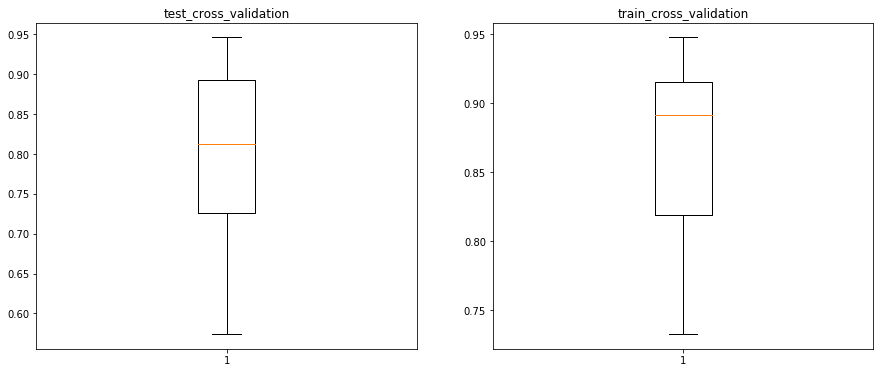

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax = ax.ravel()

ax[0].set_title('test_cross_validation')
ax[0].boxplot(result)

ax[1].set_title('train_cross_validation')
ax[1].boxplot(result2)

plt.show()

# Fit the model(epochs = 1000, batch_size=16)

In [28]:
history = model.fit(x_train, 
                    y_train,
                    epochs=1000,
                    batch_size=16,
                    validation_data=(x_test, y_test))

Train on 294 samples, validate on 98 samples
Epoch 1/1000
294/294 [==============================] - 1s 4ms/step - loss: 619.0356 - mean_squared_error: 619.0356 - mean_absolute_error: 23.6295 - val_loss: 642.9361 - val_mean_squared_error: 642.9361 - val_mean_absolute_error: 24.1530
Epoch 2/1000
294/294 [==============================] - 0s 91us/step - loss: 609.7151 - mean_squared_error: 609.7151 - mean_absolute_error: 23.4359 - val_loss: 635.2359 - val_mean_squared_error: 635.2359 - val_mean_absolute_error: 23.9901
Epoch 3/1000
294/294 [==============================] - 0s 106us/step - loss: 604.1170 - mean_squared_error: 604.1170 - mean_absolute_error: 23.3058 - val_loss: 630.1071 - val_mean_squared_error: 630.1071 - val_mean_absolute_error: 23.8686
Epoch 4/1000
294/294 [==============================] - 0s 106us/step - loss: 599.8466 - mean_squared_error: 599.8466 - mean_absolute_error: 23.1997 - val_loss: 625.9573 - val_mean_squared_error: 625.9573 - val_mean_absolute_error: 23.763

294/294 [==============================] - 0s 193us/step - loss: 27.4653 - mean_squared_error: 27.4653 - mean_absolute_error: 4.1994 - val_loss: 22.0837 - val_mean_squared_error: 22.0837 - val_mean_absolute_error: 3.8104
Epoch 36/1000
294/294 [==============================] - 0s 77us/step - loss: 26.4587 - mean_squared_error: 26.4587 - mean_absolute_error: 4.1195 - val_loss: 21.2982 - val_mean_squared_error: 21.2982 - val_mean_absolute_error: 3.7468
Epoch 37/1000
294/294 [==============================] - 0s 106us/step - loss: 25.5606 - mean_squared_error: 25.5606 - mean_absolute_error: 4.0463 - val_loss: 20.6014 - val_mean_squared_error: 20.6014 - val_mean_absolute_error: 3.6930
Epoch 38/1000
294/294 [==============================] - 0s 53us/step - loss: 24.6986 - mean_squared_error: 24.6986 - mean_absolute_error: 3.9674 - val_loss: 19.9282 - val_mean_squared_error: 19.9282 - val_mean_absolute_error: 3.6291
Epoch 39/1000
294/294 [==============================] - 0s 106us/step - los

294/294 [==============================] - 0s 101us/step - loss: 12.2819 - mean_squared_error: 12.2819 - mean_absolute_error: 2.5724 - val_loss: 11.0047 - val_mean_squared_error: 11.0047 - val_mean_absolute_error: 2.5986
Epoch 71/1000
294/294 [==============================] - 0s 107us/step - loss: 12.1225 - mean_squared_error: 12.1225 - mean_absolute_error: 2.5442 - val_loss: 11.0161 - val_mean_squared_error: 11.0161 - val_mean_absolute_error: 2.5928
Epoch 72/1000
294/294 [==============================] - 0s 27us/step - loss: 11.9495 - mean_squared_error: 11.9495 - mean_absolute_error: 2.5224 - val_loss: 10.8207 - val_mean_squared_error: 10.8207 - val_mean_absolute_error: 2.5661
Epoch 73/1000
294/294 [==============================] - 0s 159us/step - loss: 11.8191 - mean_squared_error: 11.8191 - mean_absolute_error: 2.5087 - val_loss: 10.8515 - val_mean_squared_error: 10.8515 - val_mean_absolute_error: 2.5626
Epoch 74/1000
294/294 [==============================] - 0s 106us/step - lo

294/294 [==============================] - 0s 140us/step - loss: 8.7697 - mean_squared_error: 8.7697 - mean_absolute_error: 2.0752 - val_loss: 9.8355 - val_mean_squared_error: 9.8355 - val_mean_absolute_error: 2.3385
Epoch 106/1000
294/294 [==============================] - 0s 53us/step - loss: 8.7428 - mean_squared_error: 8.7428 - mean_absolute_error: 2.0748 - val_loss: 9.7653 - val_mean_squared_error: 9.7653 - val_mean_absolute_error: 2.3281
Epoch 107/1000
294/294 [==============================] - 0s 106us/step - loss: 8.6751 - mean_squared_error: 8.6751 - mean_absolute_error: 2.0633 - val_loss: 9.9146 - val_mean_squared_error: 9.9146 - val_mean_absolute_error: 2.3511
Epoch 108/1000
294/294 [==============================] - 0s 53us/step - loss: 8.6098 - mean_squared_error: 8.6098 - mean_absolute_error: 2.0617 - val_loss: 9.8401 - val_mean_squared_error: 9.8401 - val_mean_absolute_error: 2.3329
Epoch 109/1000
294/294 [==============================] - 0s 124us/step - loss: 8.5548 - 

294/294 [==============================] - 0s 105us/step - loss: 7.6853 - mean_squared_error: 7.6853 - mean_absolute_error: 1.9513 - val_loss: 9.5379 - val_mean_squared_error: 9.5379 - val_mean_absolute_error: 2.3112
Epoch 141/1000
294/294 [==============================] - 0s 102us/step - loss: 7.6881 - mean_squared_error: 7.6881 - mean_absolute_error: 1.9540 - val_loss: 9.4917 - val_mean_squared_error: 9.4917 - val_mean_absolute_error: 2.3045
Epoch 142/1000
294/294 [==============================] - 0s 119us/step - loss: 7.6671 - mean_squared_error: 7.6671 - mean_absolute_error: 1.9425 - val_loss: 9.5686 - val_mean_squared_error: 9.5686 - val_mean_absolute_error: 2.3210
Epoch 143/1000
294/294 [==============================] - 0s 126us/step - loss: 7.6904 - mean_squared_error: 7.6904 - mean_absolute_error: 1.9588 - val_loss: 9.4096 - val_mean_squared_error: 9.4096 - val_mean_absolute_error: 2.2975
Epoch 144/1000
294/294 [==============================] - 0s 95us/step - loss: 7.6616 -

294/294 [==============================] - 0s 115us/step - loss: 7.2610 - mean_squared_error: 7.2610 - mean_absolute_error: 1.9147 - val_loss: 8.9244 - val_mean_squared_error: 8.9244 - val_mean_absolute_error: 2.2237
Epoch 176/1000
294/294 [==============================] - 0s 69us/step - loss: 7.2340 - mean_squared_error: 7.2340 - mean_absolute_error: 1.9000 - val_loss: 9.0802 - val_mean_squared_error: 9.0802 - val_mean_absolute_error: 2.2545
Epoch 177/1000
294/294 [==============================] - 0s 157us/step - loss: 7.2199 - mean_squared_error: 7.2199 - mean_absolute_error: 1.9060 - val_loss: 8.9602 - val_mean_squared_error: 8.9602 - val_mean_absolute_error: 2.2318
Epoch 178/1000
294/294 [==============================] - 0s 91us/step - loss: 7.2334 - mean_squared_error: 7.2334 - mean_absolute_error: 1.9047 - val_loss: 9.1225 - val_mean_squared_error: 9.1225 - val_mean_absolute_error: 2.2535
Epoch 179/1000
294/294 [==============================] - 0s 112us/step - loss: 7.1978 - 

294/294 [==============================] - 0s 92us/step - loss: 7.0460 - mean_squared_error: 7.0460 - mean_absolute_error: 1.9123 - val_loss: 8.8293 - val_mean_squared_error: 8.8293 - val_mean_absolute_error: 2.2269
Epoch 211/1000
294/294 [==============================] - 0s 115us/step - loss: 6.9999 - mean_squared_error: 6.9999 - mean_absolute_error: 1.8958 - val_loss: 9.1238 - val_mean_squared_error: 9.1238 - val_mean_absolute_error: 2.2732
Epoch 212/1000
294/294 [==============================] - 0s 160us/step - loss: 6.9885 - mean_squared_error: 6.9885 - mean_absolute_error: 1.8798 - val_loss: 8.9659 - val_mean_squared_error: 8.9659 - val_mean_absolute_error: 2.2470
Epoch 213/1000
294/294 [==============================] - 0s 98us/step - loss: 6.9931 - mean_squared_error: 6.9931 - mean_absolute_error: 1.8818 - val_loss: 9.0895 - val_mean_squared_error: 9.0895 - val_mean_absolute_error: 2.2615
Epoch 214/1000
294/294 [==============================] - 0s 98us/step - loss: 6.9643 - m

294/294 [==============================] - 0s 106us/step - loss: 6.9295 - mean_squared_error: 6.9295 - mean_absolute_error: 1.9025 - val_loss: 8.6667 - val_mean_squared_error: 8.6667 - val_mean_absolute_error: 2.2315
Epoch 246/1000
294/294 [==============================] - 0s 124us/step - loss: 6.7978 - mean_squared_error: 6.7978 - mean_absolute_error: 1.8811 - val_loss: 8.9370 - val_mean_squared_error: 8.9370 - val_mean_absolute_error: 2.2565
Epoch 247/1000
294/294 [==============================] - 0s 53us/step - loss: 6.9313 - mean_squared_error: 6.9313 - mean_absolute_error: 1.8603 - val_loss: 8.9766 - val_mean_squared_error: 8.9766 - val_mean_absolute_error: 2.2604
Epoch 248/1000
294/294 [==============================] - 0s 109us/step - loss: 6.7386 - mean_squared_error: 6.7386 - mean_absolute_error: 1.8673 - val_loss: 8.5021 - val_mean_squared_error: 8.5021 - val_mean_absolute_error: 2.2188
Epoch 249/1000
294/294 [==============================] - 0s 156us/step - loss: 6.8218 -

294/294 [==============================] - 0s 251us/step - loss: 6.6852 - mean_squared_error: 6.6852 - mean_absolute_error: 1.8509 - val_loss: 8.5254 - val_mean_squared_error: 8.5254 - val_mean_absolute_error: 2.2101
Epoch 281/1000
294/294 [==============================] - 0s 41us/step - loss: 6.6661 - mean_squared_error: 6.6661 - mean_absolute_error: 1.8380 - val_loss: 8.6331 - val_mean_squared_error: 8.6331 - val_mean_absolute_error: 2.2219
Epoch 282/1000
294/294 [==============================] - 0s 106us/step - loss: 6.6666 - mean_squared_error: 6.6666 - mean_absolute_error: 1.8460 - val_loss: 8.5104 - val_mean_squared_error: 8.5104 - val_mean_absolute_error: 2.2079
Epoch 283/1000
294/294 [==============================] - 0s 106us/step - loss: 6.6836 - mean_squared_error: 6.6836 - mean_absolute_error: 1.8403 - val_loss: 8.6467 - val_mean_squared_error: 8.6467 - val_mean_absolute_error: 2.2179
Epoch 284/1000
294/294 [==============================] - 0s 152us/step - loss: 6.6561 -

294/294 [==============================] - 0s 106us/step - loss: 6.5354 - mean_squared_error: 6.5354 - mean_absolute_error: 1.8295 - val_loss: 8.3280 - val_mean_squared_error: 8.3280 - val_mean_absolute_error: 2.1818
Epoch 316/1000
294/294 [==============================] - 0s 95us/step - loss: 6.5373 - mean_squared_error: 6.5373 - mean_absolute_error: 1.8344 - val_loss: 8.4358 - val_mean_squared_error: 8.4358 - val_mean_absolute_error: 2.1901
Epoch 317/1000
294/294 [==============================] - 0s 82us/step - loss: 6.5411 - mean_squared_error: 6.5411 - mean_absolute_error: 1.8170 - val_loss: 8.4473 - val_mean_squared_error: 8.4473 - val_mean_absolute_error: 2.1842
Epoch 318/1000
294/294 [==============================] - 0s 53us/step - loss: 6.5252 - mean_squared_error: 6.5252 - mean_absolute_error: 1.8237 - val_loss: 8.2354 - val_mean_squared_error: 8.2354 - val_mean_absolute_error: 2.1717
Epoch 319/1000
294/294 [==============================] - 0s 159us/step - loss: 6.5338 - m

294/294 [==============================] - 0s 90us/step - loss: 6.4529 - mean_squared_error: 6.4529 - mean_absolute_error: 1.8027 - val_loss: 8.3188 - val_mean_squared_error: 8.3188 - val_mean_absolute_error: 2.1718
Epoch 351/1000
294/294 [==============================] - 0s 41us/step - loss: 6.4216 - mean_squared_error: 6.4216 - mean_absolute_error: 1.8017 - val_loss: 8.3375 - val_mean_squared_error: 8.3375 - val_mean_absolute_error: 2.1753
Epoch 352/1000
294/294 [==============================] - 0s 106us/step - loss: 6.5044 - mean_squared_error: 6.5044 - mean_absolute_error: 1.8059 - val_loss: 8.3229 - val_mean_squared_error: 8.3229 - val_mean_absolute_error: 2.1685
Epoch 353/1000
294/294 [==============================] - 0s 58us/step - loss: 6.4852 - mean_squared_error: 6.4852 - mean_absolute_error: 1.8221 - val_loss: 8.1987 - val_mean_squared_error: 8.1987 - val_mean_absolute_error: 2.1608
Epoch 354/1000
294/294 [==============================] - 0s 132us/step - loss: 6.4373 - m

294/294 [==============================] - 0s 80us/step - loss: 6.3750 - mean_squared_error: 6.3750 - mean_absolute_error: 1.7989 - val_loss: 8.2733 - val_mean_squared_error: 8.2733 - val_mean_absolute_error: 2.1680
Epoch 386/1000
294/294 [==============================] - 0s 53us/step - loss: 6.3609 - mean_squared_error: 6.3609 - mean_absolute_error: 1.7953 - val_loss: 8.2744 - val_mean_squared_error: 8.2744 - val_mean_absolute_error: 2.1703
Epoch 387/1000
294/294 [==============================] - 0s 106us/step - loss: 6.3578 - mean_squared_error: 6.3578 - mean_absolute_error: 1.7875 - val_loss: 8.3456 - val_mean_squared_error: 8.3456 - val_mean_absolute_error: 2.1768
Epoch 388/1000
294/294 [==============================] - 0s 106us/step - loss: 6.3685 - mean_squared_error: 6.3685 - mean_absolute_error: 1.7956 - val_loss: 8.2443 - val_mean_squared_error: 8.2443 - val_mean_absolute_error: 2.1675
Epoch 389/1000
294/294 [==============================] - 0s 90us/step - loss: 6.3929 - m

294/294 [==============================] - 0s 53us/step - loss: 6.3389 - mean_squared_error: 6.3389 - mean_absolute_error: 1.8002 - val_loss: 8.0100 - val_mean_squared_error: 8.0100 - val_mean_absolute_error: 2.1381
Epoch 421/1000
294/294 [==============================] - 0s 172us/step - loss: 6.3288 - mean_squared_error: 6.3288 - mean_absolute_error: 1.7806 - val_loss: 8.3790 - val_mean_squared_error: 8.3790 - val_mean_absolute_error: 2.1752
Epoch 422/1000
294/294 [==============================] - ETA: 0s - loss: 13.3750 - mean_squared_error: 13.3750 - mean_absolute_error: 2.53 - 0s 81us/step - loss: 6.3353 - mean_squared_error: 6.3353 - mean_absolute_error: 1.7826 - val_loss: 8.2295 - val_mean_squared_error: 8.2295 - val_mean_absolute_error: 2.1636
Epoch 423/1000
294/294 [==============================] - 0s 53us/step - loss: 6.2857 - mean_squared_error: 6.2857 - mean_absolute_error: 1.7813 - val_loss: 8.1500 - val_mean_squared_error: 8.1500 - val_mean_absolute_error: 2.1579
Epoch 

294/294 [==============================] - 0s 53us/step - loss: 6.2242 - mean_squared_error: 6.2242 - mean_absolute_error: 1.7642 - val_loss: 8.2117 - val_mean_squared_error: 8.2117 - val_mean_absolute_error: 2.1653
Epoch 456/1000
294/294 [==============================] - 0s 106us/step - loss: 6.2117 - mean_squared_error: 6.2117 - mean_absolute_error: 1.7761 - val_loss: 8.1439 - val_mean_squared_error: 8.1439 - val_mean_absolute_error: 2.1636
Epoch 457/1000
294/294 [==============================] - 0s 53us/step - loss: 6.2399 - mean_squared_error: 6.2399 - mean_absolute_error: 1.7840 - val_loss: 8.0480 - val_mean_squared_error: 8.0480 - val_mean_absolute_error: 2.1457
Epoch 458/1000
294/294 [==============================] - 0s 120us/step - loss: 6.2891 - mean_squared_error: 6.2891 - mean_absolute_error: 1.7721 - val_loss: 8.3386 - val_mean_squared_error: 8.3386 - val_mean_absolute_error: 2.1768
Epoch 459/1000
294/294 [==============================] - 0s 67us/step - loss: 6.4027 - m

294/294 [==============================] - 0s 53us/step - loss: 6.2200 - mean_squared_error: 6.2200 - mean_absolute_error: 1.7670 - val_loss: 8.2555 - val_mean_squared_error: 8.2555 - val_mean_absolute_error: 2.1728
Epoch 491/1000
294/294 [==============================] - 0s 53us/step - loss: 6.2606 - mean_squared_error: 6.2606 - mean_absolute_error: 1.7862 - val_loss: 8.1157 - val_mean_squared_error: 8.1157 - val_mean_absolute_error: 2.1565
Epoch 492/1000
294/294 [==============================] - 0s 97us/step - loss: 6.1877 - mean_squared_error: 6.1877 - mean_absolute_error: 1.7769 - val_loss: 8.2046 - val_mean_squared_error: 8.2046 - val_mean_absolute_error: 2.1676
Epoch 493/1000
294/294 [==============================] - 0s 106us/step - loss: 6.2421 - mean_squared_error: 6.2421 - mean_absolute_error: 1.7618 - val_loss: 8.2503 - val_mean_squared_error: 8.2503 - val_mean_absolute_error: 2.1797
Epoch 494/1000
294/294 [==============================] - 0s 53us/step - loss: 6.4058 - me

294/294 [==============================] - 0s 53us/step - loss: 6.0976 - mean_squared_error: 6.0976 - mean_absolute_error: 1.7440 - val_loss: 8.2061 - val_mean_squared_error: 8.2061 - val_mean_absolute_error: 2.1738
Epoch 526/1000
294/294 [==============================] - 0s 53us/step - loss: 6.0913 - mean_squared_error: 6.0913 - mean_absolute_error: 1.7505 - val_loss: 8.2002 - val_mean_squared_error: 8.2002 - val_mean_absolute_error: 2.1665
Epoch 527/1000
294/294 [==============================] - 0s 106us/step - loss: 6.1136 - mean_squared_error: 6.1136 - mean_absolute_error: 1.7442 - val_loss: 8.2461 - val_mean_squared_error: 8.2461 - val_mean_absolute_error: 2.1766
Epoch 528/1000
294/294 [==============================] - 0s 106us/step - loss: 6.0960 - mean_squared_error: 6.0960 - mean_absolute_error: 1.7550 - val_loss: 8.0376 - val_mean_squared_error: 8.0376 - val_mean_absolute_error: 2.1469
Epoch 529/1000
294/294 [==============================] - 0s 132us/step - loss: 6.1349 - 

294/294 [==============================] - 0s 122us/step - loss: 5.9584 - mean_squared_error: 5.9584 - mean_absolute_error: 1.7501 - val_loss: 8.1364 - val_mean_squared_error: 8.1364 - val_mean_absolute_error: 2.1764
Epoch 561/1000
294/294 [==============================] - 0s 53us/step - loss: 5.9434 - mean_squared_error: 5.9434 - mean_absolute_error: 1.7260 - val_loss: 8.1089 - val_mean_squared_error: 8.1089 - val_mean_absolute_error: 2.1749
Epoch 562/1000
294/294 [==============================] - 0s 159us/step - loss: 5.9650 - mean_squared_error: 5.9650 - mean_absolute_error: 1.7557 - val_loss: 8.0155 - val_mean_squared_error: 8.0155 - val_mean_absolute_error: 2.1647
Epoch 563/1000
294/294 [==============================] - 0s 53us/step - loss: 5.9526 - mean_squared_error: 5.9526 - mean_absolute_error: 1.7294 - val_loss: 8.1032 - val_mean_squared_error: 8.1032 - val_mean_absolute_error: 2.1718
Epoch 564/1000
294/294 [==============================] - 0s 159us/step - loss: 5.9477 - 

294/294 [==============================] - 0s 106us/step - loss: 5.8052 - mean_squared_error: 5.8052 - mean_absolute_error: 1.7259 - val_loss: 8.0213 - val_mean_squared_error: 8.0213 - val_mean_absolute_error: 2.1735
Epoch 596/1000
294/294 [==============================] - 0s 53us/step - loss: 5.8131 - mean_squared_error: 5.8131 - mean_absolute_error: 1.7258 - val_loss: 8.0664 - val_mean_squared_error: 8.0664 - val_mean_absolute_error: 2.1864
Epoch 597/1000
294/294 [==============================] - 0s 106us/step - loss: 5.8352 - mean_squared_error: 5.8352 - mean_absolute_error: 1.7205 - val_loss: 7.9881 - val_mean_squared_error: 7.9881 - val_mean_absolute_error: 2.1690
Epoch 598/1000
294/294 [==============================] - 0s 122us/step - loss: 5.8132 - mean_squared_error: 5.8132 - mean_absolute_error: 1.7113 - val_loss: 8.1400 - val_mean_squared_error: 8.1400 - val_mean_absolute_error: 2.1934
Epoch 599/1000
294/294 [==============================] - 0s 90us/step - loss: 5.8119 - 

294/294 [==============================] - 0s 60us/step - loss: 5.7335 - mean_squared_error: 5.7335 - mean_absolute_error: 1.7145 - val_loss: 8.0900 - val_mean_squared_error: 8.0900 - val_mean_absolute_error: 2.1814
Epoch 631/1000
294/294 [==============================] - 0s 108us/step - loss: 5.7425 - mean_squared_error: 5.7425 - mean_absolute_error: 1.7245 - val_loss: 8.0353 - val_mean_squared_error: 8.0353 - val_mean_absolute_error: 2.1866
Epoch 632/1000
294/294 [==============================] - 0s 92us/step - loss: 5.7332 - mean_squared_error: 5.7332 - mean_absolute_error: 1.7109 - val_loss: 7.9406 - val_mean_squared_error: 7.9406 - val_mean_absolute_error: 2.1695
Epoch 633/1000
294/294 [==============================] - 0s 48us/step - loss: 5.7359 - mean_squared_error: 5.7359 - mean_absolute_error: 1.7093 - val_loss: 7.9364 - val_mean_squared_error: 7.9364 - val_mean_absolute_error: 2.1707
Epoch 634/1000
294/294 [==============================] - 0s 106us/step - loss: 5.7428 - m

294/294 [==============================] - 0s 155us/step - loss: 5.6697 - mean_squared_error: 5.6697 - mean_absolute_error: 1.7094 - val_loss: 7.8368 - val_mean_squared_error: 7.8368 - val_mean_absolute_error: 2.1609
Epoch 666/1000
294/294 [==============================] - 0s 121us/step - loss: 5.7165 - mean_squared_error: 5.7165 - mean_absolute_error: 1.6966 - val_loss: 7.8850 - val_mean_squared_error: 7.8850 - val_mean_absolute_error: 2.1708
Epoch 667/1000
294/294 [==============================] - 0s 106us/step - loss: 5.6509 - mean_squared_error: 5.6509 - mean_absolute_error: 1.7082 - val_loss: 7.8268 - val_mean_squared_error: 7.8268 - val_mean_absolute_error: 2.1611
Epoch 668/1000
294/294 [==============================] - 0s 113us/step - loss: 5.6815 - mean_squared_error: 5.6815 - mean_absolute_error: 1.7124 - val_loss: 7.9540 - val_mean_squared_error: 7.9540 - val_mean_absolute_error: 2.1829
Epoch 669/1000
294/294 [==============================] - 0s 94us/step - loss: 5.6393 -

294/294 [==============================] - 0s 53us/step - loss: 5.5962 - mean_squared_error: 5.5962 - mean_absolute_error: 1.6898 - val_loss: 7.8008 - val_mean_squared_error: 7.8008 - val_mean_absolute_error: 2.1625
Epoch 701/1000
294/294 [==============================] - 0s 106us/step - loss: 5.6510 - mean_squared_error: 5.6510 - mean_absolute_error: 1.7011 - val_loss: 7.9762 - val_mean_squared_error: 7.9762 - val_mean_absolute_error: 2.1853
Epoch 702/1000
294/294 [==============================] - 0s 53us/step - loss: 5.6001 - mean_squared_error: 5.6001 - mean_absolute_error: 1.7096 - val_loss: 7.8621 - val_mean_squared_error: 7.8621 - val_mean_absolute_error: 2.1678
Epoch 703/1000
294/294 [==============================] - 0s 156us/step - loss: 5.6159 - mean_squared_error: 5.6159 - mean_absolute_error: 1.7237 - val_loss: 7.8768 - val_mean_squared_error: 7.8768 - val_mean_absolute_error: 2.1677
Epoch 704/1000
294/294 [==============================] - 0s 177us/step - loss: 5.5900 - 

294/294 [==============================] - 0s 106us/step - loss: 5.6109 - mean_squared_error: 5.6109 - mean_absolute_error: 1.6934 - val_loss: 7.8957 - val_mean_squared_error: 7.8957 - val_mean_absolute_error: 2.1791
Epoch 736/1000
294/294 [==============================] - 0s 106us/step - loss: 5.5042 - mean_squared_error: 5.5042 - mean_absolute_error: 1.6916 - val_loss: 7.8758 - val_mean_squared_error: 7.8758 - val_mean_absolute_error: 2.1671
Epoch 737/1000
294/294 [==============================] - 0s 53us/step - loss: 5.5494 - mean_squared_error: 5.5494 - mean_absolute_error: 1.6993 - val_loss: 7.8668 - val_mean_squared_error: 7.8668 - val_mean_absolute_error: 2.1865
Epoch 738/1000
294/294 [==============================] - 0s 106us/step - loss: 5.5481 - mean_squared_error: 5.5481 - mean_absolute_error: 1.6701 - val_loss: 8.0682 - val_mean_squared_error: 8.0682 - val_mean_absolute_error: 2.1906
Epoch 739/1000
294/294 [==============================] - 0s 124us/step - loss: 5.4758 -

294/294 [==============================] - 0s 152us/step - loss: 5.4217 - mean_squared_error: 5.4217 - mean_absolute_error: 1.6753 - val_loss: 7.8888 - val_mean_squared_error: 7.8888 - val_mean_absolute_error: 2.1818
Epoch 771/1000
294/294 [==============================] - 0s 134us/step - loss: 5.4828 - mean_squared_error: 5.4828 - mean_absolute_error: 1.6845 - val_loss: 7.8648 - val_mean_squared_error: 7.8648 - val_mean_absolute_error: 2.1792
Epoch 772/1000
294/294 [==============================] - 0s 127us/step - loss: 5.5044 - mean_squared_error: 5.5044 - mean_absolute_error: 1.6647 - val_loss: 7.8421 - val_mean_squared_error: 7.8421 - val_mean_absolute_error: 2.1774
Epoch 773/1000
294/294 [==============================] - 0s 159us/step - loss: 5.4609 - mean_squared_error: 5.4609 - mean_absolute_error: 1.6799 - val_loss: 7.7786 - val_mean_squared_error: 7.7786 - val_mean_absolute_error: 2.1662
Epoch 774/1000
294/294 [==============================] - 0s 106us/step - loss: 5.4597 

294/294 [==============================] - 0s 53us/step - loss: 5.4683 - mean_squared_error: 5.4683 - mean_absolute_error: 1.6630 - val_loss: 8.0887 - val_mean_squared_error: 8.0887 - val_mean_absolute_error: 2.2136
Epoch 806/1000
294/294 [==============================] - 0s 106us/step - loss: 5.5343 - mean_squared_error: 5.5343 - mean_absolute_error: 1.7030 - val_loss: 7.8562 - val_mean_squared_error: 7.8562 - val_mean_absolute_error: 2.1818
Epoch 807/1000
294/294 [==============================] - 0s 53us/step - loss: 5.3819 - mean_squared_error: 5.3819 - mean_absolute_error: 1.6695 - val_loss: 7.9536 - val_mean_squared_error: 7.9536 - val_mean_absolute_error: 2.1952
Epoch 808/1000
294/294 [==============================] - 0s 106us/step - loss: 5.3670 - mean_squared_error: 5.3670 - mean_absolute_error: 1.6559 - val_loss: 7.7941 - val_mean_squared_error: 7.7941 - val_mean_absolute_error: 2.1662
Epoch 809/1000
294/294 [==============================] - 0s 182us/step - loss: 5.4018 - 

294/294 [==============================] - 0s 106us/step - loss: 5.3362 - mean_squared_error: 5.3362 - mean_absolute_error: 1.6690 - val_loss: 7.7267 - val_mean_squared_error: 7.7267 - val_mean_absolute_error: 2.1620
Epoch 841/1000
294/294 [==============================] - 0s 106us/step - loss: 5.3311 - mean_squared_error: 5.3311 - mean_absolute_error: 1.6485 - val_loss: 7.7730 - val_mean_squared_error: 7.7730 - val_mean_absolute_error: 2.1657
Epoch 842/1000
294/294 [==============================] - 0s 53us/step - loss: 5.3303 - mean_squared_error: 5.3303 - mean_absolute_error: 1.6648 - val_loss: 7.8193 - val_mean_squared_error: 7.8193 - val_mean_absolute_error: 2.1785
Epoch 843/1000
294/294 [==============================] - 0s 106us/step - loss: 5.3498 - mean_squared_error: 5.3498 - mean_absolute_error: 1.6531 - val_loss: 7.8737 - val_mean_squared_error: 7.8737 - val_mean_absolute_error: 2.1784
Epoch 844/1000
294/294 [==============================] - 0s 168us/step - loss: 5.3506 -

294/294 [==============================] - 0s 164us/step - loss: 5.2548 - mean_squared_error: 5.2548 - mean_absolute_error: 1.6533 - val_loss: 7.6890 - val_mean_squared_error: 7.6890 - val_mean_absolute_error: 2.1543
Epoch 876/1000
294/294 [==============================] - 0s 94us/step - loss: 5.3234 - mean_squared_error: 5.3234 - mean_absolute_error: 1.6475 - val_loss: 7.6523 - val_mean_squared_error: 7.6523 - val_mean_absolute_error: 2.1515
Epoch 877/1000
294/294 [==============================] - 0s 71us/step - loss: 5.2730 - mean_squared_error: 5.2730 - mean_absolute_error: 1.6459 - val_loss: 7.7387 - val_mean_squared_error: 7.7387 - val_mean_absolute_error: 2.1673
Epoch 878/1000
294/294 [==============================] - 0s 106us/step - loss: 5.2838 - mean_squared_error: 5.2838 - mean_absolute_error: 1.6584 - val_loss: 7.7902 - val_mean_squared_error: 7.7902 - val_mean_absolute_error: 2.1699
Epoch 879/1000
294/294 [==============================] - 0s 106us/step - loss: 5.2869 - 

294/294 [==============================] - 0s 53us/step - loss: 5.2273 - mean_squared_error: 5.2273 - mean_absolute_error: 1.6332 - val_loss: 7.7470 - val_mean_squared_error: 7.7470 - val_mean_absolute_error: 2.1730
Epoch 911/1000
294/294 [==============================] - 0s 128us/step - loss: 5.2131 - mean_squared_error: 5.2131 - mean_absolute_error: 1.6525 - val_loss: 7.5878 - val_mean_squared_error: 7.5878 - val_mean_absolute_error: 2.1421
Epoch 912/1000
294/294 [==============================] - 0s 122us/step - loss: 5.2418 - mean_squared_error: 5.2418 - mean_absolute_error: 1.6464 - val_loss: 7.9051 - val_mean_squared_error: 7.9051 - val_mean_absolute_error: 2.1958
Epoch 913/1000
294/294 [==============================] - 0s 61us/step - loss: 5.2744 - mean_squared_error: 5.2744 - mean_absolute_error: 1.6455 - val_loss: 7.7882 - val_mean_squared_error: 7.7882 - val_mean_absolute_error: 2.1773
Epoch 914/1000
294/294 [==============================] - 0s 53us/step - loss: 5.1709 - m

294/294 [==============================] - 0s 51us/step - loss: 5.1931 - mean_squared_error: 5.1931 - mean_absolute_error: 1.6231 - val_loss: 7.7546 - val_mean_squared_error: 7.7546 - val_mean_absolute_error: 2.1777
Epoch 946/1000
294/294 [==============================] - 0s 160us/step - loss: 5.1413 - mean_squared_error: 5.1413 - mean_absolute_error: 1.6365 - val_loss: 7.6900 - val_mean_squared_error: 7.6900 - val_mean_absolute_error: 2.1714
Epoch 947/1000
294/294 [==============================] - 0s 106us/step - loss: 5.1844 - mean_squared_error: 5.1844 - mean_absolute_error: 1.6338 - val_loss: 7.8256 - val_mean_squared_error: 7.8256 - val_mean_absolute_error: 2.1909
Epoch 948/1000
294/294 [==============================] - 0s 101us/step - loss: 5.1828 - mean_squared_error: 5.1828 - mean_absolute_error: 1.6361 - val_loss: 7.6806 - val_mean_squared_error: 7.6806 - val_mean_absolute_error: 2.1650
Epoch 949/1000
294/294 [==============================] - 0s 84us/step - loss: 5.1701 - 

294/294 [==============================] - 0s 103us/step - loss: 5.1690 - mean_squared_error: 5.1690 - mean_absolute_error: 1.6442 - val_loss: 7.7015 - val_mean_squared_error: 7.7015 - val_mean_absolute_error: 2.1723
Epoch 981/1000
294/294 [==============================] - 0s 94us/step - loss: 5.1070 - mean_squared_error: 5.1070 - mean_absolute_error: 1.6165 - val_loss: 7.7811 - val_mean_squared_error: 7.7811 - val_mean_absolute_error: 2.1776
Epoch 982/1000
294/294 [==============================] - 0s 71us/step - loss: 5.1431 - mean_squared_error: 5.1431 - mean_absolute_error: 1.6199 - val_loss: 7.6844 - val_mean_squared_error: 7.6844 - val_mean_absolute_error: 2.1707
Epoch 983/1000
294/294 [==============================] - 0s 163us/step - loss: 5.1441 - mean_squared_error: 5.1441 - mean_absolute_error: 1.6341 - val_loss: 7.6746 - val_mean_squared_error: 7.6746 - val_mean_absolute_error: 2.1663
Epoch 984/1000
294/294 [==============================] - 0s 123us/step - loss: 5.1167 - 

# Prediction

In [29]:
y_pred = model.predict(x_test)
y_pred

array([[27.883112],
       [21.947813],
       [15.930436],
       [26.174042],
       [24.288961],
       [28.115559],
       [22.792912],
       [23.097286],
       [28.770893],
       [20.3654  ],
       [26.464453],
       [23.877481],
       [20.722315],
       [14.318061],
       [13.637375],
       [18.513018],
       [22.9303  ],
       [34.280457],
       [21.824675],
       [16.16836 ],
       [28.518026],
       [34.14355 ],
       [13.815569],
       [21.619875],
       [20.796186],
       [22.094374],
       [14.025772],
       [20.561653],
       [16.659666],
       [38.285507],
       [38.28611 ],
       [35.823887],
       [13.663265],
       [13.574435],
       [28.01499 ],
       [23.184418],
       [24.394075],
       [28.803268],
       [15.775865],
       [14.197661],
       [36.61734 ],
       [15.713149],
       [13.21886 ],
       [28.116594],
       [26.240168],
       [28.746359],
       [22.539286],
       [35.936142],
       [26.345842],
       [18.004423],


# Evaluation

In [30]:
mod_name = model.metrics_names
mod_name

['loss', 'mean_squared_error', 'mean_absolute_error']

In [31]:
score = model.evaluate(x_test, y_test)
score

98/98 [==============================] - 0s 51us/step


[7.556166230415811, 7.556166230415811, 2.148100269084074]

In [32]:
print(f'{mod_name[0]}: {score[0]}\n{mod_name[1]}: {score[1]}\n{mod_name[2]}: {score[2]}')

loss: 7.556166230415811
mean_squared_error: 7.556166230415811
mean_absolute_error: 2.148100269084074


# Create History table and accuracy and loss chart
# Graph

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

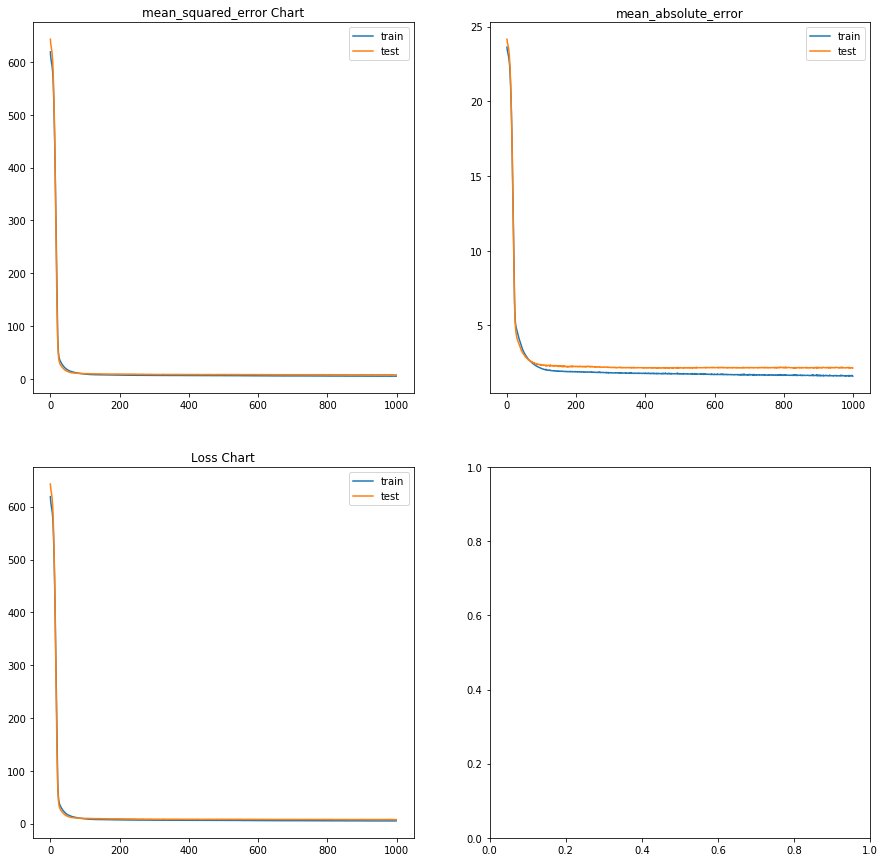

In [34]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
ax = ax.ravel()

ax[0].set_title('mean_squared_error Chart')
ax[0].plot(history.history['mean_squared_error'], label='train')
ax[0].plot(history.history['val_mean_squared_error'], label='test')
ax[0].legend(loc='best')

ax[1].set_title('mean_absolute_error')
ax[1].plot(history.history['mean_absolute_error'], label='train')
ax[1].plot(history.history['val_mean_absolute_error'], label='test')
ax[1].legend(loc='best')

ax[2].set_title('Loss Chart')
ax[2].plot(history.history['loss'], label='train')
ax[2].plot(history.history['val_loss'], label='test')
ax[2].legend(loc='best')

plt.show()

# graph functionization

In [35]:
def graph(mod_name):
    if len(mod_name) == 2:
        x = 15
        y = 15
    elif len(mod_name) == 3:
        x = 12
        y = 10
    fig, ax = plt.subplots(len(mod_name)-1,2,figsize=(x,y))
    ax = ax.ravel()
    for i in range(len(mod_name)):
        ax[i].set_title(f'{mod_name[i]}')
        ax[i].plot(history.history[f'{mod_name[i]}'], label='train')
        ax[i].plot(history.history[f'val_{mod_name[i]}'], label='test')
        ax[i].legend(loc='best')
    plt.tight_layout()
    plt.show()

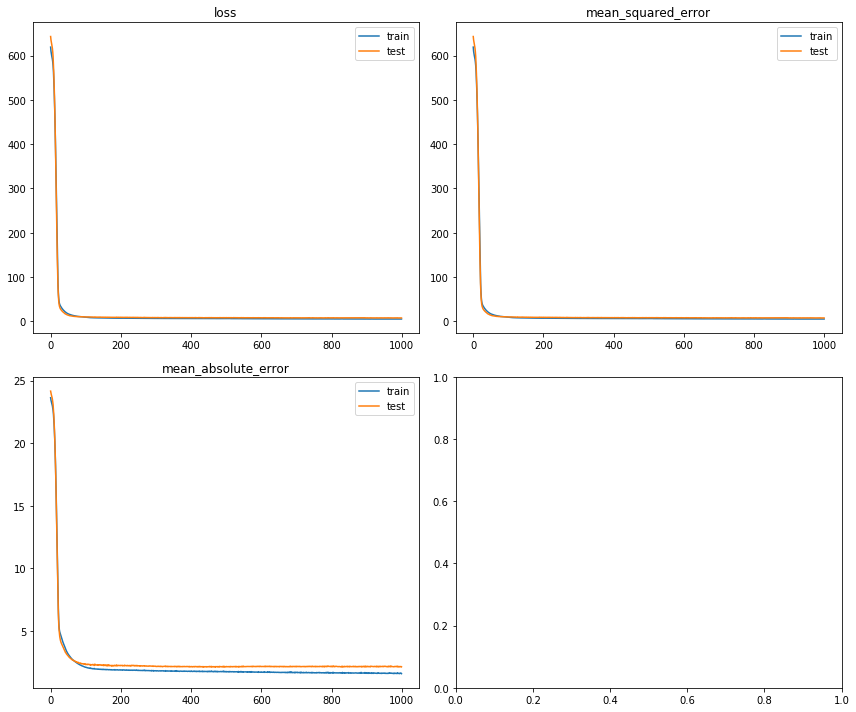

In [36]:
graph(mod_name)

# prediction

In [37]:
mpg=[4,97,75,2155,16.4,76,3]
mpg_arr = np.array(mpg).reshape(-1,7)

In [38]:
mpg_s = scaler.fit_transform(mpg_arr)

In [39]:
y_pred2=model.predict(mpg_s)
y_pred2

array([[20.332735]], dtype=float32)